In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [87]:
train = pd.read_csv('Train_aBjfeNk.csv')
test = pd.read_csv('Test_LqhgPWU.csv')                   

In [88]:
train.shape, test.shape

((8068, 11), (2627, 10))

In [89]:
data = pd.concat([train, test],ignore_index = True )

In [90]:
data.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A

In [91]:
data.shape

(10695, 11)

In [92]:
# statistical tes to verify spending score with segmenntation

# Ho: Spending score has no effect on cust segmentation
# Ha: Spending score has an effect on cust segmentation

tb1 = pd.crosstab(train.Spending_Score, train.Segmentation)

In [93]:
import scipy.stats as stats

tstats, pval, df, exp_freq = stats.chi2_contingency(tb1)

print(tstats, pval)

# Inference is that we reject the Ho meaning Spending Score is significant

1516.8787583775006 0.0


In [94]:
train.Spending_Score.unique()

array(['Low', 'Average', 'High'], dtype=object)

In [95]:
pd.DataFrame(data.groupby('Segmentation')["Spending_Score"].value_counts())

Spending_Score
Segmentation Spending_Score                
A            Low                       1358
             Average                    343
             High                       271
B            Low                        884
             Average                    590
             High                       384
C            Average                    903
             Low                        662
             High                       405
D            Low                       1974
             High                       156
             Average                    138

#### **Inferences on Segmentation and Spending_Score**
* **C** segment has highest no of **High Spenders**
* **D** seg has highest no of **Low Spenders**
* **C** segmemt has highest no. of **Average Spenders**

**Note:**
* Cluster count will be 4.

In [96]:
data.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A

In [97]:
data["Segmentation"].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [98]:
# mapping segmentation into 1,2,3,4
mapped = {"D":0, "A":1,"B":2, "C":3}
data["Segmentation"] = data.Segmentation.map(mapped)

In [99]:
data["Segmentation"].value_counts()

0.0    2268
1.0    1972
3.0    1970
2.0    1858
Name: Segmentation, dtype: int64

# Univariate and Bi-Variate Analysis

In [100]:
df_n = data.select_dtypes(include = 'object')

In [101]:
cols = df_n.columns
cols

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1'],
      dtype='object')

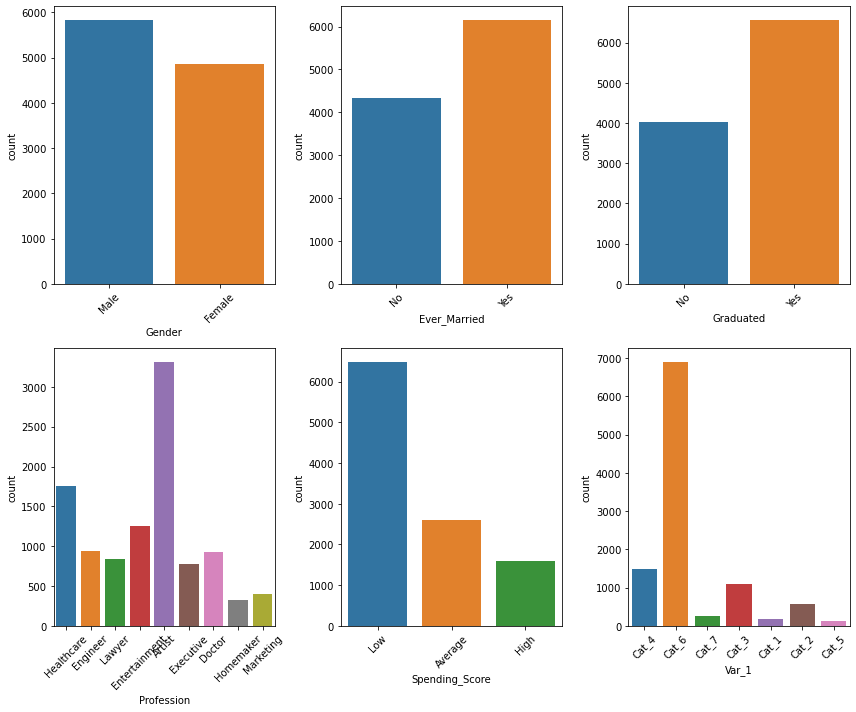

In [102]:
plt.rcParams['figure.figsize'] = (12,10)
col = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

t = 1
for i in col:
    plt.subplot(2,3,t)
    sns.countplot(data[i])
    t+=1
    plt.xticks(rotation = 45)
    plt.tight_layout()
    
plt.show()

* **INferences:**
* More Males than females followed by Graduation = Yes
* Most of the people are married and mostly artist follwed by Healthcare
* Most of the people in Data are low spenders
* Highest Freq of Var_1 is Cat_6 followed by Cta_4, Cat_3 and Cat_2

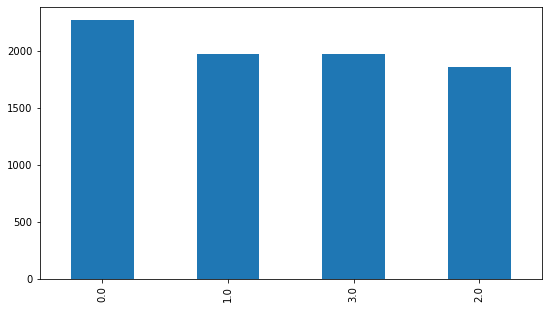

In [103]:
plt.rcParams['figure.figsize'] = (9,5)

data.Segmentation.value_counts().plot(kind = 'bar')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

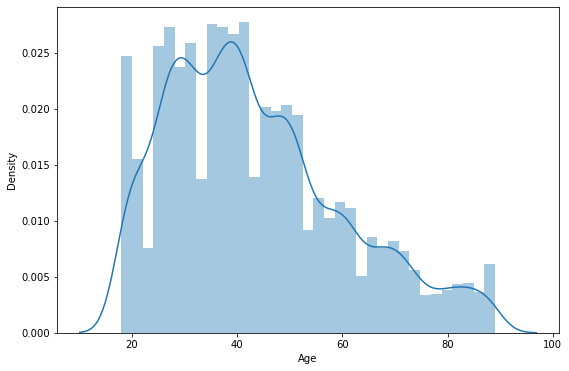

In [104]:
plt.rcParams['figure.figsize'] = (9,6)
sns.distplot(data.Age)

In [105]:
data.Age.describe()

count    10695.000000
mean        43.511828
std         16.774158
min         18.000000
25%         30.000000
50%         41.000000
75%         53.000000
max         89.000000
Name: Age, dtype: float64

In [106]:
# exploring Age basis Spending Score and Segmentation
data.groupby(['Spending_Score', 'Segmentation'])['Age'].describe()

count       mean        std   min   25%   50%  \
Spending_Score Segmentation                                                   
Average        0.0            138.0  37.746377  11.353035  18.0  30.0  36.0   
               1.0            343.0  42.157434  11.885602  20.0  35.0  40.0   
               2.0            590.0  46.866102  10.451637  25.0  38.0  46.0   
               3.0            903.0  50.053156  10.195182  22.0  42.0  50.0   
High           0.0            156.0  48.192308  20.404653  18.0  30.0  42.0   
               1.0            271.0  58.494465  20.482490  18.0  39.5  59.0   
               2.0            384.0  58.643229  16.154292  18.0  45.0  58.0   
               3.0            405.0  60.167901  14.733489  19.0  49.0  60.0   
Low            0.0           1974.0  31.915907  14.833252  18.0  22.0  28.0   
               1.0           1358.0  42.916053  15.138088  18.0  32.0  40.0   
               2.0            884.0  44.554299  14.597057  18.0  33.0  42.0   
               3.0            662.0  41.160121  14.793844  18.0  30.0  38.0   

                               75%   max  
Spending_Score Segmentation               
Average        0.0           41.75  72.0  
               1.0           48.50  89.0  
               2.0           53.00  74.0  
               3.0           57.00  88.0  
High           0.0           68.00  89.0  
               1.0           77.00  89.0  
               2.0           72.00  89.0  
               3.0           71.00  89.0  
Low            0.0           35.00  89.0  
               1.0           50.00  89.0  
               2.0           53.00  89.0  
               3.0           50.00  88.0

* **High

* **Age Bins : 18-25 | 25-30 |30-40 |40-50 | >50**

* Check Age with ANOVA 

In [107]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Ho: Age has no Impact on Target
# Ha: Ahe has significant impact on Target(segmentation)

# this means we will have to explore and specify each age bracket 
# for effective targeting

model = ols('Age~Segmentation', data = train).fit()
anova_lm(model)

# inference: Age is significant for Target(pval=2.188783e-285)
# i.e. different age brackets exist in segmentation, Age barcket is not same.

df        sum_sq        mean_sq           F         PR(>F)
Segmentation     3.0  3.396070e+05  113202.343669  477.102025  2.188783e-285
Residual      8064.0  1.913351e+06     237.270726         NaN            NaN

In [108]:
print(sorted(data.Age.unique()))

[18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]


In [109]:
data.loc[(data.Age<=25) & (data.Age>=18), 'Age_Category']=1
data.loc[(data.Age<=30) & (data.Age>=25), 'Age_Category']=2
data.loc[(data.Age<=40) & (data.Age>=30), 'Age_Category']=3
data.loc[(data.Age<=50) & (data.Age>=40), 'Age_Category']=4
data.loc[(data.Age>50), 'Age_Category']=5

In [110]:
data.isnull().any()

ID                 False
Gender             False
Ever_Married        True
Age                False
Graduated           True
Profession          True
Work_Experience     True
Spending_Score     False
Family_Size         True
Var_1               True
Segmentation        True
Age_Category       False
dtype: bool

In [111]:
data.Age_Category.unique()

array([1., 3., 5., 4., 2.])

<AxesSubplot:xlabel='Age_Category', ylabel='count'>

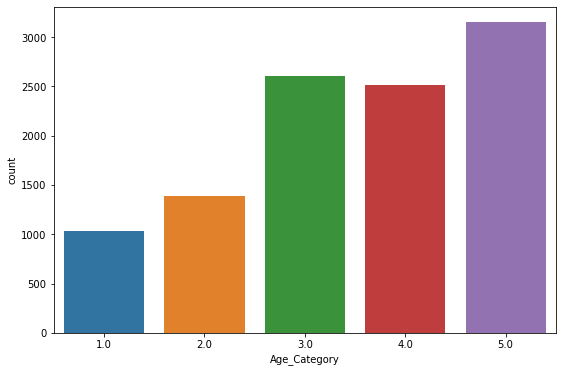

In [112]:
sns.countplot(data.Age_Category)

In [113]:
# Missing values
data.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
Age_Category          0
dtype: int64

In [114]:
#Ever_Married
data.Ever_Married.unique()

# married status of some people is unknown so we get missing values, replacing those 'missing values' with 'Unknown'

array(['No', 'Yes', nan], dtype=object)

In [115]:
# after married status, we will check relation with spending score as it is second most important facto
pd.crosstab(data['Ever_Married'], data["Spending_Score"])

Spending_Score  Average  High   Low
Ever_Married                       
No                    0     0  4342
Yes                2547  1551  2065

In [116]:
# Imputing missing values in Ever_Married with 'Unknown'
data['Ever_Married'] = data['Ever_Married'].fillna('Unknown')
data['Graduated'] = data['Graduated'].fillna('Unknown')
data['Profession'] = data['Profession'].fillna('Unknown')
data['Work_Experience'] = data['Work_Experience'].fillna(-1)
data['Family_Size'] = data['Family_Size'].fillna(-1)
data['Var_1'] = data['Var_1'].fillna('Unknown')

In [117]:
data.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation       2627
Age_Category          0
dtype: int64

In [131]:
# Mapping the variables

data['Gender']= data.Gender.map({'Male':1, 'Female':2})
data['Ever_Married']= data.Ever_Married.map({'No':1, 'Yes':2, 'Unknown':3})
data['Graduated']= data.Graduated.map({'No':1, 'Yes':2, 'Unknown':3})
data['Spending_Score']= data.Spending_Score.map({'Low':1, 'Average':2, 'High':3})
data['Var_1']= data.Var_1.map({'Cat_1':1, 'Cat_2':2, 'Cat_3':3, 'Cat_4':4, 'Cat_5':5, 'Cat_6':6,'Cat_7':7,'Unknown':8})

In [132]:
data.Var_1.unique()

array([4, 6, 7, 3, 1, 2, 8, 5], dtype=int64)

In [136]:
data['Profession'] = data.Profession.map({'Artist':1, 'Healthcare':2, 'Entertainment':3, 'Engineer':4, 'Doctor':5,
                                          'Lawyer':6, 'Executive':7, 'Marketing':8, 'Homemaker':9, 'Unknown':10})

In [137]:
data.Profession.unique()

array([ 2,  4,  6,  3,  1,  7,  5,  9,  8, 10], dtype=int64)

In [140]:
data.Family_Size.unique()

array([ 4.,  3.,  1.,  2.,  6., -1.,  5.,  8.,  7.,  9.])

In [141]:
# Family Category

data.loc[data.Family_Size <= 2, "Family_Cat"] = 1
data.loc[(data.Family_Size > 2) & (data.Family_Size <= 5), "Family_Cat"] = 2
data.loc[data.Family_Size > 5, "Family_Cat"] = 3

In [142]:
data.Family_Cat.unique()

array([2., 1., 3.])

In [135]:
data.Work_Experience.describe()

count    10695.000000
mean         2.248153
std          3.394726
min         -1.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         14.000000
Name: Work_Experience, dtype: float64

In [139]:
data.Work_Experience.unique()

array([ 1., -1.,  0.,  4.,  9., 12.,  3., 13.,  5.,  8., 14.,  7.,  2.,
        6., 10., 11.])

In [145]:
# Work_exp Category

data.loc[data.Work_Experience <= 0, "Work_Cat"] = 0
data.loc[data.Work_Experience == 1, "Work_Cat"] = 1

data.loc[(data.Work_Experience >= 2) & (data.Work_Experience <= 5), "Work_Cat"] = 2
data.loc[(data.Work_Experience > 5) &  (data.Work_Experience <= 10), "Work_Cat"] = 3
data.loc[data.Work_Experience > 10, "Work_Cat"] = 4

In [146]:
data.Work_Cat.unique()

array([1., 0., 2., 3., 4.])

In [147]:
data.isnull().any()

ID                 False
Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Var_1              False
Segmentation        True
Age_Category       False
Family_Cat         False
Work_Cat           False
dtype: bool

# Feature engineering

In [148]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'Age_Category', 'Family_Cat', 'Work_Cat'],
      dtype='object')

In [155]:
temp = data.groupby('Age').agg({'Spending_Score':['count','min','mean','max'],
                        'Family_Size': ['count','min','max'],
                        'Work_Experience': ['count','min','mean','max'],
                         'Profession':['count','min','max'],
                        'Var_1':['count','min','max']}) # mean for num vars only

temp.columns = ['_'.join(x) for x in temp.columns]
new = pd.merge(left = data, right = temp, on = 'Age', how = 'left')

In [154]:
temp.head()

Spending_Score_count  Spending_Score_min  Spending_Score_mean  \
Age                                                                  
18                    174                   1             1.051724   
19                    184                   1             1.043478   
20                    178                   1             1.050562   
21                    153                   1             1.013072   
22                    184                   1             1.092391   

     Spending_Score_max  Family_Size_count  Family_Size_min  Family_Size_max  \
Age                                                                            
18                    3                174             -1.0              9.0   
19                    3                184             -1.0              9.0   
20                    3                178             -1.0              9.0   
21                    3                153             -1.0              8.0   
22                    3                184             -1.0              9.0   

     Work_Experience_count  Work_Experience_min  Work_Experience_mean  \
Age                                                                     
18                     174                 -1.0              1.902299   
19                     184                 -1.0              2.027174   
20                     178                 -1.0              1.724719   
21                     153                 -1.0              1.856209   
22                     184                 -1.0              1.820652   

     Work_Experience_max  Profession_count  Profession_min  Profession_max  \
Age                                                                          
18                  14.0               174               1              10   
19                  13.0               184               1              10   
20                  14.0               178               1              10   
21                  13.0               153               1              10   
22                  11.0               184               1              10   

     Var_1_count  Var_1_min  Var_1_max  
Age                                     
18           174          1          8  
19           184          1          8  
20           178          1          8  
21           153          1          8  
22           184          1          8

# splitting the data into train and test

In [156]:
train.shape, test.shape

((8068, 11), (2627, 10))

In [157]:
newtrain = new.loc[:train.shape[0]-1, :]
newtest = new.loc[train.shape[0]:, :]

In [158]:
newtrain.shape, newtest.shape

((8068, 31), (2627, 31))

In [159]:
# dropping segmentation from  newtest
# we couldn't find any intelligence from ID, so we will drop that column as well.

newtest.drop(['ID', 'Segmentation'], axis = 1, inplace = True)
X = newtrain.drop(['ID', 'Segmentation'], axis = 1)
y = newtrain.Segmentation

In [160]:
# delete combined data and temp data
del data, temp

In [161]:
newtest.shape, X.shape, y.shape

((2627, 29), (8068, 29), (8068,))

# Generating Cluster Labels

In [162]:
from sklearn.cluster import KMeans

In [164]:
kmeans = KMeans(n_clusters= 4, random_state = 10)
X['Clusters'] = kmeans.fit_predict(X)

In [166]:
# generating cluster labels in Test dataset

kmeans = KMeans(n_clusters =4, random_state = 10)
newtest['Clusters'] = kmeans.fit_predict(newtest)

### Model Building
* Note: we will build all models by splitting the train data as the website has some submission issue

1. Split the train data into train & test.
2. Nuild Logistic Reg, RF Model, DT Model, GradBoosting followe dby XGBModel.
3. Seperately build LGBM and CatBoost.
4. We will see which model has the highest accuracy. we will build cross validation with cv = 5.
5. Stacking Model

In [167]:
# split theh train into train and test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state= 10, 
                                                test_size= 0.2, stratify = X['Clusters'])

In [173]:
ytrain.value_counts()

0.0    1800
3.0    1580
1.0    1577
2.0    1497
Name: Segmentation, dtype: int64

In [168]:
# Import model libraries and create model instances

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [169]:
lr = LogisticRegression(random_state= 100)
rf = RandomForestClassifier(random_state= 42, criterion= 'entropy')
gbm = GradientBoostingClassifier(random_state= 150)
xgb = XGBClassifier(random_state = 150)
lgbm = LGBMClassifier(random_state= 420)
cboost = CatBoostClassifier(random_state= 660)

In [172]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, f1_score

for model, name in zip([lr, rf, gbm, xgb, lgbm, cboost],
                      ['lr', 'rf', 'gbm', 'xgb', 'lgbm', 'cboost']):
    model.fit(Xtrain, ytrain)
    print('{} model generates an accuracy score of {}'.format(name, accuracy_score(ytest, model.predict(Xtest))))

lr model generates an accuracy score of 0.459727385377943
rf model generates an accuracy score of 0.48203221809169766
gbm model generates an accuracy score of 0.5148698884758365
xgb model generates an accuracy score of 0.5024783147459727
lgbm model generates an accuracy score of 0.5030978934324659
Learning rate set to 0.087021
0:	learn: 1.3396992	total: 305ms	remaining: 5m 5s
1:	learn: 1.3033906	total: 330ms	remaining: 2m 44s
2:	learn: 1.2744009	total: 349ms	remaining: 1m 55s
3:	learn: 1.2488954	total: 364ms	remaining: 1m 30s
4:	learn: 1.2245854	total: 380ms	remaining: 1m 15s
5:	learn: 1.2047440	total: 396ms	remaining: 1m 5s
6:	learn: 1.1877826	total: 411ms	remaining: 58.3s
7:	learn: 1.1731962	total: 423ms	remaining: 52.5s
8:	learn: 1.1601229	total: 437ms	remaining: 48.1s
9:	learn: 1.1505544	total: 450ms	remaining: 44.6s
10:	learn: 1.1399174	total: 463ms	remaining: 41.7s
11:	learn: 1.1306748	total: 477ms	remaining: 39.3s
12:	learn: 1.1237007	total: 490ms	remaining: 37.2s
13:	learn: 1.1

164:	learn: 0.9229430	total: 2.45s	remaining: 12.4s
165:	learn: 0.9223097	total: 2.46s	remaining: 12.4s
166:	learn: 0.9216933	total: 2.47s	remaining: 12.3s
167:	learn: 0.9212056	total: 2.48s	remaining: 12.3s
168:	learn: 0.9206730	total: 2.5s	remaining: 12.3s
169:	learn: 0.9197635	total: 2.51s	remaining: 12.3s
170:	learn: 0.9191493	total: 2.52s	remaining: 12.2s
171:	learn: 0.9184337	total: 2.53s	remaining: 12.2s
172:	learn: 0.9179723	total: 2.54s	remaining: 12.2s
173:	learn: 0.9174763	total: 2.56s	remaining: 12.1s
174:	learn: 0.9170113	total: 2.57s	remaining: 12.1s
175:	learn: 0.9162430	total: 2.58s	remaining: 12.1s
176:	learn: 0.9153236	total: 2.59s	remaining: 12.1s
177:	learn: 0.9147718	total: 2.6s	remaining: 12s
178:	learn: 0.9143434	total: 2.61s	remaining: 12s
179:	learn: 0.9137663	total: 2.63s	remaining: 12s
180:	learn: 0.9132807	total: 2.64s	remaining: 11.9s
181:	learn: 0.9126505	total: 2.65s	remaining: 11.9s
182:	learn: 0.9118125	total: 2.66s	remaining: 11.9s
183:	learn: 0.911145

323:	learn: 0.8333704	total: 4.39s	remaining: 9.17s
324:	learn: 0.8325867	total: 4.41s	remaining: 9.16s
325:	learn: 0.8320707	total: 4.42s	remaining: 9.14s
326:	learn: 0.8317859	total: 4.43s	remaining: 9.13s
327:	learn: 0.8313554	total: 4.45s	remaining: 9.11s
328:	learn: 0.8309078	total: 4.46s	remaining: 9.09s
329:	learn: 0.8304424	total: 4.47s	remaining: 9.07s
330:	learn: 0.8299806	total: 4.48s	remaining: 9.06s
331:	learn: 0.8294333	total: 4.49s	remaining: 9.04s
332:	learn: 0.8289812	total: 4.51s	remaining: 9.03s
333:	learn: 0.8282803	total: 4.52s	remaining: 9.01s
334:	learn: 0.8278483	total: 4.53s	remaining: 8.99s
335:	learn: 0.8275346	total: 4.54s	remaining: 8.98s
336:	learn: 0.8271304	total: 4.55s	remaining: 8.96s
337:	learn: 0.8267784	total: 4.57s	remaining: 8.94s
338:	learn: 0.8259007	total: 4.58s	remaining: 8.93s
339:	learn: 0.8255067	total: 4.59s	remaining: 8.91s
340:	learn: 0.8251486	total: 4.6s	remaining: 8.9s
341:	learn: 0.8249937	total: 4.62s	remaining: 8.88s
342:	learn: 0.

496:	learn: 0.7619685	total: 6.54s	remaining: 6.62s
497:	learn: 0.7614097	total: 6.55s	remaining: 6.6s
498:	learn: 0.7608975	total: 6.56s	remaining: 6.59s
499:	learn: 0.7606718	total: 6.58s	remaining: 6.58s
500:	learn: 0.7603999	total: 6.59s	remaining: 6.56s
501:	learn: 0.7602548	total: 6.6s	remaining: 6.55s
502:	learn: 0.7597747	total: 6.61s	remaining: 6.54s
503:	learn: 0.7595570	total: 6.63s	remaining: 6.52s
504:	learn: 0.7591488	total: 6.64s	remaining: 6.5s
505:	learn: 0.7586794	total: 6.65s	remaining: 6.49s
506:	learn: 0.7581907	total: 6.66s	remaining: 6.48s
507:	learn: 0.7576200	total: 6.67s	remaining: 6.46s
508:	learn: 0.7573253	total: 6.69s	remaining: 6.45s
509:	learn: 0.7569822	total: 6.7s	remaining: 6.44s
510:	learn: 0.7564899	total: 6.72s	remaining: 6.43s
511:	learn: 0.7562342	total: 6.73s	remaining: 6.41s
512:	learn: 0.7557578	total: 6.75s	remaining: 6.4s
513:	learn: 0.7552968	total: 6.76s	remaining: 6.39s
514:	learn: 0.7547673	total: 6.77s	remaining: 6.38s
515:	learn: 0.754

661:	learn: 0.7044994	total: 8.64s	remaining: 4.41s
662:	learn: 0.7040182	total: 8.66s	remaining: 4.4s
663:	learn: 0.7038636	total: 8.67s	remaining: 4.39s
664:	learn: 0.7035858	total: 8.68s	remaining: 4.37s
665:	learn: 0.7031485	total: 8.69s	remaining: 4.36s
666:	learn: 0.7030164	total: 8.71s	remaining: 4.35s
667:	learn: 0.7027904	total: 8.72s	remaining: 4.33s
668:	learn: 0.7023262	total: 8.73s	remaining: 4.32s
669:	learn: 0.7020341	total: 8.74s	remaining: 4.3s
670:	learn: 0.7017970	total: 8.75s	remaining: 4.29s
671:	learn: 0.7013621	total: 8.77s	remaining: 4.28s
672:	learn: 0.7011125	total: 8.78s	remaining: 4.27s
673:	learn: 0.7007907	total: 8.79s	remaining: 4.25s
674:	learn: 0.7005503	total: 8.8s	remaining: 4.24s
675:	learn: 0.6999318	total: 8.82s	remaining: 4.23s
676:	learn: 0.6997030	total: 8.83s	remaining: 4.21s
677:	learn: 0.6994336	total: 8.84s	remaining: 4.2s
678:	learn: 0.6991084	total: 8.86s	remaining: 4.19s
679:	learn: 0.6987783	total: 8.87s	remaining: 4.17s
680:	learn: 0.69

820:	learn: 0.6581913	total: 10.8s	remaining: 2.36s
821:	learn: 0.6577957	total: 10.8s	remaining: 2.35s
822:	learn: 0.6576629	total: 10.9s	remaining: 2.34s
823:	learn: 0.6574564	total: 10.9s	remaining: 2.33s
824:	learn: 0.6570484	total: 10.9s	remaining: 2.31s
825:	learn: 0.6569468	total: 10.9s	remaining: 2.3s
826:	learn: 0.6565737	total: 10.9s	remaining: 2.29s
827:	learn: 0.6561396	total: 11s	remaining: 2.28s
828:	learn: 0.6558665	total: 11s	remaining: 2.27s
829:	learn: 0.6557053	total: 11s	remaining: 2.25s
830:	learn: 0.6553364	total: 11s	remaining: 2.24s
831:	learn: 0.6548504	total: 11s	remaining: 2.23s
832:	learn: 0.6546437	total: 11.1s	remaining: 2.22s
833:	learn: 0.6543575	total: 11.1s	remaining: 2.2s
834:	learn: 0.6540788	total: 11.1s	remaining: 2.19s
835:	learn: 0.6536674	total: 11.1s	remaining: 2.18s
836:	learn: 0.6533144	total: 11.1s	remaining: 2.17s
837:	learn: 0.6531286	total: 11.1s	remaining: 2.15s
838:	learn: 0.6527857	total: 11.1s	remaining: 2.14s
839:	learn: 0.6526602	to

987:	learn: 0.6145645	total: 13.6s	remaining: 165ms
988:	learn: 0.6145070	total: 13.6s	remaining: 151ms
989:	learn: 0.6143276	total: 13.6s	remaining: 137ms
990:	learn: 0.6140974	total: 13.6s	remaining: 124ms
991:	learn: 0.6137078	total: 13.6s	remaining: 110ms
992:	learn: 0.6134604	total: 13.7s	remaining: 96.3ms
993:	learn: 0.6132845	total: 13.7s	remaining: 82.5ms
994:	learn: 0.6129755	total: 13.7s	remaining: 68.8ms
995:	learn: 0.6126952	total: 13.7s	remaining: 55ms
996:	learn: 0.6125106	total: 13.7s	remaining: 41.3ms
997:	learn: 0.6123495	total: 13.7s	remaining: 27.5ms
998:	learn: 0.6120690	total: 13.7s	remaining: 13.8ms
999:	learn: 0.6116741	total: 13.8s	remaining: 0us
cboost model generates an accuracy score of 0.509913258983891


# SMOTE

In [174]:
# applying 'SMOTE'

from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [175]:
smote_X, smote_y = sm.fit_resample(X, y)

In [176]:
# split theh train into train and test
#from sklearn.model_selection import train_test_split

smXtrain, smXtest, smytrain, smytest = train_test_split(smote_X, smote_y, random_state= 10, 
                                                test_size= 0.2, stratify = smote_X['Clusters'])

In [177]:
for model, name in zip([lr, rf, gbm, xgb, lgbm, cboost],
                      ['lr', 'rf', 'gbm', 'xgb', 'lgbm', 'cboost']):
    model.fit(Xtrain, ytrain)
    print('{} model generates an accuracy score of {}'.format(name, accuracy_score(ytest, model.predict(Xtest))))

lr model generates an accuracy score of 0.459727385377943
rf model generates an accuracy score of 0.48203221809169766
gbm model generates an accuracy score of 0.5148698884758365
xgb model generates an accuracy score of 0.5024783147459727
lgbm model generates an accuracy score of 0.5030978934324659
Learning rate set to 0.087021
0:	learn: 1.3396992	total: 15.4ms	remaining: 15.4s
1:	learn: 1.3033906	total: 29.7ms	remaining: 14.8s
2:	learn: 1.2744009	total: 43.5ms	remaining: 14.5s
3:	learn: 1.2488954	total: 56.8ms	remaining: 14.1s
4:	learn: 1.2245854	total: 71ms	remaining: 14.1s
5:	learn: 1.2047440	total: 84.6ms	remaining: 14s
6:	learn: 1.1877826	total: 98.1ms	remaining: 13.9s
7:	learn: 1.1731962	total: 111ms	remaining: 13.8s
8:	learn: 1.1601229	total: 124ms	remaining: 13.7s
9:	learn: 1.1505544	total: 138ms	remaining: 13.6s
10:	learn: 1.1399174	total: 154ms	remaining: 13.9s
11:	learn: 1.1306748	total: 169ms	remaining: 13.9s
12:	learn: 1.1237007	total: 181ms	remaining: 13.8s
13:	learn: 1.11

165:	learn: 0.9223097	total: 2.14s	remaining: 10.8s
166:	learn: 0.9216933	total: 2.15s	remaining: 10.7s
167:	learn: 0.9212056	total: 2.17s	remaining: 10.7s
168:	learn: 0.9206730	total: 2.18s	remaining: 10.7s
169:	learn: 0.9197635	total: 2.19s	remaining: 10.7s
170:	learn: 0.9191493	total: 2.2s	remaining: 10.7s
171:	learn: 0.9184337	total: 2.21s	remaining: 10.7s
172:	learn: 0.9179723	total: 2.23s	remaining: 10.6s
173:	learn: 0.9174763	total: 2.24s	remaining: 10.6s
174:	learn: 0.9170113	total: 2.25s	remaining: 10.6s
175:	learn: 0.9162430	total: 2.26s	remaining: 10.6s
176:	learn: 0.9153236	total: 2.27s	remaining: 10.6s
177:	learn: 0.9147718	total: 2.29s	remaining: 10.6s
178:	learn: 0.9143434	total: 2.3s	remaining: 10.5s
179:	learn: 0.9137663	total: 2.31s	remaining: 10.5s
180:	learn: 0.9132807	total: 2.32s	remaining: 10.5s
181:	learn: 0.9126505	total: 2.33s	remaining: 10.5s
182:	learn: 0.9118125	total: 2.35s	remaining: 10.5s
183:	learn: 0.9111458	total: 2.36s	remaining: 10.5s
184:	learn: 0.

327:	learn: 0.8313554	total: 4.13s	remaining: 8.47s
328:	learn: 0.8309078	total: 4.14s	remaining: 8.45s
329:	learn: 0.8304424	total: 4.16s	remaining: 8.44s
330:	learn: 0.8299806	total: 4.17s	remaining: 8.43s
331:	learn: 0.8294333	total: 4.18s	remaining: 8.41s
332:	learn: 0.8289812	total: 4.19s	remaining: 8.4s
333:	learn: 0.8282803	total: 4.21s	remaining: 8.39s
334:	learn: 0.8278483	total: 4.22s	remaining: 8.37s
335:	learn: 0.8275346	total: 4.23s	remaining: 8.36s
336:	learn: 0.8271304	total: 4.24s	remaining: 8.35s
337:	learn: 0.8267784	total: 4.25s	remaining: 8.33s
338:	learn: 0.8259007	total: 4.27s	remaining: 8.32s
339:	learn: 0.8255067	total: 4.28s	remaining: 8.3s
340:	learn: 0.8251486	total: 4.29s	remaining: 8.29s
341:	learn: 0.8249937	total: 4.3s	remaining: 8.28s
342:	learn: 0.8248114	total: 4.31s	remaining: 8.26s
343:	learn: 0.8242162	total: 4.33s	remaining: 8.25s
344:	learn: 0.8237960	total: 4.34s	remaining: 8.24s
345:	learn: 0.8231892	total: 4.35s	remaining: 8.22s
346:	learn: 0.8

488:	learn: 0.7649606	total: 6.15s	remaining: 6.43s
489:	learn: 0.7644892	total: 6.16s	remaining: 6.42s
490:	learn: 0.7643056	total: 6.18s	remaining: 6.4s
491:	learn: 0.7640792	total: 6.19s	remaining: 6.39s
492:	learn: 0.7637289	total: 6.2s	remaining: 6.38s
493:	learn: 0.7632289	total: 6.21s	remaining: 6.37s
494:	learn: 0.7627994	total: 6.23s	remaining: 6.35s
495:	learn: 0.7623932	total: 6.24s	remaining: 6.34s
496:	learn: 0.7619685	total: 6.25s	remaining: 6.33s
497:	learn: 0.7614097	total: 6.26s	remaining: 6.31s
498:	learn: 0.7608975	total: 6.28s	remaining: 6.3s
499:	learn: 0.7606718	total: 6.29s	remaining: 6.29s
500:	learn: 0.7603999	total: 6.3s	remaining: 6.28s
501:	learn: 0.7602548	total: 6.31s	remaining: 6.26s
502:	learn: 0.7597747	total: 6.33s	remaining: 6.25s
503:	learn: 0.7595570	total: 6.34s	remaining: 6.24s
504:	learn: 0.7591488	total: 6.35s	remaining: 6.23s
505:	learn: 0.7586794	total: 6.37s	remaining: 6.21s
506:	learn: 0.7581907	total: 6.38s	remaining: 6.2s
507:	learn: 0.757

660:	learn: 0.7047233	total: 8.31s	remaining: 4.26s
661:	learn: 0.7044994	total: 8.33s	remaining: 4.25s
662:	learn: 0.7040182	total: 8.34s	remaining: 4.24s
663:	learn: 0.7038636	total: 8.35s	remaining: 4.23s
664:	learn: 0.7035858	total: 8.36s	remaining: 4.21s
665:	learn: 0.7031485	total: 8.38s	remaining: 4.2s
666:	learn: 0.7030164	total: 8.39s	remaining: 4.19s
667:	learn: 0.7027904	total: 8.4s	remaining: 4.17s
668:	learn: 0.7023262	total: 8.41s	remaining: 4.16s
669:	learn: 0.7020341	total: 8.42s	remaining: 4.15s
670:	learn: 0.7017970	total: 8.44s	remaining: 4.14s
671:	learn: 0.7013621	total: 8.45s	remaining: 4.12s
672:	learn: 0.7011125	total: 8.46s	remaining: 4.11s
673:	learn: 0.7007907	total: 8.47s	remaining: 4.1s
674:	learn: 0.7005503	total: 8.49s	remaining: 4.09s
675:	learn: 0.6999318	total: 8.5s	remaining: 4.07s
676:	learn: 0.6997030	total: 8.51s	remaining: 4.06s
677:	learn: 0.6994336	total: 8.53s	remaining: 4.05s
678:	learn: 0.6991084	total: 8.54s	remaining: 4.04s
679:	learn: 0.69

834:	learn: 0.6540788	total: 10.5s	remaining: 2.07s
835:	learn: 0.6536674	total: 10.5s	remaining: 2.06s
836:	learn: 0.6533144	total: 10.5s	remaining: 2.05s
837:	learn: 0.6531286	total: 10.5s	remaining: 2.04s
838:	learn: 0.6527857	total: 10.5s	remaining: 2.02s
839:	learn: 0.6526602	total: 10.6s	remaining: 2.01s
840:	learn: 0.6522581	total: 10.6s	remaining: 2s
841:	learn: 0.6518117	total: 10.6s	remaining: 1.99s
842:	learn: 0.6515703	total: 10.6s	remaining: 1.97s
843:	learn: 0.6513729	total: 10.6s	remaining: 1.96s
844:	learn: 0.6510905	total: 10.6s	remaining: 1.95s
845:	learn: 0.6508747	total: 10.6s	remaining: 1.94s
846:	learn: 0.6505840	total: 10.6s	remaining: 1.92s
847:	learn: 0.6503626	total: 10.7s	remaining: 1.91s
848:	learn: 0.6499620	total: 10.7s	remaining: 1.9s
849:	learn: 0.6495559	total: 10.7s	remaining: 1.89s
850:	learn: 0.6493933	total: 10.7s	remaining: 1.87s
851:	learn: 0.6491026	total: 10.7s	remaining: 1.86s
852:	learn: 0.6486621	total: 10.7s	remaining: 1.85s
853:	learn: 0.64

cboost model generates an accuracy score of 0.509913258983891


In [178]:
# final mdels: XGB, CBoost, GBM and LGBM
# stacking Classifier

from sklearn.ensemble import StackingClassifier
level0 = [('XGB', xgb), ('GBM', gbm), ("CBoost", cboost)]
level1 = lgbm

stack = StackingClassifier(estimators= level0, final_estimator= level1,
                          cv = 5)

In [179]:
pred_stack = stack.fit(smXtrain, smytrain).predict(Xtest)
print('{} model generates an accuracy score of {}'.format(name, accuracy_score(ytest, pred_stack)))

Learning rate set to 0.087543
0:	learn: 1.3399713	total: 23.2ms	remaining: 23.2s
1:	learn: 1.3040325	total: 45ms	remaining: 22.5s
2:	learn: 1.2761563	total: 65.2ms	remaining: 21.7s
3:	learn: 1.2511914	total: 87.5ms	remaining: 21.8s
4:	learn: 1.2306559	total: 110ms	remaining: 21.9s
5:	learn: 1.2118454	total: 131ms	remaining: 21.7s
6:	learn: 1.1951284	total: 153ms	remaining: 21.7s
7:	learn: 1.1791736	total: 174ms	remaining: 21.5s
8:	learn: 1.1675563	total: 193ms	remaining: 21.2s
9:	learn: 1.1572367	total: 218ms	remaining: 21.6s
10:	learn: 1.1461796	total: 240ms	remaining: 21.6s
11:	learn: 1.1420643	total: 249ms	remaining: 20.5s
12:	learn: 1.1321958	total: 271ms	remaining: 20.6s
13:	learn: 1.1237005	total: 292ms	remaining: 20.6s
14:	learn: 1.1174083	total: 311ms	remaining: 20.4s
15:	learn: 1.1114528	total: 330ms	remaining: 20.3s
16:	learn: 1.1064434	total: 351ms	remaining: 20.3s
17:	learn: 1.1000006	total: 372ms	remaining: 20.3s
18:	learn: 1.0955172	total: 392ms	remaining: 20.3s
19:	learn

163:	learn: 0.9277268	total: 3.42s	remaining: 17.4s
164:	learn: 0.9271194	total: 3.44s	remaining: 17.4s
165:	learn: 0.9261996	total: 3.46s	remaining: 17.4s
166:	learn: 0.9255842	total: 3.48s	remaining: 17.4s
167:	learn: 0.9250460	total: 3.5s	remaining: 17.3s
168:	learn: 0.9242907	total: 3.52s	remaining: 17.3s
169:	learn: 0.9234177	total: 3.54s	remaining: 17.3s
170:	learn: 0.9227543	total: 3.56s	remaining: 17.3s
171:	learn: 0.9220212	total: 3.58s	remaining: 17.2s
172:	learn: 0.9212348	total: 3.6s	remaining: 17.2s
173:	learn: 0.9207005	total: 3.62s	remaining: 17.2s
174:	learn: 0.9197939	total: 3.64s	remaining: 17.2s
175:	learn: 0.9190684	total: 3.66s	remaining: 17.1s
176:	learn: 0.9183446	total: 3.68s	remaining: 17.1s
177:	learn: 0.9180381	total: 3.7s	remaining: 17.1s
178:	learn: 0.9172584	total: 3.72s	remaining: 17.1s
179:	learn: 0.9165168	total: 3.74s	remaining: 17s
180:	learn: 0.9158694	total: 3.76s	remaining: 17s
181:	learn: 0.9150709	total: 3.78s	remaining: 17s
182:	learn: 0.9145347

326:	learn: 0.8328098	total: 6.71s	remaining: 13.8s
327:	learn: 0.8323742	total: 6.73s	remaining: 13.8s
328:	learn: 0.8316615	total: 6.75s	remaining: 13.8s
329:	learn: 0.8311332	total: 6.77s	remaining: 13.7s
330:	learn: 0.8307073	total: 6.79s	remaining: 13.7s
331:	learn: 0.8304509	total: 6.81s	remaining: 13.7s
332:	learn: 0.8295746	total: 6.83s	remaining: 13.7s
333:	learn: 0.8291683	total: 6.85s	remaining: 13.7s
334:	learn: 0.8288750	total: 6.87s	remaining: 13.6s
335:	learn: 0.8284039	total: 6.89s	remaining: 13.6s
336:	learn: 0.8279518	total: 6.91s	remaining: 13.6s
337:	learn: 0.8275705	total: 6.93s	remaining: 13.6s
338:	learn: 0.8272141	total: 6.95s	remaining: 13.6s
339:	learn: 0.8267417	total: 6.97s	remaining: 13.5s
340:	learn: 0.8263986	total: 6.99s	remaining: 13.5s
341:	learn: 0.8260004	total: 7.01s	remaining: 13.5s
342:	learn: 0.8257265	total: 7.03s	remaining: 13.5s
343:	learn: 0.8254843	total: 7.04s	remaining: 13.4s
344:	learn: 0.8251088	total: 7.07s	remaining: 13.4s
345:	learn: 

489:	learn: 0.7659651	total: 9.98s	remaining: 10.4s
490:	learn: 0.7658618	total: 9.99s	remaining: 10.4s
491:	learn: 0.7654534	total: 10s	remaining: 10.3s
492:	learn: 0.7650964	total: 10s	remaining: 10.3s
493:	learn: 0.7649015	total: 10.1s	remaining: 10.3s
494:	learn: 0.7645993	total: 10.1s	remaining: 10.3s
495:	learn: 0.7642720	total: 10.1s	remaining: 10.3s
496:	learn: 0.7636420	total: 10.1s	remaining: 10.2s
497:	learn: 0.7634479	total: 10.1s	remaining: 10.2s
498:	learn: 0.7628118	total: 10.2s	remaining: 10.2s
499:	learn: 0.7625534	total: 10.2s	remaining: 10.2s
500:	learn: 0.7621586	total: 10.2s	remaining: 10.2s
501:	learn: 0.7617512	total: 10.2s	remaining: 10.1s
502:	learn: 0.7615123	total: 10.2s	remaining: 10.1s
503:	learn: 0.7611420	total: 10.3s	remaining: 10.1s
504:	learn: 0.7606207	total: 10.3s	remaining: 10.1s
505:	learn: 0.7602200	total: 10.3s	remaining: 10.1s
506:	learn: 0.7599091	total: 10.3s	remaining: 10s
507:	learn: 0.7595169	total: 10.3s	remaining: 10s
508:	learn: 0.759171

650:	learn: 0.7119856	total: 13.3s	remaining: 7.14s
651:	learn: 0.7117064	total: 13.3s	remaining: 7.12s
652:	learn: 0.7113115	total: 13.4s	remaining: 7.1s
653:	learn: 0.7109783	total: 13.4s	remaining: 7.08s
654:	learn: 0.7105366	total: 13.4s	remaining: 7.06s
655:	learn: 0.7102880	total: 13.4s	remaining: 7.04s
656:	learn: 0.7101484	total: 13.4s	remaining: 7.02s
657:	learn: 0.7100103	total: 13.5s	remaining: 7s
658:	learn: 0.7097248	total: 13.5s	remaining: 6.97s
659:	learn: 0.7095748	total: 13.5s	remaining: 6.96s
660:	learn: 0.7091733	total: 13.5s	remaining: 6.93s
661:	learn: 0.7088690	total: 13.5s	remaining: 6.92s
662:	learn: 0.7087209	total: 13.6s	remaining: 6.9s
663:	learn: 0.7084447	total: 13.6s	remaining: 6.88s
664:	learn: 0.7081807	total: 13.6s	remaining: 6.86s
665:	learn: 0.7080996	total: 13.6s	remaining: 6.84s
666:	learn: 0.7078191	total: 13.7s	remaining: 6.82s
667:	learn: 0.7075592	total: 13.7s	remaining: 6.8s
668:	learn: 0.7073038	total: 13.7s	remaining: 6.78s
669:	learn: 0.7071

816:	learn: 0.6635525	total: 16.9s	remaining: 3.78s
817:	learn: 0.6633154	total: 16.9s	remaining: 3.76s
818:	learn: 0.6631194	total: 16.9s	remaining: 3.74s
819:	learn: 0.6627844	total: 16.9s	remaining: 3.72s
820:	learn: 0.6623575	total: 17s	remaining: 3.7s
821:	learn: 0.6621687	total: 17s	remaining: 3.68s
822:	learn: 0.6616735	total: 17s	remaining: 3.66s
823:	learn: 0.6612726	total: 17s	remaining: 3.63s
824:	learn: 0.6610286	total: 17s	remaining: 3.62s
825:	learn: 0.6605529	total: 17.1s	remaining: 3.6s
826:	learn: 0.6600824	total: 17.1s	remaining: 3.58s
827:	learn: 0.6598859	total: 17.1s	remaining: 3.55s
828:	learn: 0.6594569	total: 17.1s	remaining: 3.53s
829:	learn: 0.6592400	total: 17.2s	remaining: 3.51s
830:	learn: 0.6589828	total: 17.2s	remaining: 3.49s
831:	learn: 0.6587039	total: 17.2s	remaining: 3.47s
832:	learn: 0.6584413	total: 17.2s	remaining: 3.45s
833:	learn: 0.6581613	total: 17.2s	remaining: 3.43s
834:	learn: 0.6580304	total: 17.2s	remaining: 3.41s
835:	learn: 0.6577220	to

979:	learn: 0.6219098	total: 20.3s	remaining: 415ms
980:	learn: 0.6218195	total: 20.3s	remaining: 394ms
981:	learn: 0.6216331	total: 20.4s	remaining: 373ms
982:	learn: 0.6211661	total: 20.4s	remaining: 353ms
983:	learn: 0.6210288	total: 20.4s	remaining: 332ms
984:	learn: 0.6208121	total: 20.4s	remaining: 311ms
985:	learn: 0.6206174	total: 20.4s	remaining: 290ms
986:	learn: 0.6205282	total: 20.5s	remaining: 270ms
987:	learn: 0.6203053	total: 20.5s	remaining: 249ms
988:	learn: 0.6201016	total: 20.5s	remaining: 228ms
989:	learn: 0.6198581	total: 20.5s	remaining: 207ms
990:	learn: 0.6196199	total: 20.6s	remaining: 187ms
991:	learn: 0.6194993	total: 20.6s	remaining: 166ms
992:	learn: 0.6193694	total: 20.6s	remaining: 145ms
993:	learn: 0.6189956	total: 20.6s	remaining: 124ms
994:	learn: 0.6187272	total: 20.6s	remaining: 104ms
995:	learn: 0.6185478	total: 20.7s	remaining: 83ms
996:	learn: 0.6183940	total: 20.7s	remaining: 62.2ms
997:	learn: 0.6181164	total: 20.7s	remaining: 41.5ms
998:	learn:

141:	learn: 0.9401636	total: 3.06s	remaining: 18.5s
142:	learn: 0.9394382	total: 3.08s	remaining: 18.5s
143:	learn: 0.9382630	total: 3.1s	remaining: 18.4s
144:	learn: 0.9371062	total: 3.12s	remaining: 18.4s
145:	learn: 0.9362832	total: 3.14s	remaining: 18.4s
146:	learn: 0.9356371	total: 3.16s	remaining: 18.3s
147:	learn: 0.9349171	total: 3.18s	remaining: 18.3s
148:	learn: 0.9341384	total: 3.19s	remaining: 18.2s
149:	learn: 0.9331051	total: 3.21s	remaining: 18.2s
150:	learn: 0.9322676	total: 3.23s	remaining: 18.2s
151:	learn: 0.9309132	total: 3.25s	remaining: 18.1s
152:	learn: 0.9303494	total: 3.27s	remaining: 18.1s
153:	learn: 0.9298211	total: 3.29s	remaining: 18.1s
154:	learn: 0.9291240	total: 3.31s	remaining: 18s
155:	learn: 0.9283610	total: 3.33s	remaining: 18s
156:	learn: 0.9280523	total: 3.35s	remaining: 18s
157:	learn: 0.9268575	total: 3.37s	remaining: 18s
158:	learn: 0.9260978	total: 3.39s	remaining: 17.9s
159:	learn: 0.9253503	total: 3.41s	remaining: 17.9s
160:	learn: 0.9240291

305:	learn: 0.8288753	total: 6.17s	remaining: 14s
306:	learn: 0.8284366	total: 6.2s	remaining: 14s
307:	learn: 0.8279617	total: 6.22s	remaining: 14s
308:	learn: 0.8276064	total: 6.24s	remaining: 13.9s
309:	learn: 0.8272379	total: 6.26s	remaining: 13.9s
310:	learn: 0.8266779	total: 6.28s	remaining: 13.9s
311:	learn: 0.8261798	total: 6.29s	remaining: 13.9s
312:	learn: 0.8256937	total: 6.31s	remaining: 13.8s
313:	learn: 0.8253864	total: 6.33s	remaining: 13.8s
314:	learn: 0.8248557	total: 6.34s	remaining: 13.8s
315:	learn: 0.8242781	total: 6.36s	remaining: 13.8s
316:	learn: 0.8238363	total: 6.38s	remaining: 13.8s
317:	learn: 0.8234112	total: 6.4s	remaining: 13.7s
318:	learn: 0.8226847	total: 6.42s	remaining: 13.7s
319:	learn: 0.8223473	total: 6.44s	remaining: 13.7s
320:	learn: 0.8217774	total: 6.46s	remaining: 13.7s
321:	learn: 0.8212835	total: 6.47s	remaining: 13.6s
322:	learn: 0.8206163	total: 6.49s	remaining: 13.6s
323:	learn: 0.8201265	total: 6.51s	remaining: 13.6s
324:	learn: 0.819481

474:	learn: 0.7460433	total: 9.42s	remaining: 10.4s
475:	learn: 0.7457134	total: 9.44s	remaining: 10.4s
476:	learn: 0.7452098	total: 9.46s	remaining: 10.4s
477:	learn: 0.7445959	total: 9.47s	remaining: 10.3s
478:	learn: 0.7442106	total: 9.49s	remaining: 10.3s
479:	learn: 0.7434649	total: 9.51s	remaining: 10.3s
480:	learn: 0.7431219	total: 9.53s	remaining: 10.3s
481:	learn: 0.7426647	total: 9.55s	remaining: 10.3s
482:	learn: 0.7424182	total: 9.57s	remaining: 10.2s
483:	learn: 0.7417671	total: 9.59s	remaining: 10.2s
484:	learn: 0.7414826	total: 9.6s	remaining: 10.2s
485:	learn: 0.7412042	total: 9.63s	remaining: 10.2s
486:	learn: 0.7406732	total: 9.64s	remaining: 10.2s
487:	learn: 0.7401982	total: 9.66s	remaining: 10.1s
488:	learn: 0.7398141	total: 9.68s	remaining: 10.1s
489:	learn: 0.7394776	total: 9.7s	remaining: 10.1s
490:	learn: 0.7390772	total: 9.72s	remaining: 10.1s
491:	learn: 0.7387960	total: 9.73s	remaining: 10.1s
492:	learn: 0.7382227	total: 9.75s	remaining: 10s
493:	learn: 0.73

640:	learn: 0.6809983	total: 12.7s	remaining: 7.12s
641:	learn: 0.6807290	total: 12.7s	remaining: 7.09s
642:	learn: 0.6804518	total: 12.7s	remaining: 7.08s
643:	learn: 0.6802051	total: 12.8s	remaining: 7.05s
644:	learn: 0.6794475	total: 12.8s	remaining: 7.03s
645:	learn: 0.6791341	total: 12.8s	remaining: 7.01s
646:	learn: 0.6786225	total: 12.8s	remaining: 6.99s
647:	learn: 0.6783820	total: 12.8s	remaining: 6.97s
648:	learn: 0.6781955	total: 12.8s	remaining: 6.95s
649:	learn: 0.6778404	total: 12.9s	remaining: 6.93s
650:	learn: 0.6777122	total: 12.9s	remaining: 6.91s
651:	learn: 0.6773990	total: 12.9s	remaining: 6.89s
652:	learn: 0.6771372	total: 12.9s	remaining: 6.87s
653:	learn: 0.6764061	total: 13s	remaining: 6.85s
654:	learn: 0.6759942	total: 13s	remaining: 6.83s
655:	learn: 0.6755112	total: 13s	remaining: 6.81s
656:	learn: 0.6751622	total: 13s	remaining: 6.79s
657:	learn: 0.6749128	total: 13s	remaining: 6.77s
658:	learn: 0.6745758	total: 13.1s	remaining: 6.76s
659:	learn: 0.6742335	

803:	learn: 0.6286769	total: 16s	remaining: 3.9s
804:	learn: 0.6285451	total: 16s	remaining: 3.88s
805:	learn: 0.6282580	total: 16s	remaining: 3.86s
806:	learn: 0.6278261	total: 16s	remaining: 3.84s
807:	learn: 0.6276228	total: 16.1s	remaining: 3.82s
808:	learn: 0.6274472	total: 16.1s	remaining: 3.8s
809:	learn: 0.6272125	total: 16.1s	remaining: 3.78s
810:	learn: 0.6268538	total: 16.1s	remaining: 3.76s
811:	learn: 0.6264995	total: 16.1s	remaining: 3.74s
812:	learn: 0.6261869	total: 16.2s	remaining: 3.72s
813:	learn: 0.6258454	total: 16.2s	remaining: 3.7s
814:	learn: 0.6255519	total: 16.2s	remaining: 3.68s
815:	learn: 0.6253096	total: 16.2s	remaining: 3.66s
816:	learn: 0.6251716	total: 16.2s	remaining: 3.64s
817:	learn: 0.6247663	total: 16.3s	remaining: 3.62s
818:	learn: 0.6244534	total: 16.3s	remaining: 3.6s
819:	learn: 0.6241684	total: 16.3s	remaining: 3.58s
820:	learn: 0.6239721	total: 16.3s	remaining: 3.56s
821:	learn: 0.6237900	total: 16.3s	remaining: 3.54s
822:	learn: 0.6235168	to

970:	learn: 0.5829836	total: 19.1s	remaining: 571ms
971:	learn: 0.5826958	total: 19.1s	remaining: 551ms
972:	learn: 0.5823355	total: 19.2s	remaining: 532ms
973:	learn: 0.5820532	total: 19.2s	remaining: 512ms
974:	learn: 0.5817226	total: 19.2s	remaining: 493ms
975:	learn: 0.5814773	total: 19.3s	remaining: 474ms
976:	learn: 0.5811593	total: 19.3s	remaining: 454ms
977:	learn: 0.5810215	total: 19.3s	remaining: 435ms
978:	learn: 0.5809001	total: 19.4s	remaining: 415ms
979:	learn: 0.5807038	total: 19.4s	remaining: 395ms
980:	learn: 0.5803982	total: 19.4s	remaining: 376ms
981:	learn: 0.5802472	total: 19.4s	remaining: 356ms
982:	learn: 0.5800791	total: 19.4s	remaining: 336ms
983:	learn: 0.5798499	total: 19.4s	remaining: 316ms
984:	learn: 0.5794752	total: 19.5s	remaining: 296ms
985:	learn: 0.5791724	total: 19.5s	remaining: 277ms
986:	learn: 0.5788793	total: 19.5s	remaining: 257ms
987:	learn: 0.5786859	total: 19.5s	remaining: 237ms
988:	learn: 0.5785325	total: 19.5s	remaining: 217ms
989:	learn: 

136:	learn: 0.9324055	total: 2.59s	remaining: 16.3s
137:	learn: 0.9314655	total: 2.61s	remaining: 16.3s
138:	learn: 0.9305485	total: 2.63s	remaining: 16.3s
139:	learn: 0.9292486	total: 2.65s	remaining: 16.3s
140:	learn: 0.9286430	total: 2.67s	remaining: 16.2s
141:	learn: 0.9275613	total: 2.68s	remaining: 16.2s
142:	learn: 0.9263679	total: 2.7s	remaining: 16.2s
143:	learn: 0.9251790	total: 2.71s	remaining: 16.1s
144:	learn: 0.9238821	total: 2.73s	remaining: 16.1s
145:	learn: 0.9231135	total: 2.75s	remaining: 16.1s
146:	learn: 0.9222410	total: 2.77s	remaining: 16.1s
147:	learn: 0.9210327	total: 2.79s	remaining: 16s
148:	learn: 0.9201894	total: 2.81s	remaining: 16s
149:	learn: 0.9195558	total: 2.82s	remaining: 16s
150:	learn: 0.9188620	total: 2.84s	remaining: 16s
151:	learn: 0.9181679	total: 2.86s	remaining: 15.9s
152:	learn: 0.9175698	total: 2.88s	remaining: 15.9s
153:	learn: 0.9168387	total: 2.9s	remaining: 15.9s
154:	learn: 0.9161340	total: 2.91s	remaining: 15.9s
155:	learn: 0.9154293	

305:	learn: 0.8215626	total: 5.92s	remaining: 13.4s
306:	learn: 0.8211257	total: 5.93s	remaining: 13.4s
307:	learn: 0.8205861	total: 5.95s	remaining: 13.4s
308:	learn: 0.8202164	total: 5.97s	remaining: 13.4s
309:	learn: 0.8196000	total: 5.99s	remaining: 13.3s
310:	learn: 0.8192027	total: 6s	remaining: 13.3s
311:	learn: 0.8186421	total: 6.02s	remaining: 13.3s
312:	learn: 0.8179523	total: 6.04s	remaining: 13.3s
313:	learn: 0.8178059	total: 6.06s	remaining: 13.2s
314:	learn: 0.8171783	total: 6.08s	remaining: 13.2s
315:	learn: 0.8162765	total: 6.09s	remaining: 13.2s
316:	learn: 0.8155700	total: 6.11s	remaining: 13.2s
317:	learn: 0.8152509	total: 6.13s	remaining: 13.2s
318:	learn: 0.8149565	total: 6.15s	remaining: 13.1s
319:	learn: 0.8145875	total: 6.16s	remaining: 13.1s
320:	learn: 0.8141544	total: 6.18s	remaining: 13.1s
321:	learn: 0.8136786	total: 6.2s	remaining: 13.1s
322:	learn: 0.8130705	total: 6.22s	remaining: 13s
323:	learn: 0.8127323	total: 6.24s	remaining: 13s
324:	learn: 0.812091

472:	learn: 0.7413261	total: 8.99s	remaining: 10s
473:	learn: 0.7410245	total: 9.01s	remaining: 9.99s
474:	learn: 0.7402752	total: 9.02s	remaining: 9.97s
475:	learn: 0.7399617	total: 9.04s	remaining: 9.95s
476:	learn: 0.7392758	total: 9.06s	remaining: 9.93s
477:	learn: 0.7386746	total: 9.08s	remaining: 9.91s
478:	learn: 0.7381212	total: 9.1s	remaining: 9.89s
479:	learn: 0.7377560	total: 9.11s	remaining: 9.87s
480:	learn: 0.7372297	total: 9.13s	remaining: 9.85s
481:	learn: 0.7368060	total: 9.15s	remaining: 9.83s
482:	learn: 0.7363330	total: 9.17s	remaining: 9.81s
483:	learn: 0.7358613	total: 9.19s	remaining: 9.8s
484:	learn: 0.7354958	total: 9.21s	remaining: 9.78s
485:	learn: 0.7352116	total: 9.22s	remaining: 9.76s
486:	learn: 0.7348062	total: 9.24s	remaining: 9.74s
487:	learn: 0.7344235	total: 9.26s	remaining: 9.72s
488:	learn: 0.7341541	total: 9.28s	remaining: 9.7s
489:	learn: 0.7338230	total: 9.3s	remaining: 9.68s
490:	learn: 0.7336522	total: 9.31s	remaining: 9.65s
491:	learn: 0.7330

632:	learn: 0.6780738	total: 11.9s	remaining: 6.89s
633:	learn: 0.6775423	total: 11.9s	remaining: 6.87s
634:	learn: 0.6772734	total: 11.9s	remaining: 6.85s
635:	learn: 0.6768140	total: 11.9s	remaining: 6.83s
636:	learn: 0.6766451	total: 12s	remaining: 6.81s
637:	learn: 0.6764802	total: 12s	remaining: 6.79s
638:	learn: 0.6762985	total: 12s	remaining: 6.78s
639:	learn: 0.6758365	total: 12s	remaining: 6.76s
640:	learn: 0.6754705	total: 12s	remaining: 6.74s
641:	learn: 0.6750964	total: 12s	remaining: 6.72s
642:	learn: 0.6747969	total: 12.1s	remaining: 6.7s
643:	learn: 0.6743652	total: 12.1s	remaining: 6.68s
644:	learn: 0.6740078	total: 12.1s	remaining: 6.66s
645:	learn: 0.6735432	total: 12.1s	remaining: 6.64s
646:	learn: 0.6730727	total: 12.1s	remaining: 6.62s
647:	learn: 0.6729279	total: 12.2s	remaining: 6.6s
648:	learn: 0.6727536	total: 12.2s	remaining: 6.58s
649:	learn: 0.6723080	total: 12.2s	remaining: 6.57s
650:	learn: 0.6719015	total: 12.2s	remaining: 6.55s
651:	learn: 0.6712082	tota

801:	learn: 0.6237777	total: 15s	remaining: 3.7s
802:	learn: 0.6235250	total: 15s	remaining: 3.68s
803:	learn: 0.6233940	total: 15s	remaining: 3.66s
804:	learn: 0.6232592	total: 15s	remaining: 3.64s
805:	learn: 0.6230388	total: 15s	remaining: 3.62s
806:	learn: 0.6228120	total: 15.1s	remaining: 3.6s
807:	learn: 0.6224415	total: 15.1s	remaining: 3.58s
808:	learn: 0.6220680	total: 15.1s	remaining: 3.56s
809:	learn: 0.6217021	total: 15.1s	remaining: 3.55s
810:	learn: 0.6213904	total: 15.1s	remaining: 3.53s
811:	learn: 0.6212255	total: 15.2s	remaining: 3.51s
812:	learn: 0.6208417	total: 15.2s	remaining: 3.49s
813:	learn: 0.6206143	total: 15.2s	remaining: 3.48s
814:	learn: 0.6201277	total: 15.3s	remaining: 3.46s
815:	learn: 0.6199698	total: 15.3s	remaining: 3.45s
816:	learn: 0.6197311	total: 15.3s	remaining: 3.43s
817:	learn: 0.6195234	total: 15.3s	remaining: 3.41s
818:	learn: 0.6193128	total: 15.3s	remaining: 3.39s
819:	learn: 0.6189978	total: 15.4s	remaining: 3.38s
820:	learn: 0.6188139	to

963:	learn: 0.5790472	total: 18.8s	remaining: 703ms
964:	learn: 0.5787857	total: 18.9s	remaining: 684ms
965:	learn: 0.5785945	total: 18.9s	remaining: 664ms
966:	learn: 0.5784699	total: 18.9s	remaining: 645ms
967:	learn: 0.5780036	total: 18.9s	remaining: 626ms
968:	learn: 0.5778352	total: 19s	remaining: 606ms
969:	learn: 0.5777109	total: 19s	remaining: 587ms
970:	learn: 0.5774443	total: 19s	remaining: 567ms
971:	learn: 0.5773251	total: 19s	remaining: 548ms
972:	learn: 0.5769069	total: 19s	remaining: 528ms
973:	learn: 0.5768041	total: 19.1s	remaining: 509ms
974:	learn: 0.5765739	total: 19.1s	remaining: 489ms
975:	learn: 0.5764003	total: 19.1s	remaining: 469ms
976:	learn: 0.5760451	total: 19.1s	remaining: 450ms
977:	learn: 0.5758588	total: 19.1s	remaining: 430ms
978:	learn: 0.5757757	total: 19.1s	remaining: 411ms
979:	learn: 0.5756747	total: 19.2s	remaining: 391ms
980:	learn: 0.5755519	total: 19.2s	remaining: 372ms
981:	learn: 0.5753467	total: 19.2s	remaining: 352ms
982:	learn: 0.5752278	

124:	learn: 0.9486025	total: 2.67s	remaining: 18.7s
125:	learn: 0.9474643	total: 2.69s	remaining: 18.7s
126:	learn: 0.9468113	total: 2.71s	remaining: 18.6s
127:	learn: 0.9459165	total: 2.73s	remaining: 18.6s
128:	learn: 0.9448219	total: 2.75s	remaining: 18.6s
129:	learn: 0.9436990	total: 2.77s	remaining: 18.5s
130:	learn: 0.9427556	total: 2.79s	remaining: 18.5s
131:	learn: 0.9417657	total: 2.81s	remaining: 18.5s
132:	learn: 0.9408385	total: 2.83s	remaining: 18.4s
133:	learn: 0.9399287	total: 2.85s	remaining: 18.4s
134:	learn: 0.9391266	total: 2.87s	remaining: 18.4s
135:	learn: 0.9385376	total: 2.89s	remaining: 18.4s
136:	learn: 0.9378232	total: 2.91s	remaining: 18.3s
137:	learn: 0.9370445	total: 2.93s	remaining: 18.3s
138:	learn: 0.9363016	total: 2.95s	remaining: 18.3s
139:	learn: 0.9355709	total: 2.96s	remaining: 18.2s
140:	learn: 0.9344832	total: 2.98s	remaining: 18.2s
141:	learn: 0.9337236	total: 3s	remaining: 18.1s
142:	learn: 0.9330948	total: 3.02s	remaining: 18.1s
143:	learn: 0.9

292:	learn: 0.8312193	total: 6.07s	remaining: 14.7s
293:	learn: 0.8307378	total: 6.12s	remaining: 14.7s
294:	learn: 0.8301662	total: 6.15s	remaining: 14.7s
295:	learn: 0.8293154	total: 6.18s	remaining: 14.7s
296:	learn: 0.8281586	total: 6.21s	remaining: 14.7s
297:	learn: 0.8276030	total: 6.23s	remaining: 14.7s
298:	learn: 0.8267444	total: 6.25s	remaining: 14.7s
299:	learn: 0.8262910	total: 6.27s	remaining: 14.6s
300:	learn: 0.8252514	total: 6.29s	remaining: 14.6s
301:	learn: 0.8248672	total: 6.31s	remaining: 14.6s
302:	learn: 0.8245514	total: 6.33s	remaining: 14.6s
303:	learn: 0.8243553	total: 6.35s	remaining: 14.5s
304:	learn: 0.8235334	total: 6.37s	remaining: 14.5s
305:	learn: 0.8226607	total: 6.39s	remaining: 14.5s
306:	learn: 0.8223319	total: 6.4s	remaining: 14.5s
307:	learn: 0.8216844	total: 6.42s	remaining: 14.4s
308:	learn: 0.8213936	total: 6.44s	remaining: 14.4s
309:	learn: 0.8210523	total: 6.45s	remaining: 14.4s
310:	learn: 0.8208362	total: 6.47s	remaining: 14.3s
311:	learn: 0

452:	learn: 0.7513328	total: 9.31s	remaining: 11.2s
453:	learn: 0.7508542	total: 9.35s	remaining: 11.2s
454:	learn: 0.7505625	total: 9.38s	remaining: 11.2s
455:	learn: 0.7496739	total: 9.42s	remaining: 11.2s
456:	learn: 0.7492348	total: 9.46s	remaining: 11.2s
457:	learn: 0.7488570	total: 9.48s	remaining: 11.2s
458:	learn: 0.7484867	total: 9.5s	remaining: 11.2s
459:	learn: 0.7481815	total: 9.52s	remaining: 11.2s
460:	learn: 0.7479199	total: 9.54s	remaining: 11.2s
461:	learn: 0.7475979	total: 9.56s	remaining: 11.1s
462:	learn: 0.7467950	total: 9.58s	remaining: 11.1s
463:	learn: 0.7464156	total: 9.6s	remaining: 11.1s
464:	learn: 0.7458584	total: 9.62s	remaining: 11.1s
465:	learn: 0.7454597	total: 9.63s	remaining: 11s
466:	learn: 0.7448525	total: 9.65s	remaining: 11s
467:	learn: 0.7446812	total: 9.67s	remaining: 11s
468:	learn: 0.7441306	total: 9.69s	remaining: 11s
469:	learn: 0.7436447	total: 9.71s	remaining: 11s
470:	learn: 0.7432929	total: 9.73s	remaining: 10.9s
471:	learn: 0.7425633	to

613:	learn: 0.6873944	total: 12.9s	remaining: 8.13s
614:	learn: 0.6867883	total: 13s	remaining: 8.13s
615:	learn: 0.6863281	total: 13.1s	remaining: 8.14s
616:	learn: 0.6860745	total: 13.1s	remaining: 8.13s
617:	learn: 0.6857479	total: 13.1s	remaining: 8.12s
618:	learn: 0.6853800	total: 13.2s	remaining: 8.11s
619:	learn: 0.6848679	total: 13.2s	remaining: 8.09s
620:	learn: 0.6845091	total: 13.2s	remaining: 8.07s
621:	learn: 0.6843154	total: 13.2s	remaining: 8.05s
622:	learn: 0.6841114	total: 13.3s	remaining: 8.03s
623:	learn: 0.6837578	total: 13.3s	remaining: 8s
624:	learn: 0.6832707	total: 13.3s	remaining: 7.98s
625:	learn: 0.6828259	total: 13.3s	remaining: 7.96s
626:	learn: 0.6827109	total: 13.3s	remaining: 7.94s
627:	learn: 0.6823133	total: 13.4s	remaining: 7.92s
628:	learn: 0.6821871	total: 13.4s	remaining: 7.89s
629:	learn: 0.6818156	total: 13.4s	remaining: 7.88s
630:	learn: 0.6814774	total: 13.4s	remaining: 7.86s
631:	learn: 0.6810587	total: 13.5s	remaining: 7.83s
632:	learn: 0.680

777:	learn: 0.6337098	total: 16.7s	remaining: 4.78s
778:	learn: 0.6334590	total: 16.8s	remaining: 4.76s
779:	learn: 0.6330509	total: 16.8s	remaining: 4.74s
780:	learn: 0.6327535	total: 16.8s	remaining: 4.71s
781:	learn: 0.6324337	total: 16.8s	remaining: 4.69s
782:	learn: 0.6322863	total: 16.9s	remaining: 4.67s
783:	learn: 0.6320626	total: 16.9s	remaining: 4.65s
784:	learn: 0.6316391	total: 16.9s	remaining: 4.63s
785:	learn: 0.6314842	total: 16.9s	remaining: 4.61s
786:	learn: 0.6312220	total: 17s	remaining: 4.59s
787:	learn: 0.6309284	total: 17s	remaining: 4.57s
788:	learn: 0.6304971	total: 17s	remaining: 4.55s
789:	learn: 0.6303757	total: 17s	remaining: 4.53s
790:	learn: 0.6300222	total: 17.1s	remaining: 4.51s
791:	learn: 0.6298054	total: 17.1s	remaining: 4.49s
792:	learn: 0.6296392	total: 17.1s	remaining: 4.47s
793:	learn: 0.6294890	total: 17.1s	remaining: 4.45s
794:	learn: 0.6291206	total: 17.2s	remaining: 4.43s
795:	learn: 0.6289768	total: 17.2s	remaining: 4.41s
796:	learn: 0.628540

936:	learn: 0.5877200	total: 20.4s	remaining: 1.37s
937:	learn: 0.5873377	total: 20.4s	remaining: 1.35s
938:	learn: 0.5870686	total: 20.4s	remaining: 1.33s
939:	learn: 0.5868491	total: 20.4s	remaining: 1.3s
940:	learn: 0.5865965	total: 20.5s	remaining: 1.28s
941:	learn: 0.5863820	total: 20.5s	remaining: 1.26s
942:	learn: 0.5859843	total: 20.5s	remaining: 1.24s
943:	learn: 0.5857758	total: 20.5s	remaining: 1.22s
944:	learn: 0.5855594	total: 20.5s	remaining: 1.19s
945:	learn: 0.5850713	total: 20.5s	remaining: 1.17s
946:	learn: 0.5846683	total: 20.6s	remaining: 1.15s
947:	learn: 0.5845770	total: 20.6s	remaining: 1.13s
948:	learn: 0.5841703	total: 20.6s	remaining: 1.11s
949:	learn: 0.5839748	total: 20.6s	remaining: 1.08s
950:	learn: 0.5837732	total: 20.6s	remaining: 1.06s
951:	learn: 0.5835265	total: 20.7s	remaining: 1.04s
952:	learn: 0.5831606	total: 20.7s	remaining: 1.02s
953:	learn: 0.5829034	total: 20.7s	remaining: 998ms
954:	learn: 0.5826175	total: 20.7s	remaining: 976ms
955:	learn: 0

101:	learn: 0.9638742	total: 2.02s	remaining: 17.8s
102:	learn: 0.9627625	total: 2.04s	remaining: 17.8s
103:	learn: 0.9618903	total: 2.06s	remaining: 17.7s
104:	learn: 0.9611265	total: 2.08s	remaining: 17.7s
105:	learn: 0.9602914	total: 2.1s	remaining: 17.7s
106:	learn: 0.9591674	total: 2.12s	remaining: 17.7s
107:	learn: 0.9581429	total: 2.14s	remaining: 17.7s
108:	learn: 0.9573250	total: 2.16s	remaining: 17.7s
109:	learn: 0.9565235	total: 2.18s	remaining: 17.6s
110:	learn: 0.9557198	total: 2.2s	remaining: 17.6s
111:	learn: 0.9549908	total: 2.22s	remaining: 17.6s
112:	learn: 0.9534544	total: 2.24s	remaining: 17.6s
113:	learn: 0.9523116	total: 2.26s	remaining: 17.6s
114:	learn: 0.9517149	total: 2.28s	remaining: 17.5s
115:	learn: 0.9511323	total: 2.3s	remaining: 17.5s
116:	learn: 0.9499253	total: 2.32s	remaining: 17.5s
117:	learn: 0.9489680	total: 2.34s	remaining: 17.5s
118:	learn: 0.9477707	total: 2.36s	remaining: 17.5s
119:	learn: 0.9463247	total: 2.38s	remaining: 17.4s
120:	learn: 0.9

269:	learn: 0.8349720	total: 5.31s	remaining: 14.4s
270:	learn: 0.8344912	total: 5.33s	remaining: 14.3s
271:	learn: 0.8337724	total: 5.35s	remaining: 14.3s
272:	learn: 0.8333351	total: 5.37s	remaining: 14.3s
273:	learn: 0.8325454	total: 5.39s	remaining: 14.3s
274:	learn: 0.8320386	total: 5.41s	remaining: 14.3s
275:	learn: 0.8316030	total: 5.43s	remaining: 14.3s
276:	learn: 0.8312229	total: 5.45s	remaining: 14.2s
277:	learn: 0.8306288	total: 5.47s	remaining: 14.2s
278:	learn: 0.8297518	total: 5.49s	remaining: 14.2s
279:	learn: 0.8288742	total: 5.51s	remaining: 14.2s
280:	learn: 0.8281781	total: 5.53s	remaining: 14.2s
281:	learn: 0.8277252	total: 5.55s	remaining: 14.1s
282:	learn: 0.8272998	total: 5.57s	remaining: 14.1s
283:	learn: 0.8267738	total: 5.59s	remaining: 14.1s
284:	learn: 0.8263730	total: 5.61s	remaining: 14.1s
285:	learn: 0.8260376	total: 5.63s	remaining: 14.1s
286:	learn: 0.8251821	total: 5.68s	remaining: 14.1s
287:	learn: 0.8249700	total: 5.71s	remaining: 14.1s
288:	learn: 

428:	learn: 0.7545839	total: 8.49s	remaining: 11.3s
429:	learn: 0.7540162	total: 8.51s	remaining: 11.3s
430:	learn: 0.7531595	total: 8.53s	remaining: 11.3s
431:	learn: 0.7527404	total: 8.55s	remaining: 11.2s
432:	learn: 0.7524266	total: 8.57s	remaining: 11.2s
433:	learn: 0.7519854	total: 8.59s	remaining: 11.2s
434:	learn: 0.7515880	total: 8.61s	remaining: 11.2s
435:	learn: 0.7512958	total: 8.63s	remaining: 11.2s
436:	learn: 0.7509683	total: 8.64s	remaining: 11.1s
437:	learn: 0.7506690	total: 8.66s	remaining: 11.1s
438:	learn: 0.7499477	total: 8.68s	remaining: 11.1s
439:	learn: 0.7494740	total: 8.7s	remaining: 11.1s
440:	learn: 0.7488984	total: 8.72s	remaining: 11.1s
441:	learn: 0.7484873	total: 8.74s	remaining: 11s
442:	learn: 0.7479107	total: 8.76s	remaining: 11s
443:	learn: 0.7473959	total: 8.78s	remaining: 11s
444:	learn: 0.7470137	total: 8.79s	remaining: 11s
445:	learn: 0.7466262	total: 8.81s	remaining: 10.9s
446:	learn: 0.7463627	total: 8.83s	remaining: 10.9s
447:	learn: 0.7460170

588:	learn: 0.6885386	total: 11.6s	remaining: 8.07s
589:	learn: 0.6883167	total: 11.6s	remaining: 8.05s
590:	learn: 0.6880361	total: 11.6s	remaining: 8.03s
591:	learn: 0.6876462	total: 11.6s	remaining: 8.01s
592:	learn: 0.6871944	total: 11.6s	remaining: 7.99s
593:	learn: 0.6869447	total: 11.7s	remaining: 7.97s
594:	learn: 0.6867755	total: 11.7s	remaining: 7.95s
595:	learn: 0.6865602	total: 11.7s	remaining: 7.92s
596:	learn: 0.6860695	total: 11.7s	remaining: 7.9s
597:	learn: 0.6858028	total: 11.7s	remaining: 7.88s
598:	learn: 0.6856027	total: 11.7s	remaining: 7.86s
599:	learn: 0.6852245	total: 11.8s	remaining: 7.84s
600:	learn: 0.6850039	total: 11.8s	remaining: 7.82s
601:	learn: 0.6848467	total: 11.8s	remaining: 7.8s
602:	learn: 0.6845673	total: 11.8s	remaining: 7.78s
603:	learn: 0.6842447	total: 11.8s	remaining: 7.76s
604:	learn: 0.6840180	total: 11.9s	remaining: 7.74s
605:	learn: 0.6838786	total: 11.9s	remaining: 7.72s
606:	learn: 0.6833217	total: 11.9s	remaining: 7.7s
607:	learn: 0.6

755:	learn: 0.6294080	total: 14.9s	remaining: 4.81s
756:	learn: 0.6293144	total: 14.9s	remaining: 4.79s
757:	learn: 0.6291065	total: 14.9s	remaining: 4.77s
758:	learn: 0.6287799	total: 15s	remaining: 4.75s
759:	learn: 0.6286393	total: 15s	remaining: 4.73s
760:	learn: 0.6284119	total: 15s	remaining: 4.71s
761:	learn: 0.6280430	total: 15s	remaining: 4.69s
762:	learn: 0.6277505	total: 15s	remaining: 4.67s
763:	learn: 0.6272920	total: 15.1s	remaining: 4.65s
764:	learn: 0.6271253	total: 15.1s	remaining: 4.63s
765:	learn: 0.6266083	total: 15.1s	remaining: 4.61s
766:	learn: 0.6262842	total: 15.1s	remaining: 4.59s
767:	learn: 0.6259741	total: 15.1s	remaining: 4.57s
768:	learn: 0.6255947	total: 15.1s	remaining: 4.55s
769:	learn: 0.6252932	total: 15.2s	remaining: 4.53s
770:	learn: 0.6248019	total: 15.2s	remaining: 4.51s
771:	learn: 0.6245454	total: 15.2s	remaining: 4.49s
772:	learn: 0.6241631	total: 15.2s	remaining: 4.47s
773:	learn: 0.6236117	total: 15.2s	remaining: 4.45s
774:	learn: 0.6230457	

920:	learn: 0.5815590	total: 18s	remaining: 1.55s
921:	learn: 0.5813155	total: 18s	remaining: 1.53s
922:	learn: 0.5810178	total: 18.1s	remaining: 1.51s
923:	learn: 0.5808367	total: 18.1s	remaining: 1.49s
924:	learn: 0.5804501	total: 18.1s	remaining: 1.47s
925:	learn: 0.5801795	total: 18.1s	remaining: 1.45s
926:	learn: 0.5799650	total: 18.1s	remaining: 1.43s
927:	learn: 0.5796652	total: 18.2s	remaining: 1.41s
928:	learn: 0.5795185	total: 18.2s	remaining: 1.39s
929:	learn: 0.5793165	total: 18.2s	remaining: 1.37s
930:	learn: 0.5791361	total: 18.2s	remaining: 1.35s
931:	learn: 0.5788957	total: 18.2s	remaining: 1.33s
932:	learn: 0.5784208	total: 18.2s	remaining: 1.31s
933:	learn: 0.5779335	total: 18.3s	remaining: 1.29s
934:	learn: 0.5775912	total: 18.3s	remaining: 1.27s
935:	learn: 0.5772094	total: 18.3s	remaining: 1.25s
936:	learn: 0.5768776	total: 18.3s	remaining: 1.23s
937:	learn: 0.5763963	total: 18.3s	remaining: 1.21s
938:	learn: 0.5761533	total: 18.4s	remaining: 1.19s
939:	learn: 0.57

87:	learn: 0.9785833	total: 1.71s	remaining: 17.7s
88:	learn: 0.9773218	total: 1.73s	remaining: 17.7s
89:	learn: 0.9766437	total: 1.75s	remaining: 17.7s
90:	learn: 0.9760081	total: 1.77s	remaining: 17.7s
91:	learn: 0.9756720	total: 1.79s	remaining: 17.6s
92:	learn: 0.9744764	total: 1.81s	remaining: 17.6s
93:	learn: 0.9736960	total: 1.83s	remaining: 17.6s
94:	learn: 0.9734388	total: 1.85s	remaining: 17.6s
95:	learn: 0.9723388	total: 1.87s	remaining: 17.6s
96:	learn: 0.9712122	total: 1.89s	remaining: 17.6s
97:	learn: 0.9702637	total: 1.91s	remaining: 17.6s
98:	learn: 0.9690491	total: 1.94s	remaining: 17.6s
99:	learn: 0.9672399	total: 1.96s	remaining: 17.6s
100:	learn: 0.9663961	total: 1.97s	remaining: 17.6s
101:	learn: 0.9653535	total: 1.99s	remaining: 17.5s
102:	learn: 0.9644382	total: 2.01s	remaining: 17.5s
103:	learn: 0.9634987	total: 2.03s	remaining: 17.5s
104:	learn: 0.9621698	total: 2.04s	remaining: 17.4s
105:	learn: 0.9612206	total: 2.06s	remaining: 17.4s
106:	learn: 0.9599241	tot

253:	learn: 0.8453393	total: 4.81s	remaining: 14.1s
254:	learn: 0.8444737	total: 4.83s	remaining: 14.1s
255:	learn: 0.8434552	total: 4.85s	remaining: 14.1s
256:	learn: 0.8427667	total: 4.87s	remaining: 14.1s
257:	learn: 0.8424379	total: 4.88s	remaining: 14s
258:	learn: 0.8418173	total: 4.9s	remaining: 14s
259:	learn: 0.8412247	total: 4.92s	remaining: 14s
260:	learn: 0.8405735	total: 4.94s	remaining: 14s
261:	learn: 0.8399770	total: 4.96s	remaining: 14s
262:	learn: 0.8393503	total: 4.98s	remaining: 13.9s
263:	learn: 0.8384849	total: 5s	remaining: 13.9s
264:	learn: 0.8376517	total: 5.01s	remaining: 13.9s
265:	learn: 0.8369267	total: 5.03s	remaining: 13.9s
266:	learn: 0.8364073	total: 5.05s	remaining: 13.9s
267:	learn: 0.8357388	total: 5.08s	remaining: 13.9s
268:	learn: 0.8348110	total: 5.09s	remaining: 13.8s
269:	learn: 0.8343614	total: 5.11s	remaining: 13.8s
270:	learn: 0.8339368	total: 5.13s	remaining: 13.8s
271:	learn: 0.8332781	total: 5.15s	remaining: 13.8s
272:	learn: 0.8326070	tota

419:	learn: 0.7573496	total: 7.93s	remaining: 11s
420:	learn: 0.7569181	total: 7.95s	remaining: 10.9s
421:	learn: 0.7565556	total: 7.97s	remaining: 10.9s
422:	learn: 0.7561611	total: 7.99s	remaining: 10.9s
423:	learn: 0.7556784	total: 8.01s	remaining: 10.9s
424:	learn: 0.7551231	total: 8.03s	remaining: 10.9s
425:	learn: 0.7547685	total: 8.05s	remaining: 10.8s
426:	learn: 0.7541501	total: 8.07s	remaining: 10.8s
427:	learn: 0.7537179	total: 8.08s	remaining: 10.8s
428:	learn: 0.7528992	total: 8.1s	remaining: 10.8s
429:	learn: 0.7523951	total: 8.12s	remaining: 10.8s
430:	learn: 0.7517471	total: 8.14s	remaining: 10.7s
431:	learn: 0.7509728	total: 8.16s	remaining: 10.7s
432:	learn: 0.7506403	total: 8.18s	remaining: 10.7s
433:	learn: 0.7502724	total: 8.2s	remaining: 10.7s
434:	learn: 0.7498146	total: 8.22s	remaining: 10.7s
435:	learn: 0.7495940	total: 8.23s	remaining: 10.7s
436:	learn: 0.7492033	total: 8.25s	remaining: 10.6s
437:	learn: 0.7487036	total: 8.27s	remaining: 10.6s
438:	learn: 0.74

584:	learn: 0.6910295	total: 11s	remaining: 7.83s
585:	learn: 0.6905907	total: 11.1s	remaining: 7.81s
586:	learn: 0.6902988	total: 11.1s	remaining: 7.79s
587:	learn: 0.6901915	total: 11.1s	remaining: 7.77s
588:	learn: 0.6898195	total: 11.1s	remaining: 7.75s
589:	learn: 0.6895258	total: 11.1s	remaining: 7.73s
590:	learn: 0.6889851	total: 11.1s	remaining: 7.71s
591:	learn: 0.6887778	total: 11.2s	remaining: 7.69s
592:	learn: 0.6882278	total: 11.2s	remaining: 7.67s
593:	learn: 0.6878620	total: 11.2s	remaining: 7.66s
594:	learn: 0.6874725	total: 11.2s	remaining: 7.64s
595:	learn: 0.6872840	total: 11.2s	remaining: 7.62s
596:	learn: 0.6867595	total: 11.3s	remaining: 7.6s
597:	learn: 0.6865662	total: 11.3s	remaining: 7.58s
598:	learn: 0.6862658	total: 11.3s	remaining: 7.57s
599:	learn: 0.6859993	total: 11.3s	remaining: 7.55s
600:	learn: 0.6856140	total: 11.3s	remaining: 7.53s
601:	learn: 0.6850982	total: 11.4s	remaining: 7.52s
602:	learn: 0.6847650	total: 11.4s	remaining: 7.5s
603:	learn: 0.68

752:	learn: 0.6365667	total: 14.3s	remaining: 4.7s
753:	learn: 0.6361570	total: 14.4s	remaining: 4.68s
754:	learn: 0.6359720	total: 14.4s	remaining: 4.67s
755:	learn: 0.6358848	total: 14.4s	remaining: 4.65s
756:	learn: 0.6357877	total: 14.4s	remaining: 4.63s
757:	learn: 0.6355789	total: 14.4s	remaining: 4.61s
758:	learn: 0.6349963	total: 14.5s	remaining: 4.59s
759:	learn: 0.6348052	total: 14.5s	remaining: 4.57s
760:	learn: 0.6346564	total: 14.5s	remaining: 4.55s
761:	learn: 0.6343419	total: 14.5s	remaining: 4.53s
762:	learn: 0.6341482	total: 14.5s	remaining: 4.51s
763:	learn: 0.6337117	total: 14.6s	remaining: 4.5s
764:	learn: 0.6335182	total: 14.6s	remaining: 4.48s
765:	learn: 0.6333402	total: 14.6s	remaining: 4.46s
766:	learn: 0.6329492	total: 14.6s	remaining: 4.44s
767:	learn: 0.6326672	total: 14.6s	remaining: 4.42s
768:	learn: 0.6323376	total: 14.7s	remaining: 4.4s
769:	learn: 0.6320266	total: 14.7s	remaining: 4.38s
770:	learn: 0.6315878	total: 14.7s	remaining: 4.37s
771:	learn: 0.6

917:	learn: 0.5890955	total: 17.7s	remaining: 1.58s
918:	learn: 0.5889590	total: 17.7s	remaining: 1.56s
919:	learn: 0.5887259	total: 17.7s	remaining: 1.54s
920:	learn: 0.5885381	total: 17.8s	remaining: 1.52s
921:	learn: 0.5881976	total: 17.8s	remaining: 1.5s
922:	learn: 0.5879679	total: 17.8s	remaining: 1.49s
923:	learn: 0.5878051	total: 17.8s	remaining: 1.47s
924:	learn: 0.5876292	total: 17.8s	remaining: 1.45s
925:	learn: 0.5873087	total: 17.9s	remaining: 1.43s
926:	learn: 0.5872229	total: 17.9s	remaining: 1.41s
927:	learn: 0.5870190	total: 17.9s	remaining: 1.39s
928:	learn: 0.5869064	total: 17.9s	remaining: 1.37s
929:	learn: 0.5867590	total: 17.9s	remaining: 1.35s
930:	learn: 0.5865941	total: 18s	remaining: 1.33s
931:	learn: 0.5863142	total: 18s	remaining: 1.31s
932:	learn: 0.5860538	total: 18s	remaining: 1.29s
933:	learn: 0.5855623	total: 18s	remaining: 1.27s
934:	learn: 0.5850630	total: 18s	remaining: 1.25s
935:	learn: 0.5849035	total: 18s	remaining: 1.23s
936:	learn: 0.5845917	tot

cboost model generates an accuracy score of 0.5947955390334573

# Cross - Validation

In [181]:
#!0 fld cross validation
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits= 5, shuffle= True)

level0 = [('XGB', xgb), ('GBM', gbm), ("CBoost", cboost)]
level1 = lgbm

stack = StackingClassifier(estimators= level0, final_estimator= level1,
                          cv = 5)
pred_model = pd.DataFrame()
n= 10
for i in range(n):
    folds = next(kfold.split(smote_X, smote_y))
    sXtrain = smote_X.iloc[folds[0]]
    sytrain = smote_y.iloc[folds[0]]
    pred_model[i] = stack.fit(sXtrain, sytrain).predict(Xtest)
    
vals = pred_model.mode(axis = 1)
print(accuracy_score(ytest, vals[0]))

# accuracy score: 0.677819083023544

Learning rate set to 0.087543
0:	learn: 1.3417186	total: 22.1ms	remaining: 22.1s
1:	learn: 1.3055796	total: 44ms	remaining: 22s
2:	learn: 1.2751041	total: 65.7ms	remaining: 21.8s
3:	learn: 1.2491029	total: 85ms	remaining: 21.2s
4:	learn: 1.2287967	total: 107ms	remaining: 21.4s
5:	learn: 1.2136359	total: 128ms	remaining: 21.2s
6:	learn: 1.1973317	total: 150ms	remaining: 21.2s
7:	learn: 1.1826689	total: 171ms	remaining: 21.2s
8:	learn: 1.1722469	total: 195ms	remaining: 21.5s
9:	learn: 1.1620364	total: 218ms	remaining: 21.5s
10:	learn: 1.1509949	total: 241ms	remaining: 21.6s
11:	learn: 1.1425241	total: 261ms	remaining: 21.5s
12:	learn: 1.1350023	total: 282ms	remaining: 21.4s
13:	learn: 1.1267907	total: 303ms	remaining: 21.3s
14:	learn: 1.1205936	total: 322ms	remaining: 21.2s
15:	learn: 1.1144292	total: 343ms	remaining: 21.1s
16:	learn: 1.1087797	total: 363ms	remaining: 21s
17:	learn: 1.1054873	total: 384ms	remaining: 20.9s
18:	learn: 1.0994253	total: 407ms	remaining: 21s
19:	learn: 1.0951

169:	learn: 0.9266184	total: 3.51s	remaining: 17.1s
170:	learn: 0.9260306	total: 3.53s	remaining: 17.1s
171:	learn: 0.9255399	total: 3.55s	remaining: 17.1s
172:	learn: 0.9249085	total: 3.57s	remaining: 17.1s
173:	learn: 0.9241710	total: 3.59s	remaining: 17s
174:	learn: 0.9232696	total: 3.61s	remaining: 17s
175:	learn: 0.9225125	total: 3.63s	remaining: 17s
176:	learn: 0.9215345	total: 3.65s	remaining: 17s
177:	learn: 0.9209910	total: 3.67s	remaining: 16.9s
178:	learn: 0.9202207	total: 3.69s	remaining: 16.9s
179:	learn: 0.9194000	total: 3.71s	remaining: 16.9s
180:	learn: 0.9190429	total: 3.73s	remaining: 16.9s
181:	learn: 0.9184511	total: 3.75s	remaining: 16.9s
182:	learn: 0.9178497	total: 3.77s	remaining: 16.8s
183:	learn: 0.9171746	total: 3.79s	remaining: 16.8s
184:	learn: 0.9165932	total: 3.81s	remaining: 16.8s
185:	learn: 0.9161626	total: 3.83s	remaining: 16.8s
186:	learn: 0.9155520	total: 3.85s	remaining: 16.8s
187:	learn: 0.9149736	total: 3.87s	remaining: 16.7s
188:	learn: 0.914375

337:	learn: 0.8348241	total: 7.06s	remaining: 13.8s
338:	learn: 0.8340481	total: 7.09s	remaining: 13.8s
339:	learn: 0.8338466	total: 7.11s	remaining: 13.8s
340:	learn: 0.8334311	total: 7.14s	remaining: 13.8s
341:	learn: 0.8330449	total: 7.16s	remaining: 13.8s
342:	learn: 0.8326072	total: 7.19s	remaining: 13.8s
343:	learn: 0.8320577	total: 7.21s	remaining: 13.7s
344:	learn: 0.8314082	total: 7.23s	remaining: 13.7s
345:	learn: 0.8307557	total: 7.25s	remaining: 13.7s
346:	learn: 0.8301726	total: 7.28s	remaining: 13.7s
347:	learn: 0.8296242	total: 7.3s	remaining: 13.7s
348:	learn: 0.8293788	total: 7.33s	remaining: 13.7s
349:	learn: 0.8289719	total: 7.35s	remaining: 13.6s
350:	learn: 0.8286650	total: 7.37s	remaining: 13.6s
351:	learn: 0.8283579	total: 7.39s	remaining: 13.6s
352:	learn: 0.8280995	total: 7.42s	remaining: 13.6s
353:	learn: 0.8275956	total: 7.44s	remaining: 13.6s
354:	learn: 0.8273548	total: 7.46s	remaining: 13.6s
355:	learn: 0.8269691	total: 7.49s	remaining: 13.6s
356:	learn: 0

504:	learn: 0.7645460	total: 10.6s	remaining: 10.4s
505:	learn: 0.7640010	total: 10.6s	remaining: 10.4s
506:	learn: 0.7633302	total: 10.7s	remaining: 10.4s
507:	learn: 0.7630935	total: 10.7s	remaining: 10.3s
508:	learn: 0.7627839	total: 10.7s	remaining: 10.3s
509:	learn: 0.7625417	total: 10.7s	remaining: 10.3s
510:	learn: 0.7621580	total: 10.7s	remaining: 10.3s
511:	learn: 0.7614234	total: 10.8s	remaining: 10.3s
512:	learn: 0.7611129	total: 10.8s	remaining: 10.2s
513:	learn: 0.7606895	total: 10.8s	remaining: 10.2s
514:	learn: 0.7604554	total: 10.8s	remaining: 10.2s
515:	learn: 0.7602053	total: 10.8s	remaining: 10.2s
516:	learn: 0.7596322	total: 10.9s	remaining: 10.2s
517:	learn: 0.7592895	total: 10.9s	remaining: 10.1s
518:	learn: 0.7590548	total: 10.9s	remaining: 10.1s
519:	learn: 0.7588206	total: 10.9s	remaining: 10.1s
520:	learn: 0.7585625	total: 10.9s	remaining: 10.1s
521:	learn: 0.7582715	total: 11s	remaining: 10s
522:	learn: 0.7579599	total: 11s	remaining: 10s
523:	learn: 0.757441

664:	learn: 0.7072012	total: 14s	remaining: 7.03s
665:	learn: 0.7070370	total: 14s	remaining: 7.01s
666:	learn: 0.7067588	total: 14s	remaining: 6.99s
667:	learn: 0.7063794	total: 14s	remaining: 6.96s
668:	learn: 0.7061202	total: 14s	remaining: 6.94s
669:	learn: 0.7057714	total: 14.1s	remaining: 6.92s
670:	learn: 0.7055195	total: 14.1s	remaining: 6.9s
671:	learn: 0.7052678	total: 14.1s	remaining: 6.88s
672:	learn: 0.7047259	total: 14.1s	remaining: 6.86s
673:	learn: 0.7043419	total: 14.1s	remaining: 6.84s
674:	learn: 0.7038825	total: 14.2s	remaining: 6.82s
675:	learn: 0.7035451	total: 14.2s	remaining: 6.79s
676:	learn: 0.7031534	total: 14.2s	remaining: 6.77s
677:	learn: 0.7027960	total: 14.2s	remaining: 6.75s
678:	learn: 0.7025714	total: 14.2s	remaining: 6.73s
679:	learn: 0.7021722	total: 14.3s	remaining: 6.71s
680:	learn: 0.7017245	total: 14.3s	remaining: 6.69s
681:	learn: 0.7014302	total: 14.3s	remaining: 6.67s
682:	learn: 0.7012685	total: 14.3s	remaining: 6.64s
683:	learn: 0.7009989	t

830:	learn: 0.6597914	total: 17.3s	remaining: 3.52s
831:	learn: 0.6593484	total: 17.3s	remaining: 3.5s
832:	learn: 0.6590294	total: 17.4s	remaining: 3.48s
833:	learn: 0.6585769	total: 17.4s	remaining: 3.46s
834:	learn: 0.6581542	total: 17.4s	remaining: 3.44s
835:	learn: 0.6578600	total: 17.4s	remaining: 3.42s
836:	learn: 0.6575717	total: 17.4s	remaining: 3.4s
837:	learn: 0.6572748	total: 17.5s	remaining: 3.38s
838:	learn: 0.6571831	total: 17.5s	remaining: 3.35s
839:	learn: 0.6567993	total: 17.5s	remaining: 3.33s
840:	learn: 0.6566801	total: 17.5s	remaining: 3.31s
841:	learn: 0.6565539	total: 17.5s	remaining: 3.29s
842:	learn: 0.6564291	total: 17.6s	remaining: 3.27s
843:	learn: 0.6563057	total: 17.6s	remaining: 3.25s
844:	learn: 0.6561040	total: 17.6s	remaining: 3.23s
845:	learn: 0.6559209	total: 17.6s	remaining: 3.21s
846:	learn: 0.6558048	total: 17.6s	remaining: 3.19s
847:	learn: 0.6554628	total: 17.7s	remaining: 3.17s
848:	learn: 0.6550854	total: 17.7s	remaining: 3.15s
849:	learn: 0.

996:	learn: 0.6175590	total: 20.7s	remaining: 62.2ms
997:	learn: 0.6174389	total: 20.7s	remaining: 41.5ms
998:	learn: 0.6171298	total: 20.7s	remaining: 20.7ms
999:	learn: 0.6169642	total: 20.7s	remaining: 0us
Learning rate set to 0.086552
0:	learn: 1.3418465	total: 23.3ms	remaining: 23.3s
1:	learn: 1.3074171	total: 43.2ms	remaining: 21.6s
2:	learn: 1.2826924	total: 57.1ms	remaining: 19s
3:	learn: 1.2611581	total: 77.2ms	remaining: 19.2s
4:	learn: 1.2402975	total: 98.4ms	remaining: 19.6s
5:	learn: 1.2229850	total: 119ms	remaining: 19.7s
6:	learn: 1.2064197	total: 138ms	remaining: 19.6s
7:	learn: 1.1911193	total: 158ms	remaining: 19.6s
8:	learn: 1.1805472	total: 177ms	remaining: 19.5s
9:	learn: 1.1704265	total: 197ms	remaining: 19.5s
10:	learn: 1.1608813	total: 219ms	remaining: 19.7s
11:	learn: 1.1531881	total: 238ms	remaining: 19.6s
12:	learn: 1.1439853	total: 258ms	remaining: 19.6s
13:	learn: 1.1361555	total: 278ms	remaining: 19.5s
14:	learn: 1.1307087	total: 297ms	remaining: 19.5s
15:

162:	learn: 0.9227943	total: 3.14s	remaining: 16.1s
163:	learn: 0.9217968	total: 3.16s	remaining: 16.1s
164:	learn: 0.9210179	total: 3.18s	remaining: 16.1s
165:	learn: 0.9205816	total: 3.2s	remaining: 16.1s
166:	learn: 0.9198981	total: 3.22s	remaining: 16.1s
167:	learn: 0.9189471	total: 3.24s	remaining: 16.1s
168:	learn: 0.9181414	total: 3.26s	remaining: 16s
169:	learn: 0.9173339	total: 3.28s	remaining: 16s
170:	learn: 0.9163761	total: 3.3s	remaining: 16s
171:	learn: 0.9157522	total: 3.32s	remaining: 16s
172:	learn: 0.9151583	total: 3.34s	remaining: 16s
173:	learn: 0.9139065	total: 3.36s	remaining: 16s
174:	learn: 0.9130386	total: 3.38s	remaining: 15.9s
175:	learn: 0.9120272	total: 3.4s	remaining: 15.9s
176:	learn: 0.9113602	total: 3.42s	remaining: 15.9s
177:	learn: 0.9106372	total: 3.44s	remaining: 15.9s
178:	learn: 0.9101422	total: 3.46s	remaining: 15.9s
179:	learn: 0.9095118	total: 3.48s	remaining: 15.8s
180:	learn: 0.9088698	total: 3.5s	remaining: 15.8s
181:	learn: 0.9081069	total:

326:	learn: 0.8188415	total: 6.43s	remaining: 13.2s
327:	learn: 0.8185056	total: 6.46s	remaining: 13.2s
328:	learn: 0.8179914	total: 6.48s	remaining: 13.2s
329:	learn: 0.8175562	total: 6.5s	remaining: 13.2s
330:	learn: 0.8170380	total: 6.52s	remaining: 13.2s
331:	learn: 0.8163384	total: 6.54s	remaining: 13.2s
332:	learn: 0.8158048	total: 6.56s	remaining: 13.1s
333:	learn: 0.8151610	total: 6.58s	remaining: 13.1s
334:	learn: 0.8144820	total: 6.6s	remaining: 13.1s
335:	learn: 0.8140193	total: 6.63s	remaining: 13.1s
336:	learn: 0.8133309	total: 6.65s	remaining: 13.1s
337:	learn: 0.8129445	total: 6.68s	remaining: 13.1s
338:	learn: 0.8125506	total: 6.71s	remaining: 13.1s
339:	learn: 0.8117919	total: 6.74s	remaining: 13.1s
340:	learn: 0.8115637	total: 6.76s	remaining: 13.1s
341:	learn: 0.8109724	total: 6.78s	remaining: 13s
342:	learn: 0.8103109	total: 6.8s	remaining: 13s
343:	learn: 0.8099541	total: 6.83s	remaining: 13s
344:	learn: 0.8094200	total: 6.85s	remaining: 13s
345:	learn: 0.8091681	t

490:	learn: 0.7406569	total: 9.96s	remaining: 10.3s
491:	learn: 0.7402035	total: 9.98s	remaining: 10.3s
492:	learn: 0.7399383	total: 10s	remaining: 10.3s
493:	learn: 0.7394859	total: 10s	remaining: 10.3s
494:	learn: 0.7387686	total: 10s	remaining: 10.2s
495:	learn: 0.7381202	total: 10.1s	remaining: 10.2s
496:	learn: 0.7377227	total: 10.1s	remaining: 10.2s
497:	learn: 0.7372373	total: 10.1s	remaining: 10.2s
498:	learn: 0.7370883	total: 10.1s	remaining: 10.2s
499:	learn: 0.7366533	total: 10.1s	remaining: 10.1s
500:	learn: 0.7363204	total: 10.1s	remaining: 10.1s
501:	learn: 0.7359504	total: 10.2s	remaining: 10.1s
502:	learn: 0.7354123	total: 10.2s	remaining: 10.1s
503:	learn: 0.7346745	total: 10.2s	remaining: 10s
504:	learn: 0.7341160	total: 10.2s	remaining: 10s
505:	learn: 0.7337545	total: 10.2s	remaining: 10s
506:	learn: 0.7333697	total: 10.3s	remaining: 9.98s
507:	learn: 0.7330362	total: 10.3s	remaining: 9.95s
508:	learn: 0.7329074	total: 10.3s	remaining: 9.93s
509:	learn: 0.7322560	to

652:	learn: 0.6772900	total: 13.5s	remaining: 7.17s
653:	learn: 0.6769279	total: 13.5s	remaining: 7.15s
654:	learn: 0.6765480	total: 13.5s	remaining: 7.13s
655:	learn: 0.6761061	total: 13.6s	remaining: 7.11s
656:	learn: 0.6758805	total: 13.6s	remaining: 7.1s
657:	learn: 0.6753193	total: 13.6s	remaining: 7.08s
658:	learn: 0.6749312	total: 13.6s	remaining: 7.06s
659:	learn: 0.6747584	total: 13.7s	remaining: 7.04s
660:	learn: 0.6744973	total: 13.7s	remaining: 7.02s
661:	learn: 0.6742570	total: 13.7s	remaining: 7s
662:	learn: 0.6737441	total: 13.7s	remaining: 6.98s
663:	learn: 0.6732171	total: 13.8s	remaining: 6.96s
664:	learn: 0.6729321	total: 13.8s	remaining: 6.94s
665:	learn: 0.6726458	total: 13.8s	remaining: 6.92s
666:	learn: 0.6723428	total: 13.8s	remaining: 6.9s
667:	learn: 0.6720876	total: 13.8s	remaining: 6.88s
668:	learn: 0.6716227	total: 13.9s	remaining: 6.86s
669:	learn: 0.6712734	total: 13.9s	remaining: 6.83s
670:	learn: 0.6708600	total: 13.9s	remaining: 6.81s
671:	learn: 0.670

817:	learn: 0.6232334	total: 16.6s	remaining: 3.7s
818:	learn: 0.6229686	total: 16.6s	remaining: 3.67s
819:	learn: 0.6227291	total: 16.7s	remaining: 3.65s
820:	learn: 0.6223689	total: 16.7s	remaining: 3.63s
821:	learn: 0.6221356	total: 16.7s	remaining: 3.61s
822:	learn: 0.6218798	total: 16.7s	remaining: 3.59s
823:	learn: 0.6214683	total: 16.7s	remaining: 3.57s
824:	learn: 0.6210326	total: 16.8s	remaining: 3.56s
825:	learn: 0.6205879	total: 16.8s	remaining: 3.54s
826:	learn: 0.6203526	total: 16.8s	remaining: 3.52s
827:	learn: 0.6200121	total: 16.8s	remaining: 3.5s
828:	learn: 0.6195816	total: 16.9s	remaining: 3.48s
829:	learn: 0.6191946	total: 16.9s	remaining: 3.46s
830:	learn: 0.6187461	total: 16.9s	remaining: 3.44s
831:	learn: 0.6184553	total: 16.9s	remaining: 3.42s
832:	learn: 0.6181203	total: 16.9s	remaining: 3.4s
833:	learn: 0.6177814	total: 17s	remaining: 3.37s
834:	learn: 0.6176051	total: 17s	remaining: 3.35s
835:	learn: 0.6173083	total: 17s	remaining: 3.33s
836:	learn: 0.6169950

977:	learn: 0.5788739	total: 19.9s	remaining: 448ms
978:	learn: 0.5784724	total: 19.9s	remaining: 427ms
979:	learn: 0.5783010	total: 19.9s	remaining: 407ms
980:	learn: 0.5780746	total: 20s	remaining: 387ms
981:	learn: 0.5776904	total: 20s	remaining: 366ms
982:	learn: 0.5773387	total: 20s	remaining: 346ms
983:	learn: 0.5771139	total: 20s	remaining: 326ms
984:	learn: 0.5768470	total: 20s	remaining: 305ms
985:	learn: 0.5764783	total: 20.1s	remaining: 285ms
986:	learn: 0.5763373	total: 20.1s	remaining: 265ms
987:	learn: 0.5760488	total: 20.1s	remaining: 244ms
988:	learn: 0.5758177	total: 20.1s	remaining: 224ms
989:	learn: 0.5754936	total: 20.1s	remaining: 203ms
990:	learn: 0.5752106	total: 20.2s	remaining: 183ms
991:	learn: 0.5749973	total: 20.2s	remaining: 163ms
992:	learn: 0.5746019	total: 20.2s	remaining: 142ms
993:	learn: 0.5744414	total: 20.2s	remaining: 122ms
994:	learn: 0.5740464	total: 20.2s	remaining: 102ms
995:	learn: 0.5739846	total: 20.3s	remaining: 81.4ms
996:	learn: 0.5736984

137:	learn: 0.9394881	total: 2.8s	remaining: 17.5s
138:	learn: 0.9387763	total: 2.82s	remaining: 17.4s
139:	learn: 0.9381379	total: 2.83s	remaining: 17.4s
140:	learn: 0.9369933	total: 2.85s	remaining: 17.4s
141:	learn: 0.9361473	total: 2.87s	remaining: 17.4s
142:	learn: 0.9351613	total: 2.89s	remaining: 17.3s
143:	learn: 0.9341240	total: 2.91s	remaining: 17.3s
144:	learn: 0.9334731	total: 2.93s	remaining: 17.3s
145:	learn: 0.9326755	total: 2.95s	remaining: 17.2s
146:	learn: 0.9312207	total: 2.97s	remaining: 17.2s
147:	learn: 0.9304815	total: 2.99s	remaining: 17.2s
148:	learn: 0.9299781	total: 3.01s	remaining: 17.2s
149:	learn: 0.9293968	total: 3.02s	remaining: 17.1s
150:	learn: 0.9284410	total: 3.04s	remaining: 17.1s
151:	learn: 0.9275108	total: 3.06s	remaining: 17.1s
152:	learn: 0.9266256	total: 3.08s	remaining: 17.1s
153:	learn: 0.9256088	total: 3.1s	remaining: 17s
154:	learn: 0.9247227	total: 3.12s	remaining: 17s
155:	learn: 0.9240490	total: 3.14s	remaining: 17s
156:	learn: 0.923541

304:	learn: 0.8235495	total: 6.12s	remaining: 13.9s
305:	learn: 0.8230445	total: 6.13s	remaining: 13.9s
306:	learn: 0.8225083	total: 6.16s	remaining: 13.9s
307:	learn: 0.8219947	total: 6.17s	remaining: 13.9s
308:	learn: 0.8215355	total: 6.19s	remaining: 13.8s
309:	learn: 0.8208226	total: 6.21s	remaining: 13.8s
310:	learn: 0.8203101	total: 6.23s	remaining: 13.8s
311:	learn: 0.8193752	total: 6.25s	remaining: 13.8s
312:	learn: 0.8188046	total: 6.27s	remaining: 13.8s
313:	learn: 0.8184206	total: 6.28s	remaining: 13.7s
314:	learn: 0.8172728	total: 6.3s	remaining: 13.7s
315:	learn: 0.8167131	total: 6.32s	remaining: 13.7s
316:	learn: 0.8162642	total: 6.34s	remaining: 13.7s
317:	learn: 0.8155826	total: 6.36s	remaining: 13.6s
318:	learn: 0.8150266	total: 6.38s	remaining: 13.6s
319:	learn: 0.8144729	total: 6.4s	remaining: 13.6s
320:	learn: 0.8139542	total: 6.42s	remaining: 13.6s
321:	learn: 0.8134525	total: 6.44s	remaining: 13.6s
322:	learn: 0.8126908	total: 6.46s	remaining: 13.5s
323:	learn: 0.

469:	learn: 0.7405748	total: 9.26s	remaining: 10.4s
470:	learn: 0.7402888	total: 9.28s	remaining: 10.4s
471:	learn: 0.7399835	total: 9.3s	remaining: 10.4s
472:	learn: 0.7396088	total: 9.31s	remaining: 10.4s
473:	learn: 0.7392824	total: 9.33s	remaining: 10.4s
474:	learn: 0.7389330	total: 9.35s	remaining: 10.3s
475:	learn: 0.7387660	total: 9.37s	remaining: 10.3s
476:	learn: 0.7382710	total: 9.39s	remaining: 10.3s
477:	learn: 0.7378935	total: 9.4s	remaining: 10.3s
478:	learn: 0.7371739	total: 9.42s	remaining: 10.3s
479:	learn: 0.7365087	total: 9.44s	remaining: 10.2s
480:	learn: 0.7361482	total: 9.46s	remaining: 10.2s
481:	learn: 0.7358381	total: 9.48s	remaining: 10.2s
482:	learn: 0.7355162	total: 9.5s	remaining: 10.2s
483:	learn: 0.7352686	total: 9.52s	remaining: 10.1s
484:	learn: 0.7345174	total: 9.54s	remaining: 10.1s
485:	learn: 0.7341230	total: 9.56s	remaining: 10.1s
486:	learn: 0.7337593	total: 9.57s	remaining: 10.1s
487:	learn: 0.7335170	total: 9.59s	remaining: 10.1s
488:	learn: 0.7

635:	learn: 0.6765294	total: 12.4s	remaining: 7.1s
636:	learn: 0.6763071	total: 12.4s	remaining: 7.08s
637:	learn: 0.6758182	total: 12.4s	remaining: 7.06s
638:	learn: 0.6754547	total: 12.5s	remaining: 7.04s
639:	learn: 0.6751199	total: 12.5s	remaining: 7.03s
640:	learn: 0.6745795	total: 12.5s	remaining: 7s
641:	learn: 0.6739409	total: 12.5s	remaining: 6.99s
642:	learn: 0.6735689	total: 12.5s	remaining: 6.97s
643:	learn: 0.6733855	total: 12.6s	remaining: 6.95s
644:	learn: 0.6731123	total: 12.6s	remaining: 6.93s
645:	learn: 0.6729271	total: 12.6s	remaining: 6.91s
646:	learn: 0.6724590	total: 12.6s	remaining: 6.89s
647:	learn: 0.6719723	total: 12.6s	remaining: 6.87s
648:	learn: 0.6717383	total: 12.7s	remaining: 6.85s
649:	learn: 0.6714682	total: 12.7s	remaining: 6.83s
650:	learn: 0.6710325	total: 12.7s	remaining: 6.81s
651:	learn: 0.6705915	total: 12.7s	remaining: 6.79s
652:	learn: 0.6703069	total: 12.7s	remaining: 6.77s
653:	learn: 0.6700182	total: 12.8s	remaining: 6.75s
654:	learn: 0.66

797:	learn: 0.6219426	total: 15.5s	remaining: 3.92s
798:	learn: 0.6215691	total: 15.5s	remaining: 3.9s
799:	learn: 0.6211247	total: 15.5s	remaining: 3.88s
800:	learn: 0.6208978	total: 15.6s	remaining: 3.87s
801:	learn: 0.6204303	total: 15.6s	remaining: 3.85s
802:	learn: 0.6202007	total: 15.6s	remaining: 3.83s
803:	learn: 0.6197959	total: 15.6s	remaining: 3.81s
804:	learn: 0.6195593	total: 15.6s	remaining: 3.79s
805:	learn: 0.6193894	total: 15.7s	remaining: 3.77s
806:	learn: 0.6192524	total: 15.7s	remaining: 3.75s
807:	learn: 0.6190127	total: 15.7s	remaining: 3.73s
808:	learn: 0.6188845	total: 15.7s	remaining: 3.71s
809:	learn: 0.6187506	total: 15.7s	remaining: 3.69s
810:	learn: 0.6186694	total: 15.7s	remaining: 3.67s
811:	learn: 0.6182560	total: 15.8s	remaining: 3.65s
812:	learn: 0.6181033	total: 15.8s	remaining: 3.63s
813:	learn: 0.6179371	total: 15.8s	remaining: 3.61s
814:	learn: 0.6176248	total: 15.8s	remaining: 3.59s
815:	learn: 0.6172795	total: 15.8s	remaining: 3.57s
816:	learn: 0

959:	learn: 0.5761094	total: 18.6s	remaining: 775ms
960:	learn: 0.5757511	total: 18.6s	remaining: 755ms
961:	learn: 0.5756128	total: 18.6s	remaining: 736ms
962:	learn: 0.5753430	total: 18.6s	remaining: 716ms
963:	learn: 0.5749154	total: 18.7s	remaining: 697ms
964:	learn: 0.5747526	total: 18.7s	remaining: 678ms
965:	learn: 0.5743203	total: 18.7s	remaining: 658ms
966:	learn: 0.5741035	total: 18.7s	remaining: 639ms
967:	learn: 0.5738743	total: 18.7s	remaining: 619ms
968:	learn: 0.5735124	total: 18.8s	remaining: 600ms
969:	learn: 0.5732981	total: 18.8s	remaining: 581ms
970:	learn: 0.5730067	total: 18.8s	remaining: 561ms
971:	learn: 0.5728841	total: 18.8s	remaining: 542ms
972:	learn: 0.5724768	total: 18.8s	remaining: 523ms
973:	learn: 0.5721036	total: 18.9s	remaining: 503ms
974:	learn: 0.5719478	total: 18.9s	remaining: 484ms
975:	learn: 0.5716892	total: 18.9s	remaining: 465ms
976:	learn: 0.5712836	total: 18.9s	remaining: 445ms
977:	learn: 0.5711535	total: 18.9s	remaining: 426ms
978:	learn: 

128:	learn: 0.9464265	total: 2.48s	remaining: 16.8s
129:	learn: 0.9450918	total: 2.5s	remaining: 16.8s
130:	learn: 0.9441469	total: 2.52s	remaining: 16.7s
131:	learn: 0.9426610	total: 2.54s	remaining: 16.7s
132:	learn: 0.9418513	total: 2.56s	remaining: 16.7s
133:	learn: 0.9410214	total: 2.58s	remaining: 16.7s
134:	learn: 0.9402626	total: 2.6s	remaining: 16.6s
135:	learn: 0.9391922	total: 2.62s	remaining: 16.6s
136:	learn: 0.9385871	total: 2.63s	remaining: 16.6s
137:	learn: 0.9374539	total: 2.65s	remaining: 16.6s
138:	learn: 0.9362930	total: 2.67s	remaining: 16.6s
139:	learn: 0.9355261	total: 2.69s	remaining: 16.5s
140:	learn: 0.9351239	total: 2.71s	remaining: 16.5s
141:	learn: 0.9341552	total: 2.73s	remaining: 16.5s
142:	learn: 0.9330213	total: 2.75s	remaining: 16.5s
143:	learn: 0.9322256	total: 2.77s	remaining: 16.4s
144:	learn: 0.9310857	total: 2.78s	remaining: 16.4s
145:	learn: 0.9303807	total: 2.8s	remaining: 16.4s
146:	learn: 0.9297057	total: 2.82s	remaining: 16.4s
147:	learn: 0.9

292:	learn: 0.8271953	total: 5.56s	remaining: 13.4s
293:	learn: 0.8266947	total: 5.58s	remaining: 13.4s
294:	learn: 0.8257415	total: 5.6s	remaining: 13.4s
295:	learn: 0.8250338	total: 5.62s	remaining: 13.4s
296:	learn: 0.8243176	total: 5.64s	remaining: 13.3s
297:	learn: 0.8237329	total: 5.66s	remaining: 13.3s
298:	learn: 0.8231274	total: 5.67s	remaining: 13.3s
299:	learn: 0.8226063	total: 5.7s	remaining: 13.3s
300:	learn: 0.8220483	total: 5.71s	remaining: 13.3s
301:	learn: 0.8215928	total: 5.73s	remaining: 13.3s
302:	learn: 0.8211414	total: 5.75s	remaining: 13.2s
303:	learn: 0.8205567	total: 5.77s	remaining: 13.2s
304:	learn: 0.8199220	total: 5.79s	remaining: 13.2s
305:	learn: 0.8196405	total: 5.81s	remaining: 13.2s
306:	learn: 0.8189220	total: 5.83s	remaining: 13.2s
307:	learn: 0.8184250	total: 5.85s	remaining: 13.1s
308:	learn: 0.8181687	total: 5.87s	remaining: 13.1s
309:	learn: 0.8174748	total: 5.88s	remaining: 13.1s
310:	learn: 0.8171194	total: 5.9s	remaining: 13.1s
311:	learn: 0.8

456:	learn: 0.7458175	total: 8.71s	remaining: 10.3s
457:	learn: 0.7455641	total: 8.72s	remaining: 10.3s
458:	learn: 0.7451117	total: 8.75s	remaining: 10.3s
459:	learn: 0.7444351	total: 8.76s	remaining: 10.3s
460:	learn: 0.7439895	total: 8.78s	remaining: 10.3s
461:	learn: 0.7434856	total: 8.8s	remaining: 10.3s
462:	learn: 0.7429404	total: 8.82s	remaining: 10.2s
463:	learn: 0.7422598	total: 8.84s	remaining: 10.2s
464:	learn: 0.7419105	total: 8.86s	remaining: 10.2s
465:	learn: 0.7414135	total: 8.87s	remaining: 10.2s
466:	learn: 0.7408382	total: 8.89s	remaining: 10.2s
467:	learn: 0.7405168	total: 8.92s	remaining: 10.1s
468:	learn: 0.7399452	total: 8.93s	remaining: 10.1s
469:	learn: 0.7395104	total: 8.95s	remaining: 10.1s
470:	learn: 0.7389668	total: 8.97s	remaining: 10.1s
471:	learn: 0.7384292	total: 8.99s	remaining: 10.1s
472:	learn: 0.7380672	total: 9.01s	remaining: 10s
473:	learn: 0.7377068	total: 9.03s	remaining: 10s
474:	learn: 0.7372681	total: 9.05s	remaining: 10s
475:	learn: 0.73667

621:	learn: 0.6763396	total: 11.8s	remaining: 7.19s
622:	learn: 0.6761869	total: 11.9s	remaining: 7.17s
623:	learn: 0.6759377	total: 11.9s	remaining: 7.15s
624:	learn: 0.6757721	total: 11.9s	remaining: 7.13s
625:	learn: 0.6751684	total: 11.9s	remaining: 7.12s
626:	learn: 0.6745882	total: 11.9s	remaining: 7.1s
627:	learn: 0.6741817	total: 11.9s	remaining: 7.08s
628:	learn: 0.6737226	total: 12s	remaining: 7.06s
629:	learn: 0.6734795	total: 12s	remaining: 7.04s
630:	learn: 0.6733017	total: 12s	remaining: 7.02s
631:	learn: 0.6731427	total: 12s	remaining: 7s
632:	learn: 0.6727464	total: 12s	remaining: 6.98s
633:	learn: 0.6724526	total: 12.1s	remaining: 6.96s
634:	learn: 0.6721478	total: 12.1s	remaining: 6.95s
635:	learn: 0.6718144	total: 12.1s	remaining: 6.93s
636:	learn: 0.6713953	total: 12.1s	remaining: 6.91s
637:	learn: 0.6711301	total: 12.1s	remaining: 6.89s
638:	learn: 0.6710079	total: 12.2s	remaining: 6.87s
639:	learn: 0.6706021	total: 12.2s	remaining: 6.85s
640:	learn: 0.6703133	tota

785:	learn: 0.6250437	total: 14.9s	remaining: 4.07s
786:	learn: 0.6248320	total: 15s	remaining: 4.05s
787:	learn: 0.6245102	total: 15s	remaining: 4.03s
788:	learn: 0.6242946	total: 15s	remaining: 4.01s
789:	learn: 0.6239946	total: 15s	remaining: 3.99s
790:	learn: 0.6238098	total: 15s	remaining: 3.97s
791:	learn: 0.6234458	total: 15.1s	remaining: 3.95s
792:	learn: 0.6229383	total: 15.1s	remaining: 3.94s
793:	learn: 0.6224885	total: 15.1s	remaining: 3.92s
794:	learn: 0.6221176	total: 15.1s	remaining: 3.9s
795:	learn: 0.6218609	total: 15.1s	remaining: 3.88s
796:	learn: 0.6216265	total: 15.2s	remaining: 3.86s
797:	learn: 0.6214246	total: 15.2s	remaining: 3.84s
798:	learn: 0.6212564	total: 15.2s	remaining: 3.82s
799:	learn: 0.6210295	total: 15.2s	remaining: 3.8s
800:	learn: 0.6207624	total: 15.2s	remaining: 3.78s
801:	learn: 0.6204193	total: 15.2s	remaining: 3.76s
802:	learn: 0.6203079	total: 15.3s	remaining: 3.75s
803:	learn: 0.6199749	total: 15.3s	remaining: 3.73s
804:	learn: 0.6197863	to

947:	learn: 0.5780223	total: 18s	remaining: 989ms
948:	learn: 0.5775689	total: 18.1s	remaining: 970ms
949:	learn: 0.5773876	total: 18.1s	remaining: 951ms
950:	learn: 0.5772765	total: 18.1s	remaining: 932ms
951:	learn: 0.5771028	total: 18.1s	remaining: 913ms
952:	learn: 0.5769276	total: 18.1s	remaining: 894ms
953:	learn: 0.5766380	total: 18.1s	remaining: 875ms
954:	learn: 0.5762903	total: 18.2s	remaining: 856ms
955:	learn: 0.5760872	total: 18.2s	remaining: 837ms
956:	learn: 0.5759580	total: 18.2s	remaining: 818ms
957:	learn: 0.5756104	total: 18.2s	remaining: 799ms
958:	learn: 0.5754648	total: 18.2s	remaining: 780ms
959:	learn: 0.5751458	total: 18.3s	remaining: 761ms
960:	learn: 0.5750745	total: 18.3s	remaining: 742ms
961:	learn: 0.5745681	total: 18.3s	remaining: 723ms
962:	learn: 0.5740594	total: 18.3s	remaining: 704ms
963:	learn: 0.5737877	total: 18.3s	remaining: 685ms
964:	learn: 0.5735139	total: 18.4s	remaining: 666ms
965:	learn: 0.5732609	total: 18.4s	remaining: 647ms
966:	learn: 0.

117:	learn: 0.9572557	total: 2.24s	remaining: 16.8s
118:	learn: 0.9564662	total: 2.26s	remaining: 16.7s
119:	learn: 0.9555700	total: 2.28s	remaining: 16.7s
120:	learn: 0.9551895	total: 2.3s	remaining: 16.7s
121:	learn: 0.9543471	total: 2.32s	remaining: 16.7s
122:	learn: 0.9536351	total: 2.33s	remaining: 16.7s
123:	learn: 0.9525744	total: 2.35s	remaining: 16.6s
124:	learn: 0.9514230	total: 2.37s	remaining: 16.6s
125:	learn: 0.9507738	total: 2.39s	remaining: 16.6s
126:	learn: 0.9499689	total: 2.41s	remaining: 16.6s
127:	learn: 0.9489718	total: 2.43s	remaining: 16.5s
128:	learn: 0.9478591	total: 2.45s	remaining: 16.5s
129:	learn: 0.9467067	total: 2.47s	remaining: 16.5s
130:	learn: 0.9457553	total: 2.49s	remaining: 16.5s
131:	learn: 0.9446548	total: 2.5s	remaining: 16.5s
132:	learn: 0.9436847	total: 2.52s	remaining: 16.4s
133:	learn: 0.9424905	total: 2.54s	remaining: 16.4s
134:	learn: 0.9416424	total: 2.56s	remaining: 16.4s
135:	learn: 0.9410273	total: 2.58s	remaining: 16.4s
136:	learn: 0.

281:	learn: 0.8358758	total: 5.35s	remaining: 13.6s
282:	learn: 0.8355751	total: 5.37s	remaining: 13.6s
283:	learn: 0.8347771	total: 5.39s	remaining: 13.6s
284:	learn: 0.8339952	total: 5.41s	remaining: 13.6s
285:	learn: 0.8335641	total: 5.43s	remaining: 13.6s
286:	learn: 0.8329570	total: 5.45s	remaining: 13.5s
287:	learn: 0.8322894	total: 5.47s	remaining: 13.5s
288:	learn: 0.8317995	total: 5.49s	remaining: 13.5s
289:	learn: 0.8310134	total: 5.51s	remaining: 13.5s
290:	learn: 0.8305117	total: 5.53s	remaining: 13.5s
291:	learn: 0.8300541	total: 5.55s	remaining: 13.4s
292:	learn: 0.8296490	total: 5.57s	remaining: 13.4s
293:	learn: 0.8290401	total: 5.59s	remaining: 13.4s
294:	learn: 0.8283606	total: 5.61s	remaining: 13.4s
295:	learn: 0.8279967	total: 5.63s	remaining: 13.4s
296:	learn: 0.8270640	total: 5.65s	remaining: 13.4s
297:	learn: 0.8263380	total: 5.67s	remaining: 13.3s
298:	learn: 0.8258908	total: 5.68s	remaining: 13.3s
299:	learn: 0.8251184	total: 5.7s	remaining: 13.3s
300:	learn: 0

442:	learn: 0.7510210	total: 8.48s	remaining: 10.7s
443:	learn: 0.7506204	total: 8.5s	remaining: 10.6s
444:	learn: 0.7503248	total: 8.52s	remaining: 10.6s
445:	learn: 0.7499125	total: 8.54s	remaining: 10.6s
446:	learn: 0.7495784	total: 8.56s	remaining: 10.6s
447:	learn: 0.7492430	total: 8.58s	remaining: 10.6s
448:	learn: 0.7485397	total: 8.6s	remaining: 10.6s
449:	learn: 0.7479643	total: 8.62s	remaining: 10.5s
450:	learn: 0.7476316	total: 8.63s	remaining: 10.5s
451:	learn: 0.7470556	total: 8.65s	remaining: 10.5s
452:	learn: 0.7466206	total: 8.67s	remaining: 10.5s
453:	learn: 0.7461193	total: 8.69s	remaining: 10.5s
454:	learn: 0.7456561	total: 8.71s	remaining: 10.4s
455:	learn: 0.7450089	total: 8.73s	remaining: 10.4s
456:	learn: 0.7445752	total: 8.75s	remaining: 10.4s
457:	learn: 0.7437694	total: 8.77s	remaining: 10.4s
458:	learn: 0.7432480	total: 8.79s	remaining: 10.4s
459:	learn: 0.7429304	total: 8.81s	remaining: 10.3s
460:	learn: 0.7424579	total: 8.83s	remaining: 10.3s
461:	learn: 0.

607:	learn: 0.6846044	total: 11.6s	remaining: 7.48s
608:	learn: 0.6844565	total: 11.6s	remaining: 7.46s
609:	learn: 0.6838587	total: 11.6s	remaining: 7.44s
610:	learn: 0.6836623	total: 11.7s	remaining: 7.42s
611:	learn: 0.6832551	total: 11.7s	remaining: 7.4s
612:	learn: 0.6826853	total: 11.7s	remaining: 7.38s
613:	learn: 0.6823498	total: 11.7s	remaining: 7.37s
614:	learn: 0.6816803	total: 11.7s	remaining: 7.35s
615:	learn: 0.6814292	total: 11.8s	remaining: 7.33s
616:	learn: 0.6811426	total: 11.8s	remaining: 7.31s
617:	learn: 0.6809131	total: 11.8s	remaining: 7.29s
618:	learn: 0.6804270	total: 11.8s	remaining: 7.27s
619:	learn: 0.6798142	total: 11.8s	remaining: 7.25s
620:	learn: 0.6795123	total: 11.9s	remaining: 7.23s
621:	learn: 0.6789734	total: 11.9s	remaining: 7.21s
622:	learn: 0.6786729	total: 11.9s	remaining: 7.2s
623:	learn: 0.6779986	total: 11.9s	remaining: 7.18s
624:	learn: 0.6774087	total: 11.9s	remaining: 7.16s
625:	learn: 0.6770500	total: 11.9s	remaining: 7.14s
626:	learn: 0.

774:	learn: 0.6255257	total: 14.9s	remaining: 4.34s
775:	learn: 0.6252636	total: 15s	remaining: 4.32s
776:	learn: 0.6250198	total: 15s	remaining: 4.3s
777:	learn: 0.6247101	total: 15s	remaining: 4.28s
778:	learn: 0.6242278	total: 15s	remaining: 4.26s
779:	learn: 0.6240803	total: 15s	remaining: 4.24s
780:	learn: 0.6234931	total: 15.1s	remaining: 4.22s
781:	learn: 0.6229397	total: 15.1s	remaining: 4.2s
782:	learn: 0.6224455	total: 15.1s	remaining: 4.18s
783:	learn: 0.6222378	total: 15.1s	remaining: 4.16s
784:	learn: 0.6220427	total: 15.1s	remaining: 4.14s
785:	learn: 0.6215058	total: 15.2s	remaining: 4.13s
786:	learn: 0.6212459	total: 15.2s	remaining: 4.11s
787:	learn: 0.6211045	total: 15.2s	remaining: 4.09s
788:	learn: 0.6207227	total: 15.2s	remaining: 4.07s
789:	learn: 0.6205143	total: 15.2s	remaining: 4.05s
790:	learn: 0.6202589	total: 15.3s	remaining: 4.03s
791:	learn: 0.6199849	total: 15.3s	remaining: 4.01s
792:	learn: 0.6194938	total: 15.3s	remaining: 3.99s
793:	learn: 0.6192286	to

941:	learn: 0.5781583	total: 18.2s	remaining: 1.12s
942:	learn: 0.5778935	total: 18.3s	remaining: 1.1s
943:	learn: 0.5774701	total: 18.3s	remaining: 1.08s
944:	learn: 0.5773258	total: 18.3s	remaining: 1.06s
945:	learn: 0.5771104	total: 18.3s	remaining: 1.04s
946:	learn: 0.5769264	total: 18.3s	remaining: 1.03s
947:	learn: 0.5765648	total: 18.4s	remaining: 1.01s
948:	learn: 0.5764062	total: 18.4s	remaining: 988ms
949:	learn: 0.5760889	total: 18.4s	remaining: 968ms
950:	learn: 0.5759194	total: 18.4s	remaining: 949ms
951:	learn: 0.5757026	total: 18.4s	remaining: 929ms
952:	learn: 0.5753506	total: 18.4s	remaining: 910ms
953:	learn: 0.5751329	total: 18.5s	remaining: 891ms
954:	learn: 0.5747983	total: 18.5s	remaining: 871ms
955:	learn: 0.5745445	total: 18.5s	remaining: 852ms
956:	learn: 0.5741718	total: 18.5s	remaining: 832ms
957:	learn: 0.5738768	total: 18.5s	remaining: 813ms
958:	learn: 0.5735956	total: 18.6s	remaining: 794ms
959:	learn: 0.5732727	total: 18.6s	remaining: 774ms
960:	learn: 0

116:	learn: 0.9713511	total: 1.44s	remaining: 10.9s
117:	learn: 0.9702039	total: 1.45s	remaining: 10.8s
118:	learn: 0.9696838	total: 1.46s	remaining: 10.8s
119:	learn: 0.9687399	total: 1.48s	remaining: 10.8s
120:	learn: 0.9681095	total: 1.49s	remaining: 10.8s
121:	learn: 0.9672344	total: 1.5s	remaining: 10.8s
122:	learn: 0.9664563	total: 1.51s	remaining: 10.8s
123:	learn: 0.9653194	total: 1.52s	remaining: 10.8s
124:	learn: 0.9639608	total: 1.54s	remaining: 10.8s
125:	learn: 0.9626002	total: 1.55s	remaining: 10.7s
126:	learn: 0.9620161	total: 1.56s	remaining: 10.7s
127:	learn: 0.9610447	total: 1.57s	remaining: 10.7s
128:	learn: 0.9601816	total: 1.58s	remaining: 10.7s
129:	learn: 0.9597631	total: 1.6s	remaining: 10.7s
130:	learn: 0.9588261	total: 1.61s	remaining: 10.7s
131:	learn: 0.9581177	total: 1.62s	remaining: 10.6s
132:	learn: 0.9569920	total: 1.63s	remaining: 10.6s
133:	learn: 0.9560260	total: 1.65s	remaining: 10.6s
134:	learn: 0.9553785	total: 1.66s	remaining: 10.6s
135:	learn: 0.

280:	learn: 0.8611003	total: 3.38s	remaining: 8.65s
281:	learn: 0.8608401	total: 3.39s	remaining: 8.63s
282:	learn: 0.8600299	total: 3.4s	remaining: 8.62s
283:	learn: 0.8593112	total: 3.42s	remaining: 8.61s
284:	learn: 0.8584958	total: 3.43s	remaining: 8.6s
285:	learn: 0.8575772	total: 3.44s	remaining: 8.59s
286:	learn: 0.8571187	total: 3.45s	remaining: 8.58s
287:	learn: 0.8566663	total: 3.46s	remaining: 8.56s
288:	learn: 0.8560033	total: 3.48s	remaining: 8.55s
289:	learn: 0.8555378	total: 3.49s	remaining: 8.54s
290:	learn: 0.8550323	total: 3.5s	remaining: 8.53s
291:	learn: 0.8546991	total: 3.51s	remaining: 8.52s
292:	learn: 0.8541286	total: 3.52s	remaining: 8.51s
293:	learn: 0.8534824	total: 3.54s	remaining: 8.49s
294:	learn: 0.8528658	total: 3.55s	remaining: 8.48s
295:	learn: 0.8525137	total: 3.56s	remaining: 8.47s
296:	learn: 0.8517901	total: 3.57s	remaining: 8.46s
297:	learn: 0.8513898	total: 3.58s	remaining: 8.45s
298:	learn: 0.8506711	total: 3.6s	remaining: 8.44s
299:	learn: 0.85

447:	learn: 0.7821593	total: 5.36s	remaining: 6.61s
448:	learn: 0.7817355	total: 5.37s	remaining: 6.59s
449:	learn: 0.7814557	total: 5.39s	remaining: 6.58s
450:	learn: 0.7811212	total: 5.4s	remaining: 6.57s
451:	learn: 0.7806949	total: 5.41s	remaining: 6.56s
452:	learn: 0.7803328	total: 5.42s	remaining: 6.55s
453:	learn: 0.7799747	total: 5.43s	remaining: 6.54s
454:	learn: 0.7796966	total: 5.45s	remaining: 6.52s
455:	learn: 0.7792165	total: 5.46s	remaining: 6.51s
456:	learn: 0.7788058	total: 5.47s	remaining: 6.5s
457:	learn: 0.7784479	total: 5.48s	remaining: 6.49s
458:	learn: 0.7781670	total: 5.49s	remaining: 6.47s
459:	learn: 0.7774453	total: 5.5s	remaining: 6.46s
460:	learn: 0.7769633	total: 5.52s	remaining: 6.45s
461:	learn: 0.7765345	total: 5.53s	remaining: 6.44s
462:	learn: 0.7758368	total: 5.54s	remaining: 6.43s
463:	learn: 0.7754738	total: 5.55s	remaining: 6.42s
464:	learn: 0.7752770	total: 5.56s	remaining: 6.4s
465:	learn: 0.7747428	total: 5.58s	remaining: 6.39s
466:	learn: 0.77

613:	learn: 0.7195042	total: 7.35s	remaining: 4.62s
614:	learn: 0.7193449	total: 7.36s	remaining: 4.61s
615:	learn: 0.7188858	total: 7.37s	remaining: 4.59s
616:	learn: 0.7185842	total: 7.38s	remaining: 4.58s
617:	learn: 0.7182939	total: 7.4s	remaining: 4.57s
618:	learn: 0.7179316	total: 7.41s	remaining: 4.56s
619:	learn: 0.7177020	total: 7.42s	remaining: 4.55s
620:	learn: 0.7172540	total: 7.43s	remaining: 4.54s
621:	learn: 0.7168583	total: 7.44s	remaining: 4.52s
622:	learn: 0.7163700	total: 7.46s	remaining: 4.51s
623:	learn: 0.7160098	total: 7.47s	remaining: 4.5s
624:	learn: 0.7156973	total: 7.48s	remaining: 4.49s
625:	learn: 0.7150978	total: 7.5s	remaining: 4.48s
626:	learn: 0.7145733	total: 7.51s	remaining: 4.47s
627:	learn: 0.7143038	total: 7.52s	remaining: 4.45s
628:	learn: 0.7140908	total: 7.53s	remaining: 4.44s
629:	learn: 0.7139440	total: 7.54s	remaining: 4.43s
630:	learn: 0.7135249	total: 7.56s	remaining: 4.42s
631:	learn: 0.7131346	total: 7.57s	remaining: 4.41s
632:	learn: 0.7

778:	learn: 0.6682692	total: 9.32s	remaining: 2.64s
779:	learn: 0.6677902	total: 9.33s	remaining: 2.63s
780:	learn: 0.6673014	total: 9.35s	remaining: 2.62s
781:	learn: 0.6669703	total: 9.36s	remaining: 2.61s
782:	learn: 0.6665305	total: 9.37s	remaining: 2.6s
783:	learn: 0.6661899	total: 9.38s	remaining: 2.58s
784:	learn: 0.6656917	total: 9.39s	remaining: 2.57s
785:	learn: 0.6653170	total: 9.41s	remaining: 2.56s
786:	learn: 0.6650443	total: 9.42s	remaining: 2.55s
787:	learn: 0.6647802	total: 9.43s	remaining: 2.54s
788:	learn: 0.6645561	total: 9.44s	remaining: 2.52s
789:	learn: 0.6644046	total: 9.46s	remaining: 2.51s
790:	learn: 0.6641727	total: 9.47s	remaining: 2.5s
791:	learn: 0.6638879	total: 9.48s	remaining: 2.49s
792:	learn: 0.6633391	total: 9.49s	remaining: 2.48s
793:	learn: 0.6629737	total: 9.51s	remaining: 2.47s
794:	learn: 0.6628404	total: 9.52s	remaining: 2.45s
795:	learn: 0.6626034	total: 9.53s	remaining: 2.44s
796:	learn: 0.6624735	total: 9.54s	remaining: 2.43s
797:	learn: 0.

942:	learn: 0.6227154	total: 11.3s	remaining: 683ms
943:	learn: 0.6224415	total: 11.3s	remaining: 671ms
944:	learn: 0.6221150	total: 11.3s	remaining: 659ms
945:	learn: 0.6219919	total: 11.3s	remaining: 647ms
946:	learn: 0.6218907	total: 11.3s	remaining: 635ms
947:	learn: 0.6217796	total: 11.4s	remaining: 623ms
948:	learn: 0.6215596	total: 11.4s	remaining: 611ms
949:	learn: 0.6212477	total: 11.4s	remaining: 599ms
950:	learn: 0.6209887	total: 11.4s	remaining: 587ms
951:	learn: 0.6205994	total: 11.4s	remaining: 575ms
952:	learn: 0.6203906	total: 11.4s	remaining: 563ms
953:	learn: 0.6200007	total: 11.4s	remaining: 551ms
954:	learn: 0.6196541	total: 11.4s	remaining: 539ms
955:	learn: 0.6195194	total: 11.5s	remaining: 527ms
956:	learn: 0.6191159	total: 11.5s	remaining: 515ms
957:	learn: 0.6189549	total: 11.5s	remaining: 503ms
958:	learn: 0.6186343	total: 11.5s	remaining: 491ms
959:	learn: 0.6184752	total: 11.5s	remaining: 479ms
960:	learn: 0.6180668	total: 11.5s	remaining: 467ms
961:	learn: 

108:	learn: 0.9722586	total: 2.27s	remaining: 18.6s
109:	learn: 0.9707142	total: 2.29s	remaining: 18.5s
110:	learn: 0.9694805	total: 2.31s	remaining: 18.5s
111:	learn: 0.9688230	total: 2.33s	remaining: 18.5s
112:	learn: 0.9682877	total: 2.35s	remaining: 18.4s
113:	learn: 0.9672676	total: 2.37s	remaining: 18.4s
114:	learn: 0.9663498	total: 2.39s	remaining: 18.4s
115:	learn: 0.9655732	total: 2.41s	remaining: 18.4s
116:	learn: 0.9646002	total: 2.43s	remaining: 18.3s
117:	learn: 0.9636982	total: 2.45s	remaining: 18.3s
118:	learn: 0.9624973	total: 2.47s	remaining: 18.3s
119:	learn: 0.9619030	total: 2.49s	remaining: 18.3s
120:	learn: 0.9611165	total: 2.51s	remaining: 18.2s
121:	learn: 0.9600714	total: 2.53s	remaining: 18.2s
122:	learn: 0.9593332	total: 2.55s	remaining: 18.2s
123:	learn: 0.9587436	total: 2.57s	remaining: 18.1s
124:	learn: 0.9575372	total: 2.59s	remaining: 18.1s
125:	learn: 0.9568023	total: 2.61s	remaining: 18.1s
126:	learn: 0.9561078	total: 2.63s	remaining: 18.1s
127:	learn: 

275:	learn: 0.8554998	total: 5.64s	remaining: 14.8s
276:	learn: 0.8550385	total: 5.66s	remaining: 14.8s
277:	learn: 0.8544444	total: 5.68s	remaining: 14.8s
278:	learn: 0.8536187	total: 5.7s	remaining: 14.7s
279:	learn: 0.8530818	total: 5.72s	remaining: 14.7s
280:	learn: 0.8528619	total: 5.74s	remaining: 14.7s
281:	learn: 0.8525011	total: 5.76s	remaining: 14.7s
282:	learn: 0.8516440	total: 5.78s	remaining: 14.6s
283:	learn: 0.8511791	total: 5.8s	remaining: 14.6s
284:	learn: 0.8502230	total: 5.82s	remaining: 14.6s
285:	learn: 0.8497808	total: 5.85s	remaining: 14.6s
286:	learn: 0.8493089	total: 5.87s	remaining: 14.6s
287:	learn: 0.8487697	total: 5.89s	remaining: 14.6s
288:	learn: 0.8483606	total: 5.91s	remaining: 14.5s
289:	learn: 0.8480432	total: 5.93s	remaining: 14.5s
290:	learn: 0.8474351	total: 5.95s	remaining: 14.5s
291:	learn: 0.8469209	total: 5.97s	remaining: 14.5s
292:	learn: 0.8464079	total: 5.99s	remaining: 14.4s
293:	learn: 0.8457041	total: 6.01s	remaining: 14.4s
294:	learn: 0.

437:	learn: 0.7783450	total: 8.92s	remaining: 11.4s
438:	learn: 0.7780398	total: 8.94s	remaining: 11.4s
439:	learn: 0.7776864	total: 8.96s	remaining: 11.4s
440:	learn: 0.7772459	total: 8.98s	remaining: 11.4s
441:	learn: 0.7770389	total: 9s	remaining: 11.4s
442:	learn: 0.7768231	total: 9.02s	remaining: 11.3s
443:	learn: 0.7764903	total: 9.04s	remaining: 11.3s
444:	learn: 0.7762198	total: 9.06s	remaining: 11.3s
445:	learn: 0.7758397	total: 9.08s	remaining: 11.3s
446:	learn: 0.7752784	total: 9.11s	remaining: 11.3s
447:	learn: 0.7748940	total: 9.13s	remaining: 11.2s
448:	learn: 0.7747495	total: 9.15s	remaining: 11.2s
449:	learn: 0.7743399	total: 9.17s	remaining: 11.2s
450:	learn: 0.7739633	total: 9.19s	remaining: 11.2s
451:	learn: 0.7736982	total: 9.2s	remaining: 11.2s
452:	learn: 0.7733768	total: 9.22s	remaining: 11.1s
453:	learn: 0.7728396	total: 9.24s	remaining: 11.1s
454:	learn: 0.7721124	total: 9.26s	remaining: 11.1s
455:	learn: 0.7715578	total: 9.29s	remaining: 11.1s
456:	learn: 0.77

601:	learn: 0.7179233	total: 12.3s	remaining: 8.11s
602:	learn: 0.7174605	total: 12.3s	remaining: 8.09s
603:	learn: 0.7171145	total: 12.3s	remaining: 8.07s
604:	learn: 0.7168313	total: 12.3s	remaining: 8.05s
605:	learn: 0.7163663	total: 12.3s	remaining: 8.03s
606:	learn: 0.7158085	total: 12.4s	remaining: 8.01s
607:	learn: 0.7155601	total: 12.4s	remaining: 7.99s
608:	learn: 0.7149663	total: 12.4s	remaining: 7.97s
609:	learn: 0.7146631	total: 12.4s	remaining: 7.95s
610:	learn: 0.7143892	total: 12.5s	remaining: 7.93s
611:	learn: 0.7137392	total: 12.5s	remaining: 7.91s
612:	learn: 0.7135094	total: 12.5s	remaining: 7.89s
613:	learn: 0.7132636	total: 12.5s	remaining: 7.87s
614:	learn: 0.7130559	total: 12.5s	remaining: 7.85s
615:	learn: 0.7126756	total: 12.6s	remaining: 7.83s
616:	learn: 0.7122107	total: 12.6s	remaining: 7.81s
617:	learn: 0.7119748	total: 12.6s	remaining: 7.79s
618:	learn: 0.7115489	total: 12.6s	remaining: 7.77s
619:	learn: 0.7111676	total: 12.6s	remaining: 7.75s
620:	learn: 

764:	learn: 0.6650059	total: 15.6s	remaining: 4.79s
765:	learn: 0.6644507	total: 15.6s	remaining: 4.77s
766:	learn: 0.6639341	total: 15.7s	remaining: 4.75s
767:	learn: 0.6635932	total: 15.7s	remaining: 4.73s
768:	learn: 0.6633475	total: 15.7s	remaining: 4.71s
769:	learn: 0.6630510	total: 15.7s	remaining: 4.69s
770:	learn: 0.6627647	total: 15.7s	remaining: 4.67s
771:	learn: 0.6625004	total: 15.8s	remaining: 4.65s
772:	learn: 0.6622822	total: 15.8s	remaining: 4.63s
773:	learn: 0.6619985	total: 15.8s	remaining: 4.61s
774:	learn: 0.6617655	total: 15.8s	remaining: 4.59s
775:	learn: 0.6612885	total: 15.8s	remaining: 4.57s
776:	learn: 0.6609981	total: 15.9s	remaining: 4.55s
777:	learn: 0.6608101	total: 15.9s	remaining: 4.53s
778:	learn: 0.6606136	total: 15.9s	remaining: 4.51s
779:	learn: 0.6601357	total: 15.9s	remaining: 4.49s
780:	learn: 0.6599975	total: 15.9s	remaining: 4.47s
781:	learn: 0.6598466	total: 16s	remaining: 4.45s
782:	learn: 0.6595218	total: 16s	remaining: 4.43s
783:	learn: 0.65

927:	learn: 0.6219260	total: 19s	remaining: 1.47s
928:	learn: 0.6218376	total: 19s	remaining: 1.45s
929:	learn: 0.6215987	total: 19s	remaining: 1.43s
930:	learn: 0.6213019	total: 19s	remaining: 1.41s
931:	learn: 0.6209022	total: 19s	remaining: 1.39s
932:	learn: 0.6206229	total: 19.1s	remaining: 1.37s
933:	learn: 0.6204523	total: 19.1s	remaining: 1.35s
934:	learn: 0.6201508	total: 19.1s	remaining: 1.33s
935:	learn: 0.6199750	total: 19.1s	remaining: 1.31s
936:	learn: 0.6197026	total: 19.2s	remaining: 1.29s
937:	learn: 0.6192885	total: 19.2s	remaining: 1.27s
938:	learn: 0.6191713	total: 19.2s	remaining: 1.25s
939:	learn: 0.6189489	total: 19.2s	remaining: 1.23s
940:	learn: 0.6186842	total: 19.2s	remaining: 1.21s
941:	learn: 0.6184357	total: 19.3s	remaining: 1.19s
942:	learn: 0.6181953	total: 19.3s	remaining: 1.17s
943:	learn: 0.6177595	total: 19.3s	remaining: 1.14s
944:	learn: 0.6176667	total: 19.3s	remaining: 1.12s
945:	learn: 0.6174487	total: 19.3s	remaining: 1.1s
946:	learn: 0.6172035	t

90:	learn: 0.9811738	total: 1.81s	remaining: 18.1s
91:	learn: 0.9805396	total: 1.83s	remaining: 18.1s
92:	learn: 0.9800019	total: 1.85s	remaining: 18s
93:	learn: 0.9792365	total: 1.87s	remaining: 18s
94:	learn: 0.9780174	total: 1.89s	remaining: 18s
95:	learn: 0.9767833	total: 1.91s	remaining: 18s
96:	learn: 0.9760219	total: 1.93s	remaining: 17.9s
97:	learn: 0.9749967	total: 1.94s	remaining: 17.9s
98:	learn: 0.9742479	total: 1.96s	remaining: 17.9s
99:	learn: 0.9738032	total: 1.98s	remaining: 17.8s
100:	learn: 0.9722998	total: 2s	remaining: 17.8s
101:	learn: 0.9715178	total: 2.02s	remaining: 17.8s
102:	learn: 0.9703981	total: 2.04s	remaining: 17.8s
103:	learn: 0.9692912	total: 2.06s	remaining: 17.7s
104:	learn: 0.9682131	total: 2.08s	remaining: 17.7s
105:	learn: 0.9673790	total: 2.1s	remaining: 17.7s
106:	learn: 0.9658545	total: 2.11s	remaining: 17.6s
107:	learn: 0.9649156	total: 2.13s	remaining: 17.6s
108:	learn: 0.9640166	total: 2.15s	remaining: 17.6s
109:	learn: 0.9629945	total: 2.17s

252:	learn: 0.8501447	total: 4.9s	remaining: 14.5s
253:	learn: 0.8496234	total: 4.92s	remaining: 14.4s
254:	learn: 0.8487943	total: 4.94s	remaining: 14.4s
255:	learn: 0.8482885	total: 4.95s	remaining: 14.4s
256:	learn: 0.8479333	total: 4.97s	remaining: 14.4s
257:	learn: 0.8472643	total: 4.99s	remaining: 14.4s
258:	learn: 0.8467325	total: 5.01s	remaining: 14.3s
259:	learn: 0.8463067	total: 5.03s	remaining: 14.3s
260:	learn: 0.8454465	total: 5.05s	remaining: 14.3s
261:	learn: 0.8447572	total: 5.07s	remaining: 14.3s
262:	learn: 0.8439972	total: 5.09s	remaining: 14.3s
263:	learn: 0.8436688	total: 5.11s	remaining: 14.2s
264:	learn: 0.8431205	total: 5.13s	remaining: 14.2s
265:	learn: 0.8425372	total: 5.15s	remaining: 14.2s
266:	learn: 0.8417793	total: 5.16s	remaining: 14.2s
267:	learn: 0.8409859	total: 5.18s	remaining: 14.2s
268:	learn: 0.8405622	total: 5.2s	remaining: 14.1s
269:	learn: 0.8397060	total: 5.22s	remaining: 14.1s
270:	learn: 0.8391339	total: 5.24s	remaining: 14.1s
271:	learn: 0.

416:	learn: 0.7621114	total: 8.02s	remaining: 11.2s
417:	learn: 0.7617084	total: 8.04s	remaining: 11.2s
418:	learn: 0.7612001	total: 8.06s	remaining: 11.2s
419:	learn: 0.7607686	total: 8.08s	remaining: 11.2s
420:	learn: 0.7602596	total: 8.09s	remaining: 11.1s
421:	learn: 0.7598157	total: 8.11s	remaining: 11.1s
422:	learn: 0.7594451	total: 8.13s	remaining: 11.1s
423:	learn: 0.7590220	total: 8.15s	remaining: 11.1s
424:	learn: 0.7580680	total: 8.17s	remaining: 11.1s
425:	learn: 0.7574829	total: 8.19s	remaining: 11s
426:	learn: 0.7570005	total: 8.21s	remaining: 11s
427:	learn: 0.7564522	total: 8.23s	remaining: 11s
428:	learn: 0.7557308	total: 8.25s	remaining: 11s
429:	learn: 0.7554157	total: 8.27s	remaining: 11s
430:	learn: 0.7546323	total: 8.29s	remaining: 10.9s
431:	learn: 0.7541396	total: 8.31s	remaining: 10.9s
432:	learn: 0.7540124	total: 8.32s	remaining: 10.9s
433:	learn: 0.7534987	total: 8.34s	remaining: 10.9s
434:	learn: 0.7529467	total: 8.36s	remaining: 10.9s
435:	learn: 0.7523595	

582:	learn: 0.6868160	total: 11.3s	remaining: 8.08s
583:	learn: 0.6862826	total: 11.3s	remaining: 8.06s
584:	learn: 0.6858555	total: 11.3s	remaining: 8.04s
585:	learn: 0.6852574	total: 11.4s	remaining: 8.02s
586:	learn: 0.6850083	total: 11.4s	remaining: 8s
587:	learn: 0.6844642	total: 11.4s	remaining: 7.98s
588:	learn: 0.6841128	total: 11.4s	remaining: 7.96s
589:	learn: 0.6838906	total: 11.4s	remaining: 7.94s
590:	learn: 0.6837756	total: 11.4s	remaining: 7.92s
591:	learn: 0.6834410	total: 11.5s	remaining: 7.9s
592:	learn: 0.6830448	total: 11.5s	remaining: 7.89s
593:	learn: 0.6827289	total: 11.5s	remaining: 7.87s
594:	learn: 0.6821714	total: 11.5s	remaining: 7.85s
595:	learn: 0.6819216	total: 11.5s	remaining: 7.83s
596:	learn: 0.6816636	total: 11.6s	remaining: 7.81s
597:	learn: 0.6809238	total: 11.6s	remaining: 7.79s
598:	learn: 0.6806868	total: 11.6s	remaining: 7.77s
599:	learn: 0.6800786	total: 11.6s	remaining: 7.75s
600:	learn: 0.6796938	total: 11.6s	remaining: 7.73s
601:	learn: 0.67

745:	learn: 0.6319146	total: 14.5s	remaining: 4.93s
746:	learn: 0.6315941	total: 14.5s	remaining: 4.91s
747:	learn: 0.6313242	total: 14.5s	remaining: 4.89s
748:	learn: 0.6308632	total: 14.5s	remaining: 4.87s
749:	learn: 0.6306631	total: 14.6s	remaining: 4.85s
750:	learn: 0.6303062	total: 14.6s	remaining: 4.83s
751:	learn: 0.6301002	total: 14.6s	remaining: 4.81s
752:	learn: 0.6297562	total: 14.6s	remaining: 4.79s
753:	learn: 0.6294386	total: 14.6s	remaining: 4.77s
754:	learn: 0.6290888	total: 14.6s	remaining: 4.75s
755:	learn: 0.6288549	total: 14.7s	remaining: 4.73s
756:	learn: 0.6287232	total: 14.7s	remaining: 4.71s
757:	learn: 0.6282865	total: 14.7s	remaining: 4.7s
758:	learn: 0.6280574	total: 14.7s	remaining: 4.68s
759:	learn: 0.6278210	total: 14.8s	remaining: 4.66s
760:	learn: 0.6274826	total: 14.8s	remaining: 4.64s
761:	learn: 0.6272122	total: 14.8s	remaining: 4.62s
762:	learn: 0.6268701	total: 14.8s	remaining: 4.6s
763:	learn: 0.6266193	total: 14.8s	remaining: 4.58s
764:	learn: 0.

904:	learn: 0.5839978	total: 17.6s	remaining: 1.84s
905:	learn: 0.5838948	total: 17.6s	remaining: 1.82s
906:	learn: 0.5836985	total: 17.6s	remaining: 1.8s
907:	learn: 0.5834549	total: 17.6s	remaining: 1.78s
908:	learn: 0.5832768	total: 17.6s	remaining: 1.76s
909:	learn: 0.5829980	total: 17.7s	remaining: 1.75s
910:	learn: 0.5825454	total: 17.7s	remaining: 1.73s
911:	learn: 0.5824141	total: 17.7s	remaining: 1.71s
912:	learn: 0.5822073	total: 17.7s	remaining: 1.69s
913:	learn: 0.5820073	total: 17.7s	remaining: 1.67s
914:	learn: 0.5818398	total: 17.7s	remaining: 1.65s
915:	learn: 0.5816224	total: 17.8s	remaining: 1.63s
916:	learn: 0.5812177	total: 17.8s	remaining: 1.61s
917:	learn: 0.5807296	total: 17.8s	remaining: 1.59s
918:	learn: 0.5803401	total: 17.8s	remaining: 1.57s
919:	learn: 0.5799635	total: 17.8s	remaining: 1.55s
920:	learn: 0.5797972	total: 17.9s	remaining: 1.53s
921:	learn: 0.5796091	total: 17.9s	remaining: 1.51s
922:	learn: 0.5794846	total: 17.9s	remaining: 1.49s
923:	learn: 0

65:	learn: 1.0049260	total: 1.31s	remaining: 18.5s
66:	learn: 1.0026555	total: 1.33s	remaining: 18.5s
67:	learn: 1.0015537	total: 1.35s	remaining: 18.4s
68:	learn: 0.9997621	total: 1.37s	remaining: 18.4s
69:	learn: 0.9989105	total: 1.38s	remaining: 18.4s
70:	learn: 0.9981283	total: 1.4s	remaining: 18.3s
71:	learn: 0.9972054	total: 1.42s	remaining: 18.3s
72:	learn: 0.9961261	total: 1.44s	remaining: 18.3s
73:	learn: 0.9951424	total: 1.46s	remaining: 18.2s
74:	learn: 0.9935699	total: 1.47s	remaining: 18.2s
75:	learn: 0.9929249	total: 1.49s	remaining: 18.1s
76:	learn: 0.9919227	total: 1.51s	remaining: 18.1s
77:	learn: 0.9910393	total: 1.53s	remaining: 18.1s
78:	learn: 0.9903884	total: 1.55s	remaining: 18.1s
79:	learn: 0.9899437	total: 1.56s	remaining: 18s
80:	learn: 0.9890322	total: 1.58s	remaining: 18s
81:	learn: 0.9878687	total: 1.6s	remaining: 18s
82:	learn: 0.9871450	total: 1.62s	remaining: 17.9s
83:	learn: 0.9866471	total: 1.64s	remaining: 17.9s
84:	learn: 0.9857276	total: 1.66s	remai

230:	learn: 0.8626478	total: 4.46s	remaining: 14.8s
231:	learn: 0.8621600	total: 4.47s	remaining: 14.8s
232:	learn: 0.8618268	total: 4.49s	remaining: 14.8s
233:	learn: 0.8614122	total: 4.51s	remaining: 14.8s
234:	learn: 0.8609433	total: 4.53s	remaining: 14.7s
235:	learn: 0.8600857	total: 4.55s	remaining: 14.7s
236:	learn: 0.8597488	total: 4.57s	remaining: 14.7s
237:	learn: 0.8593044	total: 4.59s	remaining: 14.7s
238:	learn: 0.8587303	total: 4.61s	remaining: 14.7s
239:	learn: 0.8584123	total: 4.63s	remaining: 14.6s
240:	learn: 0.8578264	total: 4.64s	remaining: 14.6s
241:	learn: 0.8570921	total: 4.67s	remaining: 14.6s
242:	learn: 0.8564434	total: 4.69s	remaining: 14.6s
243:	learn: 0.8560280	total: 4.71s	remaining: 14.6s
244:	learn: 0.8554479	total: 4.73s	remaining: 14.6s
245:	learn: 0.8546759	total: 4.75s	remaining: 14.5s
246:	learn: 0.8539075	total: 4.76s	remaining: 14.5s
247:	learn: 0.8533860	total: 4.78s	remaining: 14.5s
248:	learn: 0.8529146	total: 4.8s	remaining: 14.5s
249:	learn: 0

395:	learn: 0.7716504	total: 7.6s	remaining: 11.6s
396:	learn: 0.7712239	total: 7.62s	remaining: 11.6s
397:	learn: 0.7707159	total: 7.64s	remaining: 11.6s
398:	learn: 0.7703019	total: 7.66s	remaining: 11.5s
399:	learn: 0.7700169	total: 7.68s	remaining: 11.5s
400:	learn: 0.7695013	total: 7.69s	remaining: 11.5s
401:	learn: 0.7689750	total: 7.71s	remaining: 11.5s
402:	learn: 0.7682118	total: 7.73s	remaining: 11.5s
403:	learn: 0.7675989	total: 7.75s	remaining: 11.4s
404:	learn: 0.7672777	total: 7.77s	remaining: 11.4s
405:	learn: 0.7666556	total: 7.79s	remaining: 11.4s
406:	learn: 0.7661904	total: 7.81s	remaining: 11.4s
407:	learn: 0.7659620	total: 7.83s	remaining: 11.4s
408:	learn: 0.7655890	total: 7.84s	remaining: 11.3s
409:	learn: 0.7650024	total: 7.86s	remaining: 11.3s
410:	learn: 0.7647044	total: 7.88s	remaining: 11.3s
411:	learn: 0.7641701	total: 7.9s	remaining: 11.3s
412:	learn: 0.7636954	total: 7.92s	remaining: 11.3s
413:	learn: 0.7630412	total: 7.94s	remaining: 11.2s
414:	learn: 0.

561:	learn: 0.6998579	total: 10.8s	remaining: 8.4s
562:	learn: 0.6996289	total: 10.8s	remaining: 8.38s
563:	learn: 0.6992836	total: 10.8s	remaining: 8.36s
564:	learn: 0.6989448	total: 10.8s	remaining: 8.34s
565:	learn: 0.6985967	total: 10.9s	remaining: 8.32s
566:	learn: 0.6982789	total: 10.9s	remaining: 8.3s
567:	learn: 0.6980408	total: 10.9s	remaining: 8.28s
568:	learn: 0.6977083	total: 10.9s	remaining: 8.26s
569:	learn: 0.6973531	total: 10.9s	remaining: 8.24s
570:	learn: 0.6971402	total: 10.9s	remaining: 8.22s
571:	learn: 0.6965901	total: 11s	remaining: 8.21s
572:	learn: 0.6963219	total: 11s	remaining: 8.19s
573:	learn: 0.6961660	total: 11s	remaining: 8.17s
574:	learn: 0.6960169	total: 11s	remaining: 8.15s
575:	learn: 0.6957476	total: 11s	remaining: 8.13s
576:	learn: 0.6953873	total: 11.1s	remaining: 8.11s
577:	learn: 0.6950471	total: 11.1s	remaining: 8.09s
578:	learn: 0.6946778	total: 11.1s	remaining: 8.07s
579:	learn: 0.6943042	total: 11.1s	remaining: 8.05s
580:	learn: 0.6935849	to

727:	learn: 0.6398720	total: 13.9s	remaining: 5.21s
728:	learn: 0.6395372	total: 14s	remaining: 5.19s
729:	learn: 0.6392543	total: 14s	remaining: 5.17s
730:	learn: 0.6388589	total: 14s	remaining: 5.15s
731:	learn: 0.6387013	total: 14s	remaining: 5.13s
732:	learn: 0.6384494	total: 14s	remaining: 5.11s
733:	learn: 0.6381565	total: 14.1s	remaining: 5.09s
734:	learn: 0.6378342	total: 14.1s	remaining: 5.07s
735:	learn: 0.6375822	total: 14.1s	remaining: 5.05s
736:	learn: 0.6374134	total: 14.1s	remaining: 5.04s
737:	learn: 0.6370224	total: 14.1s	remaining: 5.02s
738:	learn: 0.6365969	total: 14.2s	remaining: 5s
739:	learn: 0.6361992	total: 14.2s	remaining: 4.98s
740:	learn: 0.6358680	total: 14.2s	remaining: 4.96s
741:	learn: 0.6357825	total: 14.2s	remaining: 4.94s
742:	learn: 0.6351251	total: 14.2s	remaining: 4.92s
743:	learn: 0.6349030	total: 14.2s	remaining: 4.9s
744:	learn: 0.6346067	total: 14.3s	remaining: 4.88s
745:	learn: 0.6344482	total: 14.3s	remaining: 4.86s
746:	learn: 0.6340447	tota

887:	learn: 0.5908742	total: 17s	remaining: 2.15s
888:	learn: 0.5905211	total: 17.1s	remaining: 2.13s
889:	learn: 0.5904112	total: 17.1s	remaining: 2.11s
890:	learn: 0.5902256	total: 17.1s	remaining: 2.09s
891:	learn: 0.5899655	total: 17.1s	remaining: 2.07s
892:	learn: 0.5897148	total: 17.1s	remaining: 2.05s
893:	learn: 0.5895348	total: 17.2s	remaining: 2.03s
894:	learn: 0.5893582	total: 17.2s	remaining: 2.02s
895:	learn: 0.5891318	total: 17.2s	remaining: 2s
896:	learn: 0.5888295	total: 17.2s	remaining: 1.98s
897:	learn: 0.5885183	total: 17.2s	remaining: 1.96s
898:	learn: 0.5883658	total: 17.3s	remaining: 1.94s
899:	learn: 0.5878678	total: 17.3s	remaining: 1.92s
900:	learn: 0.5876919	total: 17.3s	remaining: 1.9s
901:	learn: 0.5875674	total: 17.3s	remaining: 1.88s
902:	learn: 0.5872559	total: 17.3s	remaining: 1.86s
903:	learn: 0.5867665	total: 17.3s	remaining: 1.84s
904:	learn: 0.5863583	total: 17.4s	remaining: 1.82s
905:	learn: 0.5862725	total: 17.4s	remaining: 1.8s
906:	learn: 0.58607

53:	learn: 1.0146739	total: 1.07s	remaining: 18.7s
54:	learn: 1.0138814	total: 1.09s	remaining: 18.7s
55:	learn: 1.0128732	total: 1.1s	remaining: 18.6s
56:	learn: 1.0119443	total: 1.12s	remaining: 18.6s
57:	learn: 1.0105690	total: 1.14s	remaining: 18.6s
58:	learn: 1.0098658	total: 1.16s	remaining: 18.6s
59:	learn: 1.0091262	total: 1.18s	remaining: 18.5s
60:	learn: 1.0080246	total: 1.2s	remaining: 18.5s
61:	learn: 1.0061289	total: 1.22s	remaining: 18.4s
62:	learn: 1.0048325	total: 1.24s	remaining: 18.4s
63:	learn: 1.0033986	total: 1.26s	remaining: 18.4s
64:	learn: 1.0011571	total: 1.28s	remaining: 18.4s
65:	learn: 1.0006709	total: 1.29s	remaining: 18.3s
66:	learn: 0.9990328	total: 1.31s	remaining: 18.3s
67:	learn: 0.9985423	total: 1.33s	remaining: 18.3s
68:	learn: 0.9978758	total: 1.35s	remaining: 18.2s
69:	learn: 0.9972711	total: 1.37s	remaining: 18.2s
70:	learn: 0.9958186	total: 1.39s	remaining: 18.2s
71:	learn: 0.9949035	total: 1.41s	remaining: 18.1s
72:	learn: 0.9932724	total: 1.43s

215:	learn: 0.8665814	total: 4.14s	remaining: 15s
216:	learn: 0.8662458	total: 4.16s	remaining: 15s
217:	learn: 0.8653513	total: 4.18s	remaining: 15s
218:	learn: 0.8641454	total: 4.2s	remaining: 15s
219:	learn: 0.8632286	total: 4.22s	remaining: 15s
220:	learn: 0.8628357	total: 4.24s	remaining: 14.9s
221:	learn: 0.8619724	total: 4.26s	remaining: 14.9s
222:	learn: 0.8612307	total: 4.28s	remaining: 14.9s
223:	learn: 0.8605730	total: 4.29s	remaining: 14.9s
224:	learn: 0.8601277	total: 4.31s	remaining: 14.9s
225:	learn: 0.8587878	total: 4.33s	remaining: 14.8s
226:	learn: 0.8579294	total: 4.35s	remaining: 14.8s
227:	learn: 0.8573613	total: 4.37s	remaining: 14.8s
228:	learn: 0.8565237	total: 4.39s	remaining: 14.8s
229:	learn: 0.8558984	total: 4.41s	remaining: 14.8s
230:	learn: 0.8550622	total: 4.43s	remaining: 14.7s
231:	learn: 0.8546120	total: 4.45s	remaining: 14.7s
232:	learn: 0.8537744	total: 4.47s	remaining: 14.7s
233:	learn: 0.8532136	total: 4.49s	remaining: 14.7s
234:	learn: 0.8526368	t

378:	learn: 0.7702459	total: 7.25s	remaining: 11.9s
379:	learn: 0.7694494	total: 7.27s	remaining: 11.9s
380:	learn: 0.7692521	total: 7.29s	remaining: 11.8s
381:	learn: 0.7689925	total: 7.31s	remaining: 11.8s
382:	learn: 0.7683265	total: 7.33s	remaining: 11.8s
383:	learn: 0.7675639	total: 7.34s	remaining: 11.8s
384:	learn: 0.7672196	total: 7.36s	remaining: 11.8s
385:	learn: 0.7666911	total: 7.38s	remaining: 11.7s
386:	learn: 0.7663608	total: 7.4s	remaining: 11.7s
387:	learn: 0.7654504	total: 7.42s	remaining: 11.7s
388:	learn: 0.7652219	total: 7.44s	remaining: 11.7s
389:	learn: 0.7647709	total: 7.46s	remaining: 11.7s
390:	learn: 0.7640378	total: 7.48s	remaining: 11.7s
391:	learn: 0.7635605	total: 7.5s	remaining: 11.6s
392:	learn: 0.7629282	total: 7.52s	remaining: 11.6s
393:	learn: 0.7625719	total: 7.54s	remaining: 11.6s
394:	learn: 0.7623522	total: 7.55s	remaining: 11.6s
395:	learn: 0.7619595	total: 7.58s	remaining: 11.6s
396:	learn: 0.7616835	total: 7.59s	remaining: 11.5s
397:	learn: 0.

541:	learn: 0.6978028	total: 10.3s	remaining: 8.73s
542:	learn: 0.6971841	total: 10.4s	remaining: 8.71s
543:	learn: 0.6968493	total: 10.4s	remaining: 8.7s
544:	learn: 0.6963005	total: 10.4s	remaining: 8.68s
545:	learn: 0.6958611	total: 10.4s	remaining: 8.66s
546:	learn: 0.6952001	total: 10.4s	remaining: 8.64s
547:	learn: 0.6943579	total: 10.4s	remaining: 8.62s
548:	learn: 0.6940697	total: 10.5s	remaining: 8.6s
549:	learn: 0.6933804	total: 10.5s	remaining: 8.58s
550:	learn: 0.6929640	total: 10.5s	remaining: 8.56s
551:	learn: 0.6924221	total: 10.5s	remaining: 8.54s
552:	learn: 0.6921564	total: 10.5s	remaining: 8.53s
553:	learn: 0.6917781	total: 10.6s	remaining: 8.51s
554:	learn: 0.6914462	total: 10.6s	remaining: 8.49s
555:	learn: 0.6909710	total: 10.6s	remaining: 8.47s
556:	learn: 0.6905110	total: 10.6s	remaining: 8.45s
557:	learn: 0.6902515	total: 10.6s	remaining: 8.43s
558:	learn: 0.6899372	total: 10.7s	remaining: 8.41s
559:	learn: 0.6896811	total: 10.7s	remaining: 8.39s
560:	learn: 0.

704:	learn: 0.6387047	total: 13.4s	remaining: 5.62s
705:	learn: 0.6382592	total: 13.4s	remaining: 5.6s
706:	learn: 0.6379947	total: 13.5s	remaining: 5.58s
707:	learn: 0.6378924	total: 13.5s	remaining: 5.56s
708:	learn: 0.6375935	total: 13.5s	remaining: 5.54s
709:	learn: 0.6373200	total: 13.5s	remaining: 5.52s
710:	learn: 0.6370578	total: 13.5s	remaining: 5.5s
711:	learn: 0.6367987	total: 13.6s	remaining: 5.49s
712:	learn: 0.6365801	total: 13.6s	remaining: 5.47s
713:	learn: 0.6360736	total: 13.6s	remaining: 5.45s
714:	learn: 0.6358665	total: 13.6s	remaining: 5.43s
715:	learn: 0.6352718	total: 13.6s	remaining: 5.41s
716:	learn: 0.6350017	total: 13.7s	remaining: 5.39s
717:	learn: 0.6348339	total: 13.7s	remaining: 5.37s
718:	learn: 0.6344815	total: 13.7s	remaining: 5.35s
719:	learn: 0.6340141	total: 13.7s	remaining: 5.33s
720:	learn: 0.6337186	total: 13.7s	remaining: 5.31s
721:	learn: 0.6331186	total: 13.8s	remaining: 5.29s
722:	learn: 0.6328496	total: 13.8s	remaining: 5.28s
723:	learn: 0.

868:	learn: 0.5886684	total: 16.6s	remaining: 2.5s
869:	learn: 0.5884907	total: 16.6s	remaining: 2.48s
870:	learn: 0.5881706	total: 16.6s	remaining: 2.46s
871:	learn: 0.5879524	total: 16.6s	remaining: 2.44s
872:	learn: 0.5877623	total: 16.7s	remaining: 2.42s
873:	learn: 0.5874058	total: 16.7s	remaining: 2.4s
874:	learn: 0.5872685	total: 16.7s	remaining: 2.38s
875:	learn: 0.5870253	total: 16.7s	remaining: 2.37s
876:	learn: 0.5868872	total: 16.7s	remaining: 2.35s
877:	learn: 0.5868262	total: 16.8s	remaining: 2.33s
878:	learn: 0.5864988	total: 16.8s	remaining: 2.31s
879:	learn: 0.5862770	total: 16.8s	remaining: 2.29s
880:	learn: 0.5858686	total: 16.8s	remaining: 2.27s
881:	learn: 0.5856571	total: 16.8s	remaining: 2.25s
882:	learn: 0.5854398	total: 16.9s	remaining: 2.23s
883:	learn: 0.5852229	total: 16.9s	remaining: 2.21s
884:	learn: 0.5848120	total: 16.9s	remaining: 2.19s
885:	learn: 0.5843529	total: 16.9s	remaining: 2.18s
886:	learn: 0.5840968	total: 16.9s	remaining: 2.16s
887:	learn: 0.

32:	learn: 1.0586841	total: 666ms	remaining: 19.5s
33:	learn: 1.0553931	total: 686ms	remaining: 19.5s
34:	learn: 1.0532260	total: 708ms	remaining: 19.5s
35:	learn: 1.0506136	total: 729ms	remaining: 19.5s
36:	learn: 1.0481596	total: 750ms	remaining: 19.5s
37:	learn: 1.0452395	total: 770ms	remaining: 19.5s
38:	learn: 1.0429778	total: 790ms	remaining: 19.5s
39:	learn: 1.0412441	total: 810ms	remaining: 19.4s
40:	learn: 1.0390970	total: 829ms	remaining: 19.4s
41:	learn: 1.0381166	total: 847ms	remaining: 19.3s
42:	learn: 1.0368561	total: 866ms	remaining: 19.3s
43:	learn: 1.0346737	total: 888ms	remaining: 19.3s
44:	learn: 1.0328636	total: 909ms	remaining: 19.3s
45:	learn: 1.0316240	total: 931ms	remaining: 19.3s
46:	learn: 1.0305930	total: 953ms	remaining: 19.3s
47:	learn: 1.0292801	total: 975ms	remaining: 19.3s
48:	learn: 1.0274592	total: 998ms	remaining: 19.4s
49:	learn: 1.0263408	total: 1.02s	remaining: 19.4s
50:	learn: 1.0251842	total: 1.04s	remaining: 19.3s
51:	learn: 1.0237424	total: 1.0

193:	learn: 0.8872126	total: 3.8s	remaining: 15.8s
194:	learn: 0.8865130	total: 3.82s	remaining: 15.8s
195:	learn: 0.8858676	total: 3.85s	remaining: 15.8s
196:	learn: 0.8848104	total: 3.86s	remaining: 15.8s
197:	learn: 0.8838352	total: 3.88s	remaining: 15.7s
198:	learn: 0.8828667	total: 3.91s	remaining: 15.7s
199:	learn: 0.8822332	total: 3.92s	remaining: 15.7s
200:	learn: 0.8814719	total: 3.94s	remaining: 15.7s
201:	learn: 0.8808314	total: 3.96s	remaining: 15.7s
202:	learn: 0.8804151	total: 3.98s	remaining: 15.6s
203:	learn: 0.8795823	total: 4.01s	remaining: 15.6s
204:	learn: 0.8786107	total: 4.03s	remaining: 15.6s
205:	learn: 0.8780295	total: 4.05s	remaining: 15.6s
206:	learn: 0.8772239	total: 4.08s	remaining: 15.6s
207:	learn: 0.8762270	total: 4.1s	remaining: 15.6s
208:	learn: 0.8755484	total: 4.12s	remaining: 15.6s
209:	learn: 0.8749820	total: 4.14s	remaining: 15.6s
210:	learn: 0.8746911	total: 4.16s	remaining: 15.6s
211:	learn: 0.8734846	total: 4.18s	remaining: 15.6s
212:	learn: 0.

361:	learn: 0.7820721	total: 7.07s	remaining: 12.5s
362:	learn: 0.7816613	total: 7.09s	remaining: 12.4s
363:	learn: 0.7811194	total: 7.11s	remaining: 12.4s
364:	learn: 0.7806156	total: 7.13s	remaining: 12.4s
365:	learn: 0.7799246	total: 7.15s	remaining: 12.4s
366:	learn: 0.7795732	total: 7.17s	remaining: 12.4s
367:	learn: 0.7791184	total: 7.19s	remaining: 12.3s
368:	learn: 0.7785417	total: 7.2s	remaining: 12.3s
369:	learn: 0.7781742	total: 7.22s	remaining: 12.3s
370:	learn: 0.7778306	total: 7.24s	remaining: 12.3s
371:	learn: 0.7774155	total: 7.26s	remaining: 12.3s
372:	learn: 0.7766940	total: 7.28s	remaining: 12.2s
373:	learn: 0.7763847	total: 7.3s	remaining: 12.2s
374:	learn: 0.7758372	total: 7.32s	remaining: 12.2s
375:	learn: 0.7756569	total: 7.34s	remaining: 12.2s
376:	learn: 0.7751496	total: 7.36s	remaining: 12.2s
377:	learn: 0.7749524	total: 7.37s	remaining: 12.1s
378:	learn: 0.7746191	total: 7.39s	remaining: 12.1s
379:	learn: 0.7743368	total: 7.41s	remaining: 12.1s
380:	learn: 0.

528:	learn: 0.7083167	total: 10.2s	remaining: 9.11s
529:	learn: 0.7080266	total: 10.3s	remaining: 9.09s
530:	learn: 0.7076154	total: 10.3s	remaining: 9.07s
531:	learn: 0.7074444	total: 10.3s	remaining: 9.05s
532:	learn: 0.7070013	total: 10.3s	remaining: 9.03s
533:	learn: 0.7065485	total: 10.3s	remaining: 9.01s
534:	learn: 0.7059294	total: 10.3s	remaining: 8.99s
535:	learn: 0.7053656	total: 10.4s	remaining: 8.97s
536:	learn: 0.7047966	total: 10.4s	remaining: 8.95s
537:	learn: 0.7045544	total: 10.4s	remaining: 8.93s
538:	learn: 0.7040983	total: 10.4s	remaining: 8.91s
539:	learn: 0.7036708	total: 10.4s	remaining: 8.89s
540:	learn: 0.7032133	total: 10.5s	remaining: 8.87s
541:	learn: 0.7027542	total: 10.5s	remaining: 8.85s
542:	learn: 0.7023757	total: 10.5s	remaining: 8.83s
543:	learn: 0.7018370	total: 10.5s	remaining: 8.81s
544:	learn: 0.7015270	total: 10.5s	remaining: 8.79s
545:	learn: 0.7009823	total: 10.6s	remaining: 8.78s
546:	learn: 0.7004708	total: 10.6s	remaining: 8.76s
547:	learn: 

689:	learn: 0.6457827	total: 13.4s	remaining: 6s
690:	learn: 0.6454166	total: 13.4s	remaining: 5.98s
691:	learn: 0.6450254	total: 13.4s	remaining: 5.96s
692:	learn: 0.6445967	total: 13.4s	remaining: 5.94s
693:	learn: 0.6442770	total: 13.4s	remaining: 5.92s
694:	learn: 0.6441388	total: 13.5s	remaining: 5.9s
695:	learn: 0.6438617	total: 13.5s	remaining: 5.88s
696:	learn: 0.6434435	total: 13.5s	remaining: 5.87s
697:	learn: 0.6430385	total: 13.5s	remaining: 5.85s
698:	learn: 0.6428209	total: 13.5s	remaining: 5.83s
699:	learn: 0.6424982	total: 13.6s	remaining: 5.81s
700:	learn: 0.6421814	total: 13.6s	remaining: 5.79s
701:	learn: 0.6418572	total: 13.6s	remaining: 5.77s
702:	learn: 0.6415921	total: 13.6s	remaining: 5.75s
703:	learn: 0.6413524	total: 13.6s	remaining: 5.73s
704:	learn: 0.6410958	total: 13.6s	remaining: 5.71s
705:	learn: 0.6405196	total: 13.7s	remaining: 5.69s
706:	learn: 0.6401198	total: 13.7s	remaining: 5.67s
707:	learn: 0.6397930	total: 13.7s	remaining: 5.65s
708:	learn: 0.63

850:	learn: 0.5967296	total: 16.5s	remaining: 2.88s
851:	learn: 0.5965327	total: 16.5s	remaining: 2.86s
852:	learn: 0.5962536	total: 16.5s	remaining: 2.84s
853:	learn: 0.5957208	total: 16.5s	remaining: 2.82s
854:	learn: 0.5956149	total: 16.5s	remaining: 2.8s
855:	learn: 0.5952319	total: 16.6s	remaining: 2.78s
856:	learn: 0.5950434	total: 16.6s	remaining: 2.76s
857:	learn: 0.5948802	total: 16.6s	remaining: 2.75s
858:	learn: 0.5946113	total: 16.6s	remaining: 2.73s
859:	learn: 0.5941858	total: 16.6s	remaining: 2.71s
860:	learn: 0.5940265	total: 16.6s	remaining: 2.69s
861:	learn: 0.5938827	total: 16.7s	remaining: 2.67s
862:	learn: 0.5936461	total: 16.7s	remaining: 2.65s
863:	learn: 0.5934434	total: 16.7s	remaining: 2.63s
864:	learn: 0.5931124	total: 16.7s	remaining: 2.61s
865:	learn: 0.5926927	total: 16.7s	remaining: 2.59s
866:	learn: 0.5925428	total: 16.8s	remaining: 2.57s
867:	learn: 0.5922878	total: 16.8s	remaining: 2.55s
868:	learn: 0.5920768	total: 16.8s	remaining: 2.53s
869:	learn: 0

14:	learn: 1.1197808	total: 194ms	remaining: 12.7s
15:	learn: 1.1135923	total: 205ms	remaining: 12.6s
16:	learn: 1.1065904	total: 219ms	remaining: 12.7s
17:	learn: 1.1004898	total: 233ms	remaining: 12.7s
18:	learn: 1.0952071	total: 245ms	remaining: 12.7s
19:	learn: 1.0900555	total: 258ms	remaining: 12.6s
20:	learn: 1.0857886	total: 270ms	remaining: 12.6s
21:	learn: 1.0827181	total: 282ms	remaining: 12.5s
22:	learn: 1.0796889	total: 294ms	remaining: 12.5s
23:	learn: 1.0760729	total: 306ms	remaining: 12.4s
24:	learn: 1.0722084	total: 319ms	remaining: 12.4s
25:	learn: 1.0700197	total: 330ms	remaining: 12.4s
26:	learn: 1.0675028	total: 343ms	remaining: 12.3s
27:	learn: 1.0647844	total: 355ms	remaining: 12.3s
28:	learn: 1.0630447	total: 367ms	remaining: 12.3s
29:	learn: 1.0604479	total: 379ms	remaining: 12.2s
30:	learn: 1.0583762	total: 391ms	remaining: 12.2s
31:	learn: 1.0563419	total: 404ms	remaining: 12.2s
32:	learn: 1.0523938	total: 418ms	remaining: 12.3s
33:	learn: 1.0503126	total: 429

177:	learn: 0.9147805	total: 2.15s	remaining: 9.93s
178:	learn: 0.9143518	total: 2.16s	remaining: 9.91s
179:	learn: 0.9138517	total: 2.17s	remaining: 9.9s
180:	learn: 0.9130868	total: 2.19s	remaining: 9.89s
181:	learn: 0.9128021	total: 2.2s	remaining: 9.87s
182:	learn: 0.9121355	total: 2.21s	remaining: 9.86s
183:	learn: 0.9115408	total: 2.22s	remaining: 9.84s
184:	learn: 0.9105513	total: 2.23s	remaining: 9.83s
185:	learn: 0.9096438	total: 2.24s	remaining: 9.82s
186:	learn: 0.9086931	total: 2.26s	remaining: 9.81s
187:	learn: 0.9077830	total: 2.27s	remaining: 9.79s
188:	learn: 0.9068841	total: 2.28s	remaining: 9.78s
189:	learn: 0.9060534	total: 2.29s	remaining: 9.77s
190:	learn: 0.9052169	total: 2.3s	remaining: 9.76s
191:	learn: 0.9046413	total: 2.31s	remaining: 9.74s
192:	learn: 0.9038734	total: 2.33s	remaining: 9.74s
193:	learn: 0.9031812	total: 2.34s	remaining: 9.73s
194:	learn: 0.9024594	total: 2.35s	remaining: 9.72s
195:	learn: 0.9016603	total: 2.37s	remaining: 9.71s
196:	learn: 0.9

338:	learn: 0.8199743	total: 4.07s	remaining: 7.93s
339:	learn: 0.8196818	total: 4.08s	remaining: 7.92s
340:	learn: 0.8194471	total: 4.09s	remaining: 7.9s
341:	learn: 0.8189447	total: 4.1s	remaining: 7.89s
342:	learn: 0.8185797	total: 4.11s	remaining: 7.88s
343:	learn: 0.8180850	total: 4.12s	remaining: 7.86s
344:	learn: 0.8174074	total: 4.14s	remaining: 7.85s
345:	learn: 0.8170963	total: 4.15s	remaining: 7.84s
346:	learn: 0.8167591	total: 4.16s	remaining: 7.83s
347:	learn: 0.8162008	total: 4.17s	remaining: 7.82s
348:	learn: 0.8153930	total: 4.18s	remaining: 7.8s
349:	learn: 0.8149191	total: 4.2s	remaining: 7.79s
350:	learn: 0.8141436	total: 4.21s	remaining: 7.78s
351:	learn: 0.8133316	total: 4.22s	remaining: 7.77s
352:	learn: 0.8129023	total: 4.23s	remaining: 7.76s
353:	learn: 0.8126073	total: 4.24s	remaining: 7.75s
354:	learn: 0.8123263	total: 4.25s	remaining: 7.73s
355:	learn: 0.8118902	total: 4.27s	remaining: 7.72s
356:	learn: 0.8113638	total: 4.28s	remaining: 7.71s
357:	learn: 0.81

504:	learn: 0.7486918	total: 6.04s	remaining: 5.92s
505:	learn: 0.7483579	total: 6.05s	remaining: 5.9s
506:	learn: 0.7480163	total: 6.06s	remaining: 5.89s
507:	learn: 0.7475735	total: 6.07s	remaining: 5.88s
508:	learn: 0.7471881	total: 6.08s	remaining: 5.87s
509:	learn: 0.7468578	total: 6.09s	remaining: 5.86s
510:	learn: 0.7464159	total: 6.11s	remaining: 5.84s
511:	learn: 0.7458371	total: 6.12s	remaining: 5.83s
512:	learn: 0.7452174	total: 6.13s	remaining: 5.82s
513:	learn: 0.7448040	total: 6.14s	remaining: 5.81s
514:	learn: 0.7445646	total: 6.16s	remaining: 5.8s
515:	learn: 0.7442343	total: 6.17s	remaining: 5.79s
516:	learn: 0.7439056	total: 6.18s	remaining: 5.77s
517:	learn: 0.7435952	total: 6.19s	remaining: 5.76s
518:	learn: 0.7428669	total: 6.2s	remaining: 5.75s
519:	learn: 0.7424953	total: 6.22s	remaining: 5.74s
520:	learn: 0.7419405	total: 6.23s	remaining: 5.73s
521:	learn: 0.7415165	total: 6.24s	remaining: 5.72s
522:	learn: 0.7412003	total: 6.25s	remaining: 5.7s
523:	learn: 0.74

667:	learn: 0.6876932	total: 8s	remaining: 3.98s
668:	learn: 0.6873995	total: 8.01s	remaining: 3.96s
669:	learn: 0.6871100	total: 8.03s	remaining: 3.95s
670:	learn: 0.6868829	total: 8.04s	remaining: 3.94s
671:	learn: 0.6866887	total: 8.05s	remaining: 3.93s
672:	learn: 0.6864257	total: 8.06s	remaining: 3.92s
673:	learn: 0.6860951	total: 8.07s	remaining: 3.9s
674:	learn: 0.6859154	total: 8.08s	remaining: 3.89s
675:	learn: 0.6856406	total: 8.1s	remaining: 3.88s
676:	learn: 0.6852461	total: 8.11s	remaining: 3.87s
677:	learn: 0.6848863	total: 8.12s	remaining: 3.86s
678:	learn: 0.6845934	total: 8.13s	remaining: 3.84s
679:	learn: 0.6843758	total: 8.14s	remaining: 3.83s
680:	learn: 0.6838716	total: 8.15s	remaining: 3.82s
681:	learn: 0.6835935	total: 8.17s	remaining: 3.81s
682:	learn: 0.6830776	total: 8.18s	remaining: 3.8s
683:	learn: 0.6826805	total: 8.19s	remaining: 3.78s
684:	learn: 0.6823797	total: 8.21s	remaining: 3.77s
685:	learn: 0.6821325	total: 8.22s	remaining: 3.76s
686:	learn: 0.6817

826:	learn: 0.6390252	total: 9.96s	remaining: 2.08s
827:	learn: 0.6387192	total: 9.97s	remaining: 2.07s
828:	learn: 0.6383877	total: 9.98s	remaining: 2.06s
829:	learn: 0.6379776	total: 9.99s	remaining: 2.05s
830:	learn: 0.6376976	total: 10s	remaining: 2.04s
831:	learn: 0.6374058	total: 10s	remaining: 2.02s
832:	learn: 0.6372170	total: 10s	remaining: 2.01s
833:	learn: 0.6369415	total: 10s	remaining: 2s
834:	learn: 0.6366343	total: 10.1s	remaining: 1.99s
835:	learn: 0.6363351	total: 10.1s	remaining: 1.97s
836:	learn: 0.6358487	total: 10.1s	remaining: 1.96s
837:	learn: 0.6357122	total: 10.1s	remaining: 1.95s
838:	learn: 0.6354740	total: 10.1s	remaining: 1.94s
839:	learn: 0.6350153	total: 10.1s	remaining: 1.93s
840:	learn: 0.6347946	total: 10.1s	remaining: 1.91s
841:	learn: 0.6345504	total: 10.1s	remaining: 1.9s
842:	learn: 0.6341124	total: 10.1s	remaining: 1.89s
843:	learn: 0.6338071	total: 10.2s	remaining: 1.88s
844:	learn: 0.6336299	total: 10.2s	remaining: 1.87s
845:	learn: 0.6334882	to

989:	learn: 0.5975327	total: 11.9s	remaining: 120ms
990:	learn: 0.5974437	total: 11.9s	remaining: 108ms
991:	learn: 0.5970781	total: 11.9s	remaining: 96.3ms
992:	learn: 0.5969896	total: 12s	remaining: 84.3ms
993:	learn: 0.5968530	total: 12s	remaining: 72.2ms
994:	learn: 0.5965015	total: 12s	remaining: 60.2ms
995:	learn: 0.5962966	total: 12s	remaining: 48.2ms
996:	learn: 0.5961009	total: 12s	remaining: 36.1ms
997:	learn: 0.5959013	total: 12s	remaining: 24.1ms
998:	learn: 0.5955978	total: 12s	remaining: 12ms
999:	learn: 0.5954364	total: 12s	remaining: 0us
Learning rate set to 0.087543
0:	learn: 1.3406039	total: 37.3ms	remaining: 37.2s
1:	learn: 1.3018730	total: 71.1ms	remaining: 35.5s
2:	learn: 1.2731890	total: 95.9ms	remaining: 31.9s
3:	learn: 1.2474163	total: 120ms	remaining: 29.8s
4:	learn: 1.2268935	total: 143ms	remaining: 28.4s
5:	learn: 1.2090831	total: 165ms	remaining: 27.3s
6:	learn: 1.1933526	total: 186ms	remaining: 26.3s
7:	learn: 1.1796662	total: 221ms	remaining: 27.4s
8:	lear

159:	learn: 0.9336191	total: 3.54s	remaining: 18.6s
160:	learn: 0.9329821	total: 3.57s	remaining: 18.6s
161:	learn: 0.9318226	total: 3.59s	remaining: 18.6s
162:	learn: 0.9309274	total: 3.61s	remaining: 18.5s
163:	learn: 0.9297448	total: 3.63s	remaining: 18.5s
164:	learn: 0.9290570	total: 3.65s	remaining: 18.5s
165:	learn: 0.9285031	total: 3.67s	remaining: 18.4s
166:	learn: 0.9279395	total: 3.69s	remaining: 18.4s
167:	learn: 0.9274192	total: 3.71s	remaining: 18.4s
168:	learn: 0.9267087	total: 3.73s	remaining: 18.3s
169:	learn: 0.9260523	total: 3.75s	remaining: 18.3s
170:	learn: 0.9254791	total: 3.77s	remaining: 18.3s
171:	learn: 0.9250485	total: 3.79s	remaining: 18.3s
172:	learn: 0.9239171	total: 3.81s	remaining: 18.2s
173:	learn: 0.9234246	total: 3.83s	remaining: 18.2s
174:	learn: 0.9224957	total: 3.85s	remaining: 18.1s
175:	learn: 0.9217068	total: 3.87s	remaining: 18.1s
176:	learn: 0.9210856	total: 3.88s	remaining: 18.1s
177:	learn: 0.9205830	total: 3.9s	remaining: 18s
178:	learn: 0.9

325:	learn: 0.8378221	total: 7.17s	remaining: 14.8s
326:	learn: 0.8373809	total: 7.21s	remaining: 14.8s
327:	learn: 0.8370121	total: 7.25s	remaining: 14.8s
328:	learn: 0.8365103	total: 7.26s	remaining: 14.8s
329:	learn: 0.8362772	total: 7.28s	remaining: 14.8s
330:	learn: 0.8357031	total: 7.3s	remaining: 14.8s
331:	learn: 0.8353169	total: 7.32s	remaining: 14.7s
332:	learn: 0.8349196	total: 7.34s	remaining: 14.7s
333:	learn: 0.8345711	total: 7.36s	remaining: 14.7s
334:	learn: 0.8340130	total: 7.39s	remaining: 14.7s
335:	learn: 0.8335900	total: 7.41s	remaining: 14.6s
336:	learn: 0.8327652	total: 7.43s	remaining: 14.6s
337:	learn: 0.8322927	total: 7.45s	remaining: 14.6s
338:	learn: 0.8319345	total: 7.47s	remaining: 14.6s
339:	learn: 0.8314477	total: 7.49s	remaining: 14.5s
340:	learn: 0.8311299	total: 7.51s	remaining: 14.5s
341:	learn: 0.8307643	total: 7.53s	remaining: 14.5s
342:	learn: 0.8299990	total: 7.55s	remaining: 14.5s
343:	learn: 0.8295991	total: 7.57s	remaining: 14.4s
344:	learn: 0

484:	learn: 0.7705452	total: 11s	remaining: 11.6s
485:	learn: 0.7701333	total: 11s	remaining: 11.6s
486:	learn: 0.7698716	total: 11s	remaining: 11.6s
487:	learn: 0.7694686	total: 11s	remaining: 11.6s
488:	learn: 0.7692086	total: 11.1s	remaining: 11.6s
489:	learn: 0.7688703	total: 11.1s	remaining: 11.5s
490:	learn: 0.7685478	total: 11.1s	remaining: 11.5s
491:	learn: 0.7681901	total: 11.1s	remaining: 11.5s
492:	learn: 0.7679746	total: 11.1s	remaining: 11.5s
493:	learn: 0.7674536	total: 11.2s	remaining: 11.4s
494:	learn: 0.7668275	total: 11.2s	remaining: 11.4s
495:	learn: 0.7665861	total: 11.2s	remaining: 11.4s
496:	learn: 0.7664207	total: 11.2s	remaining: 11.4s
497:	learn: 0.7659418	total: 11.3s	remaining: 11.3s
498:	learn: 0.7654587	total: 11.3s	remaining: 11.3s
499:	learn: 0.7650332	total: 11.3s	remaining: 11.3s
500:	learn: 0.7648416	total: 11.3s	remaining: 11.3s
501:	learn: 0.7647016	total: 11.4s	remaining: 11.3s
502:	learn: 0.7643547	total: 11.4s	remaining: 11.3s
503:	learn: 0.763938

648:	learn: 0.7152265	total: 14.4s	remaining: 7.81s
649:	learn: 0.7146558	total: 14.5s	remaining: 7.79s
650:	learn: 0.7142050	total: 14.5s	remaining: 7.76s
651:	learn: 0.7140463	total: 14.5s	remaining: 7.74s
652:	learn: 0.7136872	total: 14.5s	remaining: 7.72s
653:	learn: 0.7133545	total: 14.5s	remaining: 7.7s
654:	learn: 0.7130255	total: 14.6s	remaining: 7.67s
655:	learn: 0.7127528	total: 14.6s	remaining: 7.65s
656:	learn: 0.7124062	total: 14.6s	remaining: 7.62s
657:	learn: 0.7120617	total: 14.6s	remaining: 7.6s
658:	learn: 0.7118177	total: 14.6s	remaining: 7.58s
659:	learn: 0.7113566	total: 14.7s	remaining: 7.55s
660:	learn: 0.7109049	total: 14.7s	remaining: 7.53s
661:	learn: 0.7107462	total: 14.7s	remaining: 7.51s
662:	learn: 0.7102507	total: 14.7s	remaining: 7.49s
663:	learn: 0.7097059	total: 14.7s	remaining: 7.46s
664:	learn: 0.7096109	total: 14.8s	remaining: 7.44s
665:	learn: 0.7094459	total: 14.8s	remaining: 7.41s
666:	learn: 0.7091992	total: 14.8s	remaining: 7.39s
667:	learn: 0.

812:	learn: 0.6660133	total: 17.8s	remaining: 4.09s
813:	learn: 0.6658776	total: 17.8s	remaining: 4.07s
814:	learn: 0.6655585	total: 17.8s	remaining: 4.04s
815:	learn: 0.6654246	total: 17.8s	remaining: 4.02s
816:	learn: 0.6650458	total: 17.9s	remaining: 4s
817:	learn: 0.6648463	total: 17.9s	remaining: 3.98s
818:	learn: 0.6647463	total: 17.9s	remaining: 3.95s
819:	learn: 0.6643371	total: 17.9s	remaining: 3.93s
820:	learn: 0.6640311	total: 17.9s	remaining: 3.91s
821:	learn: 0.6638690	total: 17.9s	remaining: 3.89s
822:	learn: 0.6635501	total: 18s	remaining: 3.86s
823:	learn: 0.6632286	total: 18s	remaining: 3.84s
824:	learn: 0.6629006	total: 18s	remaining: 3.82s
825:	learn: 0.6623517	total: 18s	remaining: 3.8s
826:	learn: 0.6621724	total: 18.1s	remaining: 3.78s
827:	learn: 0.6619292	total: 18.1s	remaining: 3.75s
828:	learn: 0.6617267	total: 18.1s	remaining: 3.73s
829:	learn: 0.6613423	total: 18.1s	remaining: 3.71s
830:	learn: 0.6610565	total: 18.1s	remaining: 3.69s
831:	learn: 0.6607798	to

975:	learn: 0.6242549	total: 21.1s	remaining: 519ms
976:	learn: 0.6240903	total: 21.1s	remaining: 497ms
977:	learn: 0.6238702	total: 21.1s	remaining: 476ms
978:	learn: 0.6237064	total: 21.2s	remaining: 454ms
979:	learn: 0.6234337	total: 21.2s	remaining: 432ms
980:	learn: 0.6231714	total: 21.2s	remaining: 411ms
981:	learn: 0.6230833	total: 21.2s	remaining: 389ms
982:	learn: 0.6228238	total: 21.2s	remaining: 367ms
983:	learn: 0.6224457	total: 21.3s	remaining: 346ms
984:	learn: 0.6220502	total: 21.3s	remaining: 324ms
985:	learn: 0.6218614	total: 21.3s	remaining: 303ms
986:	learn: 0.6215524	total: 21.3s	remaining: 281ms
987:	learn: 0.6212241	total: 21.3s	remaining: 259ms
988:	learn: 0.6209181	total: 21.4s	remaining: 238ms
989:	learn: 0.6206670	total: 21.4s	remaining: 216ms
990:	learn: 0.6202957	total: 21.4s	remaining: 194ms
991:	learn: 0.6201442	total: 21.4s	remaining: 173ms
992:	learn: 0.6197740	total: 21.4s	remaining: 151ms
993:	learn: 0.6194868	total: 21.5s	remaining: 130ms
994:	learn: 

140:	learn: 0.9377662	total: 2.73s	remaining: 16.6s
141:	learn: 0.9369414	total: 2.75s	remaining: 16.6s
142:	learn: 0.9361144	total: 2.76s	remaining: 16.6s
143:	learn: 0.9352075	total: 2.78s	remaining: 16.6s
144:	learn: 0.9344124	total: 2.81s	remaining: 16.5s
145:	learn: 0.9335924	total: 2.82s	remaining: 16.5s
146:	learn: 0.9328516	total: 2.84s	remaining: 16.5s
147:	learn: 0.9323457	total: 2.86s	remaining: 16.5s
148:	learn: 0.9319103	total: 2.88s	remaining: 16.4s
149:	learn: 0.9314839	total: 2.9s	remaining: 16.4s
150:	learn: 0.9304101	total: 2.92s	remaining: 16.4s
151:	learn: 0.9293253	total: 2.94s	remaining: 16.4s
152:	learn: 0.9286602	total: 2.95s	remaining: 16.3s
153:	learn: 0.9279595	total: 2.97s	remaining: 16.3s
154:	learn: 0.9273988	total: 2.99s	remaining: 16.3s
155:	learn: 0.9266724	total: 3.01s	remaining: 16.3s
156:	learn: 0.9261179	total: 3.02s	remaining: 16.2s
157:	learn: 0.9252005	total: 3.04s	remaining: 16.2s
158:	learn: 0.9242709	total: 3.06s	remaining: 16.2s
159:	learn: 0

308:	learn: 0.8301742	total: 5.89s	remaining: 13.2s
309:	learn: 0.8295319	total: 5.91s	remaining: 13.2s
310:	learn: 0.8287422	total: 5.93s	remaining: 13.1s
311:	learn: 0.8281215	total: 5.95s	remaining: 13.1s
312:	learn: 0.8274189	total: 5.97s	remaining: 13.1s
313:	learn: 0.8271144	total: 5.99s	remaining: 13.1s
314:	learn: 0.8267522	total: 6.01s	remaining: 13.1s
315:	learn: 0.8264976	total: 6.03s	remaining: 13s
316:	learn: 0.8261919	total: 6.05s	remaining: 13s
317:	learn: 0.8258791	total: 6.07s	remaining: 13s
318:	learn: 0.8252704	total: 6.09s	remaining: 13s
319:	learn: 0.8246270	total: 6.11s	remaining: 13s
320:	learn: 0.8242671	total: 6.13s	remaining: 13s
321:	learn: 0.8234875	total: 6.15s	remaining: 12.9s
322:	learn: 0.8230070	total: 6.17s	remaining: 12.9s
323:	learn: 0.8226524	total: 6.18s	remaining: 12.9s
324:	learn: 0.8218262	total: 6.2s	remaining: 12.9s
325:	learn: 0.8215741	total: 6.22s	remaining: 12.9s
326:	learn: 0.8208410	total: 6.24s	remaining: 12.8s
327:	learn: 0.8201916	tot

471:	learn: 0.7501109	total: 9.01s	remaining: 10.1s
472:	learn: 0.7497063	total: 9.03s	remaining: 10.1s
473:	learn: 0.7493749	total: 9.05s	remaining: 10s
474:	learn: 0.7488607	total: 9.07s	remaining: 10s
475:	learn: 0.7483872	total: 9.09s	remaining: 10s
476:	learn: 0.7481397	total: 9.1s	remaining: 9.98s
477:	learn: 0.7478734	total: 9.12s	remaining: 9.96s
478:	learn: 0.7474985	total: 9.14s	remaining: 9.94s
479:	learn: 0.7468434	total: 9.16s	remaining: 9.93s
480:	learn: 0.7464807	total: 9.18s	remaining: 9.91s
481:	learn: 0.7459769	total: 9.2s	remaining: 9.88s
482:	learn: 0.7451676	total: 9.22s	remaining: 9.87s
483:	learn: 0.7449026	total: 9.24s	remaining: 9.85s
484:	learn: 0.7445223	total: 9.26s	remaining: 9.83s
485:	learn: 0.7436648	total: 9.27s	remaining: 9.81s
486:	learn: 0.7432531	total: 9.29s	remaining: 9.79s
487:	learn: 0.7428698	total: 9.31s	remaining: 9.77s
488:	learn: 0.7425145	total: 9.33s	remaining: 9.75s
489:	learn: 0.7417062	total: 9.35s	remaining: 9.73s
490:	learn: 0.741027

633:	learn: 0.6861321	total: 12.1s	remaining: 6.98s
634:	learn: 0.6858328	total: 12.1s	remaining: 6.96s
635:	learn: 0.6854465	total: 12.1s	remaining: 6.94s
636:	learn: 0.6850859	total: 12.1s	remaining: 6.92s
637:	learn: 0.6847677	total: 12.2s	remaining: 6.9s
638:	learn: 0.6842222	total: 12.2s	remaining: 6.88s
639:	learn: 0.6839981	total: 12.2s	remaining: 6.86s
640:	learn: 0.6836028	total: 12.2s	remaining: 6.84s
641:	learn: 0.6832893	total: 12.2s	remaining: 6.82s
642:	learn: 0.6830779	total: 12.3s	remaining: 6.8s
643:	learn: 0.6828119	total: 12.3s	remaining: 6.79s
644:	learn: 0.6823135	total: 12.3s	remaining: 6.77s
645:	learn: 0.6820978	total: 12.3s	remaining: 6.75s
646:	learn: 0.6816967	total: 12.3s	remaining: 6.73s
647:	learn: 0.6812734	total: 12.4s	remaining: 6.71s
648:	learn: 0.6809204	total: 12.4s	remaining: 6.69s
649:	learn: 0.6805633	total: 12.4s	remaining: 6.67s
650:	learn: 0.6802917	total: 12.4s	remaining: 6.65s
651:	learn: 0.6799120	total: 12.4s	remaining: 6.63s
652:	learn: 0.

793:	learn: 0.6321151	total: 15.2s	remaining: 3.94s
794:	learn: 0.6319601	total: 15.2s	remaining: 3.92s
795:	learn: 0.6315781	total: 15.2s	remaining: 3.9s
796:	learn: 0.6313805	total: 15.2s	remaining: 3.88s
797:	learn: 0.6311735	total: 15.3s	remaining: 3.86s
798:	learn: 0.6307471	total: 15.3s	remaining: 3.84s
799:	learn: 0.6305702	total: 15.3s	remaining: 3.83s
800:	learn: 0.6303141	total: 15.3s	remaining: 3.81s
801:	learn: 0.6300753	total: 15.3s	remaining: 3.79s
802:	learn: 0.6297226	total: 15.4s	remaining: 3.77s
803:	learn: 0.6291831	total: 15.4s	remaining: 3.75s
804:	learn: 0.6289151	total: 15.4s	remaining: 3.73s
805:	learn: 0.6287361	total: 15.4s	remaining: 3.71s
806:	learn: 0.6284894	total: 15.4s	remaining: 3.69s
807:	learn: 0.6281771	total: 15.5s	remaining: 3.67s
808:	learn: 0.6277777	total: 15.5s	remaining: 3.65s
809:	learn: 0.6276333	total: 15.5s	remaining: 3.63s
810:	learn: 0.6271144	total: 15.5s	remaining: 3.62s
811:	learn: 0.6268257	total: 15.5s	remaining: 3.6s
812:	learn: 0.

953:	learn: 0.5868739	total: 18.3s	remaining: 882ms
954:	learn: 0.5866073	total: 18.3s	remaining: 863ms
955:	learn: 0.5863568	total: 18.3s	remaining: 843ms
956:	learn: 0.5860402	total: 18.3s	remaining: 824ms
957:	learn: 0.5857633	total: 18.4s	remaining: 805ms
958:	learn: 0.5856988	total: 18.4s	remaining: 786ms
959:	learn: 0.5852470	total: 18.4s	remaining: 767ms
960:	learn: 0.5848555	total: 18.4s	remaining: 748ms
961:	learn: 0.5845383	total: 18.4s	remaining: 728ms
962:	learn: 0.5843237	total: 18.5s	remaining: 709ms
963:	learn: 0.5841939	total: 18.5s	remaining: 690ms
964:	learn: 0.5841193	total: 18.5s	remaining: 671ms
965:	learn: 0.5839172	total: 18.5s	remaining: 652ms
966:	learn: 0.5836199	total: 18.5s	remaining: 633ms
967:	learn: 0.5833870	total: 18.6s	remaining: 613ms
968:	learn: 0.5831595	total: 18.6s	remaining: 594ms
969:	learn: 0.5826472	total: 18.6s	remaining: 575ms
970:	learn: 0.5822870	total: 18.6s	remaining: 556ms
971:	learn: 0.5820430	total: 18.6s	remaining: 537ms
972:	learn: 

119:	learn: 0.9454336	total: 2.31s	remaining: 16.9s
120:	learn: 0.9448194	total: 2.32s	remaining: 16.9s
121:	learn: 0.9438369	total: 2.34s	remaining: 16.9s
122:	learn: 0.9427815	total: 2.36s	remaining: 16.8s
123:	learn: 0.9421953	total: 2.38s	remaining: 16.8s
124:	learn: 0.9411099	total: 2.4s	remaining: 16.8s
125:	learn: 0.9404091	total: 2.42s	remaining: 16.8s
126:	learn: 0.9394966	total: 2.44s	remaining: 16.7s
127:	learn: 0.9383612	total: 2.46s	remaining: 16.7s
128:	learn: 0.9370638	total: 2.48s	remaining: 16.7s
129:	learn: 0.9360752	total: 2.49s	remaining: 16.7s
130:	learn: 0.9350036	total: 2.51s	remaining: 16.7s
131:	learn: 0.9345885	total: 2.53s	remaining: 16.7s
132:	learn: 0.9332475	total: 2.55s	remaining: 16.6s
133:	learn: 0.9321571	total: 2.57s	remaining: 16.6s
134:	learn: 0.9312119	total: 2.59s	remaining: 16.6s
135:	learn: 0.9297895	total: 2.6s	remaining: 16.5s
136:	learn: 0.9284161	total: 2.62s	remaining: 16.5s
137:	learn: 0.9278467	total: 2.64s	remaining: 16.5s
138:	learn: 0.

282:	learn: 0.8272248	total: 5.4s	remaining: 13.7s
283:	learn: 0.8264811	total: 5.42s	remaining: 13.7s
284:	learn: 0.8262531	total: 5.43s	remaining: 13.6s
285:	learn: 0.8257077	total: 5.45s	remaining: 13.6s
286:	learn: 0.8253770	total: 5.47s	remaining: 13.6s
287:	learn: 0.8246686	total: 5.49s	remaining: 13.6s
288:	learn: 0.8239092	total: 5.51s	remaining: 13.5s
289:	learn: 0.8233243	total: 5.53s	remaining: 13.5s
290:	learn: 0.8224388	total: 5.55s	remaining: 13.5s
291:	learn: 0.8219134	total: 5.57s	remaining: 13.5s
292:	learn: 0.8212736	total: 5.58s	remaining: 13.5s
293:	learn: 0.8210056	total: 5.6s	remaining: 13.5s
294:	learn: 0.8201786	total: 5.62s	remaining: 13.4s
295:	learn: 0.8192820	total: 5.64s	remaining: 13.4s
296:	learn: 0.8186714	total: 5.66s	remaining: 13.4s
297:	learn: 0.8183007	total: 5.68s	remaining: 13.4s
298:	learn: 0.8174592	total: 5.7s	remaining: 13.4s
299:	learn: 0.8166217	total: 5.72s	remaining: 13.3s
300:	learn: 0.8163024	total: 5.74s	remaining: 13.3s
301:	learn: 0.8

444:	learn: 0.7430939	total: 8.49s	remaining: 10.6s
445:	learn: 0.7428797	total: 8.51s	remaining: 10.6s
446:	learn: 0.7423691	total: 8.53s	remaining: 10.6s
447:	learn: 0.7421278	total: 8.55s	remaining: 10.5s
448:	learn: 0.7416684	total: 8.57s	remaining: 10.5s
449:	learn: 0.7414042	total: 8.59s	remaining: 10.5s
450:	learn: 0.7405218	total: 8.61s	remaining: 10.5s
451:	learn: 0.7398095	total: 8.62s	remaining: 10.5s
452:	learn: 0.7394915	total: 8.64s	remaining: 10.4s
453:	learn: 0.7390479	total: 8.66s	remaining: 10.4s
454:	learn: 0.7385497	total: 8.68s	remaining: 10.4s
455:	learn: 0.7377404	total: 8.7s	remaining: 10.4s
456:	learn: 0.7373599	total: 8.72s	remaining: 10.4s
457:	learn: 0.7371044	total: 8.74s	remaining: 10.3s
458:	learn: 0.7365568	total: 8.76s	remaining: 10.3s
459:	learn: 0.7361211	total: 8.78s	remaining: 10.3s
460:	learn: 0.7359378	total: 8.79s	remaining: 10.3s
461:	learn: 0.7357307	total: 8.81s	remaining: 10.3s
462:	learn: 0.7352338	total: 8.83s	remaining: 10.2s
463:	learn: 0

607:	learn: 0.6795284	total: 11.6s	remaining: 7.47s
608:	learn: 0.6793218	total: 11.6s	remaining: 7.45s
609:	learn: 0.6789341	total: 11.6s	remaining: 7.43s
610:	learn: 0.6784713	total: 11.6s	remaining: 7.41s
611:	learn: 0.6780155	total: 11.7s	remaining: 7.39s
612:	learn: 0.6775539	total: 11.7s	remaining: 7.38s
613:	learn: 0.6771948	total: 11.7s	remaining: 7.36s
614:	learn: 0.6770264	total: 11.7s	remaining: 7.34s
615:	learn: 0.6767459	total: 11.7s	remaining: 7.32s
616:	learn: 0.6762423	total: 11.8s	remaining: 7.3s
617:	learn: 0.6758913	total: 11.8s	remaining: 7.28s
618:	learn: 0.6756842	total: 11.8s	remaining: 7.26s
619:	learn: 0.6754909	total: 11.8s	remaining: 7.24s
620:	learn: 0.6749801	total: 11.8s	remaining: 7.22s
621:	learn: 0.6746222	total: 11.9s	remaining: 7.21s
622:	learn: 0.6742341	total: 11.9s	remaining: 7.19s
623:	learn: 0.6736795	total: 11.9s	remaining: 7.17s
624:	learn: 0.6732112	total: 11.9s	remaining: 7.15s
625:	learn: 0.6727313	total: 11.9s	remaining: 7.13s
626:	learn: 0

769:	learn: 0.6259655	total: 14.7s	remaining: 4.38s
770:	learn: 0.6255696	total: 14.7s	remaining: 4.36s
771:	learn: 0.6250465	total: 14.7s	remaining: 4.34s
772:	learn: 0.6244538	total: 14.7s	remaining: 4.33s
773:	learn: 0.6241166	total: 14.8s	remaining: 4.31s
774:	learn: 0.6238732	total: 14.8s	remaining: 4.29s
775:	learn: 0.6235765	total: 14.8s	remaining: 4.27s
776:	learn: 0.6232092	total: 14.8s	remaining: 4.25s
777:	learn: 0.6229040	total: 14.8s	remaining: 4.23s
778:	learn: 0.6226914	total: 14.8s	remaining: 4.21s
779:	learn: 0.6224133	total: 14.9s	remaining: 4.19s
780:	learn: 0.6222734	total: 14.9s	remaining: 4.17s
781:	learn: 0.6221240	total: 14.9s	remaining: 4.16s
782:	learn: 0.6217569	total: 14.9s	remaining: 4.14s
783:	learn: 0.6214995	total: 14.9s	remaining: 4.12s
784:	learn: 0.6211477	total: 15s	remaining: 4.1s
785:	learn: 0.6208069	total: 15s	remaining: 4.08s
786:	learn: 0.6201876	total: 15s	remaining: 4.06s
787:	learn: 0.6198960	total: 15s	remaining: 4.04s
788:	learn: 0.6193175

929:	learn: 0.5786712	total: 17.8s	remaining: 1.34s
930:	learn: 0.5784189	total: 17.8s	remaining: 1.32s
931:	learn: 0.5782872	total: 17.8s	remaining: 1.3s
932:	learn: 0.5780964	total: 17.8s	remaining: 1.28s
933:	learn: 0.5779320	total: 17.9s	remaining: 1.26s
934:	learn: 0.5775646	total: 17.9s	remaining: 1.24s
935:	learn: 0.5774207	total: 17.9s	remaining: 1.22s
936:	learn: 0.5772527	total: 17.9s	remaining: 1.2s
937:	learn: 0.5770598	total: 17.9s	remaining: 1.19s
938:	learn: 0.5768346	total: 17.9s	remaining: 1.17s
939:	learn: 0.5767089	total: 18s	remaining: 1.15s
940:	learn: 0.5764037	total: 18s	remaining: 1.13s
941:	learn: 0.5762374	total: 18s	remaining: 1.11s
942:	learn: 0.5760315	total: 18s	remaining: 1.09s
943:	learn: 0.5757992	total: 18s	remaining: 1.07s
944:	learn: 0.5756123	total: 18.1s	remaining: 1.05s
945:	learn: 0.5752470	total: 18.1s	remaining: 1.03s
946:	learn: 0.5747916	total: 18.1s	remaining: 1.01s
947:	learn: 0.5745994	total: 18.1s	remaining: 994ms
948:	learn: 0.5744807	to

91:	learn: 0.9733156	total: 1.66s	remaining: 16.4s
92:	learn: 0.9722207	total: 1.68s	remaining: 16.4s
93:	learn: 0.9708210	total: 1.7s	remaining: 16.3s
94:	learn: 0.9699561	total: 1.71s	remaining: 16.3s
95:	learn: 0.9689969	total: 1.73s	remaining: 16.3s
96:	learn: 0.9679167	total: 1.75s	remaining: 16.3s
97:	learn: 0.9664723	total: 1.76s	remaining: 16.2s
98:	learn: 0.9652864	total: 1.78s	remaining: 16.2s
99:	learn: 0.9646908	total: 1.8s	remaining: 16.2s
100:	learn: 0.9637439	total: 1.82s	remaining: 16.2s
101:	learn: 0.9627575	total: 1.83s	remaining: 16.2s
102:	learn: 0.9619428	total: 1.85s	remaining: 16.1s
103:	learn: 0.9613749	total: 1.87s	remaining: 16.1s
104:	learn: 0.9608239	total: 1.89s	remaining: 16.1s
105:	learn: 0.9599771	total: 1.91s	remaining: 16.1s
106:	learn: 0.9593185	total: 1.92s	remaining: 16.1s
107:	learn: 0.9579553	total: 1.94s	remaining: 16s
108:	learn: 0.9570231	total: 1.96s	remaining: 16s
109:	learn: 0.9556224	total: 1.98s	remaining: 16s
110:	learn: 0.9548259	total: 

255:	learn: 0.8466846	total: 4.53s	remaining: 13.2s
256:	learn: 0.8462789	total: 4.55s	remaining: 13.2s
257:	learn: 0.8457279	total: 4.57s	remaining: 13.1s
258:	learn: 0.8450999	total: 4.58s	remaining: 13.1s
259:	learn: 0.8445995	total: 4.6s	remaining: 13.1s
260:	learn: 0.8441256	total: 4.62s	remaining: 13.1s
261:	learn: 0.8435598	total: 4.64s	remaining: 13.1s
262:	learn: 0.8432216	total: 4.65s	remaining: 13s
263:	learn: 0.8426274	total: 4.67s	remaining: 13s
264:	learn: 0.8420938	total: 4.69s	remaining: 13s
265:	learn: 0.8416073	total: 4.71s	remaining: 13s
266:	learn: 0.8411042	total: 4.72s	remaining: 13s
267:	learn: 0.8405348	total: 4.74s	remaining: 13s
268:	learn: 0.8401890	total: 4.76s	remaining: 12.9s
269:	learn: 0.8399231	total: 4.78s	remaining: 12.9s
270:	learn: 0.8395012	total: 4.8s	remaining: 12.9s
271:	learn: 0.8388792	total: 4.82s	remaining: 12.9s
272:	learn: 0.8381764	total: 4.83s	remaining: 12.9s
273:	learn: 0.8375060	total: 4.85s	remaining: 12.9s
274:	learn: 0.8371953	tota

419:	learn: 0.7646537	total: 7.43s	remaining: 10.3s
420:	learn: 0.7641596	total: 7.45s	remaining: 10.2s
421:	learn: 0.7638997	total: 7.47s	remaining: 10.2s
422:	learn: 0.7629205	total: 7.48s	remaining: 10.2s
423:	learn: 0.7624172	total: 7.5s	remaining: 10.2s
424:	learn: 0.7620450	total: 7.52s	remaining: 10.2s
425:	learn: 0.7615166	total: 7.54s	remaining: 10.2s
426:	learn: 0.7606766	total: 7.55s	remaining: 10.1s
427:	learn: 0.7600193	total: 7.57s	remaining: 10.1s
428:	learn: 0.7593036	total: 7.59s	remaining: 10.1s
429:	learn: 0.7587632	total: 7.61s	remaining: 10.1s
430:	learn: 0.7581510	total: 7.62s	remaining: 10.1s
431:	learn: 0.7575798	total: 7.64s	remaining: 10s
432:	learn: 0.7571731	total: 7.66s	remaining: 10s
433:	learn: 0.7565264	total: 7.68s	remaining: 10s
434:	learn: 0.7560665	total: 7.7s	remaining: 10s
435:	learn: 0.7553866	total: 7.71s	remaining: 9.98s
436:	learn: 0.7549094	total: 7.73s	remaining: 9.96s
437:	learn: 0.7544629	total: 7.75s	remaining: 9.94s
438:	learn: 0.7541467	

582:	learn: 0.6952836	total: 10.3s	remaining: 7.37s
583:	learn: 0.6946470	total: 10.3s	remaining: 7.36s
584:	learn: 0.6944429	total: 10.3s	remaining: 7.34s
585:	learn: 0.6941326	total: 10.4s	remaining: 7.32s
586:	learn: 0.6936061	total: 10.4s	remaining: 7.3s
587:	learn: 0.6932603	total: 10.4s	remaining: 7.28s
588:	learn: 0.6930371	total: 10.4s	remaining: 7.27s
589:	learn: 0.6926986	total: 10.4s	remaining: 7.25s
590:	learn: 0.6925187	total: 10.4s	remaining: 7.23s
591:	learn: 0.6920205	total: 10.5s	remaining: 7.21s
592:	learn: 0.6913614	total: 10.5s	remaining: 7.19s
593:	learn: 0.6910333	total: 10.5s	remaining: 7.17s
594:	learn: 0.6907106	total: 10.5s	remaining: 7.16s
595:	learn: 0.6901315	total: 10.5s	remaining: 7.14s
596:	learn: 0.6895461	total: 10.6s	remaining: 7.12s
597:	learn: 0.6892851	total: 10.6s	remaining: 7.11s
598:	learn: 0.6891363	total: 10.6s	remaining: 7.09s
599:	learn: 0.6885986	total: 10.6s	remaining: 7.07s
600:	learn: 0.6882591	total: 10.6s	remaining: 7.05s
601:	learn: 0

745:	learn: 0.6411405	total: 13.2s	remaining: 4.49s
746:	learn: 0.6409507	total: 13.2s	remaining: 4.47s
747:	learn: 0.6405812	total: 13.2s	remaining: 4.45s
748:	learn: 0.6402775	total: 13.2s	remaining: 4.43s
749:	learn: 0.6401293	total: 13.2s	remaining: 4.42s
750:	learn: 0.6396034	total: 13.3s	remaining: 4.4s
751:	learn: 0.6393570	total: 13.3s	remaining: 4.38s
752:	learn: 0.6387332	total: 13.3s	remaining: 4.36s
753:	learn: 0.6379980	total: 13.3s	remaining: 4.34s
754:	learn: 0.6376559	total: 13.3s	remaining: 4.33s
755:	learn: 0.6373251	total: 13.4s	remaining: 4.31s
756:	learn: 0.6369409	total: 13.4s	remaining: 4.29s
757:	learn: 0.6366484	total: 13.4s	remaining: 4.27s
758:	learn: 0.6363446	total: 13.4s	remaining: 4.26s
759:	learn: 0.6359924	total: 13.4s	remaining: 4.24s
760:	learn: 0.6356567	total: 13.4s	remaining: 4.22s
761:	learn: 0.6354146	total: 13.5s	remaining: 4.2s
762:	learn: 0.6352175	total: 13.5s	remaining: 4.18s
763:	learn: 0.6351281	total: 13.5s	remaining: 4.17s
764:	learn: 0.

906:	learn: 0.5899842	total: 16.1s	remaining: 1.65s
907:	learn: 0.5896546	total: 16.1s	remaining: 1.63s
908:	learn: 0.5895081	total: 16.1s	remaining: 1.61s
909:	learn: 0.5891386	total: 16.1s	remaining: 1.59s
910:	learn: 0.5888521	total: 16.1s	remaining: 1.58s
911:	learn: 0.5886245	total: 16.2s	remaining: 1.56s
912:	learn: 0.5884595	total: 16.2s	remaining: 1.54s
913:	learn: 0.5881106	total: 16.2s	remaining: 1.52s
914:	learn: 0.5876470	total: 16.2s	remaining: 1.5s
915:	learn: 0.5874535	total: 16.2s	remaining: 1.49s
916:	learn: 0.5872298	total: 16.2s	remaining: 1.47s
917:	learn: 0.5869658	total: 16.3s	remaining: 1.45s
918:	learn: 0.5866929	total: 16.3s	remaining: 1.43s
919:	learn: 0.5864994	total: 16.3s	remaining: 1.42s
920:	learn: 0.5861111	total: 16.3s	remaining: 1.4s
921:	learn: 0.5857983	total: 16.3s	remaining: 1.38s
922:	learn: 0.5854954	total: 16.4s	remaining: 1.36s
923:	learn: 0.5852476	total: 16.4s	remaining: 1.35s
924:	learn: 0.5848604	total: 16.4s	remaining: 1.33s
925:	learn: 0.

73:	learn: 0.9913218	total: 1.45s	remaining: 18.2s
74:	learn: 0.9897722	total: 1.47s	remaining: 18.1s
75:	learn: 0.9888034	total: 1.49s	remaining: 18.1s
76:	learn: 0.9878226	total: 1.51s	remaining: 18.1s
77:	learn: 0.9866467	total: 1.53s	remaining: 18.1s
78:	learn: 0.9859847	total: 1.55s	remaining: 18s
79:	learn: 0.9855210	total: 1.56s	remaining: 18s
80:	learn: 0.9845877	total: 1.58s	remaining: 18s
81:	learn: 0.9836719	total: 1.6s	remaining: 18s
82:	learn: 0.9822000	total: 1.62s	remaining: 17.9s
83:	learn: 0.9807043	total: 1.64s	remaining: 17.9s
84:	learn: 0.9799195	total: 1.66s	remaining: 17.9s
85:	learn: 0.9792707	total: 1.68s	remaining: 17.9s
86:	learn: 0.9784138	total: 1.7s	remaining: 17.9s
87:	learn: 0.9773114	total: 1.72s	remaining: 17.9s
88:	learn: 0.9760780	total: 1.74s	remaining: 17.8s
89:	learn: 0.9751836	total: 1.76s	remaining: 17.8s
90:	learn: 0.9743179	total: 1.78s	remaining: 17.8s
91:	learn: 0.9738203	total: 1.8s	remaining: 17.7s
92:	learn: 0.9733144	total: 1.81s	remainin

237:	learn: 0.8512431	total: 4.78s	remaining: 15.3s
238:	learn: 0.8507990	total: 4.8s	remaining: 15.3s
239:	learn: 0.8502693	total: 4.82s	remaining: 15.3s
240:	learn: 0.8498101	total: 4.84s	remaining: 15.2s
241:	learn: 0.8489637	total: 4.86s	remaining: 15.2s
242:	learn: 0.8486176	total: 4.88s	remaining: 15.2s
243:	learn: 0.8473458	total: 4.89s	remaining: 15.2s
244:	learn: 0.8466216	total: 4.91s	remaining: 15.1s
245:	learn: 0.8457323	total: 4.93s	remaining: 15.1s
246:	learn: 0.8452204	total: 4.95s	remaining: 15.1s
247:	learn: 0.8447530	total: 4.97s	remaining: 15.1s
248:	learn: 0.8440236	total: 4.99s	remaining: 15s
249:	learn: 0.8435718	total: 5.01s	remaining: 15s
250:	learn: 0.8429366	total: 5.03s	remaining: 15s
251:	learn: 0.8422474	total: 5.04s	remaining: 15s
252:	learn: 0.8417454	total: 5.07s	remaining: 15s
253:	learn: 0.8413261	total: 5.09s	remaining: 14.9s
254:	learn: 0.8410423	total: 5.1s	remaining: 14.9s
255:	learn: 0.8406654	total: 5.12s	remaining: 14.9s
256:	learn: 0.8400213	to

405:	learn: 0.7635743	total: 7.98s	remaining: 11.7s
406:	learn: 0.7630770	total: 8s	remaining: 11.7s
407:	learn: 0.7623891	total: 8.02s	remaining: 11.6s
408:	learn: 0.7619769	total: 8.04s	remaining: 11.6s
409:	learn: 0.7611212	total: 8.05s	remaining: 11.6s
410:	learn: 0.7606655	total: 8.07s	remaining: 11.6s
411:	learn: 0.7598891	total: 8.09s	remaining: 11.5s
412:	learn: 0.7597410	total: 8.11s	remaining: 11.5s
413:	learn: 0.7595246	total: 8.13s	remaining: 11.5s
414:	learn: 0.7592378	total: 8.14s	remaining: 11.5s
415:	learn: 0.7584440	total: 8.16s	remaining: 11.5s
416:	learn: 0.7578988	total: 8.23s	remaining: 11.5s
417:	learn: 0.7576488	total: 8.24s	remaining: 11.5s
418:	learn: 0.7568977	total: 8.26s	remaining: 11.5s
419:	learn: 0.7563789	total: 8.28s	remaining: 11.4s
420:	learn: 0.7560981	total: 8.3s	remaining: 11.4s
421:	learn: 0.7556783	total: 8.32s	remaining: 11.4s
422:	learn: 0.7552777	total: 8.34s	remaining: 11.4s
423:	learn: 0.7548591	total: 8.36s	remaining: 11.4s
424:	learn: 0.75

570:	learn: 0.6938057	total: 11.2s	remaining: 8.38s
571:	learn: 0.6933651	total: 11.2s	remaining: 8.36s
572:	learn: 0.6931381	total: 11.2s	remaining: 8.34s
573:	learn: 0.6927728	total: 11.2s	remaining: 8.32s
574:	learn: 0.6922982	total: 11.2s	remaining: 8.3s
575:	learn: 0.6919874	total: 11.2s	remaining: 8.28s
576:	learn: 0.6917081	total: 11.3s	remaining: 8.26s
577:	learn: 0.6915311	total: 11.3s	remaining: 8.24s
578:	learn: 0.6912364	total: 11.3s	remaining: 8.22s
579:	learn: 0.6908739	total: 11.3s	remaining: 8.2s
580:	learn: 0.6906121	total: 11.3s	remaining: 8.18s
581:	learn: 0.6904031	total: 11.4s	remaining: 8.16s
582:	learn: 0.6899545	total: 11.4s	remaining: 8.14s
583:	learn: 0.6895781	total: 11.4s	remaining: 8.12s
584:	learn: 0.6893986	total: 11.4s	remaining: 8.1s
585:	learn: 0.6892065	total: 11.4s	remaining: 8.08s
586:	learn: 0.6890348	total: 11.5s	remaining: 8.06s
587:	learn: 0.6885060	total: 11.5s	remaining: 8.04s
588:	learn: 0.6882052	total: 11.5s	remaining: 8.02s
589:	learn: 0.6

733:	learn: 0.6411774	total: 14.3s	remaining: 5.17s
734:	learn: 0.6407723	total: 14.3s	remaining: 5.15s
735:	learn: 0.6404285	total: 14.3s	remaining: 5.13s
736:	learn: 0.6402071	total: 14.3s	remaining: 5.11s
737:	learn: 0.6399847	total: 14.3s	remaining: 5.09s
738:	learn: 0.6398094	total: 14.4s	remaining: 5.07s
739:	learn: 0.6396505	total: 14.4s	remaining: 5.05s
740:	learn: 0.6394338	total: 14.4s	remaining: 5.03s
741:	learn: 0.6389682	total: 14.4s	remaining: 5.01s
742:	learn: 0.6386686	total: 14.4s	remaining: 4.99s
743:	learn: 0.6381002	total: 14.5s	remaining: 4.97s
744:	learn: 0.6378731	total: 14.5s	remaining: 4.95s
745:	learn: 0.6375870	total: 14.5s	remaining: 4.93s
746:	learn: 0.6373673	total: 14.5s	remaining: 4.91s
747:	learn: 0.6368546	total: 14.5s	remaining: 4.89s
748:	learn: 0.6366561	total: 14.5s	remaining: 4.88s
749:	learn: 0.6363090	total: 14.6s	remaining: 4.86s
750:	learn: 0.6361026	total: 14.6s	remaining: 4.84s
751:	learn: 0.6355872	total: 14.6s	remaining: 4.82s
752:	learn: 

893:	learn: 0.5935776	total: 17.3s	remaining: 2.05s
894:	learn: 0.5934338	total: 17.3s	remaining: 2.03s
895:	learn: 0.5929763	total: 17.4s	remaining: 2.01s
896:	learn: 0.5927795	total: 17.4s	remaining: 2s
897:	learn: 0.5925239	total: 17.4s	remaining: 1.98s
898:	learn: 0.5923207	total: 17.4s	remaining: 1.96s
899:	learn: 0.5921092	total: 17.4s	remaining: 1.94s
900:	learn: 0.5918086	total: 17.5s	remaining: 1.92s
901:	learn: 0.5916009	total: 17.5s	remaining: 1.9s
902:	learn: 0.5914884	total: 17.5s	remaining: 1.88s
903:	learn: 0.5913936	total: 17.5s	remaining: 1.86s
904:	learn: 0.5911908	total: 17.5s	remaining: 1.84s
905:	learn: 0.5908994	total: 17.6s	remaining: 1.82s
906:	learn: 0.5906206	total: 17.6s	remaining: 1.8s
907:	learn: 0.5904292	total: 17.6s	remaining: 1.78s
908:	learn: 0.5901462	total: 17.6s	remaining: 1.76s
909:	learn: 0.5900203	total: 17.6s	remaining: 1.74s
910:	learn: 0.5898104	total: 17.6s	remaining: 1.72s
911:	learn: 0.5895508	total: 17.7s	remaining: 1.7s
912:	learn: 0.5891

63:	learn: 1.0150464	total: 783ms	remaining: 11.5s
64:	learn: 1.0140894	total: 794ms	remaining: 11.4s
65:	learn: 1.0134372	total: 804ms	remaining: 11.4s
66:	learn: 1.0126795	total: 817ms	remaining: 11.4s
67:	learn: 1.0118493	total: 829ms	remaining: 11.4s
68:	learn: 1.0100556	total: 841ms	remaining: 11.3s
69:	learn: 1.0090106	total: 854ms	remaining: 11.3s
70:	learn: 1.0076933	total: 866ms	remaining: 11.3s
71:	learn: 1.0072308	total: 877ms	remaining: 11.3s
72:	learn: 1.0063445	total: 891ms	remaining: 11.3s
73:	learn: 1.0055984	total: 904ms	remaining: 11.3s
74:	learn: 1.0047175	total: 917ms	remaining: 11.3s
75:	learn: 1.0036679	total: 932ms	remaining: 11.3s
76:	learn: 1.0030918	total: 945ms	remaining: 11.3s
77:	learn: 1.0025049	total: 958ms	remaining: 11.3s
78:	learn: 1.0011265	total: 974ms	remaining: 11.4s
79:	learn: 0.9993923	total: 991ms	remaining: 11.4s
80:	learn: 0.9984689	total: 1.01s	remaining: 11.4s
81:	learn: 0.9979967	total: 1.02s	remaining: 11.4s
82:	learn: 0.9974866	total: 1.0

228:	learn: 0.8900996	total: 2.75s	remaining: 9.25s
229:	learn: 0.8892886	total: 2.76s	remaining: 9.24s
230:	learn: 0.8885399	total: 2.77s	remaining: 9.22s
231:	learn: 0.8881937	total: 2.78s	remaining: 9.21s
232:	learn: 0.8872145	total: 2.79s	remaining: 9.2s
233:	learn: 0.8868094	total: 2.81s	remaining: 9.19s
234:	learn: 0.8861177	total: 2.82s	remaining: 9.18s
235:	learn: 0.8857563	total: 2.83s	remaining: 9.16s
236:	learn: 0.8853740	total: 2.84s	remaining: 9.15s
237:	learn: 0.8844079	total: 2.85s	remaining: 9.14s
238:	learn: 0.8840530	total: 2.87s	remaining: 9.13s
239:	learn: 0.8833727	total: 2.88s	remaining: 9.12s
240:	learn: 0.8826218	total: 2.9s	remaining: 9.13s
241:	learn: 0.8820597	total: 2.92s	remaining: 9.13s
242:	learn: 0.8813923	total: 2.93s	remaining: 9.13s
243:	learn: 0.8808117	total: 2.95s	remaining: 9.13s
244:	learn: 0.8801431	total: 2.96s	remaining: 9.13s
245:	learn: 0.8792785	total: 2.98s	remaining: 9.13s
246:	learn: 0.8785902	total: 3s	remaining: 9.13s
247:	learn: 0.877

401:	learn: 0.8014725	total: 4.88s	remaining: 7.27s
402:	learn: 0.8010284	total: 4.9s	remaining: 7.25s
403:	learn: 0.8008050	total: 4.91s	remaining: 7.24s
404:	learn: 0.8000914	total: 4.92s	remaining: 7.23s
405:	learn: 0.7996622	total: 4.93s	remaining: 7.21s
406:	learn: 0.7992802	total: 4.94s	remaining: 7.2s
407:	learn: 0.7987254	total: 4.95s	remaining: 7.19s
408:	learn: 0.7984019	total: 4.96s	remaining: 7.17s
409:	learn: 0.7980367	total: 4.98s	remaining: 7.16s
410:	learn: 0.7974667	total: 4.99s	remaining: 7.15s
411:	learn: 0.7972296	total: 5s	remaining: 7.14s
412:	learn: 0.7968309	total: 5.01s	remaining: 7.12s
413:	learn: 0.7965849	total: 5.02s	remaining: 7.11s
414:	learn: 0.7962305	total: 5.03s	remaining: 7.1s
415:	learn: 0.7958476	total: 5.05s	remaining: 7.08s
416:	learn: 0.7955070	total: 5.06s	remaining: 7.07s
417:	learn: 0.7950013	total: 5.07s	remaining: 7.06s
418:	learn: 0.7944822	total: 5.08s	remaining: 7.05s
419:	learn: 0.7940603	total: 5.1s	remaining: 7.04s
420:	learn: 0.79387

567:	learn: 0.7350230	total: 6.86s	remaining: 5.21s
568:	learn: 0.7345347	total: 6.87s	remaining: 5.2s
569:	learn: 0.7342903	total: 6.88s	remaining: 5.19s
570:	learn: 0.7338640	total: 6.89s	remaining: 5.18s
571:	learn: 0.7333154	total: 6.9s	remaining: 5.17s
572:	learn: 0.7329003	total: 6.92s	remaining: 5.15s
573:	learn: 0.7325544	total: 6.93s	remaining: 5.14s
574:	learn: 0.7321573	total: 6.94s	remaining: 5.13s
575:	learn: 0.7320010	total: 6.95s	remaining: 5.12s
576:	learn: 0.7314143	total: 6.96s	remaining: 5.11s
577:	learn: 0.7310072	total: 6.98s	remaining: 5.09s
578:	learn: 0.7308272	total: 6.99s	remaining: 5.08s
579:	learn: 0.7304793	total: 7s	remaining: 5.07s
580:	learn: 0.7299601	total: 7.01s	remaining: 5.06s
581:	learn: 0.7293436	total: 7.03s	remaining: 5.05s
582:	learn: 0.7289820	total: 7.04s	remaining: 5.03s
583:	learn: 0.7286974	total: 7.05s	remaining: 5.02s
584:	learn: 0.7280749	total: 7.06s	remaining: 5.01s
585:	learn: 0.7278034	total: 7.07s	remaining: 5s
586:	learn: 0.727525

732:	learn: 0.6805714	total: 8.82s	remaining: 3.21s
733:	learn: 0.6803819	total: 8.83s	remaining: 3.2s
734:	learn: 0.6799643	total: 8.85s	remaining: 3.19s
735:	learn: 0.6794100	total: 8.86s	remaining: 3.18s
736:	learn: 0.6790043	total: 8.87s	remaining: 3.17s
737:	learn: 0.6787368	total: 8.88s	remaining: 3.15s
738:	learn: 0.6784968	total: 8.9s	remaining: 3.14s
739:	learn: 0.6781071	total: 8.91s	remaining: 3.13s
740:	learn: 0.6778121	total: 8.92s	remaining: 3.12s
741:	learn: 0.6774645	total: 8.93s	remaining: 3.11s
742:	learn: 0.6773316	total: 8.95s	remaining: 3.09s
743:	learn: 0.6771885	total: 8.96s	remaining: 3.08s
744:	learn: 0.6769786	total: 8.97s	remaining: 3.07s
745:	learn: 0.6766994	total: 8.98s	remaining: 3.06s
746:	learn: 0.6762642	total: 8.99s	remaining: 3.04s
747:	learn: 0.6760227	total: 9s	remaining: 3.03s
748:	learn: 0.6759285	total: 9.02s	remaining: 3.02s
749:	learn: 0.6755779	total: 9.03s	remaining: 3.01s
750:	learn: 0.6750499	total: 9.04s	remaining: 3s
751:	learn: 0.674540

896:	learn: 0.6348899	total: 10.8s	remaining: 1.24s
897:	learn: 0.6346733	total: 10.8s	remaining: 1.23s
898:	learn: 0.6345788	total: 10.8s	remaining: 1.22s
899:	learn: 0.6344345	total: 10.9s	remaining: 1.21s
900:	learn: 0.6342391	total: 10.9s	remaining: 1.19s
901:	learn: 0.6339849	total: 10.9s	remaining: 1.18s
902:	learn: 0.6334837	total: 10.9s	remaining: 1.17s
903:	learn: 0.6332455	total: 10.9s	remaining: 1.16s
904:	learn: 0.6330836	total: 10.9s	remaining: 1.15s
905:	learn: 0.6327626	total: 10.9s	remaining: 1.13s
906:	learn: 0.6325283	total: 10.9s	remaining: 1.12s
907:	learn: 0.6323316	total: 10.9s	remaining: 1.11s
908:	learn: 0.6320841	total: 11s	remaining: 1.1s
909:	learn: 0.6318793	total: 11s	remaining: 1.08s
910:	learn: 0.6316511	total: 11s	remaining: 1.07s
911:	learn: 0.6310970	total: 11s	remaining: 1.06s
912:	learn: 0.6309768	total: 11s	remaining: 1.05s
913:	learn: 0.6307723	total: 11s	remaining: 1.04s
914:	learn: 0.6306324	total: 11s	remaining: 1.02s
915:	learn: 0.6302874	total

58:	learn: 1.0132285	total: 1.25s	remaining: 20s
59:	learn: 1.0125566	total: 1.27s	remaining: 20s
60:	learn: 1.0111275	total: 1.29s	remaining: 19.9s
61:	learn: 1.0104595	total: 1.31s	remaining: 19.9s
62:	learn: 1.0091541	total: 1.34s	remaining: 19.9s
63:	learn: 1.0078618	total: 1.35s	remaining: 19.8s
64:	learn: 1.0068301	total: 1.37s	remaining: 19.8s
65:	learn: 1.0061765	total: 1.39s	remaining: 19.7s
66:	learn: 1.0053321	total: 1.41s	remaining: 19.7s
67:	learn: 1.0047556	total: 1.43s	remaining: 19.6s
68:	learn: 1.0035500	total: 1.45s	remaining: 19.6s
69:	learn: 1.0034299	total: 1.46s	remaining: 19.4s
70:	learn: 1.0024155	total: 1.49s	remaining: 19.4s
71:	learn: 1.0016090	total: 1.5s	remaining: 19.4s
72:	learn: 0.9998545	total: 1.53s	remaining: 19.4s
73:	learn: 0.9994899	total: 1.55s	remaining: 19.4s
74:	learn: 0.9989770	total: 1.57s	remaining: 19.3s
75:	learn: 0.9981928	total: 1.58s	remaining: 19.3s
76:	learn: 0.9969258	total: 1.6s	remaining: 19.2s
77:	learn: 0.9960996	total: 1.63s	rem

223:	learn: 0.8838234	total: 4.61s	remaining: 16s
224:	learn: 0.8833006	total: 4.63s	remaining: 16s
225:	learn: 0.8825652	total: 4.65s	remaining: 15.9s
226:	learn: 0.8819282	total: 4.67s	remaining: 15.9s
227:	learn: 0.8813468	total: 4.69s	remaining: 15.9s
228:	learn: 0.8810611	total: 4.71s	remaining: 15.9s
229:	learn: 0.8805071	total: 4.73s	remaining: 15.8s
230:	learn: 0.8796879	total: 4.75s	remaining: 15.8s
231:	learn: 0.8790636	total: 4.77s	remaining: 15.8s
232:	learn: 0.8784105	total: 4.79s	remaining: 15.8s
233:	learn: 0.8779412	total: 4.81s	remaining: 15.8s
234:	learn: 0.8776771	total: 4.83s	remaining: 15.7s
235:	learn: 0.8771063	total: 4.85s	remaining: 15.7s
236:	learn: 0.8766291	total: 4.87s	remaining: 15.7s
237:	learn: 0.8761677	total: 4.89s	remaining: 15.7s
238:	learn: 0.8757781	total: 4.91s	remaining: 15.6s
239:	learn: 0.8751381	total: 4.93s	remaining: 15.6s
240:	learn: 0.8747455	total: 4.95s	remaining: 15.6s
241:	learn: 0.8741583	total: 4.97s	remaining: 15.6s
242:	learn: 0.87

388:	learn: 0.8036673	total: 7.92s	remaining: 12.4s
389:	learn: 0.8029303	total: 7.94s	remaining: 12.4s
390:	learn: 0.8022829	total: 7.96s	remaining: 12.4s
391:	learn: 0.8015896	total: 7.98s	remaining: 12.4s
392:	learn: 0.8013110	total: 8s	remaining: 12.3s
393:	learn: 0.8010559	total: 8.01s	remaining: 12.3s
394:	learn: 0.8005831	total: 8.04s	remaining: 12.3s
395:	learn: 0.8001538	total: 8.05s	remaining: 12.3s
396:	learn: 0.7996639	total: 8.07s	remaining: 12.3s
397:	learn: 0.7992895	total: 8.1s	remaining: 12.2s
398:	learn: 0.7989336	total: 8.12s	remaining: 12.2s
399:	learn: 0.7983304	total: 8.14s	remaining: 12.2s
400:	learn: 0.7978014	total: 8.16s	remaining: 12.2s
401:	learn: 0.7972494	total: 8.18s	remaining: 12.2s
402:	learn: 0.7968542	total: 8.2s	remaining: 12.1s
403:	learn: 0.7965542	total: 8.22s	remaining: 12.1s
404:	learn: 0.7961454	total: 8.24s	remaining: 12.1s
405:	learn: 0.7956501	total: 8.26s	remaining: 12.1s
406:	learn: 0.7953001	total: 8.28s	remaining: 12.1s
407:	learn: 0.795

550:	learn: 0.7373238	total: 11.2s	remaining: 9.13s
551:	learn: 0.7371321	total: 11.2s	remaining: 9.11s
552:	learn: 0.7366857	total: 11.2s	remaining: 9.09s
553:	learn: 0.7363129	total: 11.3s	remaining: 9.07s
554:	learn: 0.7361535	total: 11.3s	remaining: 9.05s
555:	learn: 0.7358970	total: 11.3s	remaining: 9.03s
556:	learn: 0.7354476	total: 11.3s	remaining: 9.01s
557:	learn: 0.7351838	total: 11.3s	remaining: 8.99s
558:	learn: 0.7348267	total: 11.4s	remaining: 8.97s
559:	learn: 0.7343763	total: 11.4s	remaining: 8.95s
560:	learn: 0.7342079	total: 11.4s	remaining: 8.93s
561:	learn: 0.7339769	total: 11.4s	remaining: 8.91s
562:	learn: 0.7336675	total: 11.5s	remaining: 8.89s
563:	learn: 0.7334380	total: 11.5s	remaining: 8.87s
564:	learn: 0.7328156	total: 11.5s	remaining: 8.85s
565:	learn: 0.7324538	total: 11.5s	remaining: 8.83s
566:	learn: 0.7320743	total: 11.5s	remaining: 8.81s
567:	learn: 0.7318367	total: 11.6s	remaining: 8.78s
568:	learn: 0.7315707	total: 11.6s	remaining: 8.76s
569:	learn: 

712:	learn: 0.6834613	total: 14.5s	remaining: 5.84s
713:	learn: 0.6831354	total: 14.5s	remaining: 5.82s
714:	learn: 0.6828013	total: 14.5s	remaining: 5.8s
715:	learn: 0.6823723	total: 14.6s	remaining: 5.78s
716:	learn: 0.6820645	total: 14.6s	remaining: 5.76s
717:	learn: 0.6816865	total: 14.6s	remaining: 5.74s
718:	learn: 0.6813463	total: 14.6s	remaining: 5.72s
719:	learn: 0.6812098	total: 14.6s	remaining: 5.7s
720:	learn: 0.6810634	total: 14.7s	remaining: 5.67s
721:	learn: 0.6808392	total: 14.7s	remaining: 5.65s
722:	learn: 0.6804881	total: 14.7s	remaining: 5.63s
723:	learn: 0.6803671	total: 14.7s	remaining: 5.61s
724:	learn: 0.6800919	total: 14.7s	remaining: 5.59s
725:	learn: 0.6797840	total: 14.8s	remaining: 5.57s
726:	learn: 0.6794733	total: 14.8s	remaining: 5.55s
727:	learn: 0.6790194	total: 14.8s	remaining: 5.53s
728:	learn: 0.6785502	total: 14.8s	remaining: 5.51s
729:	learn: 0.6781457	total: 14.8s	remaining: 5.49s
730:	learn: 0.6779212	total: 14.9s	remaining: 5.47s
731:	learn: 0.

874:	learn: 0.6375580	total: 17.8s	remaining: 2.54s
875:	learn: 0.6371871	total: 17.8s	remaining: 2.52s
876:	learn: 0.6369247	total: 17.8s	remaining: 2.5s
877:	learn: 0.6368224	total: 17.9s	remaining: 2.48s
878:	learn: 0.6364159	total: 17.9s	remaining: 2.46s
879:	learn: 0.6360651	total: 17.9s	remaining: 2.44s
880:	learn: 0.6356602	total: 17.9s	remaining: 2.42s
881:	learn: 0.6355224	total: 17.9s	remaining: 2.4s
882:	learn: 0.6352832	total: 18s	remaining: 2.38s
883:	learn: 0.6350114	total: 18s	remaining: 2.36s
884:	learn: 0.6348120	total: 18s	remaining: 2.34s
885:	learn: 0.6345794	total: 18s	remaining: 2.32s
886:	learn: 0.6342677	total: 18.1s	remaining: 2.3s
887:	learn: 0.6340472	total: 18.1s	remaining: 2.28s
888:	learn: 0.6339763	total: 18.1s	remaining: 2.26s
889:	learn: 0.6335603	total: 18.1s	remaining: 2.24s
890:	learn: 0.6333156	total: 18.1s	remaining: 2.22s
891:	learn: 0.6332546	total: 18.2s	remaining: 2.2s
892:	learn: 0.6329319	total: 18.2s	remaining: 2.18s
893:	learn: 0.6326337	to

42:	learn: 1.0342287	total: 820ms	remaining: 18.2s
43:	learn: 1.0315262	total: 841ms	remaining: 18.3s
44:	learn: 1.0304793	total: 859ms	remaining: 18.2s
45:	learn: 1.0291996	total: 877ms	remaining: 18.2s
46:	learn: 1.0276221	total: 896ms	remaining: 18.2s
47:	learn: 1.0254471	total: 913ms	remaining: 18.1s
48:	learn: 1.0234553	total: 931ms	remaining: 18.1s
49:	learn: 1.0224822	total: 948ms	remaining: 18s
50:	learn: 1.0213821	total: 966ms	remaining: 18s
51:	learn: 1.0199759	total: 984ms	remaining: 17.9s
52:	learn: 1.0182340	total: 1s	remaining: 17.9s
53:	learn: 1.0168122	total: 1.02s	remaining: 17.9s
54:	learn: 1.0156746	total: 1.04s	remaining: 18s
55:	learn: 1.0147330	total: 1.06s	remaining: 17.9s
56:	learn: 1.0128617	total: 1.08s	remaining: 17.9s
57:	learn: 1.0120381	total: 1.11s	remaining: 18s
58:	learn: 1.0103699	total: 1.13s	remaining: 18s
59:	learn: 1.0094800	total: 1.15s	remaining: 18.1s
60:	learn: 1.0075266	total: 1.18s	remaining: 18.2s
61:	learn: 1.0062411	total: 1.2s	remaining: 

210:	learn: 0.8784369	total: 4.09s	remaining: 15.3s
211:	learn: 0.8776152	total: 4.11s	remaining: 15.3s
212:	learn: 0.8768125	total: 4.13s	remaining: 15.3s
213:	learn: 0.8763721	total: 4.14s	remaining: 15.2s
214:	learn: 0.8755610	total: 4.16s	remaining: 15.2s
215:	learn: 0.8751549	total: 4.18s	remaining: 15.2s
216:	learn: 0.8745230	total: 4.2s	remaining: 15.2s
217:	learn: 0.8738805	total: 4.22s	remaining: 15.1s
218:	learn: 0.8733581	total: 4.24s	remaining: 15.1s
219:	learn: 0.8730912	total: 4.25s	remaining: 15.1s
220:	learn: 0.8725037	total: 4.27s	remaining: 15.1s
221:	learn: 0.8717835	total: 4.29s	remaining: 15s
222:	learn: 0.8706863	total: 4.3s	remaining: 15s
223:	learn: 0.8698557	total: 4.32s	remaining: 15s
224:	learn: 0.8693126	total: 4.34s	remaining: 15s
225:	learn: 0.8683263	total: 4.36s	remaining: 14.9s
226:	learn: 0.8672345	total: 4.38s	remaining: 14.9s
227:	learn: 0.8665609	total: 4.4s	remaining: 14.9s
228:	learn: 0.8656757	total: 4.42s	remaining: 14.9s
229:	learn: 0.8652134	t

379:	learn: 0.7815159	total: 7.22s	remaining: 11.8s
380:	learn: 0.7809547	total: 7.24s	remaining: 11.8s
381:	learn: 0.7804841	total: 7.25s	remaining: 11.7s
382:	learn: 0.7798683	total: 7.27s	remaining: 11.7s
383:	learn: 0.7794931	total: 7.29s	remaining: 11.7s
384:	learn: 0.7789496	total: 7.31s	remaining: 11.7s
385:	learn: 0.7783906	total: 7.33s	remaining: 11.7s
386:	learn: 0.7781299	total: 7.35s	remaining: 11.6s
387:	learn: 0.7776755	total: 7.37s	remaining: 11.6s
388:	learn: 0.7771497	total: 7.39s	remaining: 11.6s
389:	learn: 0.7768081	total: 7.41s	remaining: 11.6s
390:	learn: 0.7766464	total: 7.42s	remaining: 11.6s
391:	learn: 0.7761623	total: 7.44s	remaining: 11.5s
392:	learn: 0.7755081	total: 7.46s	remaining: 11.5s
393:	learn: 0.7749322	total: 7.48s	remaining: 11.5s
394:	learn: 0.7742729	total: 7.5s	remaining: 11.5s
395:	learn: 0.7736893	total: 7.51s	remaining: 11.5s
396:	learn: 0.7731550	total: 7.53s	remaining: 11.4s
397:	learn: 0.7729242	total: 7.55s	remaining: 11.4s
398:	learn: 0

543:	learn: 0.7090326	total: 10.3s	remaining: 8.6s
544:	learn: 0.7088341	total: 10.3s	remaining: 8.58s
545:	learn: 0.7085049	total: 10.3s	remaining: 8.56s
546:	learn: 0.7081564	total: 10.3s	remaining: 8.54s
547:	learn: 0.7078400	total: 10.3s	remaining: 8.52s
548:	learn: 0.7071615	total: 10.4s	remaining: 8.5s
549:	learn: 0.7066213	total: 10.4s	remaining: 8.48s
550:	learn: 0.7060990	total: 10.4s	remaining: 8.46s
551:	learn: 0.7058073	total: 10.4s	remaining: 8.45s
552:	learn: 0.7056040	total: 10.4s	remaining: 8.43s
553:	learn: 0.7052553	total: 10.4s	remaining: 8.41s
554:	learn: 0.7049793	total: 10.5s	remaining: 8.39s
555:	learn: 0.7044353	total: 10.5s	remaining: 8.37s
556:	learn: 0.7041629	total: 10.5s	remaining: 8.35s
557:	learn: 0.7038008	total: 10.5s	remaining: 8.33s
558:	learn: 0.7034381	total: 10.5s	remaining: 8.31s
559:	learn: 0.7030786	total: 10.6s	remaining: 8.29s
560:	learn: 0.7028906	total: 10.6s	remaining: 8.28s
561:	learn: 0.7023387	total: 10.6s	remaining: 8.26s
562:	learn: 0.

710:	learn: 0.6483450	total: 13.4s	remaining: 5.43s
711:	learn: 0.6481249	total: 13.4s	remaining: 5.41s
712:	learn: 0.6475736	total: 13.4s	remaining: 5.39s
713:	learn: 0.6471486	total: 13.4s	remaining: 5.37s
714:	learn: 0.6467515	total: 13.4s	remaining: 5.36s
715:	learn: 0.6464086	total: 13.5s	remaining: 5.34s
716:	learn: 0.6462611	total: 13.5s	remaining: 5.32s
717:	learn: 0.6461027	total: 13.5s	remaining: 5.3s
718:	learn: 0.6456630	total: 13.5s	remaining: 5.28s
719:	learn: 0.6454446	total: 13.5s	remaining: 5.26s
720:	learn: 0.6450533	total: 13.5s	remaining: 5.24s
721:	learn: 0.6447026	total: 13.6s	remaining: 5.22s
722:	learn: 0.6443554	total: 13.6s	remaining: 5.2s
723:	learn: 0.6442336	total: 13.6s	remaining: 5.18s
724:	learn: 0.6438248	total: 13.6s	remaining: 5.17s
725:	learn: 0.6434959	total: 13.6s	remaining: 5.15s
726:	learn: 0.6429998	total: 13.7s	remaining: 5.13s
727:	learn: 0.6428593	total: 13.7s	remaining: 5.11s
728:	learn: 0.6424370	total: 13.7s	remaining: 5.09s
729:	learn: 0.

875:	learn: 0.5959788	total: 16.4s	remaining: 2.33s
876:	learn: 0.5958564	total: 16.5s	remaining: 2.31s
877:	learn: 0.5955644	total: 16.5s	remaining: 2.29s
878:	learn: 0.5953134	total: 16.5s	remaining: 2.27s
879:	learn: 0.5951055	total: 16.5s	remaining: 2.25s
880:	learn: 0.5949418	total: 16.5s	remaining: 2.23s
881:	learn: 0.5947198	total: 16.5s	remaining: 2.21s
882:	learn: 0.5945087	total: 16.6s	remaining: 2.19s
883:	learn: 0.5942906	total: 16.6s	remaining: 2.18s
884:	learn: 0.5938247	total: 16.6s	remaining: 2.16s
885:	learn: 0.5937019	total: 16.6s	remaining: 2.14s
886:	learn: 0.5934947	total: 16.6s	remaining: 2.12s
887:	learn: 0.5930884	total: 16.7s	remaining: 2.1s
888:	learn: 0.5929196	total: 16.7s	remaining: 2.08s
889:	learn: 0.5927297	total: 16.7s	remaining: 2.06s
890:	learn: 0.5924310	total: 16.7s	remaining: 2.04s
891:	learn: 0.5922259	total: 16.7s	remaining: 2.02s
892:	learn: 0.5919739	total: 16.8s	remaining: 2.01s
893:	learn: 0.5917413	total: 16.8s	remaining: 1.99s
894:	learn: 0

43:	learn: 1.0279046	total: 878ms	remaining: 19.1s
44:	learn: 1.0265096	total: 906ms	remaining: 19.2s
45:	learn: 1.0249318	total: 927ms	remaining: 19.2s
46:	learn: 1.0230506	total: 946ms	remaining: 19.2s
47:	learn: 1.0208961	total: 969ms	remaining: 19.2s
48:	learn: 1.0195343	total: 990ms	remaining: 19.2s
49:	learn: 1.0183726	total: 1.01s	remaining: 19.2s
50:	learn: 1.0174478	total: 1.03s	remaining: 19.2s
51:	learn: 1.0164022	total: 1.05s	remaining: 19.1s
52:	learn: 1.0141875	total: 1.07s	remaining: 19.1s
53:	learn: 1.0131208	total: 1.09s	remaining: 19s
54:	learn: 1.0123931	total: 1.1s	remaining: 19s
55:	learn: 1.0115581	total: 1.12s	remaining: 18.9s
56:	learn: 1.0094692	total: 1.14s	remaining: 18.9s
57:	learn: 1.0084062	total: 1.16s	remaining: 18.9s
58:	learn: 1.0065368	total: 1.19s	remaining: 18.9s
59:	learn: 1.0054856	total: 1.2s	remaining: 18.9s
60:	learn: 1.0041064	total: 1.22s	remaining: 18.8s
61:	learn: 1.0031562	total: 1.24s	remaining: 18.8s
62:	learn: 1.0022258	total: 1.26s	rem

211:	learn: 0.8674420	total: 3.98s	remaining: 14.8s
212:	learn: 0.8668396	total: 4s	remaining: 14.8s
213:	learn: 0.8665413	total: 4.02s	remaining: 14.8s
214:	learn: 0.8658324	total: 4.04s	remaining: 14.8s
215:	learn: 0.8649917	total: 4.06s	remaining: 14.7s
216:	learn: 0.8643337	total: 4.08s	remaining: 14.7s
217:	learn: 0.8637943	total: 4.09s	remaining: 14.7s
218:	learn: 0.8628004	total: 4.11s	remaining: 14.7s
219:	learn: 0.8622677	total: 4.13s	remaining: 14.6s
220:	learn: 0.8616981	total: 4.15s	remaining: 14.6s
221:	learn: 0.8611781	total: 4.16s	remaining: 14.6s
222:	learn: 0.8605262	total: 4.18s	remaining: 14.6s
223:	learn: 0.8599293	total: 4.2s	remaining: 14.6s
224:	learn: 0.8594928	total: 4.22s	remaining: 14.5s
225:	learn: 0.8587034	total: 4.23s	remaining: 14.5s
226:	learn: 0.8579495	total: 4.25s	remaining: 14.5s
227:	learn: 0.8575878	total: 4.27s	remaining: 14.5s
228:	learn: 0.8570924	total: 4.29s	remaining: 14.4s
229:	learn: 0.8566027	total: 4.3s	remaining: 14.4s
230:	learn: 0.855

377:	learn: 0.7740887	total: 7.04s	remaining: 11.6s
378:	learn: 0.7734656	total: 7.06s	remaining: 11.6s
379:	learn: 0.7731829	total: 7.07s	remaining: 11.5s
380:	learn: 0.7725525	total: 7.09s	remaining: 11.5s
381:	learn: 0.7719489	total: 7.11s	remaining: 11.5s
382:	learn: 0.7709873	total: 7.13s	remaining: 11.5s
383:	learn: 0.7705560	total: 7.15s	remaining: 11.5s
384:	learn: 0.7700898	total: 7.17s	remaining: 11.4s
385:	learn: 0.7697166	total: 7.18s	remaining: 11.4s
386:	learn: 0.7686932	total: 7.2s	remaining: 11.4s
387:	learn: 0.7684641	total: 7.22s	remaining: 11.4s
388:	learn: 0.7680934	total: 7.24s	remaining: 11.4s
389:	learn: 0.7676147	total: 7.26s	remaining: 11.3s
390:	learn: 0.7672900	total: 7.28s	remaining: 11.3s
391:	learn: 0.7668041	total: 7.29s	remaining: 11.3s
392:	learn: 0.7659848	total: 7.31s	remaining: 11.3s
393:	learn: 0.7652120	total: 7.33s	remaining: 11.3s
394:	learn: 0.7648777	total: 7.35s	remaining: 11.3s
395:	learn: 0.7642846	total: 7.37s	remaining: 11.2s
396:	learn: 0

542:	learn: 0.6981817	total: 10.1s	remaining: 8.52s
543:	learn: 0.6977534	total: 10.1s	remaining: 8.5s
544:	learn: 0.6975248	total: 10.2s	remaining: 8.48s
545:	learn: 0.6971781	total: 10.2s	remaining: 8.46s
546:	learn: 0.6965715	total: 10.2s	remaining: 8.45s
547:	learn: 0.6960795	total: 10.2s	remaining: 8.43s
548:	learn: 0.6959335	total: 10.2s	remaining: 8.41s
549:	learn: 0.6956600	total: 10.3s	remaining: 8.4s
550:	learn: 0.6953096	total: 10.3s	remaining: 8.38s
551:	learn: 0.6949377	total: 10.3s	remaining: 8.37s
552:	learn: 0.6946813	total: 10.3s	remaining: 8.35s
553:	learn: 0.6942673	total: 10.3s	remaining: 8.33s
554:	learn: 0.6936609	total: 10.4s	remaining: 8.31s
555:	learn: 0.6932677	total: 10.4s	remaining: 8.29s
556:	learn: 0.6930727	total: 10.4s	remaining: 8.28s
557:	learn: 0.6926834	total: 10.4s	remaining: 8.26s
558:	learn: 0.6920459	total: 10.4s	remaining: 8.24s
559:	learn: 0.6915393	total: 10.5s	remaining: 8.22s
560:	learn: 0.6912190	total: 10.5s	remaining: 8.2s
561:	learn: 0.6

702:	learn: 0.6420150	total: 13.2s	remaining: 5.57s
703:	learn: 0.6415773	total: 13.2s	remaining: 5.55s
704:	learn: 0.6412885	total: 13.2s	remaining: 5.54s
705:	learn: 0.6408387	total: 13.3s	remaining: 5.52s
706:	learn: 0.6405396	total: 13.3s	remaining: 5.5s
707:	learn: 0.6402863	total: 13.3s	remaining: 5.48s
708:	learn: 0.6401275	total: 13.3s	remaining: 5.46s
709:	learn: 0.6395832	total: 13.3s	remaining: 5.45s
710:	learn: 0.6391082	total: 13.4s	remaining: 5.43s
711:	learn: 0.6388328	total: 13.4s	remaining: 5.41s
712:	learn: 0.6383484	total: 13.4s	remaining: 5.39s
713:	learn: 0.6379759	total: 13.4s	remaining: 5.37s
714:	learn: 0.6374269	total: 13.4s	remaining: 5.35s
715:	learn: 0.6372339	total: 13.4s	remaining: 5.33s
716:	learn: 0.6369731	total: 13.5s	remaining: 5.31s
717:	learn: 0.6366960	total: 13.5s	remaining: 5.29s
718:	learn: 0.6359763	total: 13.5s	remaining: 5.28s
719:	learn: 0.6356889	total: 13.5s	remaining: 5.26s
720:	learn: 0.6355695	total: 13.5s	remaining: 5.24s
721:	learn: 0

863:	learn: 0.5908684	total: 16.3s	remaining: 2.56s
864:	learn: 0.5904715	total: 16.3s	remaining: 2.54s
865:	learn: 0.5903207	total: 16.3s	remaining: 2.53s
866:	learn: 0.5900479	total: 16.3s	remaining: 2.51s
867:	learn: 0.5896266	total: 16.4s	remaining: 2.49s
868:	learn: 0.5893057	total: 16.4s	remaining: 2.47s
869:	learn: 0.5890839	total: 16.4s	remaining: 2.45s
870:	learn: 0.5886036	total: 16.4s	remaining: 2.43s
871:	learn: 0.5883325	total: 16.4s	remaining: 2.41s
872:	learn: 0.5880070	total: 16.5s	remaining: 2.39s
873:	learn: 0.5877874	total: 16.5s	remaining: 2.38s
874:	learn: 0.5875141	total: 16.5s	remaining: 2.36s
875:	learn: 0.5873539	total: 16.5s	remaining: 2.34s
876:	learn: 0.5870284	total: 16.5s	remaining: 2.32s
877:	learn: 0.5868252	total: 16.6s	remaining: 2.3s
878:	learn: 0.5865399	total: 16.6s	remaining: 2.28s
879:	learn: 0.5863861	total: 16.6s	remaining: 2.26s
880:	learn: 0.5861738	total: 16.6s	remaining: 2.24s
881:	learn: 0.5859047	total: 16.6s	remaining: 2.23s
882:	learn: 0

30:	learn: 1.0529534	total: 619ms	remaining: 19.4s
31:	learn: 1.0501651	total: 640ms	remaining: 19.4s
32:	learn: 1.0483188	total: 659ms	remaining: 19.3s
33:	learn: 1.0456061	total: 679ms	remaining: 19.3s
34:	learn: 1.0432989	total: 700ms	remaining: 19.3s
35:	learn: 1.0420960	total: 719ms	remaining: 19.3s
36:	learn: 1.0400615	total: 739ms	remaining: 19.2s
37:	learn: 1.0379036	total: 758ms	remaining: 19.2s
38:	learn: 1.0367998	total: 777ms	remaining: 19.1s
39:	learn: 1.0351379	total: 794ms	remaining: 19.1s
40:	learn: 1.0340969	total: 814ms	remaining: 19s
41:	learn: 1.0330250	total: 833ms	remaining: 19s
42:	learn: 1.0314815	total: 851ms	remaining: 18.9s
43:	learn: 1.0295147	total: 872ms	remaining: 18.9s
44:	learn: 1.0275309	total: 894ms	remaining: 19s
45:	learn: 1.0265122	total: 916ms	remaining: 19s
46:	learn: 1.0256991	total: 937ms	remaining: 19s
47:	learn: 1.0240556	total: 960ms	remaining: 19s
48:	learn: 1.0223052	total: 983ms	remaining: 19.1s
49:	learn: 1.0211363	total: 1s	remaining: 1

191:	learn: 0.8833481	total: 3.71s	remaining: 15.6s
192:	learn: 0.8826122	total: 3.73s	remaining: 15.6s
193:	learn: 0.8818247	total: 3.75s	remaining: 15.6s
194:	learn: 0.8809376	total: 3.77s	remaining: 15.6s
195:	learn: 0.8801836	total: 3.79s	remaining: 15.5s
196:	learn: 0.8792072	total: 3.81s	remaining: 15.5s
197:	learn: 0.8784262	total: 3.83s	remaining: 15.5s
198:	learn: 0.8777498	total: 3.85s	remaining: 15.5s
199:	learn: 0.8772580	total: 3.86s	remaining: 15.5s
200:	learn: 0.8766554	total: 3.88s	remaining: 15.4s
201:	learn: 0.8757383	total: 3.9s	remaining: 15.4s
202:	learn: 0.8751894	total: 3.92s	remaining: 15.4s
203:	learn: 0.8748008	total: 3.94s	remaining: 15.4s
204:	learn: 0.8741090	total: 3.96s	remaining: 15.3s
205:	learn: 0.8732879	total: 3.98s	remaining: 15.3s
206:	learn: 0.8725513	total: 4s	remaining: 15.3s
207:	learn: 0.8717506	total: 4.01s	remaining: 15.3s
208:	learn: 0.8710015	total: 4.03s	remaining: 15.3s
209:	learn: 0.8703480	total: 4.05s	remaining: 15.2s
210:	learn: 0.86

351:	learn: 0.7849790	total: 6.76s	remaining: 12.4s
352:	learn: 0.7842592	total: 6.78s	remaining: 12.4s
353:	learn: 0.7838016	total: 6.8s	remaining: 12.4s
354:	learn: 0.7834093	total: 6.82s	remaining: 12.4s
355:	learn: 0.7831748	total: 6.83s	remaining: 12.4s
356:	learn: 0.7825209	total: 6.85s	remaining: 12.3s
357:	learn: 0.7817838	total: 6.88s	remaining: 12.3s
358:	learn: 0.7811800	total: 6.89s	remaining: 12.3s
359:	learn: 0.7805356	total: 6.91s	remaining: 12.3s
360:	learn: 0.7798621	total: 6.93s	remaining: 12.3s
361:	learn: 0.7793867	total: 6.95s	remaining: 12.3s
362:	learn: 0.7791320	total: 6.97s	remaining: 12.2s
363:	learn: 0.7784229	total: 6.99s	remaining: 12.2s
364:	learn: 0.7775741	total: 7.01s	remaining: 12.2s
365:	learn: 0.7770902	total: 7.03s	remaining: 12.2s
366:	learn: 0.7766619	total: 7.04s	remaining: 12.2s
367:	learn: 0.7763389	total: 7.06s	remaining: 12.1s
368:	learn: 0.7758393	total: 7.08s	remaining: 12.1s
369:	learn: 0.7753209	total: 7.1s	remaining: 12.1s
370:	learn: 0.

515:	learn: 0.7107515	total: 9.89s	remaining: 9.28s
516:	learn: 0.7105212	total: 9.91s	remaining: 9.26s
517:	learn: 0.7100550	total: 9.93s	remaining: 9.24s
518:	learn: 0.7095074	total: 9.95s	remaining: 9.22s
519:	learn: 0.7090863	total: 9.97s	remaining: 9.2s
520:	learn: 0.7087857	total: 9.99s	remaining: 9.19s
521:	learn: 0.7080234	total: 10s	remaining: 9.17s
522:	learn: 0.7076243	total: 10s	remaining: 9.15s
523:	learn: 0.7074019	total: 10.1s	remaining: 9.14s
524:	learn: 0.7072246	total: 10.1s	remaining: 9.11s
525:	learn: 0.7064901	total: 10.1s	remaining: 9.1s
526:	learn: 0.7062733	total: 10.1s	remaining: 9.08s
527:	learn: 0.7057782	total: 10.1s	remaining: 9.06s
528:	learn: 0.7051753	total: 10.2s	remaining: 9.04s
529:	learn: 0.7043608	total: 10.2s	remaining: 9.02s
530:	learn: 0.7038349	total: 10.2s	remaining: 9s
531:	learn: 0.7032505	total: 10.2s	remaining: 8.98s
532:	learn: 0.7029826	total: 10.2s	remaining: 8.96s
533:	learn: 0.7025011	total: 10.2s	remaining: 8.94s
534:	learn: 0.7023805

678:	learn: 0.6485478	total: 13s	remaining: 6.15s
679:	learn: 0.6482305	total: 13s	remaining: 6.13s
680:	learn: 0.6478886	total: 13.1s	remaining: 6.11s
681:	learn: 0.6476354	total: 13.1s	remaining: 6.09s
682:	learn: 0.6474646	total: 13.1s	remaining: 6.07s
683:	learn: 0.6471228	total: 13.1s	remaining: 6.05s
684:	learn: 0.6468512	total: 13.1s	remaining: 6.04s
685:	learn: 0.6465803	total: 13.1s	remaining: 6.02s
686:	learn: 0.6463219	total: 13.2s	remaining: 6s
687:	learn: 0.6457799	total: 13.2s	remaining: 5.98s
688:	learn: 0.6452420	total: 13.2s	remaining: 5.96s
689:	learn: 0.6449673	total: 13.2s	remaining: 5.94s
690:	learn: 0.6447643	total: 13.2s	remaining: 5.92s
691:	learn: 0.6444058	total: 13.3s	remaining: 5.9s
692:	learn: 0.6441269	total: 13.3s	remaining: 5.88s
693:	learn: 0.6438812	total: 13.3s	remaining: 5.86s
694:	learn: 0.6436677	total: 13.3s	remaining: 5.84s
695:	learn: 0.6433439	total: 13.3s	remaining: 5.83s
696:	learn: 0.6430285	total: 13.4s	remaining: 5.8s
697:	learn: 0.6423543

839:	learn: 0.6003200	total: 16.1s	remaining: 3.06s
840:	learn: 0.6001521	total: 16.1s	remaining: 3.04s
841:	learn: 0.5998737	total: 16.1s	remaining: 3.02s
842:	learn: 0.5996747	total: 16.1s	remaining: 3.01s
843:	learn: 0.5995590	total: 16.2s	remaining: 2.99s
844:	learn: 0.5992337	total: 16.2s	remaining: 2.97s
845:	learn: 0.5989623	total: 16.2s	remaining: 2.95s
846:	learn: 0.5985046	total: 16.2s	remaining: 2.93s
847:	learn: 0.5982283	total: 16.2s	remaining: 2.91s
848:	learn: 0.5979264	total: 16.3s	remaining: 2.89s
849:	learn: 0.5975374	total: 16.3s	remaining: 2.87s
850:	learn: 0.5972363	total: 16.3s	remaining: 2.85s
851:	learn: 0.5971152	total: 16.3s	remaining: 2.83s
852:	learn: 0.5969458	total: 16.3s	remaining: 2.81s
853:	learn: 0.5967341	total: 16.3s	remaining: 2.79s
854:	learn: 0.5965920	total: 16.4s	remaining: 2.77s
855:	learn: 0.5962237	total: 16.4s	remaining: 2.76s
856:	learn: 0.5960735	total: 16.4s	remaining: 2.74s
857:	learn: 0.5955987	total: 16.4s	remaining: 2.72s
858:	learn: 

998:	learn: 0.5565863	total: 19.1s	remaining: 19.2ms
999:	learn: 0.5561655	total: 19.2s	remaining: 0us
Learning rate set to 0.086553
0:	learn: 1.3404825	total: 23.5ms	remaining: 23.5s
1:	learn: 1.3031940	total: 43.2ms	remaining: 21.6s
2:	learn: 1.2769715	total: 63.2ms	remaining: 21s
3:	learn: 1.2508782	total: 84.8ms	remaining: 21.1s
4:	learn: 1.2316565	total: 105ms	remaining: 21s
5:	learn: 1.2126660	total: 124ms	remaining: 20.5s
6:	learn: 1.1958620	total: 144ms	remaining: 20.4s
7:	learn: 1.1797498	total: 163ms	remaining: 20.3s
8:	learn: 1.1725577	total: 183ms	remaining: 20.2s
9:	learn: 1.1617955	total: 202ms	remaining: 20s
10:	learn: 1.1501033	total: 222ms	remaining: 20s
11:	learn: 1.1415461	total: 242ms	remaining: 19.9s
12:	learn: 1.1334700	total: 262ms	remaining: 19.9s
13:	learn: 1.1242693	total: 288ms	remaining: 20.3s
14:	learn: 1.1182552	total: 312ms	remaining: 20.5s
15:	learn: 1.1102693	total: 330ms	remaining: 20.3s
16:	learn: 1.1053679	total: 350ms	remaining: 20.3s
17:	learn: 1.1

164:	learn: 0.9044745	total: 3.19s	remaining: 16.1s
165:	learn: 0.9032842	total: 3.21s	remaining: 16.1s
166:	learn: 0.9022795	total: 3.22s	remaining: 16.1s
167:	learn: 0.9015561	total: 3.24s	remaining: 16.1s
168:	learn: 0.9008087	total: 3.26s	remaining: 16s
169:	learn: 0.8997962	total: 3.28s	remaining: 16s
170:	learn: 0.8987095	total: 3.3s	remaining: 16s
171:	learn: 0.8978745	total: 3.32s	remaining: 16s
172:	learn: 0.8972605	total: 3.33s	remaining: 15.9s
173:	learn: 0.8967300	total: 3.35s	remaining: 15.9s
174:	learn: 0.8962561	total: 3.37s	remaining: 15.9s
175:	learn: 0.8956053	total: 3.39s	remaining: 15.9s
176:	learn: 0.8943838	total: 3.41s	remaining: 15.9s
177:	learn: 0.8935802	total: 3.43s	remaining: 15.9s
178:	learn: 0.8927717	total: 3.45s	remaining: 15.8s
179:	learn: 0.8923401	total: 3.47s	remaining: 15.8s
180:	learn: 0.8915521	total: 3.49s	remaining: 15.8s
181:	learn: 0.8908585	total: 3.51s	remaining: 15.8s
182:	learn: 0.8900482	total: 3.52s	remaining: 15.7s
183:	learn: 0.8894639

324:	learn: 0.7994008	total: 6.22s	remaining: 12.9s
325:	learn: 0.7985831	total: 6.24s	remaining: 12.9s
326:	learn: 0.7981403	total: 6.26s	remaining: 12.9s
327:	learn: 0.7976747	total: 6.28s	remaining: 12.9s
328:	learn: 0.7971844	total: 6.3s	remaining: 12.8s
329:	learn: 0.7963397	total: 6.32s	remaining: 12.8s
330:	learn: 0.7958579	total: 6.33s	remaining: 12.8s
331:	learn: 0.7951747	total: 6.35s	remaining: 12.8s
332:	learn: 0.7946343	total: 6.37s	remaining: 12.8s
333:	learn: 0.7942268	total: 6.39s	remaining: 12.8s
334:	learn: 0.7934349	total: 6.41s	remaining: 12.7s
335:	learn: 0.7928658	total: 6.43s	remaining: 12.7s
336:	learn: 0.7924004	total: 6.45s	remaining: 12.7s
337:	learn: 0.7919759	total: 6.47s	remaining: 12.7s
338:	learn: 0.7913780	total: 6.49s	remaining: 12.7s
339:	learn: 0.7909425	total: 6.51s	remaining: 12.6s
340:	learn: 0.7905877	total: 6.53s	remaining: 12.6s
341:	learn: 0.7899931	total: 6.54s	remaining: 12.6s
342:	learn: 0.7894052	total: 6.56s	remaining: 12.6s
343:	learn: 0

485:	learn: 0.7197802	total: 9.3s	remaining: 9.83s
486:	learn: 0.7193728	total: 9.32s	remaining: 9.82s
487:	learn: 0.7188817	total: 9.34s	remaining: 9.8s
488:	learn: 0.7179265	total: 9.36s	remaining: 9.78s
489:	learn: 0.7173947	total: 9.38s	remaining: 9.76s
490:	learn: 0.7168376	total: 9.39s	remaining: 9.74s
491:	learn: 0.7163066	total: 9.41s	remaining: 9.72s
492:	learn: 0.7158654	total: 9.43s	remaining: 9.7s
493:	learn: 0.7153380	total: 9.45s	remaining: 9.68s
494:	learn: 0.7149656	total: 9.47s	remaining: 9.66s
495:	learn: 0.7145818	total: 9.49s	remaining: 9.65s
496:	learn: 0.7144785	total: 9.51s	remaining: 9.63s
497:	learn: 0.7140913	total: 9.53s	remaining: 9.61s
498:	learn: 0.7135725	total: 9.55s	remaining: 9.59s
499:	learn: 0.7130578	total: 9.57s	remaining: 9.57s
500:	learn: 0.7128947	total: 9.59s	remaining: 9.55s
501:	learn: 0.7124680	total: 9.61s	remaining: 9.53s
502:	learn: 0.7121237	total: 9.63s	remaining: 9.52s
503:	learn: 0.7115427	total: 9.65s	remaining: 9.5s
504:	learn: 0.71

644:	learn: 0.6559932	total: 12.4s	remaining: 6.81s
645:	learn: 0.6557466	total: 12.4s	remaining: 6.79s
646:	learn: 0.6555650	total: 12.4s	remaining: 6.77s
647:	learn: 0.6553419	total: 12.4s	remaining: 6.75s
648:	learn: 0.6550635	total: 12.5s	remaining: 6.74s
649:	learn: 0.6548517	total: 12.5s	remaining: 6.72s
650:	learn: 0.6546250	total: 12.5s	remaining: 6.7s
651:	learn: 0.6542654	total: 12.5s	remaining: 6.68s
652:	learn: 0.6537909	total: 12.5s	remaining: 6.66s
653:	learn: 0.6535254	total: 12.6s	remaining: 6.64s
654:	learn: 0.6530873	total: 12.6s	remaining: 6.62s
655:	learn: 0.6528675	total: 12.6s	remaining: 6.6s
656:	learn: 0.6526076	total: 12.6s	remaining: 6.58s
657:	learn: 0.6524545	total: 12.6s	remaining: 6.56s
658:	learn: 0.6521739	total: 12.6s	remaining: 6.54s
659:	learn: 0.6515510	total: 12.7s	remaining: 6.52s
660:	learn: 0.6512952	total: 12.7s	remaining: 6.5s
661:	learn: 0.6506798	total: 12.7s	remaining: 6.48s
662:	learn: 0.6504690	total: 12.7s	remaining: 6.46s
663:	learn: 0.6

803:	learn: 0.6047726	total: 15.4s	remaining: 3.76s
804:	learn: 0.6046039	total: 15.4s	remaining: 3.74s
805:	learn: 0.6044528	total: 15.5s	remaining: 3.72s
806:	learn: 0.6043013	total: 15.5s	remaining: 3.7s
807:	learn: 0.6040676	total: 15.5s	remaining: 3.68s
808:	learn: 0.6037111	total: 15.5s	remaining: 3.67s
809:	learn: 0.6034476	total: 15.5s	remaining: 3.65s
810:	learn: 0.6031422	total: 15.6s	remaining: 3.63s
811:	learn: 0.6029334	total: 15.6s	remaining: 3.61s
812:	learn: 0.6027224	total: 15.6s	remaining: 3.59s
813:	learn: 0.6023881	total: 15.6s	remaining: 3.57s
814:	learn: 0.6021657	total: 15.6s	remaining: 3.55s
815:	learn: 0.6018704	total: 15.7s	remaining: 3.53s
816:	learn: 0.6016979	total: 15.7s	remaining: 3.51s
817:	learn: 0.6012934	total: 15.7s	remaining: 3.49s
818:	learn: 0.6009856	total: 15.7s	remaining: 3.47s
819:	learn: 0.6006983	total: 15.7s	remaining: 3.45s
820:	learn: 0.6006074	total: 15.8s	remaining: 3.44s
821:	learn: 0.6004167	total: 15.8s	remaining: 3.42s
822:	learn: 0

972:	learn: 0.5627947	total: 18.7s	remaining: 518ms
973:	learn: 0.5623931	total: 18.7s	remaining: 499ms
974:	learn: 0.5623038	total: 18.7s	remaining: 479ms
975:	learn: 0.5621236	total: 18.7s	remaining: 460ms
976:	learn: 0.5618985	total: 18.7s	remaining: 441ms
977:	learn: 0.5617582	total: 18.8s	remaining: 422ms
978:	learn: 0.5615691	total: 18.8s	remaining: 403ms
979:	learn: 0.5613355	total: 18.8s	remaining: 383ms
980:	learn: 0.5610966	total: 18.8s	remaining: 364ms
981:	learn: 0.5608525	total: 18.8s	remaining: 345ms
982:	learn: 0.5607466	total: 18.8s	remaining: 326ms
983:	learn: 0.5603688	total: 18.9s	remaining: 307ms
984:	learn: 0.5599773	total: 18.9s	remaining: 288ms
985:	learn: 0.5596420	total: 18.9s	remaining: 268ms
986:	learn: 0.5594843	total: 18.9s	remaining: 249ms
987:	learn: 0.5593429	total: 18.9s	remaining: 230ms
988:	learn: 0.5590791	total: 19s	remaining: 211ms
989:	learn: 0.5588147	total: 19s	remaining: 192ms
990:	learn: 0.5586160	total: 19s	remaining: 173ms
991:	learn: 0.5585

143:	learn: 0.9439651	total: 1.75s	remaining: 10.4s
144:	learn: 0.9431438	total: 1.76s	remaining: 10.4s
145:	learn: 0.9421771	total: 1.77s	remaining: 10.4s
146:	learn: 0.9411110	total: 1.79s	remaining: 10.4s
147:	learn: 0.9405323	total: 1.8s	remaining: 10.4s
148:	learn: 0.9398397	total: 1.81s	remaining: 10.3s
149:	learn: 0.9389477	total: 1.82s	remaining: 10.3s
150:	learn: 0.9382281	total: 1.83s	remaining: 10.3s
151:	learn: 0.9378234	total: 1.84s	remaining: 10.3s
152:	learn: 0.9364757	total: 1.86s	remaining: 10.3s
153:	learn: 0.9356823	total: 1.87s	remaining: 10.3s
154:	learn: 0.9345178	total: 1.88s	remaining: 10.3s
155:	learn: 0.9338220	total: 1.9s	remaining: 10.3s
156:	learn: 0.9329189	total: 1.91s	remaining: 10.2s
157:	learn: 0.9319552	total: 1.92s	remaining: 10.2s
158:	learn: 0.9312258	total: 1.93s	remaining: 10.2s
159:	learn: 0.9306304	total: 1.94s	remaining: 10.2s
160:	learn: 0.9300418	total: 1.96s	remaining: 10.2s
161:	learn: 0.9292883	total: 1.97s	remaining: 10.2s
162:	learn: 0.

304:	learn: 0.8455793	total: 3.66s	remaining: 8.34s
305:	learn: 0.8450835	total: 3.67s	remaining: 8.33s
306:	learn: 0.8445029	total: 3.68s	remaining: 8.32s
307:	learn: 0.8440728	total: 3.7s	remaining: 8.3s
308:	learn: 0.8434932	total: 3.71s	remaining: 8.29s
309:	learn: 0.8432864	total: 3.72s	remaining: 8.28s
310:	learn: 0.8430135	total: 3.73s	remaining: 8.27s
311:	learn: 0.8425871	total: 3.74s	remaining: 8.25s
312:	learn: 0.8419856	total: 3.75s	remaining: 8.24s
313:	learn: 0.8414317	total: 3.77s	remaining: 8.23s
314:	learn: 0.8407920	total: 3.78s	remaining: 8.22s
315:	learn: 0.8405296	total: 3.79s	remaining: 8.2s
316:	learn: 0.8403425	total: 3.8s	remaining: 8.19s
317:	learn: 0.8399057	total: 3.81s	remaining: 8.18s
318:	learn: 0.8395216	total: 3.82s	remaining: 8.16s
319:	learn: 0.8392383	total: 3.84s	remaining: 8.15s
320:	learn: 0.8387085	total: 3.85s	remaining: 8.14s
321:	learn: 0.8384180	total: 3.86s	remaining: 8.13s
322:	learn: 0.8380398	total: 3.87s	remaining: 8.12s
323:	learn: 0.83

464:	learn: 0.7720380	total: 5.58s	remaining: 6.42s
465:	learn: 0.7715651	total: 5.59s	remaining: 6.4s
466:	learn: 0.7710342	total: 5.6s	remaining: 6.39s
467:	learn: 0.7706431	total: 5.61s	remaining: 6.38s
468:	learn: 0.7700921	total: 5.63s	remaining: 6.37s
469:	learn: 0.7695522	total: 5.64s	remaining: 6.36s
470:	learn: 0.7690403	total: 5.65s	remaining: 6.35s
471:	learn: 0.7687870	total: 5.66s	remaining: 6.33s
472:	learn: 0.7684055	total: 5.67s	remaining: 6.32s
473:	learn: 0.7681752	total: 5.68s	remaining: 6.31s
474:	learn: 0.7678454	total: 5.7s	remaining: 6.29s
475:	learn: 0.7673948	total: 5.71s	remaining: 6.28s
476:	learn: 0.7671009	total: 5.72s	remaining: 6.27s
477:	learn: 0.7665904	total: 5.73s	remaining: 6.26s
478:	learn: 0.7660715	total: 5.74s	remaining: 6.25s
479:	learn: 0.7657449	total: 5.76s	remaining: 6.24s
480:	learn: 0.7650985	total: 5.77s	remaining: 6.23s
481:	learn: 0.7647976	total: 5.78s	remaining: 6.21s
482:	learn: 0.7642372	total: 5.79s	remaining: 6.2s
483:	learn: 0.76

626:	learn: 0.7107713	total: 7.54s	remaining: 4.49s
627:	learn: 0.7105514	total: 7.55s	remaining: 4.47s
628:	learn: 0.7103127	total: 7.56s	remaining: 4.46s
629:	learn: 0.7101987	total: 7.57s	remaining: 4.45s
630:	learn: 0.7100651	total: 7.58s	remaining: 4.43s
631:	learn: 0.7097821	total: 7.6s	remaining: 4.42s
632:	learn: 0.7094517	total: 7.61s	remaining: 4.41s
633:	learn: 0.7090569	total: 7.62s	remaining: 4.4s
634:	learn: 0.7084469	total: 7.63s	remaining: 4.39s
635:	learn: 0.7081789	total: 7.64s	remaining: 4.38s
636:	learn: 0.7077255	total: 7.66s	remaining: 4.36s
637:	learn: 0.7075549	total: 7.67s	remaining: 4.35s
638:	learn: 0.7071868	total: 7.68s	remaining: 4.34s
639:	learn: 0.7068340	total: 7.69s	remaining: 4.33s
640:	learn: 0.7065757	total: 7.71s	remaining: 4.32s
641:	learn: 0.7063813	total: 7.72s	remaining: 4.3s
642:	learn: 0.7061573	total: 7.73s	remaining: 4.29s
643:	learn: 0.7058339	total: 7.74s	remaining: 4.28s
644:	learn: 0.7055751	total: 7.75s	remaining: 4.27s
645:	learn: 0.7

790:	learn: 0.6590351	total: 9.52s	remaining: 2.51s
791:	learn: 0.6587993	total: 9.53s	remaining: 2.5s
792:	learn: 0.6586129	total: 9.54s	remaining: 2.49s
793:	learn: 0.6581268	total: 9.55s	remaining: 2.48s
794:	learn: 0.6576415	total: 9.56s	remaining: 2.47s
795:	learn: 0.6574282	total: 9.58s	remaining: 2.45s
796:	learn: 0.6572936	total: 9.59s	remaining: 2.44s
797:	learn: 0.6568548	total: 9.6s	remaining: 2.43s
798:	learn: 0.6566813	total: 9.61s	remaining: 2.42s
799:	learn: 0.6565115	total: 9.62s	remaining: 2.4s
800:	learn: 0.6563183	total: 9.63s	remaining: 2.39s
801:	learn: 0.6561320	total: 9.65s	remaining: 2.38s
802:	learn: 0.6559319	total: 9.66s	remaining: 2.37s
803:	learn: 0.6554545	total: 9.67s	remaining: 2.36s
804:	learn: 0.6551596	total: 9.68s	remaining: 2.35s
805:	learn: 0.6548000	total: 9.69s	remaining: 2.33s
806:	learn: 0.6547068	total: 9.71s	remaining: 2.32s
807:	learn: 0.6544131	total: 9.72s	remaining: 2.31s
808:	learn: 0.6542857	total: 9.73s	remaining: 2.3s
809:	learn: 0.65

950:	learn: 0.6120392	total: 11.5s	remaining: 591ms
951:	learn: 0.6119037	total: 11.5s	remaining: 579ms
952:	learn: 0.6116492	total: 11.5s	remaining: 567ms
953:	learn: 0.6115059	total: 11.5s	remaining: 555ms
954:	learn: 0.6112440	total: 11.5s	remaining: 543ms
955:	learn: 0.6110272	total: 11.5s	remaining: 531ms
956:	learn: 0.6108961	total: 11.5s	remaining: 519ms
957:	learn: 0.6106430	total: 11.6s	remaining: 507ms
958:	learn: 0.6105057	total: 11.6s	remaining: 494ms
959:	learn: 0.6103313	total: 11.6s	remaining: 482ms
960:	learn: 0.6099080	total: 11.6s	remaining: 470ms
961:	learn: 0.6097174	total: 11.6s	remaining: 458ms
962:	learn: 0.6095097	total: 11.6s	remaining: 446ms
963:	learn: 0.6091907	total: 11.6s	remaining: 434ms
964:	learn: 0.6088193	total: 11.6s	remaining: 422ms
965:	learn: 0.6083891	total: 11.7s	remaining: 410ms
966:	learn: 0.6081907	total: 11.7s	remaining: 398ms
967:	learn: 0.6079191	total: 11.7s	remaining: 386ms
968:	learn: 0.6077274	total: 11.7s	remaining: 374ms
969:	learn: 

113:	learn: 0.9716874	total: 2.33s	remaining: 18.1s
114:	learn: 0.9705678	total: 2.35s	remaining: 18.1s
115:	learn: 0.9699582	total: 2.37s	remaining: 18.1s
116:	learn: 0.9695469	total: 2.39s	remaining: 18s
117:	learn: 0.9682225	total: 2.41s	remaining: 18s
118:	learn: 0.9671377	total: 2.43s	remaining: 18s
119:	learn: 0.9662301	total: 2.45s	remaining: 18s
120:	learn: 0.9649213	total: 2.47s	remaining: 17.9s
121:	learn: 0.9643399	total: 2.49s	remaining: 17.9s
122:	learn: 0.9636906	total: 2.51s	remaining: 17.9s
123:	learn: 0.9629313	total: 2.53s	remaining: 17.9s
124:	learn: 0.9622958	total: 2.55s	remaining: 17.8s
125:	learn: 0.9606286	total: 2.57s	remaining: 17.8s
126:	learn: 0.9597984	total: 2.59s	remaining: 17.8s
127:	learn: 0.9591107	total: 2.61s	remaining: 17.8s
128:	learn: 0.9585936	total: 2.63s	remaining: 17.7s
129:	learn: 0.9580335	total: 2.65s	remaining: 17.7s
130:	learn: 0.9569787	total: 2.67s	remaining: 17.7s
131:	learn: 0.9561033	total: 2.69s	remaining: 17.7s
132:	learn: 0.955282

280:	learn: 0.8615355	total: 5.67s	remaining: 14.5s
281:	learn: 0.8609714	total: 5.69s	remaining: 14.5s
282:	learn: 0.8606909	total: 5.71s	remaining: 14.5s
283:	learn: 0.8602037	total: 5.73s	remaining: 14.5s
284:	learn: 0.8597931	total: 5.75s	remaining: 14.4s
285:	learn: 0.8593085	total: 5.77s	remaining: 14.4s
286:	learn: 0.8587514	total: 5.79s	remaining: 14.4s
287:	learn: 0.8583401	total: 5.81s	remaining: 14.4s
288:	learn: 0.8579805	total: 5.83s	remaining: 14.3s
289:	learn: 0.8573977	total: 5.85s	remaining: 14.3s
290:	learn: 0.8570874	total: 5.87s	remaining: 14.3s
291:	learn: 0.8566795	total: 5.89s	remaining: 14.3s
292:	learn: 0.8561222	total: 5.91s	remaining: 14.3s
293:	learn: 0.8556807	total: 5.93s	remaining: 14.2s
294:	learn: 0.8549708	total: 5.95s	remaining: 14.2s
295:	learn: 0.8543819	total: 5.97s	remaining: 14.2s
296:	learn: 0.8538580	total: 5.99s	remaining: 14.2s
297:	learn: 0.8533470	total: 6.01s	remaining: 14.2s
298:	learn: 0.8528307	total: 6.03s	remaining: 14.1s
299:	learn: 

444:	learn: 0.7871078	total: 9.15s	remaining: 11.4s
445:	learn: 0.7865920	total: 9.18s	remaining: 11.4s
446:	learn: 0.7860718	total: 9.2s	remaining: 11.4s
447:	learn: 0.7855439	total: 9.23s	remaining: 11.4s
448:	learn: 0.7848844	total: 9.25s	remaining: 11.4s
449:	learn: 0.7845340	total: 9.28s	remaining: 11.3s
450:	learn: 0.7841843	total: 9.3s	remaining: 11.3s
451:	learn: 0.7835359	total: 9.32s	remaining: 11.3s
452:	learn: 0.7831686	total: 9.35s	remaining: 11.3s
453:	learn: 0.7828782	total: 9.37s	remaining: 11.3s
454:	learn: 0.7826869	total: 9.39s	remaining: 11.2s
455:	learn: 0.7823071	total: 9.41s	remaining: 11.2s
456:	learn: 0.7819689	total: 9.43s	remaining: 11.2s
457:	learn: 0.7817127	total: 9.45s	remaining: 11.2s
458:	learn: 0.7811321	total: 9.47s	remaining: 11.2s
459:	learn: 0.7808944	total: 9.49s	remaining: 11.1s
460:	learn: 0.7802196	total: 9.51s	remaining: 11.1s
461:	learn: 0.7797671	total: 9.53s	remaining: 11.1s
462:	learn: 0.7793407	total: 9.56s	remaining: 11.1s
463:	learn: 0.

612:	learn: 0.7223384	total: 12.7s	remaining: 8s
613:	learn: 0.7221611	total: 12.7s	remaining: 7.97s
614:	learn: 0.7218243	total: 12.7s	remaining: 7.95s
615:	learn: 0.7216591	total: 12.7s	remaining: 7.93s
616:	learn: 0.7213966	total: 12.7s	remaining: 7.91s
617:	learn: 0.7211242	total: 12.8s	remaining: 7.89s
618:	learn: 0.7209258	total: 12.8s	remaining: 7.87s
619:	learn: 0.7205660	total: 12.8s	remaining: 7.85s
620:	learn: 0.7203706	total: 12.8s	remaining: 7.83s
621:	learn: 0.7201178	total: 12.8s	remaining: 7.8s
622:	learn: 0.7198141	total: 12.9s	remaining: 7.78s
623:	learn: 0.7195675	total: 12.9s	remaining: 7.76s
624:	learn: 0.7193085	total: 12.9s	remaining: 7.74s
625:	learn: 0.7191646	total: 12.9s	remaining: 7.72s
626:	learn: 0.7188769	total: 12.9s	remaining: 7.7s
627:	learn: 0.7184779	total: 13s	remaining: 7.68s
628:	learn: 0.7179939	total: 13s	remaining: 7.66s
629:	learn: 0.7175120	total: 13s	remaining: 7.64s
630:	learn: 0.7171221	total: 13s	remaining: 7.62s
631:	learn: 0.7168412	tot

774:	learn: 0.6745243	total: 15.9s	remaining: 4.63s
775:	learn: 0.6743477	total: 16s	remaining: 4.61s
776:	learn: 0.6740898	total: 16s	remaining: 4.59s
777:	learn: 0.6739456	total: 16s	remaining: 4.57s
778:	learn: 0.6735402	total: 16s	remaining: 4.55s
779:	learn: 0.6732514	total: 16s	remaining: 4.53s
780:	learn: 0.6731207	total: 16.1s	remaining: 4.5s
781:	learn: 0.6728583	total: 16.1s	remaining: 4.48s
782:	learn: 0.6727030	total: 16.1s	remaining: 4.46s
783:	learn: 0.6723071	total: 16.1s	remaining: 4.44s
784:	learn: 0.6720569	total: 16.1s	remaining: 4.42s
785:	learn: 0.6717882	total: 16.2s	remaining: 4.4s
786:	learn: 0.6715551	total: 16.2s	remaining: 4.38s
787:	learn: 0.6712995	total: 16.2s	remaining: 4.36s
788:	learn: 0.6709471	total: 16.2s	remaining: 4.34s
789:	learn: 0.6708229	total: 16.3s	remaining: 4.32s
790:	learn: 0.6706821	total: 16.3s	remaining: 4.3s
791:	learn: 0.6701014	total: 16.3s	remaining: 4.28s
792:	learn: 0.6698655	total: 16.3s	remaining: 4.26s
793:	learn: 0.6695561	tot

934:	learn: 0.6328496	total: 19.3s	remaining: 1.34s
935:	learn: 0.6326955	total: 19.3s	remaining: 1.32s
936:	learn: 0.6325338	total: 19.3s	remaining: 1.3s
937:	learn: 0.6324031	total: 19.3s	remaining: 1.28s
938:	learn: 0.6319926	total: 19.4s	remaining: 1.26s
939:	learn: 0.6316390	total: 19.4s	remaining: 1.24s
940:	learn: 0.6313336	total: 19.4s	remaining: 1.22s
941:	learn: 0.6310833	total: 19.4s	remaining: 1.2s
942:	learn: 0.6306240	total: 19.4s	remaining: 1.17s
943:	learn: 0.6303358	total: 19.5s	remaining: 1.15s
944:	learn: 0.6302213	total: 19.5s	remaining: 1.13s
945:	learn: 0.6298795	total: 19.5s	remaining: 1.11s
946:	learn: 0.6296720	total: 19.5s	remaining: 1.09s
947:	learn: 0.6292148	total: 19.5s	remaining: 1.07s
948:	learn: 0.6289180	total: 19.6s	remaining: 1.05s
949:	learn: 0.6287835	total: 19.6s	remaining: 1.03s
950:	learn: 0.6286179	total: 19.6s	remaining: 1.01s
951:	learn: 0.6284231	total: 19.6s	remaining: 989ms
952:	learn: 0.6281259	total: 19.6s	remaining: 968ms
953:	learn: 0.

94:	learn: 0.9882627	total: 1.82s	remaining: 17.4s
95:	learn: 0.9874789	total: 1.84s	remaining: 17.4s
96:	learn: 0.9865547	total: 1.86s	remaining: 17.4s
97:	learn: 0.9850699	total: 1.88s	remaining: 17.3s
98:	learn: 0.9839734	total: 1.9s	remaining: 17.3s
99:	learn: 0.9831561	total: 1.92s	remaining: 17.3s
100:	learn: 0.9818158	total: 1.94s	remaining: 17.3s
101:	learn: 0.9810111	total: 1.96s	remaining: 17.2s
102:	learn: 0.9800277	total: 1.98s	remaining: 17.2s
103:	learn: 0.9791361	total: 2s	remaining: 17.2s
104:	learn: 0.9775573	total: 2.01s	remaining: 17.2s
105:	learn: 0.9770434	total: 2.03s	remaining: 17.1s
106:	learn: 0.9765225	total: 2.05s	remaining: 17.1s
107:	learn: 0.9750778	total: 2.07s	remaining: 17.1s
108:	learn: 0.9745052	total: 2.09s	remaining: 17.1s
109:	learn: 0.9737263	total: 2.11s	remaining: 17.1s
110:	learn: 0.9723426	total: 2.13s	remaining: 17s
111:	learn: 0.9714036	total: 2.15s	remaining: 17s
112:	learn: 0.9706865	total: 2.16s	remaining: 17s
113:	learn: 0.9694583	total:

254:	learn: 0.8550963	total: 4.84s	remaining: 14.2s
255:	learn: 0.8543781	total: 4.86s	remaining: 14.1s
256:	learn: 0.8538831	total: 4.88s	remaining: 14.1s
257:	learn: 0.8532942	total: 4.9s	remaining: 14.1s
258:	learn: 0.8526084	total: 4.92s	remaining: 14.1s
259:	learn: 0.8518220	total: 4.94s	remaining: 14.1s
260:	learn: 0.8508054	total: 4.96s	remaining: 14s
261:	learn: 0.8500111	total: 4.98s	remaining: 14s
262:	learn: 0.8494762	total: 4.99s	remaining: 14s
263:	learn: 0.8488830	total: 5.01s	remaining: 14s
264:	learn: 0.8485143	total: 5.03s	remaining: 14s
265:	learn: 0.8478492	total: 5.05s	remaining: 13.9s
266:	learn: 0.8474532	total: 5.07s	remaining: 13.9s
267:	learn: 0.8468620	total: 5.09s	remaining: 13.9s
268:	learn: 0.8465828	total: 5.11s	remaining: 13.9s
269:	learn: 0.8462651	total: 5.12s	remaining: 13.9s
270:	learn: 0.8458804	total: 5.14s	remaining: 13.8s
271:	learn: 0.8451984	total: 5.16s	remaining: 13.8s
272:	learn: 0.8446242	total: 5.18s	remaining: 13.8s
273:	learn: 0.8442051	t

414:	learn: 0.7705476	total: 7.9s	remaining: 11.1s
415:	learn: 0.7697858	total: 7.92s	remaining: 11.1s
416:	learn: 0.7693036	total: 7.93s	remaining: 11.1s
417:	learn: 0.7689924	total: 7.96s	remaining: 11.1s
418:	learn: 0.7685111	total: 7.97s	remaining: 11.1s
419:	learn: 0.7679300	total: 7.99s	remaining: 11s
420:	learn: 0.7673004	total: 8.01s	remaining: 11s
421:	learn: 0.7670231	total: 8.03s	remaining: 11s
422:	learn: 0.7665806	total: 8.05s	remaining: 11s
423:	learn: 0.7663097	total: 8.07s	remaining: 11s
424:	learn: 0.7658654	total: 8.09s	remaining: 10.9s
425:	learn: 0.7653862	total: 8.11s	remaining: 10.9s
426:	learn: 0.7651325	total: 8.13s	remaining: 10.9s
427:	learn: 0.7645305	total: 8.15s	remaining: 10.9s
428:	learn: 0.7640770	total: 8.16s	remaining: 10.9s
429:	learn: 0.7635629	total: 8.18s	remaining: 10.8s
430:	learn: 0.7625525	total: 8.2s	remaining: 10.8s
431:	learn: 0.7620763	total: 8.22s	remaining: 10.8s
432:	learn: 0.7615175	total: 8.24s	remaining: 10.8s
433:	learn: 0.7611375	to

575:	learn: 0.7009094	total: 11s	remaining: 8.08s
576:	learn: 0.7007050	total: 11s	remaining: 8.06s
577:	learn: 0.7001428	total: 11s	remaining: 8.04s
578:	learn: 0.6998701	total: 11s	remaining: 8.02s
579:	learn: 0.6995595	total: 11.1s	remaining: 8s
580:	learn: 0.6993193	total: 11.1s	remaining: 7.98s
581:	learn: 0.6990589	total: 11.1s	remaining: 7.96s
582:	learn: 0.6984872	total: 11.1s	remaining: 7.95s
583:	learn: 0.6981935	total: 11.1s	remaining: 7.93s
584:	learn: 0.6978086	total: 11.1s	remaining: 7.91s
585:	learn: 0.6975535	total: 11.2s	remaining: 7.89s
586:	learn: 0.6973115	total: 11.2s	remaining: 7.87s
587:	learn: 0.6969930	total: 11.2s	remaining: 7.85s
588:	learn: 0.6967406	total: 11.2s	remaining: 7.83s
589:	learn: 0.6963302	total: 11.2s	remaining: 7.81s
590:	learn: 0.6959932	total: 11.3s	remaining: 7.79s
591:	learn: 0.6957144	total: 11.3s	remaining: 7.78s
592:	learn: 0.6953611	total: 11.3s	remaining: 7.76s
593:	learn: 0.6949823	total: 11.3s	remaining: 7.74s
594:	learn: 0.6946616	t

740:	learn: 0.6451767	total: 14.2s	remaining: 4.96s
741:	learn: 0.6448935	total: 14.2s	remaining: 4.94s
742:	learn: 0.6446605	total: 14.2s	remaining: 4.92s
743:	learn: 0.6442557	total: 14.2s	remaining: 4.9s
744:	learn: 0.6439749	total: 14.3s	remaining: 4.88s
745:	learn: 0.6436598	total: 14.3s	remaining: 4.86s
746:	learn: 0.6431992	total: 14.3s	remaining: 4.84s
747:	learn: 0.6430078	total: 14.3s	remaining: 4.82s
748:	learn: 0.6424973	total: 14.3s	remaining: 4.8s
749:	learn: 0.6423800	total: 14.3s	remaining: 4.78s
750:	learn: 0.6418633	total: 14.4s	remaining: 4.76s
751:	learn: 0.6414439	total: 14.4s	remaining: 4.75s
752:	learn: 0.6409481	total: 14.4s	remaining: 4.73s
753:	learn: 0.6407270	total: 14.4s	remaining: 4.71s
754:	learn: 0.6404891	total: 14.4s	remaining: 4.69s
755:	learn: 0.6403180	total: 14.5s	remaining: 4.67s
756:	learn: 0.6399758	total: 14.5s	remaining: 4.65s
757:	learn: 0.6396703	total: 14.5s	remaining: 4.63s
758:	learn: 0.6394634	total: 14.5s	remaining: 4.61s
759:	learn: 0.

899:	learn: 0.5982754	total: 17.2s	remaining: 1.91s
900:	learn: 0.5980066	total: 17.2s	remaining: 1.9s
901:	learn: 0.5977492	total: 17.3s	remaining: 1.88s
902:	learn: 0.5974087	total: 17.3s	remaining: 1.86s
903:	learn: 0.5971589	total: 17.3s	remaining: 1.84s
904:	learn: 0.5969021	total: 17.3s	remaining: 1.82s
905:	learn: 0.5967488	total: 17.3s	remaining: 1.8s
906:	learn: 0.5965140	total: 17.4s	remaining: 1.78s
907:	learn: 0.5962004	total: 17.4s	remaining: 1.76s
908:	learn: 0.5959097	total: 17.4s	remaining: 1.74s
909:	learn: 0.5955983	total: 17.4s	remaining: 1.72s
910:	learn: 0.5952805	total: 17.4s	remaining: 1.7s
911:	learn: 0.5948137	total: 17.5s	remaining: 1.68s
912:	learn: 0.5946472	total: 17.5s	remaining: 1.67s
913:	learn: 0.5943859	total: 17.5s	remaining: 1.65s
914:	learn: 0.5937745	total: 17.5s	remaining: 1.63s
915:	learn: 0.5934876	total: 17.5s	remaining: 1.61s
916:	learn: 0.5932750	total: 17.6s	remaining: 1.59s
917:	learn: 0.5929295	total: 17.6s	remaining: 1.57s
918:	learn: 0.5

62:	learn: 1.0122838	total: 1.25s	remaining: 18.6s
63:	learn: 1.0111097	total: 1.26s	remaining: 18.5s
64:	learn: 1.0093808	total: 1.28s	remaining: 18.5s
65:	learn: 1.0088653	total: 1.3s	remaining: 18.4s
66:	learn: 1.0078630	total: 1.32s	remaining: 18.4s
67:	learn: 1.0073679	total: 1.34s	remaining: 18.3s
68:	learn: 1.0058327	total: 1.36s	remaining: 18.3s
69:	learn: 1.0051120	total: 1.38s	remaining: 18.3s
70:	learn: 1.0037621	total: 1.39s	remaining: 18.3s
71:	learn: 1.0026458	total: 1.42s	remaining: 18.3s
72:	learn: 1.0005095	total: 1.44s	remaining: 18.3s
73:	learn: 0.9997675	total: 1.46s	remaining: 18.3s
74:	learn: 0.9992166	total: 1.48s	remaining: 18.2s
75:	learn: 0.9979786	total: 1.5s	remaining: 18.2s
76:	learn: 0.9973259	total: 1.51s	remaining: 18.1s
77:	learn: 0.9963150	total: 1.53s	remaining: 18.1s
78:	learn: 0.9956903	total: 1.54s	remaining: 18s
79:	learn: 0.9945851	total: 1.56s	remaining: 18s
80:	learn: 0.9938478	total: 1.58s	remaining: 17.9s
81:	learn: 0.9921016	total: 1.59s	rem

227:	learn: 0.8702213	total: 4.31s	remaining: 14.6s
228:	learn: 0.8698276	total: 4.33s	remaining: 14.6s
229:	learn: 0.8689829	total: 4.35s	remaining: 14.6s
230:	learn: 0.8678348	total: 4.37s	remaining: 14.5s
231:	learn: 0.8671731	total: 4.39s	remaining: 14.5s
232:	learn: 0.8665562	total: 4.41s	remaining: 14.5s
233:	learn: 0.8656515	total: 4.43s	remaining: 14.5s
234:	learn: 0.8651758	total: 4.45s	remaining: 14.5s
235:	learn: 0.8645298	total: 4.46s	remaining: 14.4s
236:	learn: 0.8640791	total: 4.48s	remaining: 14.4s
237:	learn: 0.8632717	total: 4.5s	remaining: 14.4s
238:	learn: 0.8623668	total: 4.52s	remaining: 14.4s
239:	learn: 0.8619374	total: 4.54s	remaining: 14.4s
240:	learn: 0.8613002	total: 4.55s	remaining: 14.3s
241:	learn: 0.8608700	total: 4.57s	remaining: 14.3s
242:	learn: 0.8601130	total: 4.59s	remaining: 14.3s
243:	learn: 0.8590700	total: 4.61s	remaining: 14.3s
244:	learn: 0.8586264	total: 4.63s	remaining: 14.3s
245:	learn: 0.8578170	total: 4.65s	remaining: 14.2s
246:	learn: 0

387:	learn: 0.7771234	total: 7.34s	remaining: 11.6s
388:	learn: 0.7762891	total: 7.36s	remaining: 11.6s
389:	learn: 0.7759992	total: 7.38s	remaining: 11.5s
390:	learn: 0.7756668	total: 7.4s	remaining: 11.5s
391:	learn: 0.7751111	total: 7.42s	remaining: 11.5s
392:	learn: 0.7746827	total: 7.44s	remaining: 11.5s
393:	learn: 0.7739361	total: 7.46s	remaining: 11.5s
394:	learn: 0.7733147	total: 7.48s	remaining: 11.5s
395:	learn: 0.7726804	total: 7.5s	remaining: 11.4s
396:	learn: 0.7722378	total: 7.51s	remaining: 11.4s
397:	learn: 0.7719730	total: 7.53s	remaining: 11.4s
398:	learn: 0.7715678	total: 7.55s	remaining: 11.4s
399:	learn: 0.7710062	total: 7.57s	remaining: 11.4s
400:	learn: 0.7708291	total: 7.59s	remaining: 11.3s
401:	learn: 0.7706211	total: 7.61s	remaining: 11.3s
402:	learn: 0.7701523	total: 7.62s	remaining: 11.3s
403:	learn: 0.7695743	total: 7.64s	remaining: 11.3s
404:	learn: 0.7689337	total: 7.66s	remaining: 11.3s
405:	learn: 0.7682100	total: 7.68s	remaining: 11.2s
406:	learn: 0.

546:	learn: 0.7028712	total: 10.4s	remaining: 8.59s
547:	learn: 0.7024424	total: 10.4s	remaining: 8.58s
548:	learn: 0.7021702	total: 10.4s	remaining: 8.56s
549:	learn: 0.7017165	total: 10.4s	remaining: 8.54s
550:	learn: 0.7014637	total: 10.5s	remaining: 8.52s
551:	learn: 0.7011603	total: 10.5s	remaining: 8.5s
552:	learn: 0.7008378	total: 10.5s	remaining: 8.48s
553:	learn: 0.7005218	total: 10.5s	remaining: 8.46s
554:	learn: 0.7001085	total: 10.5s	remaining: 8.44s
555:	learn: 0.6998232	total: 10.5s	remaining: 8.42s
556:	learn: 0.6995503	total: 10.6s	remaining: 8.4s
557:	learn: 0.6992060	total: 10.6s	remaining: 8.38s
558:	learn: 0.6988629	total: 10.6s	remaining: 8.37s
559:	learn: 0.6986156	total: 10.6s	remaining: 8.35s
560:	learn: 0.6981352	total: 10.6s	remaining: 8.33s
561:	learn: 0.6977230	total: 10.7s	remaining: 8.31s
562:	learn: 0.6973036	total: 10.7s	remaining: 8.29s
563:	learn: 0.6968932	total: 10.7s	remaining: 8.27s
564:	learn: 0.6964043	total: 10.7s	remaining: 8.25s
565:	learn: 0.

707:	learn: 0.6435965	total: 13.5s	remaining: 5.55s
708:	learn: 0.6431680	total: 13.5s	remaining: 5.53s
709:	learn: 0.6428541	total: 13.5s	remaining: 5.51s
710:	learn: 0.6425096	total: 13.5s	remaining: 5.49s
711:	learn: 0.6422683	total: 13.5s	remaining: 5.47s
712:	learn: 0.6419178	total: 13.6s	remaining: 5.46s
713:	learn: 0.6415889	total: 13.6s	remaining: 5.44s
714:	learn: 0.6412782	total: 13.6s	remaining: 5.42s
715:	learn: 0.6408609	total: 13.6s	remaining: 5.4s
716:	learn: 0.6405462	total: 13.6s	remaining: 5.38s
717:	learn: 0.6400783	total: 13.7s	remaining: 5.36s
718:	learn: 0.6397248	total: 13.7s	remaining: 5.34s
719:	learn: 0.6394929	total: 13.7s	remaining: 5.32s
720:	learn: 0.6392733	total: 13.7s	remaining: 5.3s
721:	learn: 0.6390590	total: 13.7s	remaining: 5.28s
722:	learn: 0.6387489	total: 13.7s	remaining: 5.27s
723:	learn: 0.6384455	total: 13.8s	remaining: 5.25s
724:	learn: 0.6381658	total: 13.8s	remaining: 5.23s
725:	learn: 0.6378264	total: 13.8s	remaining: 5.21s
726:	learn: 0.

869:	learn: 0.5951382	total: 16.5s	remaining: 2.47s
870:	learn: 0.5946843	total: 16.6s	remaining: 2.45s
871:	learn: 0.5945405	total: 16.6s	remaining: 2.43s
872:	learn: 0.5941919	total: 16.6s	remaining: 2.42s
873:	learn: 0.5936708	total: 16.6s	remaining: 2.4s
874:	learn: 0.5933908	total: 16.6s	remaining: 2.38s
875:	learn: 0.5930505	total: 16.7s	remaining: 2.36s
876:	learn: 0.5927390	total: 16.7s	remaining: 2.34s
877:	learn: 0.5924727	total: 16.7s	remaining: 2.32s
878:	learn: 0.5922812	total: 16.7s	remaining: 2.3s
879:	learn: 0.5919941	total: 16.7s	remaining: 2.28s
880:	learn: 0.5918897	total: 16.8s	remaining: 2.26s
881:	learn: 0.5916950	total: 16.8s	remaining: 2.24s
882:	learn: 0.5914551	total: 16.8s	remaining: 2.23s
883:	learn: 0.5911486	total: 16.8s	remaining: 2.21s
884:	learn: 0.5908174	total: 16.8s	remaining: 2.19s
885:	learn: 0.5903767	total: 16.8s	remaining: 2.17s
886:	learn: 0.5900118	total: 16.9s	remaining: 2.15s
887:	learn: 0.5897967	total: 16.9s	remaining: 2.13s
888:	learn: 0.

31:	learn: 1.0545354	total: 627ms	remaining: 19s
32:	learn: 1.0512890	total: 645ms	remaining: 18.9s
33:	learn: 1.0489556	total: 665ms	remaining: 18.9s
34:	learn: 1.0471627	total: 685ms	remaining: 18.9s
35:	learn: 1.0453534	total: 705ms	remaining: 18.9s
36:	learn: 1.0430615	total: 723ms	remaining: 18.8s
37:	learn: 1.0410789	total: 742ms	remaining: 18.8s
38:	learn: 1.0400255	total: 759ms	remaining: 18.7s
39:	learn: 1.0379965	total: 779ms	remaining: 18.7s
40:	learn: 1.0364684	total: 799ms	remaining: 18.7s
41:	learn: 1.0354997	total: 816ms	remaining: 18.6s
42:	learn: 1.0341825	total: 836ms	remaining: 18.6s
43:	learn: 1.0325802	total: 853ms	remaining: 18.5s
44:	learn: 1.0312220	total: 874ms	remaining: 18.5s
45:	learn: 1.0294542	total: 897ms	remaining: 18.6s
46:	learn: 1.0282060	total: 919ms	remaining: 18.6s
47:	learn: 1.0264663	total: 943ms	remaining: 18.7s
48:	learn: 1.0248622	total: 964ms	remaining: 18.7s
49:	learn: 1.0230076	total: 987ms	remaining: 18.8s
50:	learn: 1.0218395	total: 1.01s

201:	learn: 0.8824290	total: 3.85s	remaining: 15.2s
202:	learn: 0.8818155	total: 3.86s	remaining: 15.2s
203:	learn: 0.8810547	total: 3.88s	remaining: 15.1s
204:	learn: 0.8801276	total: 3.9s	remaining: 15.1s
205:	learn: 0.8793681	total: 3.92s	remaining: 15.1s
206:	learn: 0.8786098	total: 3.94s	remaining: 15.1s
207:	learn: 0.8780490	total: 3.96s	remaining: 15.1s
208:	learn: 0.8770793	total: 3.98s	remaining: 15s
209:	learn: 0.8763508	total: 3.99s	remaining: 15s
210:	learn: 0.8757310	total: 4.01s	remaining: 15s
211:	learn: 0.8748179	total: 4.03s	remaining: 15s
212:	learn: 0.8741812	total: 4.05s	remaining: 15s
213:	learn: 0.8734973	total: 4.07s	remaining: 15s
214:	learn: 0.8728973	total: 4.09s	remaining: 14.9s
215:	learn: 0.8722832	total: 4.11s	remaining: 14.9s
216:	learn: 0.8716270	total: 4.13s	remaining: 14.9s
217:	learn: 0.8709923	total: 4.14s	remaining: 14.9s
218:	learn: 0.8705851	total: 4.16s	remaining: 14.8s
219:	learn: 0.8701179	total: 4.18s	remaining: 14.8s
220:	learn: 0.8689681	tot

364:	learn: 0.7884280	total: 6.92s	remaining: 12s
365:	learn: 0.7881311	total: 6.93s	remaining: 12s
366:	learn: 0.7876274	total: 6.95s	remaining: 12s
367:	learn: 0.7872452	total: 6.97s	remaining: 12s
368:	learn: 0.7865507	total: 6.99s	remaining: 12s
369:	learn: 0.7861229	total: 7.01s	remaining: 11.9s
370:	learn: 0.7856756	total: 7.03s	remaining: 11.9s
371:	learn: 0.7852365	total: 7.05s	remaining: 11.9s
372:	learn: 0.7848023	total: 7.07s	remaining: 11.9s
373:	learn: 0.7840698	total: 7.09s	remaining: 11.9s
374:	learn: 0.7835059	total: 7.11s	remaining: 11.8s
375:	learn: 0.7827569	total: 7.13s	remaining: 11.8s
376:	learn: 0.7823391	total: 7.14s	remaining: 11.8s
377:	learn: 0.7819897	total: 7.16s	remaining: 11.8s
378:	learn: 0.7815915	total: 7.18s	remaining: 11.8s
379:	learn: 0.7810195	total: 7.2s	remaining: 11.7s
380:	learn: 0.7807194	total: 7.22s	remaining: 11.7s
381:	learn: 0.7801990	total: 7.24s	remaining: 11.7s
382:	learn: 0.7797625	total: 7.26s	remaining: 11.7s
383:	learn: 0.7794385	t

523:	learn: 0.7151470	total: 9.95s	remaining: 9.03s
524:	learn: 0.7146773	total: 9.96s	remaining: 9.01s
525:	learn: 0.7141493	total: 9.98s	remaining: 8.99s
526:	learn: 0.7137099	total: 10s	remaining: 8.97s
527:	learn: 0.7135451	total: 10s	remaining: 8.96s
528:	learn: 0.7131573	total: 10s	remaining: 8.94s
529:	learn: 0.7127246	total: 10.1s	remaining: 8.92s
530:	learn: 0.7124216	total: 10.1s	remaining: 8.9s
531:	learn: 0.7121919	total: 10.1s	remaining: 8.88s
532:	learn: 0.7114253	total: 10.1s	remaining: 8.86s
533:	learn: 0.7109353	total: 10.1s	remaining: 8.84s
534:	learn: 0.7105713	total: 10.2s	remaining: 8.82s
535:	learn: 0.7101405	total: 10.2s	remaining: 8.8s
536:	learn: 0.7097476	total: 10.2s	remaining: 8.79s
537:	learn: 0.7095419	total: 10.2s	remaining: 8.77s
538:	learn: 0.7091967	total: 10.2s	remaining: 8.74s
539:	learn: 0.7089834	total: 10.2s	remaining: 8.72s
540:	learn: 0.7087131	total: 10.3s	remaining: 8.71s
541:	learn: 0.7085442	total: 10.3s	remaining: 8.69s
542:	learn: 0.708033

689:	learn: 0.6534866	total: 13.4s	remaining: 6.01s
690:	learn: 0.6533352	total: 13.4s	remaining: 5.99s
691:	learn: 0.6530996	total: 13.4s	remaining: 5.97s
692:	learn: 0.6526482	total: 13.4s	remaining: 5.95s
693:	learn: 0.6524267	total: 13.5s	remaining: 5.93s
694:	learn: 0.6521381	total: 13.5s	remaining: 5.91s
695:	learn: 0.6517641	total: 13.5s	remaining: 5.89s
696:	learn: 0.6515162	total: 13.5s	remaining: 5.87s
697:	learn: 0.6510207	total: 13.5s	remaining: 5.85s
698:	learn: 0.6506788	total: 13.5s	remaining: 5.83s
699:	learn: 0.6503130	total: 13.6s	remaining: 5.81s
700:	learn: 0.6497813	total: 13.6s	remaining: 5.79s
701:	learn: 0.6494422	total: 13.6s	remaining: 5.77s
702:	learn: 0.6490765	total: 13.6s	remaining: 5.75s
703:	learn: 0.6487572	total: 13.6s	remaining: 5.73s
704:	learn: 0.6483822	total: 13.7s	remaining: 5.71s
705:	learn: 0.6480494	total: 13.7s	remaining: 5.7s
706:	learn: 0.6478312	total: 13.7s	remaining: 5.67s
707:	learn: 0.6475192	total: 13.7s	remaining: 5.66s
708:	learn: 0

858:	learn: 0.6015648	total: 16.6s	remaining: 2.73s
859:	learn: 0.6012253	total: 16.7s	remaining: 2.71s
860:	learn: 0.6007704	total: 16.7s	remaining: 2.69s
861:	learn: 0.6005807	total: 16.7s	remaining: 2.67s
862:	learn: 0.6004228	total: 16.7s	remaining: 2.65s
863:	learn: 0.6002519	total: 16.7s	remaining: 2.63s
864:	learn: 0.6000593	total: 16.8s	remaining: 2.61s
865:	learn: 0.5998055	total: 16.8s	remaining: 2.59s
866:	learn: 0.5996680	total: 16.8s	remaining: 2.58s
867:	learn: 0.5994830	total: 16.8s	remaining: 2.56s
868:	learn: 0.5992253	total: 16.8s	remaining: 2.54s
869:	learn: 0.5988297	total: 16.8s	remaining: 2.52s
870:	learn: 0.5984628	total: 16.9s	remaining: 2.5s
871:	learn: 0.5981350	total: 16.9s	remaining: 2.48s
872:	learn: 0.5978471	total: 16.9s	remaining: 2.46s
873:	learn: 0.5976341	total: 16.9s	remaining: 2.44s
874:	learn: 0.5974141	total: 16.9s	remaining: 2.42s
875:	learn: 0.5969449	total: 17s	remaining: 2.4s
876:	learn: 0.5965294	total: 17s	remaining: 2.38s
877:	learn: 0.5961

24:	learn: 1.0814346	total: 488ms	remaining: 19.1s
25:	learn: 1.0783106	total: 507ms	remaining: 19s
26:	learn: 1.0750081	total: 527ms	remaining: 19s
27:	learn: 1.0715311	total: 547ms	remaining: 19s
28:	learn: 1.0691782	total: 567ms	remaining: 19s
29:	learn: 1.0657619	total: 587ms	remaining: 19s
30:	learn: 1.0633173	total: 608ms	remaining: 19s
31:	learn: 1.0611428	total: 626ms	remaining: 18.9s
32:	learn: 1.0588760	total: 645ms	remaining: 18.9s
33:	learn: 1.0560126	total: 663ms	remaining: 18.8s
34:	learn: 1.0542327	total: 682ms	remaining: 18.8s
35:	learn: 1.0519667	total: 702ms	remaining: 18.8s
36:	learn: 1.0498577	total: 722ms	remaining: 18.8s
37:	learn: 1.0478892	total: 740ms	remaining: 18.7s
38:	learn: 1.0458892	total: 758ms	remaining: 18.7s
39:	learn: 1.0441466	total: 777ms	remaining: 18.6s
40:	learn: 1.0431446	total: 796ms	remaining: 18.6s
41:	learn: 1.0425317	total: 815ms	remaining: 18.6s
42:	learn: 1.0406883	total: 834ms	remaining: 18.6s
43:	learn: 1.0384859	total: 855ms	remaining

193:	learn: 0.8911262	total: 3.72s	remaining: 15.5s
194:	learn: 0.8903775	total: 3.74s	remaining: 15.4s
195:	learn: 0.8895514	total: 3.75s	remaining: 15.4s
196:	learn: 0.8890848	total: 3.77s	remaining: 15.4s
197:	learn: 0.8882738	total: 3.79s	remaining: 15.4s
198:	learn: 0.8877804	total: 3.81s	remaining: 15.3s
199:	learn: 0.8867533	total: 3.83s	remaining: 15.3s
200:	learn: 0.8860613	total: 3.85s	remaining: 15.3s
201:	learn: 0.8850167	total: 3.87s	remaining: 15.3s
202:	learn: 0.8844861	total: 3.89s	remaining: 15.3s
203:	learn: 0.8838309	total: 3.91s	remaining: 15.2s
204:	learn: 0.8831328	total: 3.93s	remaining: 15.2s
205:	learn: 0.8821898	total: 3.94s	remaining: 15.2s
206:	learn: 0.8812128	total: 3.96s	remaining: 15.2s
207:	learn: 0.8807938	total: 3.98s	remaining: 15.2s
208:	learn: 0.8799344	total: 4s	remaining: 15.2s
209:	learn: 0.8789921	total: 4.02s	remaining: 15.1s
210:	learn: 0.8782447	total: 4.04s	remaining: 15.1s
211:	learn: 0.8774124	total: 4.06s	remaining: 15.1s
212:	learn: 0.8

352:	learn: 0.7954742	total: 6.75s	remaining: 12.4s
353:	learn: 0.7949310	total: 6.77s	remaining: 12.3s
354:	learn: 0.7943680	total: 6.78s	remaining: 12.3s
355:	learn: 0.7939610	total: 6.8s	remaining: 12.3s
356:	learn: 0.7933883	total: 6.82s	remaining: 12.3s
357:	learn: 0.7927819	total: 6.84s	remaining: 12.3s
358:	learn: 0.7922138	total: 6.86s	remaining: 12.3s
359:	learn: 0.7916456	total: 6.88s	remaining: 12.2s
360:	learn: 0.7912961	total: 6.9s	remaining: 12.2s
361:	learn: 0.7907896	total: 6.92s	remaining: 12.2s
362:	learn: 0.7902481	total: 6.93s	remaining: 12.2s
363:	learn: 0.7898011	total: 6.96s	remaining: 12.2s
364:	learn: 0.7888492	total: 6.97s	remaining: 12.1s
365:	learn: 0.7884183	total: 6.99s	remaining: 12.1s
366:	learn: 0.7880398	total: 7.01s	remaining: 12.1s
367:	learn: 0.7872938	total: 7.03s	remaining: 12.1s
368:	learn: 0.7866778	total: 7.05s	remaining: 12.1s
369:	learn: 0.7864344	total: 7.07s	remaining: 12s
370:	learn: 0.7858382	total: 7.08s	remaining: 12s
371:	learn: 0.7853

517:	learn: 0.7172092	total: 9.88s	remaining: 9.19s
518:	learn: 0.7167743	total: 9.89s	remaining: 9.17s
519:	learn: 0.7163896	total: 9.91s	remaining: 9.15s
520:	learn: 0.7158754	total: 9.93s	remaining: 9.13s
521:	learn: 0.7154294	total: 9.95s	remaining: 9.12s
522:	learn: 0.7150393	total: 9.97s	remaining: 9.1s
523:	learn: 0.7148110	total: 9.99s	remaining: 9.08s
524:	learn: 0.7144695	total: 10s	remaining: 9.06s
525:	learn: 0.7140563	total: 10s	remaining: 9.04s
526:	learn: 0.7137734	total: 10s	remaining: 9.02s
527:	learn: 0.7134958	total: 10.1s	remaining: 9s
528:	learn: 0.7129445	total: 10.1s	remaining: 8.98s
529:	learn: 0.7125472	total: 10.1s	remaining: 8.96s
530:	learn: 0.7119441	total: 10.1s	remaining: 8.94s
531:	learn: 0.7115086	total: 10.1s	remaining: 8.92s
532:	learn: 0.7110420	total: 10.2s	remaining: 8.9s
533:	learn: 0.7108663	total: 10.2s	remaining: 8.88s
534:	learn: 0.7100715	total: 10.2s	remaining: 8.87s
535:	learn: 0.7092519	total: 10.2s	remaining: 8.85s
536:	learn: 0.7090433	t

679:	learn: 0.6548168	total: 13s	remaining: 6.1s
680:	learn: 0.6546969	total: 13s	remaining: 6.08s
681:	learn: 0.6543503	total: 13s	remaining: 6.07s
682:	learn: 0.6539436	total: 13s	remaining: 6.05s
683:	learn: 0.6532242	total: 13s	remaining: 6.03s
684:	learn: 0.6529993	total: 13.1s	remaining: 6.01s
685:	learn: 0.6526647	total: 13.1s	remaining: 5.99s
686:	learn: 0.6521116	total: 13.1s	remaining: 5.97s
687:	learn: 0.6517910	total: 13.1s	remaining: 5.95s
688:	learn: 0.6514982	total: 13.1s	remaining: 5.93s
689:	learn: 0.6508739	total: 13.2s	remaining: 5.91s
690:	learn: 0.6505588	total: 13.2s	remaining: 5.89s
691:	learn: 0.6502087	total: 13.2s	remaining: 5.88s
692:	learn: 0.6501101	total: 13.2s	remaining: 5.86s
693:	learn: 0.6500099	total: 13.2s	remaining: 5.84s
694:	learn: 0.6498531	total: 13.3s	remaining: 5.82s
695:	learn: 0.6494167	total: 13.3s	remaining: 5.8s
696:	learn: 0.6490816	total: 13.3s	remaining: 5.78s
697:	learn: 0.6489972	total: 13.3s	remaining: 5.76s
698:	learn: 0.6484997	to

839:	learn: 0.6046452	total: 16s	remaining: 3.05s
840:	learn: 0.6043654	total: 16.1s	remaining: 3.03s
841:	learn: 0.6041337	total: 16.1s	remaining: 3.02s
842:	learn: 0.6038309	total: 16.1s	remaining: 3s
843:	learn: 0.6035910	total: 16.1s	remaining: 2.98s
844:	learn: 0.6033980	total: 16.1s	remaining: 2.96s
845:	learn: 0.6029688	total: 16.1s	remaining: 2.94s
846:	learn: 0.6028396	total: 16.2s	remaining: 2.92s
847:	learn: 0.6022557	total: 16.2s	remaining: 2.9s
848:	learn: 0.6019823	total: 16.2s	remaining: 2.88s
849:	learn: 0.6016582	total: 16.2s	remaining: 2.86s
850:	learn: 0.6014435	total: 16.2s	remaining: 2.84s
851:	learn: 0.6011093	total: 16.3s	remaining: 2.83s
852:	learn: 0.6007304	total: 16.3s	remaining: 2.81s
853:	learn: 0.6005660	total: 16.3s	remaining: 2.79s
854:	learn: 0.6003332	total: 16.3s	remaining: 2.77s
855:	learn: 0.6000688	total: 16.3s	remaining: 2.75s
856:	learn: 0.5998661	total: 16.4s	remaining: 2.73s
857:	learn: 0.5995685	total: 16.4s	remaining: 2.71s
858:	learn: 0.5992

4:	learn: 1.2324410	total: 66.5ms	remaining: 13.2s
5:	learn: 1.2141203	total: 79.3ms	remaining: 13.1s
6:	learn: 1.1999025	total: 91.5ms	remaining: 13s
7:	learn: 1.1850670	total: 104ms	remaining: 12.9s
8:	learn: 1.1722862	total: 117ms	remaining: 12.8s
9:	learn: 1.1613390	total: 130ms	remaining: 12.8s
10:	learn: 1.1513862	total: 142ms	remaining: 12.8s
11:	learn: 1.1420303	total: 155ms	remaining: 12.8s
12:	learn: 1.1343355	total: 168ms	remaining: 12.7s
13:	learn: 1.1274621	total: 180ms	remaining: 12.7s
14:	learn: 1.1218202	total: 193ms	remaining: 12.7s
15:	learn: 1.1153616	total: 206ms	remaining: 12.7s
16:	learn: 1.1097123	total: 219ms	remaining: 12.7s
17:	learn: 1.1038644	total: 232ms	remaining: 12.6s
18:	learn: 1.0980414	total: 246ms	remaining: 12.7s
19:	learn: 1.0931635	total: 259ms	remaining: 12.7s
20:	learn: 1.0875307	total: 272ms	remaining: 12.7s
21:	learn: 1.0858095	total: 283ms	remaining: 12.6s
22:	learn: 1.0818013	total: 295ms	remaining: 12.5s
23:	learn: 1.0784545	total: 307ms	re

180:	learn: 0.9189120	total: 2.2s	remaining: 9.96s
181:	learn: 0.9178821	total: 2.21s	remaining: 9.95s
182:	learn: 0.9171899	total: 2.22s	remaining: 9.93s
183:	learn: 0.9166930	total: 2.24s	remaining: 9.92s
184:	learn: 0.9158782	total: 2.25s	remaining: 9.9s
185:	learn: 0.9152144	total: 2.26s	remaining: 9.89s
186:	learn: 0.9144680	total: 2.27s	remaining: 9.88s
187:	learn: 0.9138662	total: 2.28s	remaining: 9.86s
188:	learn: 0.9132362	total: 2.29s	remaining: 9.85s
189:	learn: 0.9126681	total: 2.31s	remaining: 9.83s
190:	learn: 0.9120869	total: 2.32s	remaining: 9.82s
191:	learn: 0.9113482	total: 2.33s	remaining: 9.8s
192:	learn: 0.9109316	total: 2.34s	remaining: 9.78s
193:	learn: 0.9101670	total: 2.35s	remaining: 9.77s
194:	learn: 0.9095873	total: 2.36s	remaining: 9.76s
195:	learn: 0.9088648	total: 2.38s	remaining: 9.75s
196:	learn: 0.9081790	total: 2.39s	remaining: 9.74s
197:	learn: 0.9072319	total: 2.4s	remaining: 9.73s
198:	learn: 0.9065856	total: 2.41s	remaining: 9.71s
199:	learn: 0.90

343:	learn: 0.8258296	total: 4.13s	remaining: 7.89s
344:	learn: 0.8252832	total: 4.15s	remaining: 7.87s
345:	learn: 0.8251148	total: 4.16s	remaining: 7.86s
346:	learn: 0.8244237	total: 4.17s	remaining: 7.85s
347:	learn: 0.8235483	total: 4.18s	remaining: 7.84s
348:	learn: 0.8228963	total: 4.2s	remaining: 7.83s
349:	learn: 0.8224068	total: 4.21s	remaining: 7.81s
350:	learn: 0.8219151	total: 4.22s	remaining: 7.8s
351:	learn: 0.8216572	total: 4.23s	remaining: 7.79s
352:	learn: 0.8212219	total: 4.24s	remaining: 7.78s
353:	learn: 0.8209564	total: 4.25s	remaining: 7.76s
354:	learn: 0.8202351	total: 4.27s	remaining: 7.75s
355:	learn: 0.8197160	total: 4.28s	remaining: 7.74s
356:	learn: 0.8193210	total: 4.29s	remaining: 7.73s
357:	learn: 0.8184500	total: 4.3s	remaining: 7.72s
358:	learn: 0.8180788	total: 4.32s	remaining: 7.71s
359:	learn: 0.8176378	total: 4.33s	remaining: 7.7s
360:	learn: 0.8173305	total: 4.34s	remaining: 7.68s
361:	learn: 0.8168826	total: 4.35s	remaining: 7.67s
362:	learn: 0.81

505:	learn: 0.7528852	total: 6.13s	remaining: 5.98s
506:	learn: 0.7525103	total: 6.14s	remaining: 5.97s
507:	learn: 0.7523043	total: 6.15s	remaining: 5.96s
508:	learn: 0.7518646	total: 6.16s	remaining: 5.95s
509:	learn: 0.7517358	total: 6.17s	remaining: 5.93s
510:	learn: 0.7508646	total: 6.19s	remaining: 5.92s
511:	learn: 0.7505653	total: 6.2s	remaining: 5.91s
512:	learn: 0.7502818	total: 6.21s	remaining: 5.9s
513:	learn: 0.7499935	total: 6.22s	remaining: 5.88s
514:	learn: 0.7496415	total: 6.24s	remaining: 5.87s
515:	learn: 0.7494041	total: 6.25s	remaining: 5.86s
516:	learn: 0.7490673	total: 6.3s	remaining: 5.88s
517:	learn: 0.7486976	total: 6.33s	remaining: 5.89s
518:	learn: 0.7481691	total: 6.37s	remaining: 5.91s
519:	learn: 0.7478761	total: 6.39s	remaining: 5.9s
520:	learn: 0.7476984	total: 6.4s	remaining: 5.89s
521:	learn: 0.7474467	total: 6.41s	remaining: 5.87s
522:	learn: 0.7471400	total: 6.42s	remaining: 5.86s
523:	learn: 0.7467971	total: 6.44s	remaining: 5.85s
524:	learn: 0.746

668:	learn: 0.6961377	total: 8.53s	remaining: 4.22s
669:	learn: 0.6958731	total: 8.54s	remaining: 4.21s
670:	learn: 0.6952850	total: 8.55s	remaining: 4.19s
671:	learn: 0.6947318	total: 8.56s	remaining: 4.18s
672:	learn: 0.6944635	total: 8.57s	remaining: 4.17s
673:	learn: 0.6941240	total: 8.59s	remaining: 4.15s
674:	learn: 0.6938452	total: 8.6s	remaining: 4.14s
675:	learn: 0.6934578	total: 8.61s	remaining: 4.13s
676:	learn: 0.6932113	total: 8.63s	remaining: 4.12s
677:	learn: 0.6930441	total: 8.64s	remaining: 4.1s
678:	learn: 0.6928488	total: 8.65s	remaining: 4.09s
679:	learn: 0.6925215	total: 8.67s	remaining: 4.08s
680:	learn: 0.6923298	total: 8.69s	remaining: 4.07s
681:	learn: 0.6921256	total: 8.7s	remaining: 4.06s
682:	learn: 0.6919535	total: 8.72s	remaining: 4.05s
683:	learn: 0.6916982	total: 8.74s	remaining: 4.04s
684:	learn: 0.6912834	total: 8.76s	remaining: 4.03s
685:	learn: 0.6906707	total: 8.77s	remaining: 4.02s
686:	learn: 0.6901965	total: 8.79s	remaining: 4s
687:	learn: 0.6899

835:	learn: 0.6489599	total: 10.7s	remaining: 2.1s
836:	learn: 0.6484846	total: 10.7s	remaining: 2.09s
837:	learn: 0.6481692	total: 10.7s	remaining: 2.08s
838:	learn: 0.6478324	total: 10.7s	remaining: 2.06s
839:	learn: 0.6477377	total: 10.8s	remaining: 2.05s
840:	learn: 0.6474631	total: 10.8s	remaining: 2.04s
841:	learn: 0.6470271	total: 10.8s	remaining: 2.02s
842:	learn: 0.6467455	total: 10.8s	remaining: 2.01s
843:	learn: 0.6464112	total: 10.8s	remaining: 2s
844:	learn: 0.6461322	total: 10.8s	remaining: 1.98s
845:	learn: 0.6459009	total: 10.8s	remaining: 1.97s
846:	learn: 0.6457066	total: 10.8s	remaining: 1.96s
847:	learn: 0.6454412	total: 10.8s	remaining: 1.94s
848:	learn: 0.6451495	total: 10.9s	remaining: 1.93s
849:	learn: 0.6449515	total: 10.9s	remaining: 1.92s
850:	learn: 0.6448086	total: 10.9s	remaining: 1.91s
851:	learn: 0.6445699	total: 10.9s	remaining: 1.89s
852:	learn: 0.6439583	total: 10.9s	remaining: 1.88s
853:	learn: 0.6436801	total: 10.9s	remaining: 1.87s
854:	learn: 0.64

Learning rate set to 0.087543
0:	learn: 1.3407075	total: 25.4ms	remaining: 25.4s
1:	learn: 1.3041274	total: 48.3ms	remaining: 24.1s
2:	learn: 1.2780830	total: 64.1ms	remaining: 21.3s
3:	learn: 1.2513363	total: 85.4ms	remaining: 21.3s
4:	learn: 1.2294093	total: 107ms	remaining: 21.2s
5:	learn: 1.2115178	total: 128ms	remaining: 21.1s
6:	learn: 1.1956168	total: 149ms	remaining: 21.1s
7:	learn: 1.1816233	total: 169ms	remaining: 21s
8:	learn: 1.1689735	total: 192ms	remaining: 21.1s
9:	learn: 1.1581934	total: 213ms	remaining: 21.1s
10:	learn: 1.1481866	total: 233ms	remaining: 20.9s
11:	learn: 1.1413146	total: 253ms	remaining: 20.8s
12:	learn: 1.1335524	total: 275ms	remaining: 20.8s
13:	learn: 1.1268462	total: 295ms	remaining: 20.7s
14:	learn: 1.1205924	total: 315ms	remaining: 20.7s
15:	learn: 1.1127840	total: 337ms	remaining: 20.7s
16:	learn: 1.1085367	total: 357ms	remaining: 20.6s
17:	learn: 1.1041372	total: 376ms	remaining: 20.5s
18:	learn: 1.0999240	total: 396ms	remaining: 20.5s
19:	learn

170:	learn: 0.9230984	total: 3.48s	remaining: 16.9s
171:	learn: 0.9225617	total: 3.5s	remaining: 16.9s
172:	learn: 0.9219965	total: 3.52s	remaining: 16.8s
173:	learn: 0.9213331	total: 3.54s	remaining: 16.8s
174:	learn: 0.9203988	total: 3.56s	remaining: 16.8s
175:	learn: 0.9196283	total: 3.58s	remaining: 16.8s
176:	learn: 0.9192048	total: 3.6s	remaining: 16.7s
177:	learn: 0.9185516	total: 3.62s	remaining: 16.7s
178:	learn: 0.9177063	total: 3.64s	remaining: 16.7s
179:	learn: 0.9169107	total: 3.66s	remaining: 16.7s
180:	learn: 0.9164676	total: 3.68s	remaining: 16.6s
181:	learn: 0.9155324	total: 3.7s	remaining: 16.6s
182:	learn: 0.9148127	total: 3.72s	remaining: 16.6s
183:	learn: 0.9142359	total: 3.74s	remaining: 16.6s
184:	learn: 0.9135496	total: 3.76s	remaining: 16.6s
185:	learn: 0.9130237	total: 3.78s	remaining: 16.5s
186:	learn: 0.9125357	total: 3.8s	remaining: 16.5s
187:	learn: 0.9120813	total: 3.82s	remaining: 16.5s
188:	learn: 0.9113319	total: 3.84s	remaining: 16.5s
189:	learn: 0.91

337:	learn: 0.8297001	total: 6.82s	remaining: 13.4s
338:	learn: 0.8292953	total: 6.84s	remaining: 13.3s
339:	learn: 0.8289114	total: 6.86s	remaining: 13.3s
340:	learn: 0.8283390	total: 6.88s	remaining: 13.3s
341:	learn: 0.8279924	total: 6.9s	remaining: 13.3s
342:	learn: 0.8275467	total: 6.92s	remaining: 13.3s
343:	learn: 0.8271913	total: 6.94s	remaining: 13.2s
344:	learn: 0.8266000	total: 6.96s	remaining: 13.2s
345:	learn: 0.8257949	total: 6.98s	remaining: 13.2s
346:	learn: 0.8254637	total: 7s	remaining: 13.2s
347:	learn: 0.8251190	total: 7.02s	remaining: 13.2s
348:	learn: 0.8246613	total: 7.04s	remaining: 13.1s
349:	learn: 0.8241145	total: 7.06s	remaining: 13.1s
350:	learn: 0.8238522	total: 7.08s	remaining: 13.1s
351:	learn: 0.8234531	total: 7.1s	remaining: 13.1s
352:	learn: 0.8229518	total: 7.12s	remaining: 13.1s
353:	learn: 0.8225499	total: 7.14s	remaining: 13s
354:	learn: 0.8219052	total: 7.16s	remaining: 13s
355:	learn: 0.8213716	total: 7.18s	remaining: 13s
356:	learn: 0.8207151	t

498:	learn: 0.7637707	total: 10.1s	remaining: 10.1s
499:	learn: 0.7634438	total: 10.1s	remaining: 10.1s
500:	learn: 0.7632714	total: 10.1s	remaining: 10.1s
501:	learn: 0.7629592	total: 10.2s	remaining: 10.1s
502:	learn: 0.7626013	total: 10.2s	remaining: 10.1s
503:	learn: 0.7623221	total: 10.2s	remaining: 10s
504:	learn: 0.7619506	total: 10.2s	remaining: 10s
505:	learn: 0.7615817	total: 10.2s	remaining: 10s
506:	learn: 0.7612624	total: 10.3s	remaining: 9.97s
507:	learn: 0.7610572	total: 10.3s	remaining: 9.96s
508:	learn: 0.7607715	total: 10.3s	remaining: 9.93s
509:	learn: 0.7602886	total: 10.3s	remaining: 9.91s
510:	learn: 0.7599220	total: 10.3s	remaining: 9.89s
511:	learn: 0.7596228	total: 10.4s	remaining: 9.87s
512:	learn: 0.7593024	total: 10.4s	remaining: 9.85s
513:	learn: 0.7590222	total: 10.4s	remaining: 9.83s
514:	learn: 0.7587710	total: 10.4s	remaining: 9.81s
515:	learn: 0.7585035	total: 10.4s	remaining: 9.79s
516:	learn: 0.7581668	total: 10.5s	remaining: 9.77s
517:	learn: 0.7578

667:	learn: 0.7066665	total: 13.6s	remaining: 6.75s
668:	learn: 0.7065191	total: 13.6s	remaining: 6.73s
669:	learn: 0.7061855	total: 13.6s	remaining: 6.71s
670:	learn: 0.7059730	total: 13.6s	remaining: 6.69s
671:	learn: 0.7056617	total: 13.7s	remaining: 6.67s
672:	learn: 0.7053963	total: 13.7s	remaining: 6.65s
673:	learn: 0.7052497	total: 13.7s	remaining: 6.63s
674:	learn: 0.7050394	total: 13.7s	remaining: 6.6s
675:	learn: 0.7046607	total: 13.7s	remaining: 6.58s
676:	learn: 0.7042988	total: 13.8s	remaining: 6.56s
677:	learn: 0.7037611	total: 13.8s	remaining: 6.54s
678:	learn: 0.7036089	total: 13.8s	remaining: 6.52s
679:	learn: 0.7033106	total: 13.8s	remaining: 6.5s
680:	learn: 0.7030934	total: 13.8s	remaining: 6.48s
681:	learn: 0.7026595	total: 13.9s	remaining: 6.46s
682:	learn: 0.7022933	total: 13.9s	remaining: 6.44s
683:	learn: 0.7020976	total: 13.9s	remaining: 6.42s
684:	learn: 0.7018958	total: 13.9s	remaining: 6.4s
685:	learn: 0.7016727	total: 13.9s	remaining: 6.38s
686:	learn: 0.7

831:	learn: 0.6597008	total: 16.9s	remaining: 3.41s
832:	learn: 0.6595953	total: 16.9s	remaining: 3.39s
833:	learn: 0.6592863	total: 16.9s	remaining: 3.37s
834:	learn: 0.6589619	total: 16.9s	remaining: 3.35s
835:	learn: 0.6586336	total: 17s	remaining: 3.33s
836:	learn: 0.6584374	total: 17s	remaining: 3.31s
837:	learn: 0.6581291	total: 17s	remaining: 3.29s
838:	learn: 0.6578530	total: 17s	remaining: 3.27s
839:	learn: 0.6576164	total: 17s	remaining: 3.25s
840:	learn: 0.6574310	total: 17.1s	remaining: 3.23s
841:	learn: 0.6571520	total: 17.1s	remaining: 3.21s
842:	learn: 0.6569984	total: 17.1s	remaining: 3.18s
843:	learn: 0.6567152	total: 17.1s	remaining: 3.16s
844:	learn: 0.6564619	total: 17.1s	remaining: 3.14s
845:	learn: 0.6561365	total: 17.2s	remaining: 3.12s
846:	learn: 0.6560083	total: 17.2s	remaining: 3.1s
847:	learn: 0.6557323	total: 17.2s	remaining: 3.08s
848:	learn: 0.6555209	total: 17.2s	remaining: 3.06s
849:	learn: 0.6551648	total: 17.2s	remaining: 3.04s
850:	learn: 0.6548145	t

997:	learn: 0.6184279	total: 20.3s	remaining: 40.6ms
998:	learn: 0.6183153	total: 20.3s	remaining: 20.3ms
999:	learn: 0.6181875	total: 20.3s	remaining: 0us
Learning rate set to 0.086552
0:	learn: 1.3416364	total: 23.8ms	remaining: 23.8s
1:	learn: 1.3057748	total: 42.6ms	remaining: 21.3s
2:	learn: 1.2770351	total: 62ms	remaining: 20.6s
3:	learn: 1.2504390	total: 82.6ms	remaining: 20.6s
4:	learn: 1.2286332	total: 102ms	remaining: 20.3s
5:	learn: 1.2113497	total: 120ms	remaining: 19.9s
6:	learn: 1.1950605	total: 141ms	remaining: 19.9s
7:	learn: 1.1788050	total: 162ms	remaining: 20s
8:	learn: 1.1706244	total: 180ms	remaining: 19.8s
9:	learn: 1.1610700	total: 202ms	remaining: 20s
10:	learn: 1.1501696	total: 221ms	remaining: 19.9s
11:	learn: 1.1404215	total: 241ms	remaining: 19.8s
12:	learn: 1.1319956	total: 262ms	remaining: 19.9s
13:	learn: 1.1245803	total: 280ms	remaining: 19.7s
14:	learn: 1.1169957	total: 300ms	remaining: 19.7s
15:	learn: 1.1097630	total: 321ms	remaining: 19.8s
16:	learn:

159:	learn: 0.9156657	total: 3.07s	remaining: 16.1s
160:	learn: 0.9150342	total: 3.09s	remaining: 16.1s
161:	learn: 0.9141367	total: 3.11s	remaining: 16.1s
162:	learn: 0.9134928	total: 3.13s	remaining: 16.1s
163:	learn: 0.9123443	total: 3.15s	remaining: 16.1s
164:	learn: 0.9118636	total: 3.17s	remaining: 16s
165:	learn: 0.9110160	total: 3.18s	remaining: 16s
166:	learn: 0.9103572	total: 3.2s	remaining: 16s
167:	learn: 0.9094713	total: 3.22s	remaining: 15.9s
168:	learn: 0.9091425	total: 3.24s	remaining: 15.9s
169:	learn: 0.9074955	total: 3.26s	remaining: 15.9s
170:	learn: 0.9066508	total: 3.27s	remaining: 15.9s
171:	learn: 0.9059026	total: 3.29s	remaining: 15.9s
172:	learn: 0.9052017	total: 3.31s	remaining: 15.8s
173:	learn: 0.9044312	total: 3.33s	remaining: 15.8s
174:	learn: 0.9038616	total: 3.35s	remaining: 15.8s
175:	learn: 0.9025240	total: 3.37s	remaining: 15.8s
176:	learn: 0.9013687	total: 3.39s	remaining: 15.8s
177:	learn: 0.9006087	total: 3.41s	remaining: 15.7s
178:	learn: 0.90017

323:	learn: 0.8138987	total: 6.16s	remaining: 12.8s
324:	learn: 0.8134348	total: 6.18s	remaining: 12.8s
325:	learn: 0.8131335	total: 6.2s	remaining: 12.8s
326:	learn: 0.8124408	total: 6.22s	remaining: 12.8s
327:	learn: 0.8118784	total: 6.23s	remaining: 12.8s
328:	learn: 0.8112369	total: 6.25s	remaining: 12.8s
329:	learn: 0.8106572	total: 6.27s	remaining: 12.7s
330:	learn: 0.8103633	total: 6.29s	remaining: 12.7s
331:	learn: 0.8095719	total: 6.31s	remaining: 12.7s
332:	learn: 0.8089814	total: 6.33s	remaining: 12.7s
333:	learn: 0.8083059	total: 6.35s	remaining: 12.7s
334:	learn: 0.8073847	total: 6.37s	remaining: 12.6s
335:	learn: 0.8067545	total: 6.39s	remaining: 12.6s
336:	learn: 0.8064025	total: 6.41s	remaining: 12.6s
337:	learn: 0.8060220	total: 6.42s	remaining: 12.6s
338:	learn: 0.8055003	total: 6.44s	remaining: 12.6s
339:	learn: 0.8051691	total: 6.47s	remaining: 12.6s
340:	learn: 0.8046789	total: 6.49s	remaining: 12.5s
341:	learn: 0.8041458	total: 6.51s	remaining: 12.5s
342:	learn: 0

484:	learn: 0.7352043	total: 9.27s	remaining: 9.84s
485:	learn: 0.7350245	total: 9.29s	remaining: 9.82s
486:	learn: 0.7346838	total: 9.3s	remaining: 9.8s
487:	learn: 0.7343954	total: 9.32s	remaining: 9.78s
488:	learn: 0.7339110	total: 9.34s	remaining: 9.76s
489:	learn: 0.7334009	total: 9.36s	remaining: 9.74s
490:	learn: 0.7329704	total: 9.38s	remaining: 9.72s
491:	learn: 0.7325340	total: 9.4s	remaining: 9.7s
492:	learn: 0.7319338	total: 9.42s	remaining: 9.68s
493:	learn: 0.7313081	total: 9.44s	remaining: 9.67s
494:	learn: 0.7309875	total: 9.46s	remaining: 9.65s
495:	learn: 0.7305188	total: 9.47s	remaining: 9.63s
496:	learn: 0.7301902	total: 9.49s	remaining: 9.61s
497:	learn: 0.7297686	total: 9.51s	remaining: 9.59s
498:	learn: 0.7293337	total: 9.53s	remaining: 9.57s
499:	learn: 0.7289347	total: 9.55s	remaining: 9.55s
500:	learn: 0.7284724	total: 9.57s	remaining: 9.53s
501:	learn: 0.7281651	total: 9.59s	remaining: 9.51s
502:	learn: 0.7278967	total: 9.61s	remaining: 9.49s
503:	learn: 0.72

644:	learn: 0.6744803	total: 12.3s	remaining: 6.78s
645:	learn: 0.6741040	total: 12.3s	remaining: 6.76s
646:	learn: 0.6736422	total: 12.4s	remaining: 6.74s
647:	learn: 0.6732479	total: 12.4s	remaining: 6.72s
648:	learn: 0.6728173	total: 12.4s	remaining: 6.71s
649:	learn: 0.6723885	total: 12.4s	remaining: 6.69s
650:	learn: 0.6719078	total: 12.4s	remaining: 6.67s
651:	learn: 0.6715920	total: 12.5s	remaining: 6.65s
652:	learn: 0.6714470	total: 12.5s	remaining: 6.63s
653:	learn: 0.6710913	total: 12.5s	remaining: 6.61s
654:	learn: 0.6707335	total: 12.5s	remaining: 6.59s
655:	learn: 0.6704534	total: 12.5s	remaining: 6.57s
656:	learn: 0.6699926	total: 12.6s	remaining: 6.55s
657:	learn: 0.6696653	total: 12.6s	remaining: 6.54s
658:	learn: 0.6694678	total: 12.6s	remaining: 6.52s
659:	learn: 0.6693557	total: 12.6s	remaining: 6.5s
660:	learn: 0.6691429	total: 12.6s	remaining: 6.48s
661:	learn: 0.6686731	total: 12.7s	remaining: 6.46s
662:	learn: 0.6683794	total: 12.7s	remaining: 6.44s
663:	learn: 0

805:	learn: 0.6235812	total: 15.4s	remaining: 3.71s
806:	learn: 0.6234435	total: 15.4s	remaining: 3.69s
807:	learn: 0.6233101	total: 15.4s	remaining: 3.67s
808:	learn: 0.6229510	total: 15.5s	remaining: 3.65s
809:	learn: 0.6224884	total: 15.5s	remaining: 3.63s
810:	learn: 0.6221959	total: 15.5s	remaining: 3.61s
811:	learn: 0.6219728	total: 15.5s	remaining: 3.59s
812:	learn: 0.6217810	total: 15.5s	remaining: 3.57s
813:	learn: 0.6215143	total: 15.6s	remaining: 3.56s
814:	learn: 0.6212517	total: 15.6s	remaining: 3.54s
815:	learn: 0.6207172	total: 15.6s	remaining: 3.52s
816:	learn: 0.6203708	total: 15.6s	remaining: 3.5s
817:	learn: 0.6200019	total: 15.6s	remaining: 3.48s
818:	learn: 0.6198356	total: 15.7s	remaining: 3.46s
819:	learn: 0.6193608	total: 15.7s	remaining: 3.44s
820:	learn: 0.6190861	total: 15.7s	remaining: 3.42s
821:	learn: 0.6186095	total: 15.7s	remaining: 3.4s
822:	learn: 0.6181478	total: 15.7s	remaining: 3.38s
823:	learn: 0.6180114	total: 15.8s	remaining: 3.36s
824:	learn: 0.

972:	learn: 0.5780668	total: 18.7s	remaining: 518ms
973:	learn: 0.5779493	total: 18.7s	remaining: 499ms
974:	learn: 0.5777066	total: 18.7s	remaining: 479ms
975:	learn: 0.5775286	total: 18.7s	remaining: 460ms
976:	learn: 0.5773992	total: 18.7s	remaining: 441ms
977:	learn: 0.5770610	total: 18.8s	remaining: 422ms
978:	learn: 0.5767685	total: 18.8s	remaining: 403ms
979:	learn: 0.5763042	total: 18.8s	remaining: 383ms
980:	learn: 0.5759178	total: 18.8s	remaining: 364ms
981:	learn: 0.5755319	total: 18.8s	remaining: 345ms
982:	learn: 0.5753097	total: 18.8s	remaining: 326ms
983:	learn: 0.5749362	total: 18.9s	remaining: 307ms
984:	learn: 0.5746748	total: 18.9s	remaining: 288ms
985:	learn: 0.5745386	total: 18.9s	remaining: 268ms
986:	learn: 0.5742607	total: 18.9s	remaining: 249ms
987:	learn: 0.5739176	total: 18.9s	remaining: 230ms
988:	learn: 0.5737554	total: 19s	remaining: 211ms
989:	learn: 0.5736299	total: 19s	remaining: 192ms
990:	learn: 0.5734027	total: 19s	remaining: 173ms
991:	learn: 0.5731

141:	learn: 0.9294805	total: 2.87s	remaining: 17.4s
142:	learn: 0.9290628	total: 2.89s	remaining: 17.3s
143:	learn: 0.9278997	total: 2.91s	remaining: 17.3s
144:	learn: 0.9267803	total: 2.93s	remaining: 17.3s
145:	learn: 0.9260332	total: 2.95s	remaining: 17.3s
146:	learn: 0.9253015	total: 2.97s	remaining: 17.2s
147:	learn: 0.9248565	total: 2.99s	remaining: 17.2s
148:	learn: 0.9238021	total: 3.01s	remaining: 17.2s
149:	learn: 0.9226442	total: 3.03s	remaining: 17.2s
150:	learn: 0.9217538	total: 3.05s	remaining: 17.2s
151:	learn: 0.9209430	total: 3.07s	remaining: 17.1s
152:	learn: 0.9202691	total: 3.09s	remaining: 17.1s
153:	learn: 0.9194702	total: 3.11s	remaining: 17.1s
154:	learn: 0.9187061	total: 3.13s	remaining: 17.1s
155:	learn: 0.9179825	total: 3.15s	remaining: 17.1s
156:	learn: 0.9168540	total: 3.18s	remaining: 17.1s
157:	learn: 0.9158074	total: 3.21s	remaining: 17.1s
158:	learn: 0.9149917	total: 3.24s	remaining: 17.1s
159:	learn: 0.9143740	total: 3.27s	remaining: 17.2s
160:	learn: 

305:	learn: 0.8177678	total: 6.19s	remaining: 14s
306:	learn: 0.8165425	total: 6.21s	remaining: 14s
307:	learn: 0.8157682	total: 6.23s	remaining: 14s
308:	learn: 0.8154802	total: 6.25s	remaining: 14s
309:	learn: 0.8146693	total: 6.26s	remaining: 13.9s
310:	learn: 0.8141195	total: 6.28s	remaining: 13.9s
311:	learn: 0.8136894	total: 6.3s	remaining: 13.9s
312:	learn: 0.8129716	total: 6.32s	remaining: 13.9s
313:	learn: 0.8126740	total: 6.34s	remaining: 13.8s
314:	learn: 0.8123772	total: 6.36s	remaining: 13.8s
315:	learn: 0.8119532	total: 6.38s	remaining: 13.8s
316:	learn: 0.8113107	total: 6.4s	remaining: 13.8s
317:	learn: 0.8105558	total: 6.42s	remaining: 13.8s
318:	learn: 0.8101331	total: 6.43s	remaining: 13.7s
319:	learn: 0.8099169	total: 6.45s	remaining: 13.7s
320:	learn: 0.8093296	total: 6.47s	remaining: 13.7s
321:	learn: 0.8088083	total: 6.49s	remaining: 13.7s
322:	learn: 0.8082248	total: 6.5s	remaining: 13.6s
323:	learn: 0.8079362	total: 6.53s	remaining: 13.6s
324:	learn: 0.8073503	t

470:	learn: 0.7388772	total: 9.28s	remaining: 10.4s
471:	learn: 0.7385359	total: 9.3s	remaining: 10.4s
472:	learn: 0.7381864	total: 9.32s	remaining: 10.4s
473:	learn: 0.7377596	total: 9.34s	remaining: 10.4s
474:	learn: 0.7372761	total: 9.36s	remaining: 10.3s
475:	learn: 0.7368477	total: 9.38s	remaining: 10.3s
476:	learn: 0.7363845	total: 9.4s	remaining: 10.3s
477:	learn: 0.7360930	total: 9.42s	remaining: 10.3s
478:	learn: 0.7357736	total: 9.43s	remaining: 10.3s
479:	learn: 0.7349772	total: 9.45s	remaining: 10.2s
480:	learn: 0.7347170	total: 9.47s	remaining: 10.2s
481:	learn: 0.7343311	total: 9.49s	remaining: 10.2s
482:	learn: 0.7341565	total: 9.51s	remaining: 10.2s
483:	learn: 0.7337849	total: 9.53s	remaining: 10.2s
484:	learn: 0.7331329	total: 9.55s	remaining: 10.1s
485:	learn: 0.7329026	total: 9.56s	remaining: 10.1s
486:	learn: 0.7327176	total: 9.58s	remaining: 10.1s
487:	learn: 0.7321884	total: 9.6s	remaining: 10.1s
488:	learn: 0.7314444	total: 9.62s	remaining: 10.1s
489:	learn: 0.7

634:	learn: 0.6743467	total: 12.8s	remaining: 7.33s
635:	learn: 0.6737442	total: 12.8s	remaining: 7.31s
636:	learn: 0.6733237	total: 12.8s	remaining: 7.29s
637:	learn: 0.6729198	total: 12.8s	remaining: 7.28s
638:	learn: 0.6726117	total: 12.8s	remaining: 7.26s
639:	learn: 0.6722989	total: 12.9s	remaining: 7.24s
640:	learn: 0.6721059	total: 12.9s	remaining: 7.22s
641:	learn: 0.6719209	total: 12.9s	remaining: 7.2s
642:	learn: 0.6714785	total: 12.9s	remaining: 7.18s
643:	learn: 0.6710070	total: 12.9s	remaining: 7.16s
644:	learn: 0.6704835	total: 13s	remaining: 7.14s
645:	learn: 0.6701926	total: 13s	remaining: 7.12s
646:	learn: 0.6696789	total: 13s	remaining: 7.1s
647:	learn: 0.6693226	total: 13s	remaining: 7.08s
648:	learn: 0.6688007	total: 13s	remaining: 7.06s
649:	learn: 0.6686487	total: 13.1s	remaining: 7.04s
650:	learn: 0.6679641	total: 13.1s	remaining: 7.02s
651:	learn: 0.6675836	total: 13.1s	remaining: 7s
652:	learn: 0.6668656	total: 13.1s	remaining: 6.98s
653:	learn: 0.6666845	total

802:	learn: 0.6183888	total: 16s	remaining: 3.93s
803:	learn: 0.6181662	total: 16s	remaining: 3.91s
804:	learn: 0.6179085	total: 16.1s	remaining: 3.89s
805:	learn: 0.6174119	total: 16.1s	remaining: 3.87s
806:	learn: 0.6170479	total: 16.1s	remaining: 3.85s
807:	learn: 0.6166764	total: 16.1s	remaining: 3.83s
808:	learn: 0.6164946	total: 16.1s	remaining: 3.81s
809:	learn: 0.6161729	total: 16.2s	remaining: 3.79s
810:	learn: 0.6160006	total: 16.2s	remaining: 3.77s
811:	learn: 0.6156155	total: 16.2s	remaining: 3.75s
812:	learn: 0.6153148	total: 16.2s	remaining: 3.73s
813:	learn: 0.6152418	total: 16.2s	remaining: 3.71s
814:	learn: 0.6150100	total: 16.3s	remaining: 3.69s
815:	learn: 0.6146860	total: 16.3s	remaining: 3.67s
816:	learn: 0.6144149	total: 16.3s	remaining: 3.65s
817:	learn: 0.6140102	total: 16.3s	remaining: 3.63s
818:	learn: 0.6135588	total: 16.3s	remaining: 3.61s
819:	learn: 0.6133890	total: 16.4s	remaining: 3.59s
820:	learn: 0.6131693	total: 16.4s	remaining: 3.57s
821:	learn: 0.61

964:	learn: 0.5733415	total: 19.1s	remaining: 694ms
965:	learn: 0.5731492	total: 19.1s	remaining: 674ms
966:	learn: 0.5728522	total: 19.2s	remaining: 654ms
967:	learn: 0.5725953	total: 19.2s	remaining: 634ms
968:	learn: 0.5721333	total: 19.2s	remaining: 614ms
969:	learn: 0.5718722	total: 19.2s	remaining: 594ms
970:	learn: 0.5716536	total: 19.2s	remaining: 574ms
971:	learn: 0.5712380	total: 19.3s	remaining: 555ms
972:	learn: 0.5706430	total: 19.3s	remaining: 535ms
973:	learn: 0.5706069	total: 19.3s	remaining: 515ms
974:	learn: 0.5700692	total: 19.3s	remaining: 495ms
975:	learn: 0.5699321	total: 19.3s	remaining: 475ms
976:	learn: 0.5695411	total: 19.3s	remaining: 455ms
977:	learn: 0.5691896	total: 19.4s	remaining: 436ms
978:	learn: 0.5688884	total: 19.4s	remaining: 416ms
979:	learn: 0.5686451	total: 19.4s	remaining: 396ms
980:	learn: 0.5684071	total: 19.4s	remaining: 376ms
981:	learn: 0.5681432	total: 19.4s	remaining: 356ms
982:	learn: 0.5680424	total: 19.5s	remaining: 337ms
983:	learn: 

130:	learn: 0.9333140	total: 2.52s	remaining: 16.7s
131:	learn: 0.9325906	total: 2.54s	remaining: 16.7s
132:	learn: 0.9316769	total: 2.56s	remaining: 16.7s
133:	learn: 0.9305502	total: 2.58s	remaining: 16.6s
134:	learn: 0.9297061	total: 2.59s	remaining: 16.6s
135:	learn: 0.9289875	total: 2.61s	remaining: 16.6s
136:	learn: 0.9282055	total: 2.63s	remaining: 16.6s
137:	learn: 0.9273664	total: 2.65s	remaining: 16.5s
138:	learn: 0.9267076	total: 2.67s	remaining: 16.5s
139:	learn: 0.9260259	total: 2.68s	remaining: 16.5s
140:	learn: 0.9254253	total: 2.7s	remaining: 16.5s
141:	learn: 0.9246325	total: 2.72s	remaining: 16.4s
142:	learn: 0.9237178	total: 2.74s	remaining: 16.4s
143:	learn: 0.9227855	total: 2.76s	remaining: 16.4s
144:	learn: 0.9220510	total: 2.78s	remaining: 16.4s
145:	learn: 0.9212721	total: 2.8s	remaining: 16.4s
146:	learn: 0.9206062	total: 2.81s	remaining: 16.3s
147:	learn: 0.9193260	total: 2.83s	remaining: 16.3s
148:	learn: 0.9184567	total: 2.85s	remaining: 16.3s
149:	learn: 0.

294:	learn: 0.8194606	total: 5.61s	remaining: 13.4s
295:	learn: 0.8187939	total: 5.63s	remaining: 13.4s
296:	learn: 0.8183410	total: 5.65s	remaining: 13.4s
297:	learn: 0.8177983	total: 5.67s	remaining: 13.3s
298:	learn: 0.8172802	total: 5.68s	remaining: 13.3s
299:	learn: 0.8167251	total: 5.7s	remaining: 13.3s
300:	learn: 0.8162989	total: 5.72s	remaining: 13.3s
301:	learn: 0.8156840	total: 5.74s	remaining: 13.3s
302:	learn: 0.8150657	total: 5.76s	remaining: 13.3s
303:	learn: 0.8145215	total: 5.78s	remaining: 13.2s
304:	learn: 0.8140638	total: 5.8s	remaining: 13.2s
305:	learn: 0.8136469	total: 5.82s	remaining: 13.2s
306:	learn: 0.8133436	total: 5.84s	remaining: 13.2s
307:	learn: 0.8129612	total: 5.86s	remaining: 13.2s
308:	learn: 0.8124783	total: 5.88s	remaining: 13.2s
309:	learn: 0.8118670	total: 5.9s	remaining: 13.1s
310:	learn: 0.8114296	total: 5.92s	remaining: 13.1s
311:	learn: 0.8108781	total: 5.93s	remaining: 13.1s
312:	learn: 0.8103520	total: 5.95s	remaining: 13.1s
313:	learn: 0.8

456:	learn: 0.7436335	total: 8.7s	remaining: 10.3s
457:	learn: 0.7434138	total: 8.72s	remaining: 10.3s
458:	learn: 0.7431110	total: 8.74s	remaining: 10.3s
459:	learn: 0.7423536	total: 8.76s	remaining: 10.3s
460:	learn: 0.7417867	total: 8.78s	remaining: 10.3s
461:	learn: 0.7415291	total: 8.8s	remaining: 10.2s
462:	learn: 0.7407572	total: 8.81s	remaining: 10.2s
463:	learn: 0.7405142	total: 8.83s	remaining: 10.2s
464:	learn: 0.7399125	total: 8.85s	remaining: 10.2s
465:	learn: 0.7394916	total: 8.87s	remaining: 10.2s
466:	learn: 0.7391682	total: 8.89s	remaining: 10.1s
467:	learn: 0.7387007	total: 8.91s	remaining: 10.1s
468:	learn: 0.7382982	total: 8.93s	remaining: 10.1s
469:	learn: 0.7377184	total: 8.95s	remaining: 10.1s
470:	learn: 0.7372646	total: 8.97s	remaining: 10.1s
471:	learn: 0.7368068	total: 8.99s	remaining: 10.1s
472:	learn: 0.7363320	total: 9.01s	remaining: 10s
473:	learn: 0.7360769	total: 9.02s	remaining: 10s
474:	learn: 0.7357464	total: 9.04s	remaining: 9.99s
475:	learn: 0.7354

619:	learn: 0.6794794	total: 11.8s	remaining: 7.24s
620:	learn: 0.6792379	total: 11.8s	remaining: 7.22s
621:	learn: 0.6789704	total: 11.8s	remaining: 7.2s
622:	learn: 0.6786559	total: 11.9s	remaining: 7.18s
623:	learn: 0.6784647	total: 11.9s	remaining: 7.16s
624:	learn: 0.6780743	total: 11.9s	remaining: 7.14s
625:	learn: 0.6776959	total: 11.9s	remaining: 7.12s
626:	learn: 0.6773789	total: 11.9s	remaining: 7.1s
627:	learn: 0.6769041	total: 12s	remaining: 7.08s
628:	learn: 0.6762672	total: 12s	remaining: 7.07s
629:	learn: 0.6760796	total: 12s	remaining: 7.05s
630:	learn: 0.6758096	total: 12s	remaining: 7.03s
631:	learn: 0.6753848	total: 12s	remaining: 7.01s
632:	learn: 0.6750108	total: 12.1s	remaining: 6.99s
633:	learn: 0.6748352	total: 12.1s	remaining: 6.97s
634:	learn: 0.6744868	total: 12.1s	remaining: 6.95s
635:	learn: 0.6741361	total: 12.1s	remaining: 6.93s
636:	learn: 0.6740312	total: 12.1s	remaining: 6.91s
637:	learn: 0.6737348	total: 12.2s	remaining: 6.89s
638:	learn: 0.6733797	to

786:	learn: 0.6270265	total: 15s	remaining: 4.06s
787:	learn: 0.6267981	total: 15s	remaining: 4.04s
788:	learn: 0.6265967	total: 15s	remaining: 4.02s
789:	learn: 0.6262181	total: 15.1s	remaining: 4s
790:	learn: 0.6258077	total: 15.1s	remaining: 3.98s
791:	learn: 0.6254765	total: 15.1s	remaining: 3.97s
792:	learn: 0.6251151	total: 15.1s	remaining: 3.95s
793:	learn: 0.6248714	total: 15.1s	remaining: 3.93s
794:	learn: 0.6244363	total: 15.2s	remaining: 3.91s
795:	learn: 0.6242655	total: 15.2s	remaining: 3.89s
796:	learn: 0.6240615	total: 15.2s	remaining: 3.87s
797:	learn: 0.6235760	total: 15.2s	remaining: 3.85s
798:	learn: 0.6231363	total: 15.2s	remaining: 3.83s
799:	learn: 0.6229800	total: 15.3s	remaining: 3.81s
800:	learn: 0.6226515	total: 15.3s	remaining: 3.79s
801:	learn: 0.6223899	total: 15.3s	remaining: 3.77s
802:	learn: 0.6222152	total: 15.3s	remaining: 3.76s
803:	learn: 0.6217099	total: 15.3s	remaining: 3.74s
804:	learn: 0.6213636	total: 15.4s	remaining: 3.72s
805:	learn: 0.6210628

947:	learn: 0.5813397	total: 18.1s	remaining: 992ms
948:	learn: 0.5810860	total: 18.1s	remaining: 973ms
949:	learn: 0.5808514	total: 18.1s	remaining: 954ms
950:	learn: 0.5806299	total: 18.1s	remaining: 935ms
951:	learn: 0.5804441	total: 18.2s	remaining: 916ms
952:	learn: 0.5802456	total: 18.2s	remaining: 897ms
953:	learn: 0.5801604	total: 18.2s	remaining: 877ms
954:	learn: 0.5798746	total: 18.2s	remaining: 858ms
955:	learn: 0.5796271	total: 18.2s	remaining: 839ms
956:	learn: 0.5793225	total: 18.3s	remaining: 820ms
957:	learn: 0.5791928	total: 18.3s	remaining: 801ms
958:	learn: 0.5788654	total: 18.3s	remaining: 782ms
959:	learn: 0.5785483	total: 18.3s	remaining: 763ms
960:	learn: 0.5780304	total: 18.3s	remaining: 744ms
961:	learn: 0.5778225	total: 18.3s	remaining: 725ms
962:	learn: 0.5775488	total: 18.4s	remaining: 706ms
963:	learn: 0.5773749	total: 18.4s	remaining: 687ms
964:	learn: 0.5770809	total: 18.4s	remaining: 668ms
965:	learn: 0.5766884	total: 18.4s	remaining: 649ms
966:	learn: 

110:	learn: 0.9568135	total: 2.15s	remaining: 17.2s
111:	learn: 0.9557782	total: 2.17s	remaining: 17.2s
112:	learn: 0.9552568	total: 2.19s	remaining: 17.2s
113:	learn: 0.9546519	total: 2.21s	remaining: 17.1s
114:	learn: 0.9538755	total: 2.22s	remaining: 17.1s
115:	learn: 0.9534949	total: 2.24s	remaining: 17.1s
116:	learn: 0.9524657	total: 2.26s	remaining: 17.1s
117:	learn: 0.9514303	total: 2.28s	remaining: 17s
118:	learn: 0.9504914	total: 2.29s	remaining: 17s
119:	learn: 0.9490882	total: 2.31s	remaining: 17s
120:	learn: 0.9483715	total: 2.33s	remaining: 16.9s
121:	learn: 0.9474087	total: 2.35s	remaining: 16.9s
122:	learn: 0.9468657	total: 2.37s	remaining: 16.9s
123:	learn: 0.9455832	total: 2.39s	remaining: 16.9s
124:	learn: 0.9440029	total: 2.41s	remaining: 16.9s
125:	learn: 0.9433793	total: 2.43s	remaining: 16.9s
126:	learn: 0.9425680	total: 2.45s	remaining: 16.8s
127:	learn: 0.9420887	total: 2.46s	remaining: 16.8s
128:	learn: 0.9411463	total: 2.48s	remaining: 16.8s
129:	learn: 0.9395

270:	learn: 0.8367916	total: 5.19s	remaining: 14s
271:	learn: 0.8363510	total: 5.21s	remaining: 13.9s
272:	learn: 0.8353304	total: 5.23s	remaining: 13.9s
273:	learn: 0.8348158	total: 5.25s	remaining: 13.9s
274:	learn: 0.8342231	total: 5.27s	remaining: 13.9s
275:	learn: 0.8338091	total: 5.29s	remaining: 13.9s
276:	learn: 0.8333084	total: 5.31s	remaining: 13.9s
277:	learn: 0.8328372	total: 5.33s	remaining: 13.8s
278:	learn: 0.8321612	total: 5.34s	remaining: 13.8s
279:	learn: 0.8311214	total: 5.36s	remaining: 13.8s
280:	learn: 0.8303914	total: 5.38s	remaining: 13.8s
281:	learn: 0.8298288	total: 5.4s	remaining: 13.8s
282:	learn: 0.8294600	total: 5.42s	remaining: 13.7s
283:	learn: 0.8288056	total: 5.44s	remaining: 13.7s
284:	learn: 0.8283364	total: 5.46s	remaining: 13.7s
285:	learn: 0.8278520	total: 5.48s	remaining: 13.7s
286:	learn: 0.8273411	total: 5.5s	remaining: 13.7s
287:	learn: 0.8267798	total: 5.51s	remaining: 13.6s
288:	learn: 0.8260207	total: 5.53s	remaining: 13.6s
289:	learn: 0.82

432:	learn: 0.7525413	total: 8.25s	remaining: 10.8s
433:	learn: 0.7516961	total: 8.27s	remaining: 10.8s
434:	learn: 0.7513638	total: 8.29s	remaining: 10.8s
435:	learn: 0.7507243	total: 8.3s	remaining: 10.7s
436:	learn: 0.7503001	total: 8.32s	remaining: 10.7s
437:	learn: 0.7498759	total: 8.34s	remaining: 10.7s
438:	learn: 0.7495233	total: 8.36s	remaining: 10.7s
439:	learn: 0.7487429	total: 8.38s	remaining: 10.7s
440:	learn: 0.7484167	total: 8.4s	remaining: 10.6s
441:	learn: 0.7475635	total: 8.42s	remaining: 10.6s
442:	learn: 0.7470180	total: 8.44s	remaining: 10.6s
443:	learn: 0.7463791	total: 8.46s	remaining: 10.6s
444:	learn: 0.7459821	total: 8.47s	remaining: 10.6s
445:	learn: 0.7455984	total: 8.49s	remaining: 10.6s
446:	learn: 0.7451823	total: 8.51s	remaining: 10.5s
447:	learn: 0.7449567	total: 8.53s	remaining: 10.5s
448:	learn: 0.7446112	total: 8.55s	remaining: 10.5s
449:	learn: 0.7442662	total: 8.57s	remaining: 10.5s
450:	learn: 0.7437398	total: 8.59s	remaining: 10.5s
451:	learn: 0.

595:	learn: 0.6838345	total: 11.3s	remaining: 7.69s
596:	learn: 0.6837150	total: 11.4s	remaining: 7.67s
597:	learn: 0.6834465	total: 11.4s	remaining: 7.65s
598:	learn: 0.6829949	total: 11.4s	remaining: 7.63s
599:	learn: 0.6826998	total: 11.4s	remaining: 7.62s
600:	learn: 0.6824168	total: 11.4s	remaining: 7.6s
601:	learn: 0.6820280	total: 11.5s	remaining: 7.58s
602:	learn: 0.6818319	total: 11.5s	remaining: 7.56s
603:	learn: 0.6814751	total: 11.5s	remaining: 7.54s
604:	learn: 0.6812552	total: 11.5s	remaining: 7.52s
605:	learn: 0.6807259	total: 11.5s	remaining: 7.5s
606:	learn: 0.6804065	total: 11.6s	remaining: 7.48s
607:	learn: 0.6800828	total: 11.6s	remaining: 7.46s
608:	learn: 0.6797803	total: 11.6s	remaining: 7.44s
609:	learn: 0.6794455	total: 11.6s	remaining: 7.42s
610:	learn: 0.6792166	total: 11.6s	remaining: 7.41s
611:	learn: 0.6785859	total: 11.7s	remaining: 7.39s
612:	learn: 0.6783597	total: 11.7s	remaining: 7.37s
613:	learn: 0.6777811	total: 11.7s	remaining: 7.35s
614:	learn: 0.

754:	learn: 0.6315415	total: 14.4s	remaining: 4.66s
755:	learn: 0.6314357	total: 14.4s	remaining: 4.64s
756:	learn: 0.6312301	total: 14.4s	remaining: 4.62s
757:	learn: 0.6311338	total: 14.4s	remaining: 4.6s
758:	learn: 0.6309300	total: 14.4s	remaining: 4.58s
759:	learn: 0.6307336	total: 14.5s	remaining: 4.57s
760:	learn: 0.6304142	total: 14.5s	remaining: 4.55s
761:	learn: 0.6301447	total: 14.5s	remaining: 4.53s
762:	learn: 0.6298724	total: 14.5s	remaining: 4.51s
763:	learn: 0.6295880	total: 14.5s	remaining: 4.49s
764:	learn: 0.6292446	total: 14.5s	remaining: 4.47s
765:	learn: 0.6288665	total: 14.6s	remaining: 4.45s
766:	learn: 0.6285098	total: 14.6s	remaining: 4.43s
767:	learn: 0.6281957	total: 14.6s	remaining: 4.41s
768:	learn: 0.6277971	total: 14.6s	remaining: 4.39s
769:	learn: 0.6275494	total: 14.6s	remaining: 4.37s
770:	learn: 0.6273546	total: 14.7s	remaining: 4.36s
771:	learn: 0.6272018	total: 14.7s	remaining: 4.34s
772:	learn: 0.6269379	total: 14.7s	remaining: 4.32s
773:	learn: 0

916:	learn: 0.5865837	total: 17.4s	remaining: 1.58s
917:	learn: 0.5863253	total: 17.4s	remaining: 1.56s
918:	learn: 0.5861610	total: 17.5s	remaining: 1.54s
919:	learn: 0.5859604	total: 17.5s	remaining: 1.52s
920:	learn: 0.5856473	total: 17.5s	remaining: 1.5s
921:	learn: 0.5853916	total: 17.5s	remaining: 1.48s
922:	learn: 0.5851574	total: 17.5s	remaining: 1.46s
923:	learn: 0.5850358	total: 17.6s	remaining: 1.44s
924:	learn: 0.5849437	total: 17.6s	remaining: 1.43s
925:	learn: 0.5847786	total: 17.6s	remaining: 1.41s
926:	learn: 0.5845840	total: 17.6s	remaining: 1.39s
927:	learn: 0.5844111	total: 17.6s	remaining: 1.37s
928:	learn: 0.5842207	total: 17.7s	remaining: 1.35s
929:	learn: 0.5839481	total: 17.7s	remaining: 1.33s
930:	learn: 0.5836527	total: 17.7s	remaining: 1.31s
931:	learn: 0.5833934	total: 17.7s	remaining: 1.29s
932:	learn: 0.5831351	total: 17.7s	remaining: 1.27s
933:	learn: 0.5828991	total: 17.7s	remaining: 1.25s
934:	learn: 0.5825024	total: 17.8s	remaining: 1.24s
935:	learn: 0

78:	learn: 1.0010578	total: 984ms	remaining: 11.5s
79:	learn: 1.0000275	total: 998ms	remaining: 11.5s
80:	learn: 0.9994038	total: 1.01s	remaining: 11.5s
81:	learn: 0.9986710	total: 1.02s	remaining: 11.4s
82:	learn: 0.9981401	total: 1.03s	remaining: 11.4s
83:	learn: 0.9966745	total: 1.04s	remaining: 11.4s
84:	learn: 0.9959117	total: 1.06s	remaining: 11.4s
85:	learn: 0.9946890	total: 1.07s	remaining: 11.4s
86:	learn: 0.9937788	total: 1.08s	remaining: 11.4s
87:	learn: 0.9929597	total: 1.09s	remaining: 11.3s
88:	learn: 0.9921276	total: 1.1s	remaining: 11.3s
89:	learn: 0.9909381	total: 1.12s	remaining: 11.3s
90:	learn: 0.9905088	total: 1.13s	remaining: 11.3s
91:	learn: 0.9896647	total: 1.14s	remaining: 11.3s
92:	learn: 0.9889198	total: 1.15s	remaining: 11.2s
93:	learn: 0.9869006	total: 1.17s	remaining: 11.2s
94:	learn: 0.9852993	total: 1.18s	remaining: 11.2s
95:	learn: 0.9844626	total: 1.19s	remaining: 11.2s
96:	learn: 0.9837117	total: 1.2s	remaining: 11.2s
97:	learn: 0.9828883	total: 1.22s

240:	learn: 0.8780055	total: 2.92s	remaining: 9.18s
241:	learn: 0.8771916	total: 2.93s	remaining: 9.17s
242:	learn: 0.8767794	total: 2.94s	remaining: 9.16s
243:	learn: 0.8762975	total: 2.95s	remaining: 9.14s
244:	learn: 0.8756161	total: 2.96s	remaining: 9.13s
245:	learn: 0.8752395	total: 2.97s	remaining: 9.12s
246:	learn: 0.8742800	total: 2.99s	remaining: 9.1s
247:	learn: 0.8738136	total: 3s	remaining: 9.09s
248:	learn: 0.8734536	total: 3.01s	remaining: 9.08s
249:	learn: 0.8729968	total: 3.02s	remaining: 9.06s
250:	learn: 0.8725393	total: 3.03s	remaining: 9.05s
251:	learn: 0.8720917	total: 3.04s	remaining: 9.03s
252:	learn: 0.8713544	total: 3.06s	remaining: 9.02s
253:	learn: 0.8710906	total: 3.07s	remaining: 9.01s
254:	learn: 0.8706941	total: 3.08s	remaining: 8.99s
255:	learn: 0.8702997	total: 3.09s	remaining: 8.98s
256:	learn: 0.8691922	total: 3.1s	remaining: 8.96s
257:	learn: 0.8686400	total: 3.11s	remaining: 8.96s
258:	learn: 0.8681490	total: 3.13s	remaining: 8.94s
259:	learn: 0.867

400:	learn: 0.8001354	total: 4.82s	remaining: 7.19s
401:	learn: 0.7996028	total: 4.83s	remaining: 7.18s
402:	learn: 0.7991935	total: 4.84s	remaining: 7.17s
403:	learn: 0.7987407	total: 4.85s	remaining: 7.16s
404:	learn: 0.7983333	total: 4.86s	remaining: 7.15s
405:	learn: 0.7978831	total: 4.88s	remaining: 7.13s
406:	learn: 0.7975077	total: 4.89s	remaining: 7.12s
407:	learn: 0.7971867	total: 4.9s	remaining: 7.11s
408:	learn: 0.7968786	total: 4.91s	remaining: 7.1s
409:	learn: 0.7964825	total: 4.92s	remaining: 7.09s
410:	learn: 0.7960253	total: 4.94s	remaining: 7.07s
411:	learn: 0.7955553	total: 4.95s	remaining: 7.06s
412:	learn: 0.7951428	total: 4.96s	remaining: 7.05s
413:	learn: 0.7947254	total: 4.97s	remaining: 7.04s
414:	learn: 0.7944804	total: 4.98s	remaining: 7.02s
415:	learn: 0.7942824	total: 4.99s	remaining: 7.01s
416:	learn: 0.7940660	total: 5s	remaining: 7s
417:	learn: 0.7938639	total: 5.02s	remaining: 6.98s
418:	learn: 0.7932202	total: 5.03s	remaining: 6.97s
419:	learn: 0.792943

563:	learn: 0.7383138	total: 6.76s	remaining: 5.22s
564:	learn: 0.7380092	total: 6.77s	remaining: 5.21s
565:	learn: 0.7376002	total: 6.78s	remaining: 5.2s
566:	learn: 0.7372587	total: 6.79s	remaining: 5.19s
567:	learn: 0.7367916	total: 6.81s	remaining: 5.18s
568:	learn: 0.7364905	total: 6.82s	remaining: 5.17s
569:	learn: 0.7361920	total: 6.83s	remaining: 5.15s
570:	learn: 0.7357170	total: 6.84s	remaining: 5.14s
571:	learn: 0.7353087	total: 6.86s	remaining: 5.13s
572:	learn: 0.7349944	total: 6.87s	remaining: 5.12s
573:	learn: 0.7344675	total: 6.88s	remaining: 5.11s
574:	learn: 0.7342072	total: 6.89s	remaining: 5.09s
575:	learn: 0.7340347	total: 6.9s	remaining: 5.08s
576:	learn: 0.7338746	total: 6.92s	remaining: 5.07s
577:	learn: 0.7337402	total: 6.93s	remaining: 5.06s
578:	learn: 0.7333682	total: 6.94s	remaining: 5.04s
579:	learn: 0.7332376	total: 6.95s	remaining: 5.03s
580:	learn: 0.7328437	total: 6.96s	remaining: 5.02s
581:	learn: 0.7325303	total: 6.98s	remaining: 5.01s
582:	learn: 0.

724:	learn: 0.6854841	total: 8.69s	remaining: 3.3s
725:	learn: 0.6853206	total: 8.7s	remaining: 3.28s
726:	learn: 0.6852433	total: 8.71s	remaining: 3.27s
727:	learn: 0.6849716	total: 8.72s	remaining: 3.26s
728:	learn: 0.6846624	total: 8.73s	remaining: 3.25s
729:	learn: 0.6841954	total: 8.75s	remaining: 3.23s
730:	learn: 0.6839504	total: 8.76s	remaining: 3.22s
731:	learn: 0.6837397	total: 8.77s	remaining: 3.21s
732:	learn: 0.6835036	total: 8.78s	remaining: 3.2s
733:	learn: 0.6833130	total: 8.79s	remaining: 3.19s
734:	learn: 0.6831537	total: 8.8s	remaining: 3.17s
735:	learn: 0.6829232	total: 8.82s	remaining: 3.16s
736:	learn: 0.6827406	total: 8.83s	remaining: 3.15s
737:	learn: 0.6825626	total: 8.84s	remaining: 3.14s
738:	learn: 0.6822667	total: 8.85s	remaining: 3.13s
739:	learn: 0.6819437	total: 8.86s	remaining: 3.11s
740:	learn: 0.6815020	total: 8.88s	remaining: 3.1s
741:	learn: 0.6813393	total: 8.89s	remaining: 3.09s
742:	learn: 0.6812038	total: 8.9s	remaining: 3.08s
743:	learn: 0.6809

884:	learn: 0.6398118	total: 10.6s	remaining: 1.38s
885:	learn: 0.6395215	total: 10.6s	remaining: 1.37s
886:	learn: 0.6391527	total: 10.6s	remaining: 1.35s
887:	learn: 0.6389364	total: 10.7s	remaining: 1.34s
888:	learn: 0.6387477	total: 10.7s	remaining: 1.33s
889:	learn: 0.6385243	total: 10.7s	remaining: 1.32s
890:	learn: 0.6380881	total: 10.7s	remaining: 1.31s
891:	learn: 0.6377516	total: 10.7s	remaining: 1.29s
892:	learn: 0.6376543	total: 10.7s	remaining: 1.28s
893:	learn: 0.6373209	total: 10.7s	remaining: 1.27s
894:	learn: 0.6369304	total: 10.7s	remaining: 1.26s
895:	learn: 0.6366092	total: 10.8s	remaining: 1.25s
896:	learn: 0.6363057	total: 10.8s	remaining: 1.24s
897:	learn: 0.6361241	total: 10.8s	remaining: 1.22s
898:	learn: 0.6356422	total: 10.8s	remaining: 1.21s
899:	learn: 0.6354087	total: 10.8s	remaining: 1.2s
900:	learn: 0.6350722	total: 10.8s	remaining: 1.19s
901:	learn: 0.6345490	total: 10.8s	remaining: 1.18s
902:	learn: 0.6341589	total: 10.8s	remaining: 1.16s
903:	learn: 0

49:	learn: 1.0321541	total: 1.06s	remaining: 20.2s
50:	learn: 1.0312969	total: 1.08s	remaining: 20.1s
51:	learn: 1.0297851	total: 1.1s	remaining: 20.1s
52:	learn: 1.0287386	total: 1.12s	remaining: 20.1s
53:	learn: 1.0274931	total: 1.14s	remaining: 20s
54:	learn: 1.0264765	total: 1.16s	remaining: 20s
55:	learn: 1.0255116	total: 1.18s	remaining: 19.9s
56:	learn: 1.0243433	total: 1.2s	remaining: 19.9s
57:	learn: 1.0224178	total: 1.22s	remaining: 19.9s
58:	learn: 1.0212963	total: 1.24s	remaining: 19.8s
59:	learn: 1.0202428	total: 1.26s	remaining: 19.8s
60:	learn: 1.0190859	total: 1.29s	remaining: 19.8s
61:	learn: 1.0179341	total: 1.31s	remaining: 19.9s
62:	learn: 1.0163616	total: 1.33s	remaining: 19.8s
63:	learn: 1.0153501	total: 1.35s	remaining: 19.8s
64:	learn: 1.0146686	total: 1.37s	remaining: 19.7s
65:	learn: 1.0133280	total: 1.39s	remaining: 19.6s
66:	learn: 1.0127707	total: 1.4s	remaining: 19.6s
67:	learn: 1.0117862	total: 1.42s	remaining: 19.5s
68:	learn: 1.0113019	total: 1.44s	rema

213:	learn: 0.9006656	total: 4.35s	remaining: 16s
214:	learn: 0.8999769	total: 4.37s	remaining: 16s
215:	learn: 0.8994752	total: 4.39s	remaining: 16s
216:	learn: 0.8988714	total: 4.41s	remaining: 15.9s
217:	learn: 0.8983132	total: 4.43s	remaining: 15.9s
218:	learn: 0.8979771	total: 4.45s	remaining: 15.9s
219:	learn: 0.8974251	total: 4.47s	remaining: 15.9s
220:	learn: 0.8970273	total: 4.49s	remaining: 15.8s
221:	learn: 0.8965228	total: 4.51s	remaining: 15.8s
222:	learn: 0.8958740	total: 4.53s	remaining: 15.8s
223:	learn: 0.8954837	total: 4.55s	remaining: 15.8s
224:	learn: 0.8947994	total: 4.57s	remaining: 15.7s
225:	learn: 0.8945750	total: 4.59s	remaining: 15.7s
226:	learn: 0.8937740	total: 4.61s	remaining: 15.7s
227:	learn: 0.8931450	total: 4.63s	remaining: 15.7s
228:	learn: 0.8926830	total: 4.65s	remaining: 15.7s
229:	learn: 0.8920316	total: 4.67s	remaining: 15.6s
230:	learn: 0.8917623	total: 4.7s	remaining: 15.6s
231:	learn: 0.8913658	total: 4.71s	remaining: 15.6s
232:	learn: 0.89080

377:	learn: 0.8153261	total: 7.64s	remaining: 12.6s
378:	learn: 0.8148432	total: 7.66s	remaining: 12.6s
379:	learn: 0.8145302	total: 7.68s	remaining: 12.5s
380:	learn: 0.8141852	total: 7.7s	remaining: 12.5s
381:	learn: 0.8135182	total: 7.72s	remaining: 12.5s
382:	learn: 0.8130938	total: 7.75s	remaining: 12.5s
383:	learn: 0.8124820	total: 7.77s	remaining: 12.5s
384:	learn: 0.8122257	total: 7.79s	remaining: 12.4s
385:	learn: 0.8118451	total: 7.8s	remaining: 12.4s
386:	learn: 0.8116300	total: 7.83s	remaining: 12.4s
387:	learn: 0.8112078	total: 7.85s	remaining: 12.4s
388:	learn: 0.8105645	total: 7.87s	remaining: 12.4s
389:	learn: 0.8103276	total: 7.88s	remaining: 12.3s
390:	learn: 0.8099772	total: 7.91s	remaining: 12.3s
391:	learn: 0.8092161	total: 7.93s	remaining: 12.3s
392:	learn: 0.8087328	total: 7.95s	remaining: 12.3s
393:	learn: 0.8085372	total: 7.97s	remaining: 12.3s
394:	learn: 0.8079092	total: 7.99s	remaining: 12.2s
395:	learn: 0.8074310	total: 8.01s	remaining: 12.2s
396:	learn: 0.

537:	learn: 0.7517334	total: 10.9s	remaining: 9.34s
538:	learn: 0.7512186	total: 10.9s	remaining: 9.32s
539:	learn: 0.7505198	total: 10.9s	remaining: 9.3s
540:	learn: 0.7500098	total: 10.9s	remaining: 9.28s
541:	learn: 0.7498013	total: 11s	remaining: 9.26s
542:	learn: 0.7495121	total: 11s	remaining: 9.24s
543:	learn: 0.7491986	total: 11s	remaining: 9.22s
544:	learn: 0.7484733	total: 11s	remaining: 9.2s
545:	learn: 0.7482644	total: 11s	remaining: 9.18s
546:	learn: 0.7479263	total: 11.1s	remaining: 9.16s
547:	learn: 0.7475947	total: 11.1s	remaining: 9.14s
548:	learn: 0.7473213	total: 11.1s	remaining: 9.12s
549:	learn: 0.7470566	total: 11.1s	remaining: 9.1s
550:	learn: 0.7465721	total: 11.1s	remaining: 9.08s
551:	learn: 0.7463671	total: 11.2s	remaining: 9.06s
552:	learn: 0.7460542	total: 11.2s	remaining: 9.04s
553:	learn: 0.7455398	total: 11.2s	remaining: 9.02s
554:	learn: 0.7451455	total: 11.2s	remaining: 9s
555:	learn: 0.7448024	total: 11.2s	remaining: 8.97s
556:	learn: 0.7444078	total:

698:	learn: 0.6983554	total: 14.1s	remaining: 6.08s
699:	learn: 0.6979097	total: 14.1s	remaining: 6.06s
700:	learn: 0.6974774	total: 14.2s	remaining: 6.04s
701:	learn: 0.6970276	total: 14.2s	remaining: 6.02s
702:	learn: 0.6966841	total: 14.2s	remaining: 6s
703:	learn: 0.6964018	total: 14.2s	remaining: 5.98s
704:	learn: 0.6962557	total: 14.2s	remaining: 5.96s
705:	learn: 0.6958857	total: 14.3s	remaining: 5.94s
706:	learn: 0.6955547	total: 14.3s	remaining: 5.92s
707:	learn: 0.6952527	total: 14.3s	remaining: 5.9s
708:	learn: 0.6949395	total: 14.3s	remaining: 5.88s
709:	learn: 0.6946276	total: 14.3s	remaining: 5.86s
710:	learn: 0.6945111	total: 14.4s	remaining: 5.84s
711:	learn: 0.6943872	total: 14.4s	remaining: 5.82s
712:	learn: 0.6939191	total: 14.4s	remaining: 5.8s
713:	learn: 0.6935836	total: 14.4s	remaining: 5.78s
714:	learn: 0.6932754	total: 14.5s	remaining: 5.76s
715:	learn: 0.6929824	total: 14.5s	remaining: 5.74s
716:	learn: 0.6927712	total: 14.5s	remaining: 5.72s
717:	learn: 0.692

858:	learn: 0.6528057	total: 17.4s	remaining: 2.85s
859:	learn: 0.6525601	total: 17.4s	remaining: 2.83s
860:	learn: 0.6524213	total: 17.4s	remaining: 2.81s
861:	learn: 0.6523358	total: 17.4s	remaining: 2.79s
862:	learn: 0.6519684	total: 17.4s	remaining: 2.77s
863:	learn: 0.6517738	total: 17.5s	remaining: 2.75s
864:	learn: 0.6514793	total: 17.5s	remaining: 2.73s
865:	learn: 0.6512167	total: 17.5s	remaining: 2.71s
866:	learn: 0.6509820	total: 17.5s	remaining: 2.69s
867:	learn: 0.6506318	total: 17.6s	remaining: 2.67s
868:	learn: 0.6503776	total: 17.6s	remaining: 2.65s
869:	learn: 0.6501688	total: 17.6s	remaining: 2.63s
870:	learn: 0.6499308	total: 17.6s	remaining: 2.61s
871:	learn: 0.6497933	total: 17.6s	remaining: 2.59s
872:	learn: 0.6496506	total: 17.7s	remaining: 2.57s
873:	learn: 0.6492706	total: 17.7s	remaining: 2.55s
874:	learn: 0.6489876	total: 17.7s	remaining: 2.53s
875:	learn: 0.6486585	total: 17.7s	remaining: 2.51s
876:	learn: 0.6483468	total: 17.7s	remaining: 2.49s
877:	learn: 

19:	learn: 1.0980416	total: 396ms	remaining: 19.4s
20:	learn: 1.0929731	total: 416ms	remaining: 19.4s
21:	learn: 1.0898414	total: 434ms	remaining: 19.3s
22:	learn: 1.0855161	total: 454ms	remaining: 19.3s
23:	learn: 1.0831466	total: 472ms	remaining: 19.2s
24:	learn: 1.0799377	total: 492ms	remaining: 19.2s
25:	learn: 1.0762395	total: 512ms	remaining: 19.2s
26:	learn: 1.0726659	total: 533ms	remaining: 19.2s
27:	learn: 1.0690119	total: 552ms	remaining: 19.2s
28:	learn: 1.0674667	total: 570ms	remaining: 19.1s
29:	learn: 1.0641563	total: 590ms	remaining: 19.1s
30:	learn: 1.0606492	total: 611ms	remaining: 19.1s
31:	learn: 1.0583589	total: 631ms	remaining: 19.1s
32:	learn: 1.0561723	total: 650ms	remaining: 19s
33:	learn: 1.0539859	total: 668ms	remaining: 19s
34:	learn: 1.0520874	total: 686ms	remaining: 18.9s
35:	learn: 1.0496353	total: 705ms	remaining: 18.9s
36:	learn: 1.0477237	total: 725ms	remaining: 18.9s
37:	learn: 1.0455622	total: 743ms	remaining: 18.8s
38:	learn: 1.0442072	total: 761ms	r

189:	learn: 0.8974650	total: 3.65s	remaining: 15.6s
190:	learn: 0.8967258	total: 3.67s	remaining: 15.5s
191:	learn: 0.8958974	total: 3.69s	remaining: 15.5s
192:	learn: 0.8948293	total: 3.71s	remaining: 15.5s
193:	learn: 0.8943070	total: 3.73s	remaining: 15.5s
194:	learn: 0.8937735	total: 3.74s	remaining: 15.5s
195:	learn: 0.8929054	total: 3.76s	remaining: 15.4s
196:	learn: 0.8921490	total: 3.78s	remaining: 15.4s
197:	learn: 0.8913906	total: 3.8s	remaining: 15.4s
198:	learn: 0.8907096	total: 3.82s	remaining: 15.4s
199:	learn: 0.8902173	total: 3.84s	remaining: 15.4s
200:	learn: 0.8894487	total: 3.86s	remaining: 15.3s
201:	learn: 0.8887453	total: 3.88s	remaining: 15.3s
202:	learn: 0.8880587	total: 3.9s	remaining: 15.3s
203:	learn: 0.8873880	total: 3.92s	remaining: 15.3s
204:	learn: 0.8866321	total: 3.94s	remaining: 15.3s
205:	learn: 0.8861750	total: 3.95s	remaining: 15.2s
206:	learn: 0.8854699	total: 3.97s	remaining: 15.2s
207:	learn: 0.8846775	total: 3.99s	remaining: 15.2s
208:	learn: 0.

353:	learn: 0.7981108	total: 6.75s	remaining: 12.3s
354:	learn: 0.7975437	total: 6.77s	remaining: 12.3s
355:	learn: 0.7971935	total: 6.79s	remaining: 12.3s
356:	learn: 0.7967938	total: 6.81s	remaining: 12.3s
357:	learn: 0.7963474	total: 6.83s	remaining: 12.2s
358:	learn: 0.7955508	total: 6.84s	remaining: 12.2s
359:	learn: 0.7950749	total: 6.86s	remaining: 12.2s
360:	learn: 0.7947637	total: 6.88s	remaining: 12.2s
361:	learn: 0.7941163	total: 6.9s	remaining: 12.2s
362:	learn: 0.7937530	total: 6.92s	remaining: 12.1s
363:	learn: 0.7935048	total: 6.94s	remaining: 12.1s
364:	learn: 0.7928980	total: 6.96s	remaining: 12.1s
365:	learn: 0.7921568	total: 6.97s	remaining: 12.1s
366:	learn: 0.7915300	total: 6.99s	remaining: 12.1s
367:	learn: 0.7908231	total: 7.01s	remaining: 12s
368:	learn: 0.7904700	total: 7.03s	remaining: 12s
369:	learn: 0.7899372	total: 7.05s	remaining: 12s
370:	learn: 0.7895997	total: 7.07s	remaining: 12s
371:	learn: 0.7893226	total: 7.08s	remaining: 12s
372:	learn: 0.7888760	t

516:	learn: 0.7229706	total: 9.86s	remaining: 9.21s
517:	learn: 0.7226040	total: 9.88s	remaining: 9.19s
518:	learn: 0.7219498	total: 9.9s	remaining: 9.17s
519:	learn: 0.7217122	total: 9.91s	remaining: 9.15s
520:	learn: 0.7212908	total: 9.93s	remaining: 9.13s
521:	learn: 0.7209771	total: 9.95s	remaining: 9.11s
522:	learn: 0.7204194	total: 9.97s	remaining: 9.1s
523:	learn: 0.7201952	total: 9.99s	remaining: 9.08s
524:	learn: 0.7196220	total: 10s	remaining: 9.06s
525:	learn: 0.7192510	total: 10s	remaining: 9.04s
526:	learn: 0.7190342	total: 10.1s	remaining: 9.02s
527:	learn: 0.7183637	total: 10.1s	remaining: 9s
528:	learn: 0.7180884	total: 10.1s	remaining: 8.98s
529:	learn: 0.7175799	total: 10.1s	remaining: 8.96s
530:	learn: 0.7171988	total: 10.1s	remaining: 8.95s
531:	learn: 0.7166856	total: 10.1s	remaining: 8.93s
532:	learn: 0.7162755	total: 10.2s	remaining: 8.91s
533:	learn: 0.7158376	total: 10.2s	remaining: 8.89s
534:	learn: 0.7155371	total: 10.2s	remaining: 8.87s
535:	learn: 0.7152156

677:	learn: 0.6621905	total: 12.9s	remaining: 6.15s
678:	learn: 0.6615117	total: 13s	remaining: 6.13s
679:	learn: 0.6611470	total: 13s	remaining: 6.11s
680:	learn: 0.6608865	total: 13s	remaining: 6.09s
681:	learn: 0.6607109	total: 13s	remaining: 6.07s
682:	learn: 0.6604214	total: 13s	remaining: 6.05s
683:	learn: 0.6599314	total: 13.1s	remaining: 6.03s
684:	learn: 0.6595404	total: 13.1s	remaining: 6.01s
685:	learn: 0.6591570	total: 13.1s	remaining: 5.99s
686:	learn: 0.6589629	total: 13.1s	remaining: 5.97s
687:	learn: 0.6586710	total: 13.1s	remaining: 5.96s
688:	learn: 0.6582722	total: 13.2s	remaining: 5.94s
689:	learn: 0.6579864	total: 13.2s	remaining: 5.92s
690:	learn: 0.6575924	total: 13.2s	remaining: 5.9s
691:	learn: 0.6573077	total: 13.2s	remaining: 5.88s
692:	learn: 0.6571251	total: 13.2s	remaining: 5.86s
693:	learn: 0.6569547	total: 13.2s	remaining: 5.84s
694:	learn: 0.6566564	total: 13.3s	remaining: 5.82s
695:	learn: 0.6560534	total: 13.3s	remaining: 5.8s
696:	learn: 0.6557567	to

838:	learn: 0.6114776	total: 16s	remaining: 3.07s
839:	learn: 0.6112428	total: 16s	remaining: 3.05s
840:	learn: 0.6108203	total: 16.1s	remaining: 3.04s
841:	learn: 0.6103081	total: 16.1s	remaining: 3.02s
842:	learn: 0.6098857	total: 16.1s	remaining: 3s
843:	learn: 0.6094968	total: 16.1s	remaining: 2.98s
844:	learn: 0.6092427	total: 16.1s	remaining: 2.96s
845:	learn: 0.6090429	total: 16.1s	remaining: 2.94s
846:	learn: 0.6086452	total: 16.2s	remaining: 2.92s
847:	learn: 0.6082941	total: 16.2s	remaining: 2.9s
848:	learn: 0.6078663	total: 16.2s	remaining: 2.88s
849:	learn: 0.6076376	total: 16.2s	remaining: 2.86s
850:	learn: 0.6074338	total: 16.2s	remaining: 2.84s
851:	learn: 0.6070509	total: 16.3s	remaining: 2.83s
852:	learn: 0.6065301	total: 16.3s	remaining: 2.81s
853:	learn: 0.6062786	total: 16.3s	remaining: 2.79s
854:	learn: 0.6057700	total: 16.3s	remaining: 2.77s
855:	learn: 0.6054742	total: 16.3s	remaining: 2.75s
856:	learn: 0.6051030	total: 16.4s	remaining: 2.73s
857:	learn: 0.604784

Learning rate set to 0.086552
0:	learn: 1.3409092	total: 22.2ms	remaining: 22.2s
1:	learn: 1.3033002	total: 42.6ms	remaining: 21.2s
2:	learn: 1.2763314	total: 62.4ms	remaining: 20.8s
3:	learn: 1.2517196	total: 81.1ms	remaining: 20.2s
4:	learn: 1.2333065	total: 99.4ms	remaining: 19.8s
5:	learn: 1.2153994	total: 120ms	remaining: 19.9s
6:	learn: 1.1992798	total: 140ms	remaining: 19.8s
7:	learn: 1.1837947	total: 160ms	remaining: 19.8s
8:	learn: 1.1731089	total: 179ms	remaining: 19.7s
9:	learn: 1.1629368	total: 201ms	remaining: 19.9s
10:	learn: 1.1516337	total: 222ms	remaining: 19.9s
11:	learn: 1.1456076	total: 240ms	remaining: 19.8s
12:	learn: 1.1376959	total: 260ms	remaining: 19.8s
13:	learn: 1.1296213	total: 281ms	remaining: 19.8s
14:	learn: 1.1240210	total: 299ms	remaining: 19.6s
15:	learn: 1.1171926	total: 319ms	remaining: 19.6s
16:	learn: 1.1119606	total: 338ms	remaining: 19.5s
17:	learn: 1.1068505	total: 358ms	remaining: 19.5s
18:	learn: 1.1026090	total: 378ms	remaining: 19.5s
19:	le

168:	learn: 0.9161544	total: 3.26s	remaining: 16s
169:	learn: 0.9149807	total: 3.28s	remaining: 16s
170:	learn: 0.9143694	total: 3.29s	remaining: 16s
171:	learn: 0.9135493	total: 3.31s	remaining: 15.9s
172:	learn: 0.9128404	total: 3.33s	remaining: 15.9s
173:	learn: 0.9123471	total: 3.35s	remaining: 15.9s
174:	learn: 0.9117120	total: 3.37s	remaining: 15.9s
175:	learn: 0.9107384	total: 3.39s	remaining: 15.9s
176:	learn: 0.9101318	total: 3.4s	remaining: 15.8s
177:	learn: 0.9091374	total: 3.42s	remaining: 15.8s
178:	learn: 0.9085014	total: 3.44s	remaining: 15.8s
179:	learn: 0.9074431	total: 3.46s	remaining: 15.8s
180:	learn: 0.9065982	total: 3.48s	remaining: 15.7s
181:	learn: 0.9062943	total: 3.5s	remaining: 15.7s
182:	learn: 0.9050333	total: 3.52s	remaining: 15.7s
183:	learn: 0.9038993	total: 3.54s	remaining: 15.7s
184:	learn: 0.9029436	total: 3.55s	remaining: 15.7s
185:	learn: 0.9023560	total: 3.57s	remaining: 15.6s
186:	learn: 0.9011568	total: 3.59s	remaining: 15.6s
187:	learn: 0.900452

328:	learn: 0.8136571	total: 6.31s	remaining: 12.9s
329:	learn: 0.8133412	total: 6.33s	remaining: 12.8s
330:	learn: 0.8124470	total: 6.35s	remaining: 12.8s
331:	learn: 0.8119173	total: 6.37s	remaining: 12.8s
332:	learn: 0.8115934	total: 6.38s	remaining: 12.8s
333:	learn: 0.8110812	total: 6.4s	remaining: 12.8s
334:	learn: 0.8104683	total: 6.42s	remaining: 12.8s
335:	learn: 0.8100157	total: 6.44s	remaining: 12.7s
336:	learn: 0.8095569	total: 6.46s	remaining: 12.7s
337:	learn: 0.8084620	total: 6.48s	remaining: 12.7s
338:	learn: 0.8081322	total: 6.5s	remaining: 12.7s
339:	learn: 0.8074825	total: 6.52s	remaining: 12.7s
340:	learn: 0.8068028	total: 6.54s	remaining: 12.6s
341:	learn: 0.8062605	total: 6.56s	remaining: 12.6s
342:	learn: 0.8058239	total: 6.58s	remaining: 12.6s
343:	learn: 0.8053092	total: 6.59s	remaining: 12.6s
344:	learn: 0.8049186	total: 6.61s	remaining: 12.6s
345:	learn: 0.8043003	total: 6.63s	remaining: 12.5s
346:	learn: 0.8036484	total: 6.65s	remaining: 12.5s
347:	learn: 0.

489:	learn: 0.7374081	total: 9.37s	remaining: 9.75s
490:	learn: 0.7368543	total: 9.39s	remaining: 9.73s
491:	learn: 0.7364806	total: 9.41s	remaining: 9.71s
492:	learn: 0.7360290	total: 9.43s	remaining: 9.7s
493:	learn: 0.7353518	total: 9.45s	remaining: 9.68s
494:	learn: 0.7349340	total: 9.46s	remaining: 9.66s
495:	learn: 0.7346499	total: 9.48s	remaining: 9.64s
496:	learn: 0.7343472	total: 9.5s	remaining: 9.62s
497:	learn: 0.7339663	total: 9.52s	remaining: 9.6s
498:	learn: 0.7337567	total: 9.54s	remaining: 9.57s
499:	learn: 0.7332996	total: 9.55s	remaining: 9.55s
500:	learn: 0.7330123	total: 9.57s	remaining: 9.53s
501:	learn: 0.7327698	total: 9.59s	remaining: 9.52s
502:	learn: 0.7325157	total: 9.61s	remaining: 9.5s
503:	learn: 0.7319212	total: 9.63s	remaining: 9.48s
504:	learn: 0.7315952	total: 9.65s	remaining: 9.46s
505:	learn: 0.7311288	total: 9.67s	remaining: 9.44s
506:	learn: 0.7308070	total: 9.68s	remaining: 9.42s
507:	learn: 0.7305676	total: 9.7s	remaining: 9.4s
508:	learn: 0.7303

650:	learn: 0.6741548	total: 12.4s	remaining: 6.67s
651:	learn: 0.6738054	total: 12.5s	remaining: 6.65s
652:	learn: 0.6735582	total: 12.5s	remaining: 6.63s
653:	learn: 0.6732725	total: 12.5s	remaining: 6.61s
654:	learn: 0.6729308	total: 12.5s	remaining: 6.59s
655:	learn: 0.6724659	total: 12.5s	remaining: 6.57s
656:	learn: 0.6721858	total: 12.6s	remaining: 6.55s
657:	learn: 0.6718557	total: 12.6s	remaining: 6.54s
658:	learn: 0.6715404	total: 12.6s	remaining: 6.52s
659:	learn: 0.6710149	total: 12.6s	remaining: 6.5s
660:	learn: 0.6707056	total: 12.6s	remaining: 6.48s
661:	learn: 0.6704663	total: 12.7s	remaining: 6.46s
662:	learn: 0.6700640	total: 12.7s	remaining: 6.44s
663:	learn: 0.6699421	total: 12.7s	remaining: 6.42s
664:	learn: 0.6697680	total: 12.7s	remaining: 6.4s
665:	learn: 0.6694033	total: 12.7s	remaining: 6.38s
666:	learn: 0.6690298	total: 12.8s	remaining: 6.37s
667:	learn: 0.6689110	total: 12.8s	remaining: 6.35s
668:	learn: 0.6684078	total: 12.8s	remaining: 6.33s
669:	learn: 0.

818:	learn: 0.6198707	total: 15.7s	remaining: 3.46s
819:	learn: 0.6195994	total: 15.7s	remaining: 3.44s
820:	learn: 0.6194175	total: 15.7s	remaining: 3.42s
821:	learn: 0.6190496	total: 15.7s	remaining: 3.4s
822:	learn: 0.6188184	total: 15.7s	remaining: 3.39s
823:	learn: 0.6185997	total: 15.8s	remaining: 3.37s
824:	learn: 0.6182636	total: 15.8s	remaining: 3.35s
825:	learn: 0.6181187	total: 15.8s	remaining: 3.33s
826:	learn: 0.6179149	total: 15.8s	remaining: 3.31s
827:	learn: 0.6177104	total: 15.8s	remaining: 3.29s
828:	learn: 0.6174126	total: 15.9s	remaining: 3.27s
829:	learn: 0.6171549	total: 15.9s	remaining: 3.25s
830:	learn: 0.6166826	total: 15.9s	remaining: 3.23s
831:	learn: 0.6163523	total: 15.9s	remaining: 3.21s
832:	learn: 0.6160782	total: 15.9s	remaining: 3.19s
833:	learn: 0.6156394	total: 16s	remaining: 3.18s
834:	learn: 0.6154081	total: 16s	remaining: 3.16s
835:	learn: 0.6151834	total: 16s	remaining: 3.14s
836:	learn: 0.6148921	total: 16s	remaining: 3.12s
837:	learn: 0.6146099

987:	learn: 0.5725871	total: 18.9s	remaining: 230ms
988:	learn: 0.5723619	total: 19s	remaining: 211ms
989:	learn: 0.5723179	total: 19s	remaining: 192ms
990:	learn: 0.5718574	total: 19s	remaining: 173ms
991:	learn: 0.5715054	total: 19s	remaining: 153ms
992:	learn: 0.5712740	total: 19s	remaining: 134ms
993:	learn: 0.5709299	total: 19.1s	remaining: 115ms
994:	learn: 0.5705568	total: 19.1s	remaining: 95.8ms
995:	learn: 0.5703089	total: 19.1s	remaining: 76.7ms
996:	learn: 0.5701397	total: 19.1s	remaining: 57.5ms
997:	learn: 0.5698965	total: 19.1s	remaining: 38.3ms
998:	learn: 0.5695538	total: 19.1s	remaining: 19.2ms
999:	learn: 0.5693303	total: 19.2s	remaining: 0us
Learning rate set to 0.086553
0:	learn: 1.3416189	total: 22.4ms	remaining: 22.3s
1:	learn: 1.3047758	total: 41.8ms	remaining: 20.9s
2:	learn: 1.2771272	total: 62.4ms	remaining: 20.7s
3:	learn: 1.2547010	total: 82.3ms	remaining: 20.5s
4:	learn: 1.2362438	total: 103ms	remaining: 20.5s
5:	learn: 1.2179464	total: 122ms	remaining: 20.

156:	learn: 0.9208990	total: 3.52s	remaining: 18.9s
157:	learn: 0.9201952	total: 3.53s	remaining: 18.8s
158:	learn: 0.9194568	total: 3.55s	remaining: 18.8s
159:	learn: 0.9185594	total: 3.57s	remaining: 18.8s
160:	learn: 0.9174221	total: 3.59s	remaining: 18.7s
161:	learn: 0.9168994	total: 3.61s	remaining: 18.7s
162:	learn: 0.9163029	total: 3.63s	remaining: 18.6s
163:	learn: 0.9156777	total: 3.65s	remaining: 18.6s
164:	learn: 0.9150160	total: 3.67s	remaining: 18.6s
165:	learn: 0.9141299	total: 3.68s	remaining: 18.5s
166:	learn: 0.9131624	total: 3.7s	remaining: 18.5s
167:	learn: 0.9120436	total: 3.72s	remaining: 18.4s
168:	learn: 0.9115551	total: 3.74s	remaining: 18.4s
169:	learn: 0.9107624	total: 3.76s	remaining: 18.4s
170:	learn: 0.9099458	total: 3.78s	remaining: 18.3s
171:	learn: 0.9088025	total: 3.8s	remaining: 18.3s
172:	learn: 0.9082517	total: 3.82s	remaining: 18.3s
173:	learn: 0.9074092	total: 3.84s	remaining: 18.2s
174:	learn: 0.9065273	total: 3.85s	remaining: 18.2s
175:	learn: 0.

318:	learn: 0.8113720	total: 6.63s	remaining: 14.2s
319:	learn: 0.8109178	total: 6.65s	remaining: 14.1s
320:	learn: 0.8104851	total: 6.67s	remaining: 14.1s
321:	learn: 0.8098077	total: 6.69s	remaining: 14.1s
322:	learn: 0.8093416	total: 6.71s	remaining: 14.1s
323:	learn: 0.8086541	total: 6.72s	remaining: 14s
324:	learn: 0.8080881	total: 6.75s	remaining: 14s
325:	learn: 0.8074291	total: 6.76s	remaining: 14s
326:	learn: 0.8065853	total: 6.78s	remaining: 14s
327:	learn: 0.8061538	total: 6.8s	remaining: 13.9s
328:	learn: 0.8057583	total: 6.82s	remaining: 13.9s
329:	learn: 0.8050746	total: 6.84s	remaining: 13.9s
330:	learn: 0.8045098	total: 6.86s	remaining: 13.9s
331:	learn: 0.8040869	total: 6.88s	remaining: 13.8s
332:	learn: 0.8034195	total: 6.9s	remaining: 13.8s
333:	learn: 0.8028926	total: 6.92s	remaining: 13.8s
334:	learn: 0.8022329	total: 6.94s	remaining: 13.8s
335:	learn: 0.8017269	total: 6.96s	remaining: 13.7s
336:	learn: 0.8011567	total: 6.98s	remaining: 13.7s
337:	learn: 0.8005296	

477:	learn: 0.7340644	total: 9.71s	remaining: 10.6s
478:	learn: 0.7331208	total: 9.73s	remaining: 10.6s
479:	learn: 0.7328810	total: 9.74s	remaining: 10.6s
480:	learn: 0.7321826	total: 9.76s	remaining: 10.5s
481:	learn: 0.7317270	total: 9.78s	remaining: 10.5s
482:	learn: 0.7310323	total: 9.8s	remaining: 10.5s
483:	learn: 0.7307529	total: 9.82s	remaining: 10.5s
484:	learn: 0.7302188	total: 9.84s	remaining: 10.4s
485:	learn: 0.7297777	total: 9.86s	remaining: 10.4s
486:	learn: 0.7296154	total: 9.88s	remaining: 10.4s
487:	learn: 0.7291074	total: 9.89s	remaining: 10.4s
488:	learn: 0.7285557	total: 9.92s	remaining: 10.4s
489:	learn: 0.7282118	total: 9.94s	remaining: 10.3s
490:	learn: 0.7278024	total: 9.96s	remaining: 10.3s
491:	learn: 0.7273969	total: 9.98s	remaining: 10.3s
492:	learn: 0.7269031	total: 9.99s	remaining: 10.3s
493:	learn: 0.7266228	total: 10s	remaining: 10.3s
494:	learn: 0.7263467	total: 10s	remaining: 10.2s
495:	learn: 0.7259896	total: 10.1s	remaining: 10.2s
496:	learn: 0.725

638:	learn: 0.6707336	total: 12.8s	remaining: 7.21s
639:	learn: 0.6703501	total: 12.8s	remaining: 7.19s
640:	learn: 0.6701161	total: 12.8s	remaining: 7.17s
641:	learn: 0.6697602	total: 12.8s	remaining: 7.15s
642:	learn: 0.6694558	total: 12.8s	remaining: 7.13s
643:	learn: 0.6690620	total: 12.9s	remaining: 7.11s
644:	learn: 0.6686587	total: 12.9s	remaining: 7.09s
645:	learn: 0.6683924	total: 12.9s	remaining: 7.07s
646:	learn: 0.6679732	total: 12.9s	remaining: 7.05s
647:	learn: 0.6676889	total: 12.9s	remaining: 7.03s
648:	learn: 0.6675520	total: 13s	remaining: 7.01s
649:	learn: 0.6671185	total: 13s	remaining: 6.99s
650:	learn: 0.6666793	total: 13s	remaining: 6.97s
651:	learn: 0.6665318	total: 13s	remaining: 6.95s
652:	learn: 0.6660610	total: 13s	remaining: 6.93s
653:	learn: 0.6657569	total: 13.1s	remaining: 6.91s
654:	learn: 0.6654051	total: 13.1s	remaining: 6.89s
655:	learn: 0.6650500	total: 13.1s	remaining: 6.87s
656:	learn: 0.6645553	total: 13.1s	remaining: 6.85s
657:	learn: 0.6642426	

797:	learn: 0.6168715	total: 15.8s	remaining: 4s
798:	learn: 0.6165920	total: 15.8s	remaining: 3.98s
799:	learn: 0.6162498	total: 15.8s	remaining: 3.96s
800:	learn: 0.6156387	total: 15.9s	remaining: 3.94s
801:	learn: 0.6154698	total: 15.9s	remaining: 3.92s
802:	learn: 0.6151725	total: 15.9s	remaining: 3.9s
803:	learn: 0.6150378	total: 15.9s	remaining: 3.88s
804:	learn: 0.6147162	total: 15.9s	remaining: 3.86s
805:	learn: 0.6143693	total: 16s	remaining: 3.84s
806:	learn: 0.6140896	total: 16s	remaining: 3.82s
807:	learn: 0.6138372	total: 16s	remaining: 3.8s
808:	learn: 0.6133717	total: 16s	remaining: 3.78s
809:	learn: 0.6130733	total: 16s	remaining: 3.76s
810:	learn: 0.6127638	total: 16.1s	remaining: 3.74s
811:	learn: 0.6124928	total: 16.1s	remaining: 3.72s
812:	learn: 0.6121409	total: 16.1s	remaining: 3.7s
813:	learn: 0.6116252	total: 16.1s	remaining: 3.68s
814:	learn: 0.6111903	total: 16.1s	remaining: 3.66s
815:	learn: 0.6110190	total: 16.1s	remaining: 3.64s
816:	learn: 0.6104701	total:

966:	learn: 0.5676688	total: 19.1s	remaining: 650ms
967:	learn: 0.5673256	total: 19.1s	remaining: 631ms
968:	learn: 0.5670472	total: 19.1s	remaining: 611ms
969:	learn: 0.5667514	total: 19.1s	remaining: 591ms
970:	learn: 0.5666154	total: 19.1s	remaining: 571ms
971:	learn: 0.5664539	total: 19.1s	remaining: 552ms
972:	learn: 0.5659906	total: 19.2s	remaining: 532ms
973:	learn: 0.5658713	total: 19.2s	remaining: 512ms
974:	learn: 0.5656102	total: 19.2s	remaining: 492ms
975:	learn: 0.5654666	total: 19.2s	remaining: 473ms
976:	learn: 0.5652667	total: 19.2s	remaining: 453ms
977:	learn: 0.5650280	total: 19.3s	remaining: 433ms
978:	learn: 0.5646562	total: 19.3s	remaining: 414ms
979:	learn: 0.5644345	total: 19.3s	remaining: 394ms
980:	learn: 0.5641565	total: 19.3s	remaining: 374ms
981:	learn: 0.5639094	total: 19.3s	remaining: 355ms
982:	learn: 0.5635070	total: 19.4s	remaining: 335ms
983:	learn: 0.5631360	total: 19.4s	remaining: 315ms
984:	learn: 0.5628976	total: 19.4s	remaining: 295ms
985:	learn: 

133:	learn: 0.9418384	total: 2.6s	remaining: 16.8s
134:	learn: 0.9409024	total: 2.61s	remaining: 16.7s
135:	learn: 0.9400963	total: 2.63s	remaining: 16.7s
136:	learn: 0.9394187	total: 2.65s	remaining: 16.7s
137:	learn: 0.9385680	total: 2.67s	remaining: 16.7s
138:	learn: 0.9370888	total: 2.69s	remaining: 16.6s
139:	learn: 0.9362508	total: 2.71s	remaining: 16.6s
140:	learn: 0.9356849	total: 2.73s	remaining: 16.6s
141:	learn: 0.9352267	total: 2.75s	remaining: 16.6s
142:	learn: 0.9347913	total: 2.77s	remaining: 16.6s
143:	learn: 0.9334640	total: 2.79s	remaining: 16.6s
144:	learn: 0.9326762	total: 2.82s	remaining: 16.6s
145:	learn: 0.9316583	total: 2.84s	remaining: 16.6s
146:	learn: 0.9311065	total: 2.86s	remaining: 16.6s
147:	learn: 0.9299896	total: 2.88s	remaining: 16.6s
148:	learn: 0.9292196	total: 2.9s	remaining: 16.6s
149:	learn: 0.9284284	total: 2.93s	remaining: 16.6s
150:	learn: 0.9274141	total: 2.95s	remaining: 16.6s
151:	learn: 0.9267169	total: 2.97s	remaining: 16.6s
152:	learn: 0.

300:	learn: 0.8243735	total: 5.92s	remaining: 13.7s
301:	learn: 0.8237412	total: 5.94s	remaining: 13.7s
302:	learn: 0.8233753	total: 5.96s	remaining: 13.7s
303:	learn: 0.8229058	total: 5.98s	remaining: 13.7s
304:	learn: 0.8221908	total: 6s	remaining: 13.7s
305:	learn: 0.8216175	total: 6.02s	remaining: 13.6s
306:	learn: 0.8210166	total: 6.04s	remaining: 13.6s
307:	learn: 0.8205197	total: 6.05s	remaining: 13.6s
308:	learn: 0.8199019	total: 6.07s	remaining: 13.6s
309:	learn: 0.8193534	total: 6.09s	remaining: 13.6s
310:	learn: 0.8188635	total: 6.11s	remaining: 13.5s
311:	learn: 0.8183806	total: 6.13s	remaining: 13.5s
312:	learn: 0.8172281	total: 6.15s	remaining: 13.5s
313:	learn: 0.8166196	total: 6.17s	remaining: 13.5s
314:	learn: 0.8159729	total: 6.19s	remaining: 13.5s
315:	learn: 0.8153960	total: 6.21s	remaining: 13.4s
316:	learn: 0.8147333	total: 6.23s	remaining: 13.4s
317:	learn: 0.8140169	total: 6.25s	remaining: 13.4s
318:	learn: 0.8135408	total: 6.27s	remaining: 13.4s
319:	learn: 0.8

461:	learn: 0.7429966	total: 8.99s	remaining: 10.5s
462:	learn: 0.7426966	total: 9.01s	remaining: 10.5s
463:	learn: 0.7422076	total: 9.03s	remaining: 10.4s
464:	learn: 0.7415590	total: 9.05s	remaining: 10.4s
465:	learn: 0.7407460	total: 9.07s	remaining: 10.4s
466:	learn: 0.7404860	total: 9.09s	remaining: 10.4s
467:	learn: 0.7401473	total: 9.11s	remaining: 10.4s
468:	learn: 0.7392146	total: 9.13s	remaining: 10.3s
469:	learn: 0.7386540	total: 9.15s	remaining: 10.3s
470:	learn: 0.7380979	total: 9.16s	remaining: 10.3s
471:	learn: 0.7377265	total: 9.18s	remaining: 10.3s
472:	learn: 0.7372809	total: 9.2s	remaining: 10.3s
473:	learn: 0.7368089	total: 9.22s	remaining: 10.2s
474:	learn: 0.7363690	total: 9.24s	remaining: 10.2s
475:	learn: 0.7359039	total: 9.26s	remaining: 10.2s
476:	learn: 0.7354973	total: 9.28s	remaining: 10.2s
477:	learn: 0.7352773	total: 9.29s	remaining: 10.2s
478:	learn: 0.7345966	total: 9.31s	remaining: 10.1s
479:	learn: 0.7342501	total: 9.33s	remaining: 10.1s
480:	learn: 0

622:	learn: 0.6786507	total: 12.1s	remaining: 7.3s
623:	learn: 0.6784135	total: 12.1s	remaining: 7.28s
624:	learn: 0.6781684	total: 12.1s	remaining: 7.26s
625:	learn: 0.6779262	total: 12.1s	remaining: 7.24s
626:	learn: 0.6773045	total: 12.1s	remaining: 7.22s
627:	learn: 0.6769310	total: 12.2s	remaining: 7.2s
628:	learn: 0.6764674	total: 12.2s	remaining: 7.18s
629:	learn: 0.6762376	total: 12.2s	remaining: 7.16s
630:	learn: 0.6760258	total: 12.2s	remaining: 7.14s
631:	learn: 0.6756906	total: 12.2s	remaining: 7.12s
632:	learn: 0.6753645	total: 12.3s	remaining: 7.1s
633:	learn: 0.6749978	total: 12.3s	remaining: 7.09s
634:	learn: 0.6743170	total: 12.3s	remaining: 7.07s
635:	learn: 0.6737837	total: 12.3s	remaining: 7.05s
636:	learn: 0.6734009	total: 12.3s	remaining: 7.03s
637:	learn: 0.6726930	total: 12.4s	remaining: 7.01s
638:	learn: 0.6722919	total: 12.4s	remaining: 6.99s
639:	learn: 0.6719208	total: 12.4s	remaining: 6.97s
640:	learn: 0.6716006	total: 12.4s	remaining: 6.95s
641:	learn: 0.6

784:	learn: 0.6241909	total: 15.2s	remaining: 4.15s
785:	learn: 0.6240050	total: 15.2s	remaining: 4.13s
786:	learn: 0.6236591	total: 15.2s	remaining: 4.11s
787:	learn: 0.6231006	total: 15.2s	remaining: 4.09s
788:	learn: 0.6227186	total: 15.2s	remaining: 4.07s
789:	learn: 0.6223892	total: 15.3s	remaining: 4.05s
790:	learn: 0.6219114	total: 15.3s	remaining: 4.04s
791:	learn: 0.6215944	total: 15.3s	remaining: 4.02s
792:	learn: 0.6212503	total: 15.3s	remaining: 4s
793:	learn: 0.6211086	total: 15.3s	remaining: 3.98s
794:	learn: 0.6209348	total: 15.3s	remaining: 3.96s
795:	learn: 0.6203532	total: 15.4s	remaining: 3.94s
796:	learn: 0.6198583	total: 15.4s	remaining: 3.92s
797:	learn: 0.6194996	total: 15.4s	remaining: 3.9s
798:	learn: 0.6192129	total: 15.4s	remaining: 3.88s
799:	learn: 0.6190274	total: 15.4s	remaining: 3.86s
800:	learn: 0.6188466	total: 15.5s	remaining: 3.84s
801:	learn: 0.6184475	total: 15.5s	remaining: 3.82s
802:	learn: 0.6182974	total: 15.5s	remaining: 3.8s
803:	learn: 0.617

951:	learn: 0.5736956	total: 18.5s	remaining: 933ms
952:	learn: 0.5733484	total: 18.5s	remaining: 914ms
953:	learn: 0.5730572	total: 18.6s	remaining: 895ms
954:	learn: 0.5726544	total: 18.6s	remaining: 876ms
955:	learn: 0.5724931	total: 18.6s	remaining: 856ms
956:	learn: 0.5722121	total: 18.6s	remaining: 837ms
957:	learn: 0.5717804	total: 18.7s	remaining: 818ms
958:	learn: 0.5715729	total: 18.7s	remaining: 798ms
959:	learn: 0.5714188	total: 18.7s	remaining: 779ms
960:	learn: 0.5712428	total: 18.7s	remaining: 760ms
961:	learn: 0.5710677	total: 18.7s	remaining: 740ms
962:	learn: 0.5707195	total: 18.8s	remaining: 721ms
963:	learn: 0.5706690	total: 18.8s	remaining: 702ms
964:	learn: 0.5704443	total: 18.8s	remaining: 682ms
965:	learn: 0.5701614	total: 18.8s	remaining: 663ms
966:	learn: 0.5699254	total: 18.8s	remaining: 643ms
967:	learn: 0.5697668	total: 18.9s	remaining: 624ms
968:	learn: 0.5695332	total: 18.9s	remaining: 604ms
969:	learn: 0.5692669	total: 18.9s	remaining: 585ms
970:	learn: 

127:	learn: 0.9644813	total: 1.56s	remaining: 10.6s
128:	learn: 0.9634309	total: 1.57s	remaining: 10.6s
129:	learn: 0.9623910	total: 1.58s	remaining: 10.6s
130:	learn: 0.9614415	total: 1.6s	remaining: 10.6s
131:	learn: 0.9610257	total: 1.61s	remaining: 10.6s
132:	learn: 0.9598408	total: 1.62s	remaining: 10.6s
133:	learn: 0.9589261	total: 1.63s	remaining: 10.6s
134:	learn: 0.9582899	total: 1.64s	remaining: 10.5s
135:	learn: 0.9578510	total: 1.66s	remaining: 10.5s
136:	learn: 0.9569478	total: 1.67s	remaining: 10.5s
137:	learn: 0.9563036	total: 1.68s	remaining: 10.5s
138:	learn: 0.9555643	total: 1.69s	remaining: 10.5s
139:	learn: 0.9546508	total: 1.7s	remaining: 10.5s
140:	learn: 0.9537415	total: 1.72s	remaining: 10.4s
141:	learn: 0.9532605	total: 1.73s	remaining: 10.4s
142:	learn: 0.9527582	total: 1.74s	remaining: 10.4s
143:	learn: 0.9522037	total: 1.75s	remaining: 10.4s
144:	learn: 0.9518154	total: 1.76s	remaining: 10.4s
145:	learn: 0.9506751	total: 1.77s	remaining: 10.4s
146:	learn: 0.

291:	learn: 0.8558867	total: 3.51s	remaining: 8.52s
292:	learn: 0.8555400	total: 3.52s	remaining: 8.51s
293:	learn: 0.8550862	total: 3.54s	remaining: 8.49s
294:	learn: 0.8545979	total: 3.55s	remaining: 8.48s
295:	learn: 0.8539728	total: 3.56s	remaining: 8.47s
296:	learn: 0.8537828	total: 3.57s	remaining: 8.46s
297:	learn: 0.8535327	total: 3.58s	remaining: 8.44s
298:	learn: 0.8530202	total: 3.6s	remaining: 8.43s
299:	learn: 0.8523446	total: 3.61s	remaining: 8.42s
300:	learn: 0.8514100	total: 3.62s	remaining: 8.41s
301:	learn: 0.8508882	total: 3.63s	remaining: 8.4s
302:	learn: 0.8504332	total: 3.64s	remaining: 8.38s
303:	learn: 0.8500155	total: 3.66s	remaining: 8.37s
304:	learn: 0.8495796	total: 3.67s	remaining: 8.36s
305:	learn: 0.8494076	total: 3.68s	remaining: 8.34s
306:	learn: 0.8488754	total: 3.69s	remaining: 8.33s
307:	learn: 0.8485714	total: 3.7s	remaining: 8.32s
308:	learn: 0.8479298	total: 3.71s	remaining: 8.31s
309:	learn: 0.8472484	total: 3.73s	remaining: 8.3s
310:	learn: 0.84

454:	learn: 0.7804522	total: 5.46s	remaining: 6.55s
455:	learn: 0.7801606	total: 5.48s	remaining: 6.53s
456:	learn: 0.7797589	total: 5.49s	remaining: 6.52s
457:	learn: 0.7791850	total: 5.5s	remaining: 6.51s
458:	learn: 0.7789594	total: 5.51s	remaining: 6.5s
459:	learn: 0.7785701	total: 5.52s	remaining: 6.48s
460:	learn: 0.7779702	total: 5.54s	remaining: 6.47s
461:	learn: 0.7773866	total: 5.55s	remaining: 6.46s
462:	learn: 0.7770666	total: 5.56s	remaining: 6.45s
463:	learn: 0.7764780	total: 5.57s	remaining: 6.44s
464:	learn: 0.7759877	total: 5.58s	remaining: 6.42s
465:	learn: 0.7754572	total: 5.6s	remaining: 6.41s
466:	learn: 0.7748471	total: 5.61s	remaining: 6.4s
467:	learn: 0.7742427	total: 5.62s	remaining: 6.39s
468:	learn: 0.7735266	total: 5.63s	remaining: 6.38s
469:	learn: 0.7731524	total: 5.65s	remaining: 6.37s
470:	learn: 0.7729098	total: 5.66s	remaining: 6.36s
471:	learn: 0.7723299	total: 5.67s	remaining: 6.34s
472:	learn: 0.7721349	total: 5.68s	remaining: 6.33s
473:	learn: 0.77

618:	learn: 0.7145960	total: 7.44s	remaining: 4.58s
619:	learn: 0.7142292	total: 7.45s	remaining: 4.57s
620:	learn: 0.7138983	total: 7.46s	remaining: 4.55s
621:	learn: 0.7135589	total: 7.48s	remaining: 4.54s
622:	learn: 0.7132386	total: 7.49s	remaining: 4.53s
623:	learn: 0.7129796	total: 7.5s	remaining: 4.52s
624:	learn: 0.7124639	total: 7.51s	remaining: 4.51s
625:	learn: 0.7121154	total: 7.53s	remaining: 4.5s
626:	learn: 0.7118463	total: 7.54s	remaining: 4.48s
627:	learn: 0.7116739	total: 7.55s	remaining: 4.47s
628:	learn: 0.7114346	total: 7.56s	remaining: 4.46s
629:	learn: 0.7109783	total: 7.57s	remaining: 4.45s
630:	learn: 0.7106695	total: 7.58s	remaining: 4.43s
631:	learn: 0.7102294	total: 7.6s	remaining: 4.42s
632:	learn: 0.7100718	total: 7.61s	remaining: 4.41s
633:	learn: 0.7097314	total: 7.62s	remaining: 4.4s
634:	learn: 0.7093781	total: 7.63s	remaining: 4.39s
635:	learn: 0.7089542	total: 7.64s	remaining: 4.38s
636:	learn: 0.7086474	total: 7.66s	remaining: 4.36s
637:	learn: 0.70

778:	learn: 0.6638956	total: 9.39s	remaining: 2.66s
779:	learn: 0.6637083	total: 9.4s	remaining: 2.65s
780:	learn: 0.6634190	total: 9.42s	remaining: 2.64s
781:	learn: 0.6630595	total: 9.43s	remaining: 2.63s
782:	learn: 0.6625687	total: 9.44s	remaining: 2.62s
783:	learn: 0.6619652	total: 9.45s	remaining: 2.6s
784:	learn: 0.6615732	total: 9.46s	remaining: 2.59s
785:	learn: 0.6613625	total: 9.48s	remaining: 2.58s
786:	learn: 0.6608503	total: 9.49s	remaining: 2.57s
787:	learn: 0.6603362	total: 9.5s	remaining: 2.56s
788:	learn: 0.6601480	total: 9.51s	remaining: 2.54s
789:	learn: 0.6598055	total: 9.53s	remaining: 2.53s
790:	learn: 0.6592881	total: 9.54s	remaining: 2.52s
791:	learn: 0.6587803	total: 9.55s	remaining: 2.51s
792:	learn: 0.6585901	total: 9.56s	remaining: 2.5s
793:	learn: 0.6582250	total: 9.58s	remaining: 2.48s
794:	learn: 0.6578911	total: 9.59s	remaining: 2.47s
795:	learn: 0.6577732	total: 9.6s	remaining: 2.46s
796:	learn: 0.6573459	total: 9.61s	remaining: 2.45s
797:	learn: 0.657

953:	learn: 0.6159915	total: 11.5s	remaining: 555ms
954:	learn: 0.6156362	total: 11.5s	remaining: 543ms
955:	learn: 0.6154915	total: 11.5s	remaining: 531ms
956:	learn: 0.6150783	total: 11.5s	remaining: 519ms
957:	learn: 0.6147381	total: 11.6s	remaining: 507ms
958:	learn: 0.6145639	total: 11.6s	remaining: 495ms
959:	learn: 0.6141940	total: 11.6s	remaining: 483ms
960:	learn: 0.6139818	total: 11.6s	remaining: 471ms
961:	learn: 0.6137933	total: 11.6s	remaining: 459ms
962:	learn: 0.6136626	total: 11.6s	remaining: 447ms
963:	learn: 0.6133447	total: 11.6s	remaining: 434ms
964:	learn: 0.6132260	total: 11.6s	remaining: 422ms
965:	learn: 0.6127969	total: 11.7s	remaining: 410ms
966:	learn: 0.6125083	total: 11.7s	remaining: 398ms
967:	learn: 0.6123616	total: 11.7s	remaining: 386ms
968:	learn: 0.6120625	total: 11.7s	remaining: 374ms
969:	learn: 0.6116351	total: 11.7s	remaining: 362ms
970:	learn: 0.6112568	total: 11.7s	remaining: 350ms
971:	learn: 0.6108829	total: 11.7s	remaining: 338ms
972:	learn: 

115:	learn: 0.9668417	total: 2.65s	remaining: 20.2s
116:	learn: 0.9663592	total: 2.67s	remaining: 20.2s
117:	learn: 0.9652277	total: 2.69s	remaining: 20.1s
118:	learn: 0.9644127	total: 2.71s	remaining: 20.1s
119:	learn: 0.9630238	total: 2.74s	remaining: 20.1s
120:	learn: 0.9620882	total: 2.76s	remaining: 20s
121:	learn: 0.9616118	total: 2.78s	remaining: 20s
122:	learn: 0.9610964	total: 2.8s	remaining: 20s
123:	learn: 0.9600873	total: 2.83s	remaining: 20s
124:	learn: 0.9596033	total: 2.85s	remaining: 19.9s
125:	learn: 0.9586992	total: 2.87s	remaining: 19.9s
126:	learn: 0.9578135	total: 2.89s	remaining: 19.9s
127:	learn: 0.9570307	total: 2.91s	remaining: 19.8s
128:	learn: 0.9560982	total: 2.93s	remaining: 19.8s
129:	learn: 0.9554197	total: 2.95s	remaining: 19.8s
130:	learn: 0.9545270	total: 2.97s	remaining: 19.7s
131:	learn: 0.9534848	total: 2.99s	remaining: 19.7s
132:	learn: 0.9528788	total: 3.01s	remaining: 19.6s
133:	learn: 0.9523936	total: 3.03s	remaining: 19.6s
134:	learn: 0.9515430

277:	learn: 0.8624675	total: 5.9s	remaining: 15.3s
278:	learn: 0.8618650	total: 5.92s	remaining: 15.3s
279:	learn: 0.8615335	total: 5.94s	remaining: 15.3s
280:	learn: 0.8612818	total: 5.96s	remaining: 15.3s
281:	learn: 0.8610272	total: 5.98s	remaining: 15.2s
282:	learn: 0.8603976	total: 6s	remaining: 15.2s
283:	learn: 0.8598884	total: 6.02s	remaining: 15.2s
284:	learn: 0.8593099	total: 6.04s	remaining: 15.2s
285:	learn: 0.8588990	total: 6.06s	remaining: 15.1s
286:	learn: 0.8581163	total: 6.08s	remaining: 15.1s
287:	learn: 0.8578259	total: 6.1s	remaining: 15.1s
288:	learn: 0.8573403	total: 6.12s	remaining: 15.1s
289:	learn: 0.8569336	total: 6.14s	remaining: 15s
290:	learn: 0.8563412	total: 6.16s	remaining: 15s
291:	learn: 0.8561082	total: 6.18s	remaining: 15s
292:	learn: 0.8556875	total: 6.2s	remaining: 15s
293:	learn: 0.8553893	total: 6.22s	remaining: 14.9s
294:	learn: 0.8550561	total: 6.24s	remaining: 14.9s
295:	learn: 0.8541890	total: 6.26s	remaining: 14.9s
296:	learn: 0.8537884	tota

442:	learn: 0.7847392	total: 9.22s	remaining: 11.6s
443:	learn: 0.7841064	total: 9.24s	remaining: 11.6s
444:	learn: 0.7838864	total: 9.26s	remaining: 11.5s
445:	learn: 0.7835977	total: 9.28s	remaining: 11.5s
446:	learn: 0.7832456	total: 9.3s	remaining: 11.5s
447:	learn: 0.7826045	total: 9.31s	remaining: 11.5s
448:	learn: 0.7822734	total: 9.33s	remaining: 11.5s
449:	learn: 0.7815609	total: 9.36s	remaining: 11.4s
450:	learn: 0.7812003	total: 9.37s	remaining: 11.4s
451:	learn: 0.7808373	total: 9.39s	remaining: 11.4s
452:	learn: 0.7805181	total: 9.41s	remaining: 11.4s
453:	learn: 0.7802622	total: 9.43s	remaining: 11.3s
454:	learn: 0.7795282	total: 9.45s	remaining: 11.3s
455:	learn: 0.7790373	total: 9.47s	remaining: 11.3s
456:	learn: 0.7786891	total: 9.49s	remaining: 11.3s
457:	learn: 0.7780136	total: 9.51s	remaining: 11.3s
458:	learn: 0.7776326	total: 9.53s	remaining: 11.2s
459:	learn: 0.7770763	total: 9.55s	remaining: 11.2s
460:	learn: 0.7767908	total: 9.57s	remaining: 11.2s
461:	learn: 0

603:	learn: 0.7250556	total: 12.3s	remaining: 8.1s
604:	learn: 0.7248242	total: 12.4s	remaining: 8.07s
605:	learn: 0.7243477	total: 12.4s	remaining: 8.05s
606:	learn: 0.7240771	total: 12.4s	remaining: 8.03s
607:	learn: 0.7237588	total: 12.4s	remaining: 8.01s
608:	learn: 0.7235866	total: 12.4s	remaining: 7.99s
609:	learn: 0.7231267	total: 12.5s	remaining: 7.97s
610:	learn: 0.7226086	total: 12.5s	remaining: 7.95s
611:	learn: 0.7222975	total: 12.5s	remaining: 7.93s
612:	learn: 0.7219978	total: 12.5s	remaining: 7.91s
613:	learn: 0.7216082	total: 12.5s	remaining: 7.89s
614:	learn: 0.7214774	total: 12.6s	remaining: 7.87s
615:	learn: 0.7212569	total: 12.6s	remaining: 7.84s
616:	learn: 0.7209656	total: 12.6s	remaining: 7.82s
617:	learn: 0.7203814	total: 12.6s	remaining: 7.8s
618:	learn: 0.7200150	total: 12.6s	remaining: 7.78s
619:	learn: 0.7196979	total: 12.7s	remaining: 7.76s
620:	learn: 0.7193611	total: 12.7s	remaining: 7.74s
621:	learn: 0.7190078	total: 12.7s	remaining: 7.72s
622:	learn: 0.

769:	learn: 0.6719609	total: 15.6s	remaining: 4.67s
770:	learn: 0.6717870	total: 15.7s	remaining: 4.65s
771:	learn: 0.6714088	total: 15.7s	remaining: 4.63s
772:	learn: 0.6710485	total: 15.7s	remaining: 4.61s
773:	learn: 0.6708718	total: 15.7s	remaining: 4.59s
774:	learn: 0.6705414	total: 15.7s	remaining: 4.57s
775:	learn: 0.6701259	total: 15.7s	remaining: 4.55s
776:	learn: 0.6698373	total: 15.8s	remaining: 4.53s
777:	learn: 0.6695366	total: 15.8s	remaining: 4.5s
778:	learn: 0.6690314	total: 15.8s	remaining: 4.48s
779:	learn: 0.6685532	total: 15.8s	remaining: 4.46s
780:	learn: 0.6684646	total: 15.8s	remaining: 4.44s
781:	learn: 0.6680603	total: 15.9s	remaining: 4.42s
782:	learn: 0.6676946	total: 15.9s	remaining: 4.4s
783:	learn: 0.6673119	total: 15.9s	remaining: 4.38s
784:	learn: 0.6671404	total: 15.9s	remaining: 4.36s
785:	learn: 0.6668362	total: 15.9s	remaining: 4.34s
786:	learn: 0.6666677	total: 16s	remaining: 4.32s
787:	learn: 0.6663618	total: 16s	remaining: 4.3s
788:	learn: 0.66613

937:	learn: 0.6285402	total: 18.9s	remaining: 1.25s
938:	learn: 0.6283622	total: 18.9s	remaining: 1.23s
939:	learn: 0.6279999	total: 18.9s	remaining: 1.21s
940:	learn: 0.6278748	total: 19s	remaining: 1.19s
941:	learn: 0.6274746	total: 19s	remaining: 1.17s
942:	learn: 0.6272130	total: 19s	remaining: 1.15s
943:	learn: 0.6269615	total: 19s	remaining: 1.13s
944:	learn: 0.6267945	total: 19s	remaining: 1.11s
945:	learn: 0.6263863	total: 19.1s	remaining: 1.09s
946:	learn: 0.6261596	total: 19.1s	remaining: 1.07s
947:	learn: 0.6259232	total: 19.1s	remaining: 1.05s
948:	learn: 0.6254739	total: 19.1s	remaining: 1.03s
949:	learn: 0.6250956	total: 19.1s	remaining: 1.01s
950:	learn: 0.6249048	total: 19.2s	remaining: 988ms
951:	learn: 0.6244753	total: 19.2s	remaining: 967ms
952:	learn: 0.6242685	total: 19.2s	remaining: 947ms
953:	learn: 0.6240125	total: 19.2s	remaining: 927ms
954:	learn: 0.6238596	total: 19.2s	remaining: 907ms
955:	learn: 0.6236340	total: 19.3s	remaining: 887ms
956:	learn: 0.6234536	

105:	learn: 0.9700213	total: 2.07s	remaining: 17.5s
106:	learn: 0.9694488	total: 2.09s	remaining: 17.5s
107:	learn: 0.9681804	total: 2.11s	remaining: 17.5s
108:	learn: 0.9666538	total: 2.13s	remaining: 17.4s
109:	learn: 0.9653727	total: 2.15s	remaining: 17.4s
110:	learn: 0.9637836	total: 2.17s	remaining: 17.4s
111:	learn: 0.9631912	total: 2.19s	remaining: 17.4s
112:	learn: 0.9623838	total: 2.21s	remaining: 17.3s
113:	learn: 0.9611921	total: 2.23s	remaining: 17.3s
114:	learn: 0.9603427	total: 2.25s	remaining: 17.3s
115:	learn: 0.9587225	total: 2.27s	remaining: 17.3s
116:	learn: 0.9574829	total: 2.29s	remaining: 17.3s
117:	learn: 0.9562222	total: 2.31s	remaining: 17.2s
118:	learn: 0.9553810	total: 2.33s	remaining: 17.2s
119:	learn: 0.9546160	total: 2.34s	remaining: 17.2s
120:	learn: 0.9535760	total: 2.36s	remaining: 17.2s
121:	learn: 0.9521395	total: 2.38s	remaining: 17.1s
122:	learn: 0.9509891	total: 2.4s	remaining: 17.1s
123:	learn: 0.9496801	total: 2.42s	remaining: 17.1s
124:	learn: 0

265:	learn: 0.8434466	total: 5.09s	remaining: 14s
266:	learn: 0.8425446	total: 5.11s	remaining: 14s
267:	learn: 0.8418614	total: 5.13s	remaining: 14s
268:	learn: 0.8414323	total: 5.14s	remaining: 14s
269:	learn: 0.8409123	total: 5.16s	remaining: 13.9s
270:	learn: 0.8405233	total: 5.17s	remaining: 13.9s
271:	learn: 0.8395774	total: 5.19s	remaining: 13.9s
272:	learn: 0.8389729	total: 5.21s	remaining: 13.9s
273:	learn: 0.8385171	total: 5.23s	remaining: 13.9s
274:	learn: 0.8382568	total: 5.24s	remaining: 13.8s
275:	learn: 0.8375783	total: 5.26s	remaining: 13.8s
276:	learn: 0.8373424	total: 5.28s	remaining: 13.8s
277:	learn: 0.8367988	total: 5.29s	remaining: 13.7s
278:	learn: 0.8361185	total: 5.31s	remaining: 13.7s
279:	learn: 0.8356476	total: 5.33s	remaining: 13.7s
280:	learn: 0.8350175	total: 5.35s	remaining: 13.7s
281:	learn: 0.8344478	total: 5.36s	remaining: 13.7s
282:	learn: 0.8334945	total: 5.38s	remaining: 13.6s
283:	learn: 0.8329445	total: 5.4s	remaining: 13.6s
284:	learn: 0.8322115

424:	learn: 0.7587909	total: 8.05s	remaining: 10.9s
425:	learn: 0.7582733	total: 8.06s	remaining: 10.9s
426:	learn: 0.7580285	total: 8.08s	remaining: 10.8s
427:	learn: 0.7576814	total: 8.1s	remaining: 10.8s
428:	learn: 0.7570896	total: 8.12s	remaining: 10.8s
429:	learn: 0.7564208	total: 8.14s	remaining: 10.8s
430:	learn: 0.7560182	total: 8.16s	remaining: 10.8s
431:	learn: 0.7556654	total: 8.18s	remaining: 10.7s
432:	learn: 0.7553448	total: 8.19s	remaining: 10.7s
433:	learn: 0.7550818	total: 8.21s	remaining: 10.7s
434:	learn: 0.7547393	total: 8.23s	remaining: 10.7s
435:	learn: 0.7542912	total: 8.25s	remaining: 10.7s
436:	learn: 0.7538638	total: 8.27s	remaining: 10.7s
437:	learn: 0.7533777	total: 8.29s	remaining: 10.6s
438:	learn: 0.7526260	total: 8.3s	remaining: 10.6s
439:	learn: 0.7520757	total: 8.32s	remaining: 10.6s
440:	learn: 0.7514356	total: 8.34s	remaining: 10.6s
441:	learn: 0.7513083	total: 8.36s	remaining: 10.6s
442:	learn: 0.7506465	total: 8.38s	remaining: 10.5s
443:	learn: 0.

590:	learn: 0.6888861	total: 11.1s	remaining: 7.69s
591:	learn: 0.6886016	total: 11.1s	remaining: 7.67s
592:	learn: 0.6882399	total: 11.2s	remaining: 7.65s
593:	learn: 0.6880115	total: 11.2s	remaining: 7.63s
594:	learn: 0.6875229	total: 11.2s	remaining: 7.62s
595:	learn: 0.6871133	total: 11.2s	remaining: 7.59s
596:	learn: 0.6868060	total: 11.2s	remaining: 7.58s
597:	learn: 0.6863929	total: 11.2s	remaining: 7.56s
598:	learn: 0.6860785	total: 11.3s	remaining: 7.54s
599:	learn: 0.6858790	total: 11.3s	remaining: 7.52s
600:	learn: 0.6851076	total: 11.3s	remaining: 7.5s
601:	learn: 0.6848557	total: 11.3s	remaining: 7.48s
602:	learn: 0.6841324	total: 11.3s	remaining: 7.46s
603:	learn: 0.6837239	total: 11.4s	remaining: 7.44s
604:	learn: 0.6834591	total: 11.4s	remaining: 7.42s
605:	learn: 0.6831714	total: 11.4s	remaining: 7.41s
606:	learn: 0.6829008	total: 11.4s	remaining: 7.39s
607:	learn: 0.6826964	total: 11.4s	remaining: 7.37s
608:	learn: 0.6822432	total: 11.4s	remaining: 7.35s
609:	learn: 0

754:	learn: 0.6307658	total: 14.2s	remaining: 4.6s
755:	learn: 0.6304167	total: 14.2s	remaining: 4.58s
756:	learn: 0.6298725	total: 14.2s	remaining: 4.57s
757:	learn: 0.6296927	total: 14.2s	remaining: 4.55s
758:	learn: 0.6291004	total: 14.3s	remaining: 4.53s
759:	learn: 0.6288109	total: 14.3s	remaining: 4.51s
760:	learn: 0.6286259	total: 14.3s	remaining: 4.49s
761:	learn: 0.6284389	total: 14.3s	remaining: 4.47s
762:	learn: 0.6281938	total: 14.3s	remaining: 4.45s
763:	learn: 0.6277353	total: 14.4s	remaining: 4.43s
764:	learn: 0.6275861	total: 14.4s	remaining: 4.41s
765:	learn: 0.6271962	total: 14.4s	remaining: 4.4s
766:	learn: 0.6270689	total: 14.4s	remaining: 4.38s
767:	learn: 0.6267475	total: 14.4s	remaining: 4.36s
768:	learn: 0.6264560	total: 14.4s	remaining: 4.34s
769:	learn: 0.6263056	total: 14.5s	remaining: 4.32s
770:	learn: 0.6260446	total: 14.5s	remaining: 4.3s
771:	learn: 0.6258216	total: 14.5s	remaining: 4.28s
772:	learn: 0.6256326	total: 14.5s	remaining: 4.26s
773:	learn: 0.6

914:	learn: 0.5838150	total: 17.2s	remaining: 1.6s
915:	learn: 0.5837249	total: 17.2s	remaining: 1.58s
916:	learn: 0.5834442	total: 17.3s	remaining: 1.56s
917:	learn: 0.5833077	total: 17.3s	remaining: 1.54s
918:	learn: 0.5828392	total: 17.3s	remaining: 1.52s
919:	learn: 0.5825882	total: 17.3s	remaining: 1.51s
920:	learn: 0.5823374	total: 17.3s	remaining: 1.49s
921:	learn: 0.5819556	total: 17.4s	remaining: 1.47s
922:	learn: 0.5815944	total: 17.4s	remaining: 1.45s
923:	learn: 0.5810309	total: 17.4s	remaining: 1.43s
924:	learn: 0.5809573	total: 17.4s	remaining: 1.41s
925:	learn: 0.5807713	total: 17.4s	remaining: 1.39s
926:	learn: 0.5804548	total: 17.5s	remaining: 1.37s
927:	learn: 0.5802882	total: 17.5s	remaining: 1.35s
928:	learn: 0.5798963	total: 17.5s	remaining: 1.34s
929:	learn: 0.5797667	total: 17.5s	remaining: 1.32s
930:	learn: 0.5796370	total: 17.5s	remaining: 1.3s
931:	learn: 0.5794742	total: 17.5s	remaining: 1.28s
932:	learn: 0.5793168	total: 17.6s	remaining: 1.26s
933:	learn: 0.

74:	learn: 0.9933907	total: 1.41s	remaining: 17.5s
75:	learn: 0.9927215	total: 1.43s	remaining: 17.4s
76:	learn: 0.9916388	total: 1.45s	remaining: 17.4s
77:	learn: 0.9907148	total: 1.47s	remaining: 17.4s
78:	learn: 0.9899354	total: 1.49s	remaining: 17.3s
79:	learn: 0.9893523	total: 1.5s	remaining: 17.3s
80:	learn: 0.9885792	total: 1.52s	remaining: 17.3s
81:	learn: 0.9879760	total: 1.54s	remaining: 17.2s
82:	learn: 0.9870386	total: 1.56s	remaining: 17.2s
83:	learn: 0.9860769	total: 1.58s	remaining: 17.2s
84:	learn: 0.9851759	total: 1.59s	remaining: 17.2s
85:	learn: 0.9840753	total: 1.61s	remaining: 17.2s
86:	learn: 0.9830969	total: 1.63s	remaining: 17.1s
87:	learn: 0.9824780	total: 1.65s	remaining: 17.1s
88:	learn: 0.9814934	total: 1.67s	remaining: 17.1s
89:	learn: 0.9801888	total: 1.69s	remaining: 17.1s
90:	learn: 0.9793011	total: 1.7s	remaining: 17s
91:	learn: 0.9783313	total: 1.72s	remaining: 17s
92:	learn: 0.9773583	total: 1.74s	remaining: 17s
93:	learn: 0.9764717	total: 1.76s	remai

242:	learn: 0.8539090	total: 4.49s	remaining: 14s
243:	learn: 0.8530144	total: 4.51s	remaining: 14s
244:	learn: 0.8527447	total: 4.53s	remaining: 14s
245:	learn: 0.8523716	total: 4.54s	remaining: 13.9s
246:	learn: 0.8519059	total: 4.56s	remaining: 13.9s
247:	learn: 0.8515842	total: 4.58s	remaining: 13.9s
248:	learn: 0.8506150	total: 4.6s	remaining: 13.9s
249:	learn: 0.8498146	total: 4.62s	remaining: 13.9s
250:	learn: 0.8491338	total: 4.63s	remaining: 13.8s
251:	learn: 0.8484126	total: 4.65s	remaining: 13.8s
252:	learn: 0.8478985	total: 4.67s	remaining: 13.8s
253:	learn: 0.8474952	total: 4.69s	remaining: 13.8s
254:	learn: 0.8467829	total: 4.71s	remaining: 13.8s
255:	learn: 0.8462362	total: 4.73s	remaining: 13.7s
256:	learn: 0.8457357	total: 4.74s	remaining: 13.7s
257:	learn: 0.8454326	total: 4.76s	remaining: 13.7s
258:	learn: 0.8448335	total: 4.78s	remaining: 13.7s
259:	learn: 0.8440807	total: 4.8s	remaining: 13.7s
260:	learn: 0.8432971	total: 4.81s	remaining: 13.6s
261:	learn: 0.842536

410:	learn: 0.7641456	total: 7.56s	remaining: 10.8s
411:	learn: 0.7637438	total: 7.58s	remaining: 10.8s
412:	learn: 0.7634266	total: 7.6s	remaining: 10.8s
413:	learn: 0.7629094	total: 7.62s	remaining: 10.8s
414:	learn: 0.7624832	total: 7.63s	remaining: 10.8s
415:	learn: 0.7621766	total: 7.65s	remaining: 10.7s
416:	learn: 0.7618748	total: 7.67s	remaining: 10.7s
417:	learn: 0.7614677	total: 7.69s	remaining: 10.7s
418:	learn: 0.7609114	total: 7.71s	remaining: 10.7s
419:	learn: 0.7602263	total: 7.73s	remaining: 10.7s
420:	learn: 0.7592728	total: 7.75s	remaining: 10.7s
421:	learn: 0.7589613	total: 7.76s	remaining: 10.6s
422:	learn: 0.7583523	total: 7.78s	remaining: 10.6s
423:	learn: 0.7579700	total: 7.8s	remaining: 10.6s
424:	learn: 0.7574863	total: 7.82s	remaining: 10.6s
425:	learn: 0.7569756	total: 7.84s	remaining: 10.6s
426:	learn: 0.7565425	total: 7.86s	remaining: 10.5s
427:	learn: 0.7560313	total: 7.87s	remaining: 10.5s
428:	learn: 0.7558087	total: 7.89s	remaining: 10.5s
429:	learn: 0.

577:	learn: 0.6930192	total: 10.6s	remaining: 7.76s
578:	learn: 0.6926804	total: 10.6s	remaining: 7.74s
579:	learn: 0.6924484	total: 10.7s	remaining: 7.72s
580:	learn: 0.6921133	total: 10.7s	remaining: 7.71s
581:	learn: 0.6919204	total: 10.7s	remaining: 7.69s
582:	learn: 0.6915521	total: 10.7s	remaining: 7.67s
583:	learn: 0.6908720	total: 10.7s	remaining: 7.65s
584:	learn: 0.6904049	total: 10.8s	remaining: 7.63s
585:	learn: 0.6900012	total: 10.8s	remaining: 7.61s
586:	learn: 0.6895066	total: 10.8s	remaining: 7.6s
587:	learn: 0.6892682	total: 10.8s	remaining: 7.58s
588:	learn: 0.6887080	total: 10.8s	remaining: 7.56s
589:	learn: 0.6883405	total: 10.9s	remaining: 7.54s
590:	learn: 0.6881332	total: 10.9s	remaining: 7.52s
591:	learn: 0.6880085	total: 10.9s	remaining: 7.5s
592:	learn: 0.6876678	total: 10.9s	remaining: 7.48s
593:	learn: 0.6874440	total: 10.9s	remaining: 7.46s
594:	learn: 0.6871819	total: 10.9s	remaining: 7.45s
595:	learn: 0.6867367	total: 11s	remaining: 7.43s
596:	learn: 0.68

739:	learn: 0.6385221	total: 13.6s	remaining: 4.79s
740:	learn: 0.6380432	total: 13.6s	remaining: 4.77s
741:	learn: 0.6377394	total: 13.7s	remaining: 4.75s
742:	learn: 0.6374335	total: 13.7s	remaining: 4.73s
743:	learn: 0.6372320	total: 13.7s	remaining: 4.71s
744:	learn: 0.6368816	total: 13.7s	remaining: 4.7s
745:	learn: 0.6366172	total: 13.7s	remaining: 4.68s
746:	learn: 0.6362922	total: 13.8s	remaining: 4.66s
747:	learn: 0.6360392	total: 13.8s	remaining: 4.64s
748:	learn: 0.6357139	total: 13.8s	remaining: 4.62s
749:	learn: 0.6354674	total: 13.8s	remaining: 4.6s
750:	learn: 0.6351831	total: 13.8s	remaining: 4.58s
751:	learn: 0.6349121	total: 13.8s	remaining: 4.57s
752:	learn: 0.6343400	total: 13.9s	remaining: 4.55s
753:	learn: 0.6342435	total: 13.9s	remaining: 4.53s
754:	learn: 0.6339285	total: 13.9s	remaining: 4.51s
755:	learn: 0.6335481	total: 13.9s	remaining: 4.49s
756:	learn: 0.6331856	total: 13.9s	remaining: 4.47s
757:	learn: 0.6327874	total: 14s	remaining: 4.46s
758:	learn: 0.63

905:	learn: 0.5881410	total: 16.7s	remaining: 1.73s
906:	learn: 0.5879382	total: 16.7s	remaining: 1.71s
907:	learn: 0.5876834	total: 16.7s	remaining: 1.7s
908:	learn: 0.5873663	total: 16.8s	remaining: 1.68s
909:	learn: 0.5872336	total: 16.8s	remaining: 1.66s
910:	learn: 0.5869680	total: 16.8s	remaining: 1.64s
911:	learn: 0.5867898	total: 16.8s	remaining: 1.62s
912:	learn: 0.5865840	total: 16.8s	remaining: 1.6s
913:	learn: 0.5862049	total: 16.8s	remaining: 1.58s
914:	learn: 0.5860408	total: 16.9s	remaining: 1.57s
915:	learn: 0.5858603	total: 16.9s	remaining: 1.55s
916:	learn: 0.5856662	total: 16.9s	remaining: 1.53s
917:	learn: 0.5855265	total: 16.9s	remaining: 1.51s
918:	learn: 0.5850425	total: 16.9s	remaining: 1.49s
919:	learn: 0.5847346	total: 17s	remaining: 1.47s
920:	learn: 0.5845845	total: 17s	remaining: 1.46s
921:	learn: 0.5842531	total: 17s	remaining: 1.44s
922:	learn: 0.5841480	total: 17s	remaining: 1.42s
923:	learn: 0.5837329	total: 17s	remaining: 1.4s
924:	learn: 0.5832362	tot

65:	learn: 1.0007803	total: 1.23s	remaining: 17.4s
66:	learn: 0.9998273	total: 1.25s	remaining: 17.4s
67:	learn: 0.9986173	total: 1.27s	remaining: 17.4s
68:	learn: 0.9977725	total: 1.29s	remaining: 17.4s
69:	learn: 0.9968612	total: 1.3s	remaining: 17.3s
70:	learn: 0.9960576	total: 1.32s	remaining: 17.3s
71:	learn: 0.9945144	total: 1.34s	remaining: 17.3s
72:	learn: 0.9939988	total: 1.36s	remaining: 17.2s
73:	learn: 0.9926548	total: 1.38s	remaining: 17.2s
74:	learn: 0.9920254	total: 1.39s	remaining: 17.2s
75:	learn: 0.9914473	total: 1.41s	remaining: 17.2s
76:	learn: 0.9900200	total: 1.43s	remaining: 17.2s
77:	learn: 0.9887423	total: 1.45s	remaining: 17.1s
78:	learn: 0.9877525	total: 1.47s	remaining: 17.1s
79:	learn: 0.9870853	total: 1.49s	remaining: 17.1s
80:	learn: 0.9862787	total: 1.5s	remaining: 17.1s
81:	learn: 0.9849815	total: 1.52s	remaining: 17.1s
82:	learn: 0.9842865	total: 1.54s	remaining: 17s
83:	learn: 0.9838606	total: 1.56s	remaining: 17s
84:	learn: 0.9835379	total: 1.58s	rem

234:	learn: 0.8631373	total: 4.31s	remaining: 14s
235:	learn: 0.8626326	total: 4.33s	remaining: 14s
236:	learn: 0.8620216	total: 4.34s	remaining: 14s
237:	learn: 0.8611515	total: 4.36s	remaining: 14s
238:	learn: 0.8605595	total: 4.38s	remaining: 13.9s
239:	learn: 0.8599973	total: 4.4s	remaining: 13.9s
240:	learn: 0.8588591	total: 4.42s	remaining: 13.9s
241:	learn: 0.8582601	total: 4.43s	remaining: 13.9s
242:	learn: 0.8577383	total: 4.45s	remaining: 13.9s
243:	learn: 0.8572489	total: 4.47s	remaining: 13.9s
244:	learn: 0.8561193	total: 4.49s	remaining: 13.8s
245:	learn: 0.8555288	total: 4.51s	remaining: 13.8s
246:	learn: 0.8550056	total: 4.53s	remaining: 13.8s
247:	learn: 0.8542601	total: 4.54s	remaining: 13.8s
248:	learn: 0.8536224	total: 4.56s	remaining: 13.8s
249:	learn: 0.8530552	total: 4.58s	remaining: 13.7s
250:	learn: 0.8525360	total: 4.6s	remaining: 13.7s
251:	learn: 0.8521076	total: 4.62s	remaining: 13.7s
252:	learn: 0.8513857	total: 4.63s	remaining: 13.7s
253:	learn: 0.8509036	

402:	learn: 0.7680806	total: 7.38s	remaining: 10.9s
403:	learn: 0.7677691	total: 7.4s	remaining: 10.9s
404:	learn: 0.7674183	total: 7.42s	remaining: 10.9s
405:	learn: 0.7671650	total: 7.44s	remaining: 10.9s
406:	learn: 0.7669185	total: 7.45s	remaining: 10.9s
407:	learn: 0.7664796	total: 7.47s	remaining: 10.8s
408:	learn: 0.7659319	total: 7.49s	remaining: 10.8s
409:	learn: 0.7654078	total: 7.51s	remaining: 10.8s
410:	learn: 0.7651407	total: 7.53s	remaining: 10.8s
411:	learn: 0.7645926	total: 7.55s	remaining: 10.8s
412:	learn: 0.7639520	total: 7.57s	remaining: 10.8s
413:	learn: 0.7634522	total: 7.58s	remaining: 10.7s
414:	learn: 0.7628633	total: 7.6s	remaining: 10.7s
415:	learn: 0.7625133	total: 7.62s	remaining: 10.7s
416:	learn: 0.7616641	total: 7.65s	remaining: 10.7s
417:	learn: 0.7611718	total: 7.67s	remaining: 10.7s
418:	learn: 0.7604667	total: 7.69s	remaining: 10.7s
419:	learn: 0.7601048	total: 7.71s	remaining: 10.6s
420:	learn: 0.7594646	total: 7.73s	remaining: 10.6s
421:	learn: 0.

567:	learn: 0.6977662	total: 10.4s	remaining: 7.93s
568:	learn: 0.6974452	total: 10.5s	remaining: 7.92s
569:	learn: 0.6967545	total: 10.5s	remaining: 7.9s
570:	learn: 0.6962703	total: 10.5s	remaining: 7.88s
571:	learn: 0.6960450	total: 10.5s	remaining: 7.86s
572:	learn: 0.6958781	total: 10.5s	remaining: 7.84s
573:	learn: 0.6953953	total: 10.5s	remaining: 7.83s
574:	learn: 0.6949029	total: 10.6s	remaining: 7.81s
575:	learn: 0.6945439	total: 10.6s	remaining: 7.79s
576:	learn: 0.6942113	total: 10.6s	remaining: 7.77s
577:	learn: 0.6937228	total: 10.6s	remaining: 7.75s
578:	learn: 0.6931702	total: 10.6s	remaining: 7.73s
579:	learn: 0.6927322	total: 10.7s	remaining: 7.71s
580:	learn: 0.6925972	total: 10.7s	remaining: 7.7s
581:	learn: 0.6921107	total: 10.7s	remaining: 7.68s
582:	learn: 0.6919994	total: 10.7s	remaining: 7.66s
583:	learn: 0.6916284	total: 10.7s	remaining: 7.64s
584:	learn: 0.6913055	total: 10.7s	remaining: 7.62s
585:	learn: 0.6908990	total: 10.8s	remaining: 7.6s
586:	learn: 0.6

730:	learn: 0.6384542	total: 13.5s	remaining: 4.96s
731:	learn: 0.6381095	total: 13.5s	remaining: 4.94s
732:	learn: 0.6379321	total: 13.5s	remaining: 4.92s
733:	learn: 0.6375500	total: 13.5s	remaining: 4.9s
734:	learn: 0.6369947	total: 13.5s	remaining: 4.88s
735:	learn: 0.6365187	total: 13.6s	remaining: 4.86s
736:	learn: 0.6361732	total: 13.6s	remaining: 4.84s
737:	learn: 0.6358725	total: 13.6s	remaining: 4.83s
738:	learn: 0.6357248	total: 13.6s	remaining: 4.81s
739:	learn: 0.6352805	total: 13.6s	remaining: 4.79s
740:	learn: 0.6350379	total: 13.7s	remaining: 4.77s
741:	learn: 0.6346073	total: 13.7s	remaining: 4.75s
742:	learn: 0.6344011	total: 13.7s	remaining: 4.74s
743:	learn: 0.6341696	total: 13.7s	remaining: 4.72s
744:	learn: 0.6338674	total: 13.7s	remaining: 4.7s
745:	learn: 0.6332693	total: 13.7s	remaining: 4.68s
746:	learn: 0.6330140	total: 13.8s	remaining: 4.66s
747:	learn: 0.6327255	total: 13.8s	remaining: 4.64s
748:	learn: 0.6325623	total: 13.8s	remaining: 4.63s
749:	learn: 0.

896:	learn: 0.5884669	total: 16.5s	remaining: 1.9s
897:	learn: 0.5880934	total: 16.6s	remaining: 1.88s
898:	learn: 0.5877958	total: 16.6s	remaining: 1.86s
899:	learn: 0.5876376	total: 16.6s	remaining: 1.84s
900:	learn: 0.5871972	total: 16.6s	remaining: 1.82s
901:	learn: 0.5870228	total: 16.6s	remaining: 1.81s
902:	learn: 0.5866186	total: 16.7s	remaining: 1.79s
903:	learn: 0.5864147	total: 16.7s	remaining: 1.77s
904:	learn: 0.5861531	total: 16.7s	remaining: 1.75s
905:	learn: 0.5859784	total: 16.7s	remaining: 1.73s
906:	learn: 0.5856466	total: 16.7s	remaining: 1.72s
907:	learn: 0.5854379	total: 16.7s	remaining: 1.7s
908:	learn: 0.5851565	total: 16.8s	remaining: 1.68s
909:	learn: 0.5848324	total: 16.8s	remaining: 1.66s
910:	learn: 0.5844889	total: 16.8s	remaining: 1.64s
911:	learn: 0.5842500	total: 16.8s	remaining: 1.62s
912:	learn: 0.5840632	total: 16.8s	remaining: 1.6s
913:	learn: 0.5838238	total: 16.9s	remaining: 1.58s
914:	learn: 0.5833590	total: 16.9s	remaining: 1.57s
915:	learn: 0.5

64:	learn: 1.0057799	total: 1.2s	remaining: 17.3s
65:	learn: 1.0046683	total: 1.22s	remaining: 17.2s
66:	learn: 1.0031638	total: 1.23s	remaining: 17.2s
67:	learn: 1.0027533	total: 1.25s	remaining: 17.1s
68:	learn: 1.0016270	total: 1.27s	remaining: 17.1s
69:	learn: 1.0012072	total: 1.29s	remaining: 17.1s
70:	learn: 1.0005121	total: 1.31s	remaining: 17.1s
71:	learn: 0.9997156	total: 1.33s	remaining: 17.1s
72:	learn: 0.9984225	total: 1.35s	remaining: 17.1s
73:	learn: 0.9976823	total: 1.36s	remaining: 17.1s
74:	learn: 0.9965847	total: 1.38s	remaining: 17s
75:	learn: 0.9956954	total: 1.4s	remaining: 17s
76:	learn: 0.9947830	total: 1.42s	remaining: 17s
77:	learn: 0.9937123	total: 1.44s	remaining: 17s
78:	learn: 0.9929829	total: 1.45s	remaining: 17s
79:	learn: 0.9924524	total: 1.47s	remaining: 16.9s
80:	learn: 0.9912589	total: 1.49s	remaining: 16.9s
81:	learn: 0.9898423	total: 1.5s	remaining: 16.8s
82:	learn: 0.9892914	total: 1.52s	remaining: 16.8s
83:	learn: 0.9887896	total: 1.54s	remaining:

230:	learn: 0.8667536	total: 4.27s	remaining: 14.2s
231:	learn: 0.8661020	total: 4.29s	remaining: 14.2s
232:	learn: 0.8654754	total: 4.31s	remaining: 14.2s
233:	learn: 0.8649530	total: 4.33s	remaining: 14.2s
234:	learn: 0.8646841	total: 4.35s	remaining: 14.2s
235:	learn: 0.8638381	total: 4.37s	remaining: 14.1s
236:	learn: 0.8634265	total: 4.39s	remaining: 14.1s
237:	learn: 0.8625958	total: 4.41s	remaining: 14.1s
238:	learn: 0.8621529	total: 4.42s	remaining: 14.1s
239:	learn: 0.8616230	total: 4.44s	remaining: 14.1s
240:	learn: 0.8609193	total: 4.46s	remaining: 14s
241:	learn: 0.8601446	total: 4.48s	remaining: 14s
242:	learn: 0.8597100	total: 4.5s	remaining: 14s
243:	learn: 0.8593529	total: 4.52s	remaining: 14s
244:	learn: 0.8588474	total: 4.54s	remaining: 14s
245:	learn: 0.8581330	total: 4.56s	remaining: 14s
246:	learn: 0.8576466	total: 4.58s	remaining: 14s
247:	learn: 0.8570965	total: 4.6s	remaining: 13.9s
248:	learn: 0.8564915	total: 4.62s	remaining: 13.9s
249:	learn: 0.8560855	total:

390:	learn: 0.7786468	total: 7.33s	remaining: 11.4s
391:	learn: 0.7780383	total: 7.35s	remaining: 11.4s
392:	learn: 0.7775414	total: 7.37s	remaining: 11.4s
393:	learn: 0.7766017	total: 7.39s	remaining: 11.4s
394:	learn: 0.7763037	total: 7.41s	remaining: 11.3s
395:	learn: 0.7758593	total: 7.43s	remaining: 11.3s
396:	learn: 0.7754460	total: 7.45s	remaining: 11.3s
397:	learn: 0.7749701	total: 7.47s	remaining: 11.3s
398:	learn: 0.7744311	total: 7.49s	remaining: 11.3s
399:	learn: 0.7738129	total: 7.5s	remaining: 11.3s
400:	learn: 0.7730840	total: 7.52s	remaining: 11.2s
401:	learn: 0.7725142	total: 7.54s	remaining: 11.2s
402:	learn: 0.7720555	total: 7.56s	remaining: 11.2s
403:	learn: 0.7712187	total: 7.58s	remaining: 11.2s
404:	learn: 0.7705298	total: 7.6s	remaining: 11.2s
405:	learn: 0.7699402	total: 7.62s	remaining: 11.1s
406:	learn: 0.7691269	total: 7.63s	remaining: 11.1s
407:	learn: 0.7689436	total: 7.65s	remaining: 11.1s
408:	learn: 0.7685589	total: 7.67s	remaining: 11.1s
409:	learn: 0.

556:	learn: 0.7046234	total: 10.4s	remaining: 8.29s
557:	learn: 0.7044950	total: 10.4s	remaining: 8.27s
558:	learn: 0.7038407	total: 10.5s	remaining: 8.25s
559:	learn: 0.7036371	total: 10.5s	remaining: 8.23s
560:	learn: 0.7033870	total: 10.5s	remaining: 8.21s
561:	learn: 0.7032347	total: 10.5s	remaining: 8.19s
562:	learn: 0.7027280	total: 10.5s	remaining: 8.17s
563:	learn: 0.7023315	total: 10.5s	remaining: 8.15s
564:	learn: 0.7019780	total: 10.6s	remaining: 8.13s
565:	learn: 0.7014441	total: 10.6s	remaining: 8.11s
566:	learn: 0.7012480	total: 10.6s	remaining: 8.09s
567:	learn: 0.7011219	total: 10.6s	remaining: 8.07s
568:	learn: 0.7006471	total: 10.6s	remaining: 8.06s
569:	learn: 0.7004101	total: 10.7s	remaining: 8.04s
570:	learn: 0.6999805	total: 10.7s	remaining: 8.02s
571:	learn: 0.6997590	total: 10.7s	remaining: 8s
572:	learn: 0.6993371	total: 10.7s	remaining: 7.98s
573:	learn: 0.6989672	total: 10.7s	remaining: 7.96s
574:	learn: 0.6985102	total: 10.7s	remaining: 7.94s
575:	learn: 0.6

723:	learn: 0.6458402	total: 13.5s	remaining: 5.14s
724:	learn: 0.6452965	total: 13.5s	remaining: 5.12s
725:	learn: 0.6447399	total: 13.5s	remaining: 5.1s
726:	learn: 0.6441695	total: 13.5s	remaining: 5.08s
727:	learn: 0.6438289	total: 13.6s	remaining: 5.07s
728:	learn: 0.6434533	total: 13.6s	remaining: 5.05s
729:	learn: 0.6431958	total: 13.6s	remaining: 5.03s
730:	learn: 0.6430173	total: 13.6s	remaining: 5.01s
731:	learn: 0.6427313	total: 13.6s	remaining: 4.99s
732:	learn: 0.6422924	total: 13.7s	remaining: 4.97s
733:	learn: 0.6419203	total: 13.7s	remaining: 4.95s
734:	learn: 0.6415037	total: 13.7s	remaining: 4.93s
735:	learn: 0.6409944	total: 13.7s	remaining: 4.92s
736:	learn: 0.6407669	total: 13.7s	remaining: 4.9s
737:	learn: 0.6404508	total: 13.7s	remaining: 4.88s
738:	learn: 0.6402656	total: 13.8s	remaining: 4.86s
739:	learn: 0.6399207	total: 13.8s	remaining: 4.84s
740:	learn: 0.6396654	total: 13.8s	remaining: 4.82s
741:	learn: 0.6393342	total: 13.8s	remaining: 4.8s
742:	learn: 0.6

889:	learn: 0.5942895	total: 16.6s	remaining: 2.05s
890:	learn: 0.5941219	total: 16.6s	remaining: 2.03s
891:	learn: 0.5939753	total: 16.6s	remaining: 2.01s
892:	learn: 0.5936864	total: 16.6s	remaining: 1.99s
893:	learn: 0.5933977	total: 16.6s	remaining: 1.97s
894:	learn: 0.5931956	total: 16.6s	remaining: 1.95s
895:	learn: 0.5929803	total: 16.7s	remaining: 1.93s
896:	learn: 0.5928025	total: 16.7s	remaining: 1.92s
897:	learn: 0.5922299	total: 16.7s	remaining: 1.9s
898:	learn: 0.5918490	total: 16.7s	remaining: 1.88s
899:	learn: 0.5915625	total: 16.7s	remaining: 1.86s
900:	learn: 0.5912688	total: 16.8s	remaining: 1.84s
901:	learn: 0.5909394	total: 16.8s	remaining: 1.82s
902:	learn: 0.5908564	total: 16.8s	remaining: 1.8s
903:	learn: 0.5906975	total: 16.8s	remaining: 1.78s
904:	learn: 0.5904191	total: 16.8s	remaining: 1.77s
905:	learn: 0.5901341	total: 16.8s	remaining: 1.75s
906:	learn: 0.5898397	total: 16.9s	remaining: 1.73s
907:	learn: 0.5893598	total: 16.9s	remaining: 1.71s
908:	learn: 0.

64:	learn: 1.0146593	total: 800ms	remaining: 11.5s
65:	learn: 1.0140731	total: 812ms	remaining: 11.5s
66:	learn: 1.0131713	total: 824ms	remaining: 11.5s
67:	learn: 1.0120658	total: 835ms	remaining: 11.4s
68:	learn: 1.0102959	total: 848ms	remaining: 11.4s
69:	learn: 1.0092890	total: 860ms	remaining: 11.4s
70:	learn: 1.0085042	total: 873ms	remaining: 11.4s
71:	learn: 1.0078658	total: 886ms	remaining: 11.4s
72:	learn: 1.0065021	total: 899ms	remaining: 11.4s
73:	learn: 1.0058605	total: 912ms	remaining: 11.4s
74:	learn: 1.0052425	total: 926ms	remaining: 11.4s
75:	learn: 1.0042172	total: 939ms	remaining: 11.4s
76:	learn: 1.0039178	total: 953ms	remaining: 11.4s
77:	learn: 1.0030320	total: 967ms	remaining: 11.4s
78:	learn: 1.0023017	total: 983ms	remaining: 11.5s
79:	learn: 1.0021958	total: 991ms	remaining: 11.4s
80:	learn: 1.0013181	total: 1s	remaining: 11.4s
81:	learn: 1.0001361	total: 1.02s	remaining: 11.4s
82:	learn: 0.9991334	total: 1.03s	remaining: 11.4s
83:	learn: 0.9987746	total: 1.04s	

227:	learn: 0.8921516	total: 2.75s	remaining: 9.31s
228:	learn: 0.8918166	total: 2.76s	remaining: 9.29s
229:	learn: 0.8908432	total: 2.77s	remaining: 9.29s
230:	learn: 0.8905267	total: 2.79s	remaining: 9.28s
231:	learn: 0.8898635	total: 2.8s	remaining: 9.26s
232:	learn: 0.8887755	total: 2.81s	remaining: 9.25s
233:	learn: 0.8884636	total: 2.82s	remaining: 9.24s
234:	learn: 0.8881447	total: 2.83s	remaining: 9.22s
235:	learn: 0.8878758	total: 2.85s	remaining: 9.21s
236:	learn: 0.8873184	total: 2.86s	remaining: 9.2s
237:	learn: 0.8867559	total: 2.87s	remaining: 9.19s
238:	learn: 0.8864935	total: 2.88s	remaining: 9.17s
239:	learn: 0.8858665	total: 2.89s	remaining: 9.16s
240:	learn: 0.8853927	total: 2.9s	remaining: 9.15s
241:	learn: 0.8848658	total: 2.92s	remaining: 9.13s
242:	learn: 0.8842005	total: 2.93s	remaining: 9.12s
243:	learn: 0.8834355	total: 2.94s	remaining: 9.11s
244:	learn: 0.8829031	total: 2.95s	remaining: 9.1s
245:	learn: 0.8824886	total: 2.97s	remaining: 9.09s
246:	learn: 0.88

388:	learn: 0.8084388	total: 4.69s	remaining: 7.37s
389:	learn: 0.8080742	total: 4.7s	remaining: 7.35s
390:	learn: 0.8075907	total: 4.71s	remaining: 7.34s
391:	learn: 0.8072028	total: 4.72s	remaining: 7.33s
392:	learn: 0.8069199	total: 4.74s	remaining: 7.32s
393:	learn: 0.8066735	total: 4.75s	remaining: 7.3s
394:	learn: 0.8063350	total: 4.76s	remaining: 7.29s
395:	learn: 0.8059356	total: 4.77s	remaining: 7.28s
396:	learn: 0.8056150	total: 4.78s	remaining: 7.26s
397:	learn: 0.8049831	total: 4.79s	remaining: 7.25s
398:	learn: 0.8045220	total: 4.81s	remaining: 7.24s
399:	learn: 0.8038887	total: 4.82s	remaining: 7.23s
400:	learn: 0.8035515	total: 4.83s	remaining: 7.22s
401:	learn: 0.8031498	total: 4.84s	remaining: 7.2s
402:	learn: 0.8026724	total: 4.85s	remaining: 7.19s
403:	learn: 0.8022430	total: 4.87s	remaining: 7.18s
404:	learn: 0.8015572	total: 4.88s	remaining: 7.17s
405:	learn: 0.8010634	total: 4.89s	remaining: 7.16s
406:	learn: 0.8005371	total: 4.9s	remaining: 7.14s
407:	learn: 0.79

550:	learn: 0.7416875	total: 6.64s	remaining: 5.41s
551:	learn: 0.7414148	total: 6.65s	remaining: 5.39s
552:	learn: 0.7408339	total: 6.66s	remaining: 5.38s
553:	learn: 0.7405526	total: 6.67s	remaining: 5.37s
554:	learn: 0.7401210	total: 6.68s	remaining: 5.36s
555:	learn: 0.7397500	total: 6.7s	remaining: 5.35s
556:	learn: 0.7392077	total: 6.71s	remaining: 5.33s
557:	learn: 0.7388574	total: 6.72s	remaining: 5.32s
558:	learn: 0.7385531	total: 6.73s	remaining: 5.31s
559:	learn: 0.7384109	total: 6.74s	remaining: 5.3s
560:	learn: 0.7381588	total: 6.75s	remaining: 5.29s
561:	learn: 0.7379149	total: 6.76s	remaining: 5.27s
562:	learn: 0.7375514	total: 6.78s	remaining: 5.26s
563:	learn: 0.7371882	total: 6.79s	remaining: 5.25s
564:	learn: 0.7368981	total: 6.8s	remaining: 5.24s
565:	learn: 0.7366104	total: 6.81s	remaining: 5.22s
566:	learn: 0.7362059	total: 6.83s	remaining: 5.21s
567:	learn: 0.7357003	total: 6.84s	remaining: 5.2s
568:	learn: 0.7353321	total: 6.85s	remaining: 5.19s
569:	learn: 0.73

712:	learn: 0.6864883	total: 8.58s	remaining: 3.45s
713:	learn: 0.6862484	total: 8.59s	remaining: 3.44s
714:	learn: 0.6858662	total: 8.61s	remaining: 3.43s
715:	learn: 0.6852511	total: 8.62s	remaining: 3.42s
716:	learn: 0.6848811	total: 8.63s	remaining: 3.41s
717:	learn: 0.6844601	total: 8.64s	remaining: 3.39s
718:	learn: 0.6841216	total: 8.65s	remaining: 3.38s
719:	learn: 0.6838597	total: 8.67s	remaining: 3.37s
720:	learn: 0.6835795	total: 8.68s	remaining: 3.36s
721:	learn: 0.6834318	total: 8.69s	remaining: 3.35s
722:	learn: 0.6831864	total: 8.7s	remaining: 3.33s
723:	learn: 0.6830612	total: 8.71s	remaining: 3.32s
724:	learn: 0.6827052	total: 8.72s	remaining: 3.31s
725:	learn: 0.6824783	total: 8.74s	remaining: 3.3s
726:	learn: 0.6822114	total: 8.75s	remaining: 3.29s
727:	learn: 0.6819503	total: 8.76s	remaining: 3.27s
728:	learn: 0.6816617	total: 8.77s	remaining: 3.26s
729:	learn: 0.6812245	total: 8.79s	remaining: 3.25s
730:	learn: 0.6809886	total: 8.8s	remaining: 3.24s
731:	learn: 0.6

874:	learn: 0.6357928	total: 10.6s	remaining: 1.51s
875:	learn: 0.6356277	total: 10.6s	remaining: 1.5s
876:	learn: 0.6354770	total: 10.6s	remaining: 1.48s
877:	learn: 0.6352612	total: 10.6s	remaining: 1.47s
878:	learn: 0.6349981	total: 10.6s	remaining: 1.46s
879:	learn: 0.6346438	total: 10.6s	remaining: 1.45s
880:	learn: 0.6342259	total: 10.6s	remaining: 1.44s
881:	learn: 0.6341145	total: 10.6s	remaining: 1.42s
882:	learn: 0.6336473	total: 10.7s	remaining: 1.41s
883:	learn: 0.6333500	total: 10.7s	remaining: 1.4s
884:	learn: 0.6330639	total: 10.7s	remaining: 1.39s
885:	learn: 0.6327411	total: 10.7s	remaining: 1.38s
886:	learn: 0.6324918	total: 10.7s	remaining: 1.36s
887:	learn: 0.6323071	total: 10.7s	remaining: 1.35s
888:	learn: 0.6319696	total: 10.7s	remaining: 1.34s
889:	learn: 0.6317560	total: 10.7s	remaining: 1.33s
890:	learn: 0.6314361	total: 10.7s	remaining: 1.31s
891:	learn: 0.6310046	total: 10.8s	remaining: 1.3s
892:	learn: 0.6307975	total: 10.8s	remaining: 1.29s
893:	learn: 0.6

38:	learn: 1.0521083	total: 805ms	remaining: 19.8s
39:	learn: 1.0512205	total: 823ms	remaining: 19.8s
40:	learn: 1.0504713	total: 843ms	remaining: 19.7s
41:	learn: 1.0498132	total: 862ms	remaining: 19.7s
42:	learn: 1.0486461	total: 881ms	remaining: 19.6s
43:	learn: 1.0473353	total: 899ms	remaining: 19.5s
44:	learn: 1.0460401	total: 917ms	remaining: 19.5s
45:	learn: 1.0444409	total: 937ms	remaining: 19.4s
46:	learn: 1.0430419	total: 955ms	remaining: 19.4s
47:	learn: 1.0418853	total: 978ms	remaining: 19.4s
48:	learn: 1.0405143	total: 1s	remaining: 19.4s
49:	learn: 1.0388800	total: 1.03s	remaining: 19.5s
50:	learn: 1.0379618	total: 1.05s	remaining: 19.6s
51:	learn: 1.0363531	total: 1.07s	remaining: 19.6s
52:	learn: 1.0350129	total: 1.1s	remaining: 19.6s
53:	learn: 1.0337365	total: 1.12s	remaining: 19.6s
54:	learn: 1.0324096	total: 1.14s	remaining: 19.6s
55:	learn: 1.0310107	total: 1.16s	remaining: 19.6s
56:	learn: 1.0301954	total: 1.18s	remaining: 19.5s
57:	learn: 1.0294457	total: 1.2s	re

200:	learn: 0.9105593	total: 4.06s	remaining: 16.2s
201:	learn: 0.9099965	total: 4.08s	remaining: 16.1s
202:	learn: 0.9094004	total: 4.1s	remaining: 16.1s
203:	learn: 0.9087972	total: 4.12s	remaining: 16.1s
204:	learn: 0.9082368	total: 4.14s	remaining: 16.1s
205:	learn: 0.9074187	total: 4.16s	remaining: 16s
206:	learn: 0.9066511	total: 4.18s	remaining: 16s
207:	learn: 0.9059738	total: 4.2s	remaining: 16s
208:	learn: 0.9054308	total: 4.22s	remaining: 16s
209:	learn: 0.9047850	total: 4.24s	remaining: 15.9s
210:	learn: 0.9042684	total: 4.26s	remaining: 15.9s
211:	learn: 0.9035148	total: 4.28s	remaining: 15.9s
212:	learn: 0.9029234	total: 4.3s	remaining: 15.9s
213:	learn: 0.9021452	total: 4.32s	remaining: 15.9s
214:	learn: 0.9012153	total: 4.34s	remaining: 15.9s
215:	learn: 0.9006106	total: 4.36s	remaining: 15.8s
216:	learn: 0.8998631	total: 4.38s	remaining: 15.8s
217:	learn: 0.8993298	total: 4.4s	remaining: 15.8s
218:	learn: 0.8987799	total: 4.42s	remaining: 15.8s
219:	learn: 0.8982437	to

360:	learn: 0.8231563	total: 7.28s	remaining: 12.9s
361:	learn: 0.8227381	total: 7.3s	remaining: 12.9s
362:	learn: 0.8220174	total: 7.32s	remaining: 12.8s
363:	learn: 0.8216325	total: 7.34s	remaining: 12.8s
364:	learn: 0.8213361	total: 7.36s	remaining: 12.8s
365:	learn: 0.8209349	total: 7.38s	remaining: 12.8s
366:	learn: 0.8205635	total: 7.4s	remaining: 12.8s
367:	learn: 0.8203498	total: 7.42s	remaining: 12.7s
368:	learn: 0.8196491	total: 7.44s	remaining: 12.7s
369:	learn: 0.8191303	total: 7.46s	remaining: 12.7s
370:	learn: 0.8183595	total: 7.48s	remaining: 12.7s
371:	learn: 0.8177109	total: 7.5s	remaining: 12.7s
372:	learn: 0.8172275	total: 7.52s	remaining: 12.6s
373:	learn: 0.8163134	total: 7.54s	remaining: 12.6s
374:	learn: 0.8158661	total: 7.57s	remaining: 12.6s
375:	learn: 0.8154245	total: 7.58s	remaining: 12.6s
376:	learn: 0.8149940	total: 7.61s	remaining: 12.6s
377:	learn: 0.8145618	total: 7.63s	remaining: 12.6s
378:	learn: 0.8141506	total: 7.65s	remaining: 12.5s
379:	learn: 0.8

522:	learn: 0.7543413	total: 10.6s	remaining: 9.62s
523:	learn: 0.7539675	total: 10.6s	remaining: 9.6s
524:	learn: 0.7536760	total: 10.6s	remaining: 9.58s
525:	learn: 0.7530325	total: 10.6s	remaining: 9.56s
526:	learn: 0.7525167	total: 10.6s	remaining: 9.54s
527:	learn: 0.7521663	total: 10.7s	remaining: 9.52s
528:	learn: 0.7518209	total: 10.7s	remaining: 9.5s
529:	learn: 0.7514124	total: 10.7s	remaining: 9.48s
530:	learn: 0.7510273	total: 10.7s	remaining: 9.46s
531:	learn: 0.7504387	total: 10.7s	remaining: 9.44s
532:	learn: 0.7501260	total: 10.8s	remaining: 9.42s
533:	learn: 0.7496249	total: 10.8s	remaining: 9.4s
534:	learn: 0.7494710	total: 10.8s	remaining: 9.38s
535:	learn: 0.7489903	total: 10.8s	remaining: 9.36s
536:	learn: 0.7487543	total: 10.8s	remaining: 9.34s
537:	learn: 0.7483775	total: 10.9s	remaining: 9.32s
538:	learn: 0.7482000	total: 10.9s	remaining: 9.3s
539:	learn: 0.7478349	total: 10.9s	remaining: 9.28s
540:	learn: 0.7475010	total: 10.9s	remaining: 9.26s
541:	learn: 0.74

682:	learn: 0.7008874	total: 13.8s	remaining: 6.4s
683:	learn: 0.7002055	total: 13.8s	remaining: 6.38s
684:	learn: 0.6999032	total: 13.8s	remaining: 6.36s
685:	learn: 0.6997398	total: 13.9s	remaining: 6.34s
686:	learn: 0.6993877	total: 13.9s	remaining: 6.32s
687:	learn: 0.6988910	total: 13.9s	remaining: 6.3s
688:	learn: 0.6984912	total: 13.9s	remaining: 6.28s
689:	learn: 0.6982342	total: 13.9s	remaining: 6.26s
690:	learn: 0.6977421	total: 14s	remaining: 6.24s
691:	learn: 0.6974239	total: 14s	remaining: 6.22s
692:	learn: 0.6970932	total: 14s	remaining: 6.2s
693:	learn: 0.6969525	total: 14s	remaining: 6.18s
694:	learn: 0.6967430	total: 14s	remaining: 6.16s
695:	learn: 0.6963775	total: 14.1s	remaining: 6.14s
696:	learn: 0.6961109	total: 14.1s	remaining: 6.12s
697:	learn: 0.6958692	total: 14.1s	remaining: 6.1s
698:	learn: 0.6956168	total: 14.1s	remaining: 6.08s
699:	learn: 0.6954187	total: 14.1s	remaining: 6.06s
700:	learn: 0.6950219	total: 14.2s	remaining: 6.04s
701:	learn: 0.6948468	tota

851:	learn: 0.6514712	total: 17.3s	remaining: 3s
852:	learn: 0.6512867	total: 17.3s	remaining: 2.98s
853:	learn: 0.6511150	total: 17.3s	remaining: 2.96s
854:	learn: 0.6507990	total: 17.3s	remaining: 2.94s
855:	learn: 0.6505381	total: 17.3s	remaining: 2.92s
856:	learn: 0.6504387	total: 17.4s	remaining: 2.9s
857:	learn: 0.6502052	total: 17.4s	remaining: 2.88s
858:	learn: 0.6499360	total: 17.4s	remaining: 2.86s
859:	learn: 0.6497172	total: 17.4s	remaining: 2.84s
860:	learn: 0.6495512	total: 17.4s	remaining: 2.82s
861:	learn: 0.6492454	total: 17.5s	remaining: 2.8s
862:	learn: 0.6488949	total: 17.5s	remaining: 2.78s
863:	learn: 0.6485155	total: 17.5s	remaining: 2.76s
864:	learn: 0.6481702	total: 17.5s	remaining: 2.74s
865:	learn: 0.6479114	total: 17.6s	remaining: 2.72s
866:	learn: 0.6475713	total: 17.6s	remaining: 2.69s
867:	learn: 0.6473172	total: 17.6s	remaining: 2.67s
868:	learn: 0.6471783	total: 17.6s	remaining: 2.65s
869:	learn: 0.6468204	total: 17.6s	remaining: 2.63s
870:	learn: 0.646

10:	learn: 1.1602558	total: 217ms	remaining: 19.5s
11:	learn: 1.1500797	total: 237ms	remaining: 19.5s
12:	learn: 1.1408534	total: 258ms	remaining: 19.6s
13:	learn: 1.1328032	total: 278ms	remaining: 19.6s
14:	learn: 1.1267423	total: 298ms	remaining: 19.6s
15:	learn: 1.1190447	total: 318ms	remaining: 19.5s
16:	learn: 1.1138943	total: 337ms	remaining: 19.5s
17:	learn: 1.1088189	total: 356ms	remaining: 19.4s
18:	learn: 1.1037043	total: 377ms	remaining: 19.5s
19:	learn: 1.0990837	total: 395ms	remaining: 19.4s
20:	learn: 1.0946632	total: 418ms	remaining: 19.5s
21:	learn: 1.0916902	total: 439ms	remaining: 19.5s
22:	learn: 1.0874298	total: 459ms	remaining: 19.5s
23:	learn: 1.0843020	total: 479ms	remaining: 19.5s
24:	learn: 1.0817096	total: 498ms	remaining: 19.4s
25:	learn: 1.0792063	total: 517ms	remaining: 19.4s
26:	learn: 1.0745857	total: 537ms	remaining: 19.4s
27:	learn: 1.0717205	total: 556ms	remaining: 19.3s
28:	learn: 1.0699677	total: 578ms	remaining: 19.3s
29:	learn: 1.0665793	total: 599

180:	learn: 0.9061850	total: 3.49s	remaining: 15.8s
181:	learn: 0.9058211	total: 3.51s	remaining: 15.8s
182:	learn: 0.9052159	total: 3.53s	remaining: 15.8s
183:	learn: 0.9045527	total: 3.55s	remaining: 15.7s
184:	learn: 0.9038352	total: 3.57s	remaining: 15.7s
185:	learn: 0.9025757	total: 3.59s	remaining: 15.7s
186:	learn: 0.9014605	total: 3.61s	remaining: 15.7s
187:	learn: 0.9008203	total: 3.63s	remaining: 15.7s
188:	learn: 0.9000189	total: 3.65s	remaining: 15.7s
189:	learn: 0.8994557	total: 3.67s	remaining: 15.6s
190:	learn: 0.8982424	total: 3.69s	remaining: 15.6s
191:	learn: 0.8977293	total: 3.71s	remaining: 15.6s
192:	learn: 0.8966864	total: 3.73s	remaining: 15.6s
193:	learn: 0.8963015	total: 3.74s	remaining: 15.6s
194:	learn: 0.8959572	total: 3.76s	remaining: 15.5s
195:	learn: 0.8951783	total: 3.78s	remaining: 15.5s
196:	learn: 0.8949180	total: 3.8s	remaining: 15.5s
197:	learn: 0.8944824	total: 3.82s	remaining: 15.5s
198:	learn: 0.8932224	total: 3.84s	remaining: 15.4s
199:	learn: 0

342:	learn: 0.8060353	total: 6.55s	remaining: 12.6s
343:	learn: 0.8053458	total: 6.57s	remaining: 12.5s
344:	learn: 0.8045217	total: 6.59s	remaining: 12.5s
345:	learn: 0.8041164	total: 6.61s	remaining: 12.5s
346:	learn: 0.8037773	total: 6.63s	remaining: 12.5s
347:	learn: 0.8031192	total: 6.65s	remaining: 12.5s
348:	learn: 0.8028045	total: 6.67s	remaining: 12.4s
349:	learn: 0.8022085	total: 6.68s	remaining: 12.4s
350:	learn: 0.8016372	total: 6.7s	remaining: 12.4s
351:	learn: 0.8010648	total: 6.72s	remaining: 12.4s
352:	learn: 0.8005273	total: 6.74s	remaining: 12.4s
353:	learn: 0.8002480	total: 6.76s	remaining: 12.3s
354:	learn: 0.7997262	total: 6.78s	remaining: 12.3s
355:	learn: 0.7995285	total: 6.8s	remaining: 12.3s
356:	learn: 0.7987092	total: 6.82s	remaining: 12.3s
357:	learn: 0.7982641	total: 6.84s	remaining: 12.3s
358:	learn: 0.7975968	total: 6.86s	remaining: 12.2s
359:	learn: 0.7966310	total: 6.88s	remaining: 12.2s
360:	learn: 0.7960327	total: 6.89s	remaining: 12.2s
361:	learn: 0.

502:	learn: 0.7318003	total: 9.57s	remaining: 9.46s
503:	learn: 0.7316122	total: 9.59s	remaining: 9.44s
504:	learn: 0.7313383	total: 9.61s	remaining: 9.42s
505:	learn: 0.7311298	total: 9.63s	remaining: 9.4s
506:	learn: 0.7307439	total: 9.65s	remaining: 9.38s
507:	learn: 0.7304175	total: 9.67s	remaining: 9.36s
508:	learn: 0.7301139	total: 9.69s	remaining: 9.34s
509:	learn: 0.7297255	total: 9.7s	remaining: 9.32s
510:	learn: 0.7289786	total: 9.72s	remaining: 9.3s
511:	learn: 0.7284406	total: 9.74s	remaining: 9.29s
512:	learn: 0.7282430	total: 9.76s	remaining: 9.27s
513:	learn: 0.7277904	total: 9.78s	remaining: 9.25s
514:	learn: 0.7273763	total: 9.8s	remaining: 9.23s
515:	learn: 0.7269556	total: 9.82s	remaining: 9.21s
516:	learn: 0.7265474	total: 9.84s	remaining: 9.19s
517:	learn: 0.7259413	total: 9.86s	remaining: 9.18s
518:	learn: 0.7256818	total: 9.88s	remaining: 9.16s
519:	learn: 0.7254734	total: 9.9s	remaining: 9.14s
520:	learn: 0.7250746	total: 9.92s	remaining: 9.12s
521:	learn: 0.724

662:	learn: 0.6710966	total: 12.6s	remaining: 6.43s
663:	learn: 0.6708200	total: 12.7s	remaining: 6.41s
664:	learn: 0.6704527	total: 12.7s	remaining: 6.39s
665:	learn: 0.6702231	total: 12.7s	remaining: 6.37s
666:	learn: 0.6695363	total: 12.7s	remaining: 6.35s
667:	learn: 0.6691306	total: 12.7s	remaining: 6.33s
668:	learn: 0.6685311	total: 12.8s	remaining: 6.32s
669:	learn: 0.6680726	total: 12.8s	remaining: 6.3s
670:	learn: 0.6677741	total: 12.8s	remaining: 6.28s
671:	learn: 0.6672052	total: 12.8s	remaining: 6.26s
672:	learn: 0.6668751	total: 12.8s	remaining: 6.24s
673:	learn: 0.6663530	total: 12.9s	remaining: 6.22s
674:	learn: 0.6658806	total: 12.9s	remaining: 6.2s
675:	learn: 0.6654340	total: 12.9s	remaining: 6.18s
676:	learn: 0.6650398	total: 12.9s	remaining: 6.16s
677:	learn: 0.6647578	total: 12.9s	remaining: 6.14s
678:	learn: 0.6643558	total: 13s	remaining: 6.13s
679:	learn: 0.6641008	total: 13s	remaining: 6.11s
680:	learn: 0.6637001	total: 13s	remaining: 6.09s
681:	learn: 0.663440

821:	learn: 0.6200087	total: 15.7s	remaining: 3.4s
822:	learn: 0.6197255	total: 15.7s	remaining: 3.38s
823:	learn: 0.6195716	total: 15.7s	remaining: 3.36s
824:	learn: 0.6192635	total: 15.7s	remaining: 3.34s
825:	learn: 0.6190114	total: 15.8s	remaining: 3.32s
826:	learn: 0.6188078	total: 15.8s	remaining: 3.3s
827:	learn: 0.6186171	total: 15.8s	remaining: 3.28s
828:	learn: 0.6182902	total: 15.8s	remaining: 3.26s
829:	learn: 0.6181415	total: 15.8s	remaining: 3.24s
830:	learn: 0.6175512	total: 15.9s	remaining: 3.22s
831:	learn: 0.6171822	total: 15.9s	remaining: 3.21s
832:	learn: 0.6169893	total: 15.9s	remaining: 3.19s
833:	learn: 0.6168205	total: 15.9s	remaining: 3.17s
834:	learn: 0.6163755	total: 15.9s	remaining: 3.15s
835:	learn: 0.6161533	total: 16s	remaining: 3.13s
836:	learn: 0.6158121	total: 16s	remaining: 3.11s
837:	learn: 0.6154471	total: 16s	remaining: 3.09s
838:	learn: 0.6150784	total: 16s	remaining: 3.07s
839:	learn: 0.6148146	total: 16s	remaining: 3.05s
840:	learn: 0.6145967	to

989:	learn: 0.5725940	total: 18.9s	remaining: 191ms
990:	learn: 0.5724511	total: 18.9s	remaining: 172ms
991:	learn: 0.5721018	total: 18.9s	remaining: 153ms
992:	learn: 0.5718436	total: 19s	remaining: 134ms
993:	learn: 0.5715928	total: 19s	remaining: 115ms
994:	learn: 0.5714081	total: 19s	remaining: 95.5ms
995:	learn: 0.5711065	total: 19s	remaining: 76.4ms
996:	learn: 0.5708282	total: 19s	remaining: 57.3ms
997:	learn: 0.5704148	total: 19.1s	remaining: 38.2ms
998:	learn: 0.5701381	total: 19.1s	remaining: 19.1ms
999:	learn: 0.5699971	total: 19.1s	remaining: 0us
Learning rate set to 0.086552
0:	learn: 1.3412383	total: 22.9ms	remaining: 22.9s
1:	learn: 1.3074327	total: 42.7ms	remaining: 21.3s
2:	learn: 1.2811133	total: 56.1ms	remaining: 18.7s
3:	learn: 1.2579234	total: 76.4ms	remaining: 19s
4:	learn: 1.2372943	total: 97.8ms	remaining: 19.5s
5:	learn: 1.2192176	total: 116ms	remaining: 19.2s
6:	learn: 1.2023292	total: 134ms	remaining: 19s
7:	learn: 1.1886853	total: 154ms	remaining: 19s
8:	lea

153:	learn: 0.9221237	total: 2.94s	remaining: 16.1s
154:	learn: 0.9210950	total: 2.96s	remaining: 16.1s
155:	learn: 0.9198286	total: 2.98s	remaining: 16.1s
156:	learn: 0.9189934	total: 3s	remaining: 16.1s
157:	learn: 0.9179487	total: 3.02s	remaining: 16.1s
158:	learn: 0.9165054	total: 3.03s	remaining: 16s
159:	learn: 0.9158460	total: 3.05s	remaining: 16s
160:	learn: 0.9149593	total: 3.07s	remaining: 16s
161:	learn: 0.9142779	total: 3.09s	remaining: 16s
162:	learn: 0.9137401	total: 3.11s	remaining: 16s
163:	learn: 0.9130575	total: 3.13s	remaining: 16s
164:	learn: 0.9126466	total: 3.15s	remaining: 15.9s
165:	learn: 0.9120432	total: 3.17s	remaining: 15.9s
166:	learn: 0.9114926	total: 3.19s	remaining: 15.9s
167:	learn: 0.9103226	total: 3.21s	remaining: 15.9s
168:	learn: 0.9097162	total: 3.23s	remaining: 15.9s
169:	learn: 0.9090387	total: 3.24s	remaining: 15.8s
170:	learn: 0.9082961	total: 3.26s	remaining: 15.8s
171:	learn: 0.9071963	total: 3.28s	remaining: 15.8s
172:	learn: 0.9064180	total

317:	learn: 0.8102944	total: 6.05s	remaining: 13s
318:	learn: 0.8091999	total: 6.07s	remaining: 13s
319:	learn: 0.8085111	total: 6.09s	remaining: 12.9s
320:	learn: 0.8081426	total: 6.11s	remaining: 12.9s
321:	learn: 0.8077313	total: 6.13s	remaining: 12.9s
322:	learn: 0.8071339	total: 6.14s	remaining: 12.9s
323:	learn: 0.8067379	total: 6.17s	remaining: 12.9s
324:	learn: 0.8064873	total: 6.18s	remaining: 12.8s
325:	learn: 0.8061599	total: 6.2s	remaining: 12.8s
326:	learn: 0.8053143	total: 6.22s	remaining: 12.8s
327:	learn: 0.8048873	total: 6.24s	remaining: 12.8s
328:	learn: 0.8044398	total: 6.26s	remaining: 12.8s
329:	learn: 0.8039508	total: 6.28s	remaining: 12.7s
330:	learn: 0.8029661	total: 6.29s	remaining: 12.7s
331:	learn: 0.8026027	total: 6.31s	remaining: 12.7s
332:	learn: 0.8020720	total: 6.33s	remaining: 12.7s
333:	learn: 0.8015752	total: 6.35s	remaining: 12.7s
334:	learn: 0.8006323	total: 6.37s	remaining: 12.6s
335:	learn: 0.8001161	total: 6.39s	remaining: 12.6s
336:	learn: 0.799

477:	learn: 0.7338075	total: 9.09s	remaining: 9.92s
478:	learn: 0.7335166	total: 9.1s	remaining: 9.9s
479:	learn: 0.7332205	total: 9.12s	remaining: 9.88s
480:	learn: 0.7325464	total: 9.14s	remaining: 9.87s
481:	learn: 0.7320660	total: 9.16s	remaining: 9.85s
482:	learn: 0.7314868	total: 9.18s	remaining: 9.83s
483:	learn: 0.7311046	total: 9.2s	remaining: 9.81s
484:	learn: 0.7308536	total: 9.22s	remaining: 9.79s
485:	learn: 0.7305024	total: 9.23s	remaining: 9.77s
486:	learn: 0.7300423	total: 9.25s	remaining: 9.75s
487:	learn: 0.7297522	total: 9.27s	remaining: 9.73s
488:	learn: 0.7292563	total: 9.29s	remaining: 9.71s
489:	learn: 0.7288196	total: 9.31s	remaining: 9.69s
490:	learn: 0.7285110	total: 9.33s	remaining: 9.67s
491:	learn: 0.7281735	total: 9.35s	remaining: 9.65s
492:	learn: 0.7278568	total: 9.37s	remaining: 9.63s
493:	learn: 0.7276087	total: 9.39s	remaining: 9.61s
494:	learn: 0.7272071	total: 9.4s	remaining: 9.59s
495:	learn: 0.7265418	total: 9.42s	remaining: 9.57s
496:	learn: 0.72

637:	learn: 0.6714103	total: 12.3s	remaining: 6.98s
638:	learn: 0.6708474	total: 12.3s	remaining: 6.96s
639:	learn: 0.6706219	total: 12.3s	remaining: 6.94s
640:	learn: 0.6703285	total: 12.4s	remaining: 6.93s
641:	learn: 0.6698988	total: 12.4s	remaining: 6.91s
642:	learn: 0.6695576	total: 12.4s	remaining: 6.89s
643:	learn: 0.6691977	total: 12.4s	remaining: 6.87s
644:	learn: 0.6688316	total: 12.5s	remaining: 6.86s
645:	learn: 0.6684209	total: 12.5s	remaining: 6.84s
646:	learn: 0.6679538	total: 12.5s	remaining: 6.82s
647:	learn: 0.6674597	total: 12.5s	remaining: 6.8s
648:	learn: 0.6670126	total: 12.5s	remaining: 6.78s
649:	learn: 0.6666042	total: 12.6s	remaining: 6.77s
650:	learn: 0.6661570	total: 12.6s	remaining: 6.75s
651:	learn: 0.6657770	total: 12.6s	remaining: 6.73s
652:	learn: 0.6654677	total: 12.6s	remaining: 6.71s
653:	learn: 0.6652597	total: 12.7s	remaining: 6.69s
654:	learn: 0.6650202	total: 12.7s	remaining: 6.68s
655:	learn: 0.6647015	total: 12.7s	remaining: 6.66s
656:	learn: 0

800:	learn: 0.6165538	total: 15.5s	remaining: 3.86s
801:	learn: 0.6163519	total: 15.6s	remaining: 3.84s
802:	learn: 0.6161255	total: 15.6s	remaining: 3.82s
803:	learn: 0.6158546	total: 15.6s	remaining: 3.8s
804:	learn: 0.6156816	total: 15.6s	remaining: 3.78s
805:	learn: 0.6153080	total: 15.6s	remaining: 3.76s
806:	learn: 0.6151522	total: 15.7s	remaining: 3.74s
807:	learn: 0.6146903	total: 15.7s	remaining: 3.72s
808:	learn: 0.6144031	total: 15.7s	remaining: 3.7s
809:	learn: 0.6141391	total: 15.7s	remaining: 3.68s
810:	learn: 0.6139244	total: 15.7s	remaining: 3.67s
811:	learn: 0.6134959	total: 15.7s	remaining: 3.65s
812:	learn: 0.6130605	total: 15.8s	remaining: 3.63s
813:	learn: 0.6126479	total: 15.8s	remaining: 3.61s
814:	learn: 0.6122092	total: 15.8s	remaining: 3.59s
815:	learn: 0.6118162	total: 15.8s	remaining: 3.57s
816:	learn: 0.6116857	total: 15.8s	remaining: 3.55s
817:	learn: 0.6114043	total: 15.9s	remaining: 3.53s
818:	learn: 0.6111201	total: 15.9s	remaining: 3.51s
819:	learn: 0.

962:	learn: 0.5701263	total: 18.6s	remaining: 715ms
963:	learn: 0.5696394	total: 18.6s	remaining: 696ms
964:	learn: 0.5693473	total: 18.7s	remaining: 677ms
965:	learn: 0.5690786	total: 18.7s	remaining: 657ms
966:	learn: 0.5688899	total: 18.7s	remaining: 638ms
967:	learn: 0.5684771	total: 18.7s	remaining: 619ms
968:	learn: 0.5682147	total: 18.7s	remaining: 599ms
969:	learn: 0.5680364	total: 18.7s	remaining: 580ms
970:	learn: 0.5679055	total: 18.8s	remaining: 560ms
971:	learn: 0.5677224	total: 18.8s	remaining: 541ms
972:	learn: 0.5673733	total: 18.8s	remaining: 522ms
973:	learn: 0.5672389	total: 18.8s	remaining: 503ms
974:	learn: 0.5667271	total: 18.8s	remaining: 483ms
975:	learn: 0.5664193	total: 18.9s	remaining: 464ms
976:	learn: 0.5661959	total: 18.9s	remaining: 445ms
977:	learn: 0.5658369	total: 18.9s	remaining: 425ms
978:	learn: 0.5656077	total: 18.9s	remaining: 406ms
979:	learn: 0.5654248	total: 18.9s	remaining: 386ms
980:	learn: 0.5651509	total: 19s	remaining: 367ms
981:	learn: 0.

132:	learn: 0.9383214	total: 2.61s	remaining: 17s
133:	learn: 0.9377417	total: 2.63s	remaining: 17s
134:	learn: 0.9370161	total: 2.65s	remaining: 17s
135:	learn: 0.9363197	total: 2.66s	remaining: 16.9s
136:	learn: 0.9354085	total: 2.68s	remaining: 16.9s
137:	learn: 0.9343133	total: 2.7s	remaining: 16.9s
138:	learn: 0.9334628	total: 2.72s	remaining: 16.9s
139:	learn: 0.9326241	total: 2.74s	remaining: 16.8s
140:	learn: 0.9312340	total: 2.76s	remaining: 16.8s
141:	learn: 0.9297639	total: 2.78s	remaining: 16.8s
142:	learn: 0.9291059	total: 2.8s	remaining: 16.8s
143:	learn: 0.9279579	total: 2.82s	remaining: 16.8s
144:	learn: 0.9271640	total: 2.84s	remaining: 16.7s
145:	learn: 0.9264795	total: 2.85s	remaining: 16.7s
146:	learn: 0.9254220	total: 2.87s	remaining: 16.7s
147:	learn: 0.9247365	total: 2.89s	remaining: 16.6s
148:	learn: 0.9236923	total: 2.91s	remaining: 16.6s
149:	learn: 0.9230299	total: 2.93s	remaining: 16.6s
150:	learn: 0.9220807	total: 2.95s	remaining: 16.6s
151:	learn: 0.920647

292:	learn: 0.8277421	total: 5.66s	remaining: 13.7s
293:	learn: 0.8270742	total: 5.68s	remaining: 13.6s
294:	learn: 0.8268221	total: 5.7s	remaining: 13.6s
295:	learn: 0.8263312	total: 5.72s	remaining: 13.6s
296:	learn: 0.8259406	total: 5.74s	remaining: 13.6s
297:	learn: 0.8256050	total: 5.75s	remaining: 13.6s
298:	learn: 0.8250189	total: 5.77s	remaining: 13.5s
299:	learn: 0.8246214	total: 5.79s	remaining: 13.5s
300:	learn: 0.8241752	total: 5.81s	remaining: 13.5s
301:	learn: 0.8235721	total: 5.83s	remaining: 13.5s
302:	learn: 0.8231467	total: 5.85s	remaining: 13.5s
303:	learn: 0.8228288	total: 5.87s	remaining: 13.4s
304:	learn: 0.8224850	total: 5.89s	remaining: 13.4s
305:	learn: 0.8218987	total: 5.91s	remaining: 13.4s
306:	learn: 0.8214737	total: 5.93s	remaining: 13.4s
307:	learn: 0.8206446	total: 5.95s	remaining: 13.4s
308:	learn: 0.8203577	total: 5.97s	remaining: 13.3s
309:	learn: 0.8198884	total: 5.98s	remaining: 13.3s
310:	learn: 0.8193926	total: 6s	remaining: 13.3s
311:	learn: 0.81

452:	learn: 0.7476368	total: 8.72s	remaining: 10.5s
453:	learn: 0.7474389	total: 8.74s	remaining: 10.5s
454:	learn: 0.7468706	total: 8.76s	remaining: 10.5s
455:	learn: 0.7464392	total: 8.78s	remaining: 10.5s
456:	learn: 0.7461452	total: 8.8s	remaining: 10.5s
457:	learn: 0.7454431	total: 8.81s	remaining: 10.4s
458:	learn: 0.7451096	total: 8.83s	remaining: 10.4s
459:	learn: 0.7444609	total: 8.85s	remaining: 10.4s
460:	learn: 0.7440432	total: 8.87s	remaining: 10.4s
461:	learn: 0.7435155	total: 8.89s	remaining: 10.4s
462:	learn: 0.7432070	total: 8.91s	remaining: 10.3s
463:	learn: 0.7428560	total: 8.93s	remaining: 10.3s
464:	learn: 0.7420958	total: 8.95s	remaining: 10.3s
465:	learn: 0.7417611	total: 8.97s	remaining: 10.3s
466:	learn: 0.7415507	total: 8.98s	remaining: 10.3s
467:	learn: 0.7412350	total: 9s	remaining: 10.2s
468:	learn: 0.7410686	total: 9.02s	remaining: 10.2s
469:	learn: 0.7408195	total: 9.04s	remaining: 10.2s
470:	learn: 0.7404269	total: 9.06s	remaining: 10.2s
471:	learn: 0.74

613:	learn: 0.6846875	total: 11.8s	remaining: 7.41s
614:	learn: 0.6843036	total: 11.8s	remaining: 7.39s
615:	learn: 0.6837944	total: 11.8s	remaining: 7.37s
616:	learn: 0.6833477	total: 11.8s	remaining: 7.35s
617:	learn: 0.6829653	total: 11.9s	remaining: 7.33s
618:	learn: 0.6826696	total: 11.9s	remaining: 7.32s
619:	learn: 0.6822565	total: 11.9s	remaining: 7.29s
620:	learn: 0.6817149	total: 11.9s	remaining: 7.28s
621:	learn: 0.6810966	total: 11.9s	remaining: 7.26s
622:	learn: 0.6807933	total: 12s	remaining: 7.24s
623:	learn: 0.6806627	total: 12s	remaining: 7.22s
624:	learn: 0.6803267	total: 12s	remaining: 7.2s
625:	learn: 0.6798113	total: 12s	remaining: 7.18s
626:	learn: 0.6795982	total: 12s	remaining: 7.16s
627:	learn: 0.6792386	total: 12.1s	remaining: 7.14s
628:	learn: 0.6787679	total: 12.1s	remaining: 7.12s
629:	learn: 0.6785415	total: 12.1s	remaining: 7.1s
630:	learn: 0.6781638	total: 12.1s	remaining: 7.08s
631:	learn: 0.6779579	total: 12.1s	remaining: 7.06s
632:	learn: 0.6777562	to

773:	learn: 0.6306318	total: 14.8s	remaining: 4.33s
774:	learn: 0.6303764	total: 14.9s	remaining: 4.31s
775:	learn: 0.6302173	total: 14.9s	remaining: 4.29s
776:	learn: 0.6299999	total: 14.9s	remaining: 4.28s
777:	learn: 0.6297708	total: 14.9s	remaining: 4.26s
778:	learn: 0.6294510	total: 14.9s	remaining: 4.24s
779:	learn: 0.6290764	total: 15s	remaining: 4.22s
780:	learn: 0.6288303	total: 15s	remaining: 4.2s
781:	learn: 0.6284457	total: 15s	remaining: 4.18s
782:	learn: 0.6282625	total: 15s	remaining: 4.16s
783:	learn: 0.6277124	total: 15s	remaining: 4.14s
784:	learn: 0.6273964	total: 15.1s	remaining: 4.12s
785:	learn: 0.6269778	total: 15.1s	remaining: 4.11s
786:	learn: 0.6268513	total: 15.1s	remaining: 4.09s
787:	learn: 0.6263659	total: 15.1s	remaining: 4.07s
788:	learn: 0.6260053	total: 15.1s	remaining: 4.05s
789:	learn: 0.6256515	total: 15.2s	remaining: 4.03s
790:	learn: 0.6252198	total: 15.2s	remaining: 4.01s
791:	learn: 0.6248670	total: 15.2s	remaining: 3.99s
792:	learn: 0.6245549	t

941:	learn: 0.5846986	total: 18.1s	remaining: 1.11s
942:	learn: 0.5845658	total: 18.1s	remaining: 1.09s
943:	learn: 0.5843759	total: 18.1s	remaining: 1.07s
944:	learn: 0.5841804	total: 18.2s	remaining: 1.06s
945:	learn: 0.5839909	total: 18.2s	remaining: 1.04s
946:	learn: 0.5838360	total: 18.2s	remaining: 1.02s
947:	learn: 0.5836409	total: 18.2s	remaining: 999ms
948:	learn: 0.5834225	total: 18.2s	remaining: 979ms
949:	learn: 0.5829194	total: 18.2s	remaining: 960ms
950:	learn: 0.5827679	total: 18.3s	remaining: 941ms
951:	learn: 0.5824583	total: 18.3s	remaining: 922ms
952:	learn: 0.5822193	total: 18.3s	remaining: 903ms
953:	learn: 0.5819395	total: 18.3s	remaining: 883ms
954:	learn: 0.5817399	total: 18.3s	remaining: 864ms
955:	learn: 0.5814683	total: 18.4s	remaining: 845ms
956:	learn: 0.5811751	total: 18.4s	remaining: 826ms
957:	learn: 0.5810034	total: 18.4s	remaining: 806ms
958:	learn: 0.5808056	total: 18.4s	remaining: 787ms
959:	learn: 0.5803642	total: 18.4s	remaining: 768ms
960:	learn: 

106:	learn: 0.9754934	total: 2.11s	remaining: 17.6s
107:	learn: 0.9742154	total: 2.13s	remaining: 17.6s
108:	learn: 0.9730438	total: 2.15s	remaining: 17.6s
109:	learn: 0.9712737	total: 2.17s	remaining: 17.6s
110:	learn: 0.9696929	total: 2.19s	remaining: 17.5s
111:	learn: 0.9690283	total: 2.21s	remaining: 17.5s
112:	learn: 0.9680458	total: 2.23s	remaining: 17.5s
113:	learn: 0.9668470	total: 2.25s	remaining: 17.5s
114:	learn: 0.9662427	total: 2.27s	remaining: 17.5s
115:	learn: 0.9652825	total: 2.29s	remaining: 17.5s
116:	learn: 0.9639195	total: 2.31s	remaining: 17.4s
117:	learn: 0.9626603	total: 2.33s	remaining: 17.4s
118:	learn: 0.9609861	total: 2.35s	remaining: 17.4s
119:	learn: 0.9597889	total: 2.37s	remaining: 17.4s
120:	learn: 0.9589206	total: 2.38s	remaining: 17.3s
121:	learn: 0.9578031	total: 2.4s	remaining: 17.3s
122:	learn: 0.9569726	total: 2.42s	remaining: 17.3s
123:	learn: 0.9562694	total: 2.44s	remaining: 17.2s
124:	learn: 0.9550633	total: 2.46s	remaining: 17.2s
125:	learn: 0

268:	learn: 0.8471717	total: 5.2s	remaining: 14.1s
269:	learn: 0.8466935	total: 5.22s	remaining: 14.1s
270:	learn: 0.8460102	total: 5.24s	remaining: 14.1s
271:	learn: 0.8453888	total: 5.26s	remaining: 14.1s
272:	learn: 0.8449327	total: 5.28s	remaining: 14.1s
273:	learn: 0.8441196	total: 5.3s	remaining: 14s
274:	learn: 0.8435798	total: 5.32s	remaining: 14s
275:	learn: 0.8430995	total: 5.33s	remaining: 14s
276:	learn: 0.8422694	total: 5.35s	remaining: 14s
277:	learn: 0.8417879	total: 5.37s	remaining: 14s
278:	learn: 0.8412608	total: 5.39s	remaining: 13.9s
279:	learn: 0.8403184	total: 5.41s	remaining: 13.9s
280:	learn: 0.8395966	total: 5.43s	remaining: 13.9s
281:	learn: 0.8393366	total: 5.45s	remaining: 13.9s
282:	learn: 0.8383898	total: 5.47s	remaining: 13.8s
283:	learn: 0.8377776	total: 5.49s	remaining: 13.8s
284:	learn: 0.8370803	total: 5.5s	remaining: 13.8s
285:	learn: 0.8367567	total: 5.52s	remaining: 13.8s
286:	learn: 0.8361301	total: 5.54s	remaining: 13.8s
287:	learn: 0.8356511	tot

437:	learn: 0.7549444	total: 8.44s	remaining: 10.8s
438:	learn: 0.7544638	total: 8.46s	remaining: 10.8s
439:	learn: 0.7541570	total: 8.48s	remaining: 10.8s
440:	learn: 0.7535665	total: 8.5s	remaining: 10.8s
441:	learn: 0.7533012	total: 8.52s	remaining: 10.8s
442:	learn: 0.7529490	total: 8.54s	remaining: 10.7s
443:	learn: 0.7524658	total: 8.55s	remaining: 10.7s
444:	learn: 0.7518336	total: 8.57s	remaining: 10.7s
445:	learn: 0.7514662	total: 8.59s	remaining: 10.7s
446:	learn: 0.7512029	total: 8.61s	remaining: 10.7s
447:	learn: 0.7508720	total: 8.63s	remaining: 10.6s
448:	learn: 0.7503480	total: 8.65s	remaining: 10.6s
449:	learn: 0.7497367	total: 8.67s	remaining: 10.6s
450:	learn: 0.7492499	total: 8.69s	remaining: 10.6s
451:	learn: 0.7489807	total: 8.7s	remaining: 10.6s
452:	learn: 0.7486989	total: 8.72s	remaining: 10.5s
453:	learn: 0.7480634	total: 8.74s	remaining: 10.5s
454:	learn: 0.7476469	total: 8.76s	remaining: 10.5s
455:	learn: 0.7475336	total: 8.78s	remaining: 10.5s
456:	learn: 0.

605:	learn: 0.6858247	total: 11.7s	remaining: 7.58s
606:	learn: 0.6855299	total: 11.7s	remaining: 7.56s
607:	learn: 0.6853924	total: 11.7s	remaining: 7.54s
608:	learn: 0.6849194	total: 11.7s	remaining: 7.52s
609:	learn: 0.6844035	total: 11.7s	remaining: 7.5s
610:	learn: 0.6841076	total: 11.8s	remaining: 7.48s
611:	learn: 0.6838361	total: 11.8s	remaining: 7.46s
612:	learn: 0.6832748	total: 11.8s	remaining: 7.44s
613:	learn: 0.6828141	total: 11.8s	remaining: 7.42s
614:	learn: 0.6824762	total: 11.8s	remaining: 7.41s
615:	learn: 0.6819107	total: 11.8s	remaining: 7.39s
616:	learn: 0.6814832	total: 11.9s	remaining: 7.37s
617:	learn: 0.6810948	total: 11.9s	remaining: 7.35s
618:	learn: 0.6807269	total: 11.9s	remaining: 7.33s
619:	learn: 0.6804491	total: 11.9s	remaining: 7.31s
620:	learn: 0.6801823	total: 11.9s	remaining: 7.29s
621:	learn: 0.6796953	total: 12s	remaining: 7.27s
622:	learn: 0.6793931	total: 12s	remaining: 7.25s
623:	learn: 0.6788092	total: 12s	remaining: 7.23s
624:	learn: 0.67830

774:	learn: 0.6292899	total: 14.9s	remaining: 4.33s
775:	learn: 0.6288689	total: 14.9s	remaining: 4.31s
776:	learn: 0.6284574	total: 15s	remaining: 4.29s
777:	learn: 0.6280976	total: 15s	remaining: 4.27s
778:	learn: 0.6278997	total: 15s	remaining: 4.25s
779:	learn: 0.6276399	total: 15s	remaining: 4.24s
780:	learn: 0.6273310	total: 15s	remaining: 4.22s
781:	learn: 0.6270889	total: 15.1s	remaining: 4.2s
782:	learn: 0.6268007	total: 15.1s	remaining: 4.18s
783:	learn: 0.6265164	total: 15.1s	remaining: 4.16s
784:	learn: 0.6259662	total: 15.1s	remaining: 4.14s
785:	learn: 0.6255233	total: 15.1s	remaining: 4.12s
786:	learn: 0.6252798	total: 15.2s	remaining: 4.1s
787:	learn: 0.6248497	total: 15.2s	remaining: 4.08s
788:	learn: 0.6245642	total: 15.2s	remaining: 4.06s
789:	learn: 0.6242915	total: 15.2s	remaining: 4.04s
790:	learn: 0.6240808	total: 15.2s	remaining: 4.02s
791:	learn: 0.6238326	total: 15.2s	remaining: 4s
792:	learn: 0.6233723	total: 15.3s	remaining: 3.98s
793:	learn: 0.6230868	total

934:	learn: 0.5840013	total: 18.1s	remaining: 1.25s
935:	learn: 0.5838190	total: 18.1s	remaining: 1.24s
936:	learn: 0.5835133	total: 18.1s	remaining: 1.22s
937:	learn: 0.5833163	total: 18.1s	remaining: 1.2s
938:	learn: 0.5831397	total: 18.1s	remaining: 1.18s
939:	learn: 0.5829744	total: 18.2s	remaining: 1.16s
940:	learn: 0.5827543	total: 18.2s	remaining: 1.14s
941:	learn: 0.5825649	total: 18.2s	remaining: 1.12s
942:	learn: 0.5822184	total: 18.2s	remaining: 1.1s
943:	learn: 0.5821156	total: 18.2s	remaining: 1.08s
944:	learn: 0.5819814	total: 18.3s	remaining: 1.06s
945:	learn: 0.5816683	total: 18.3s	remaining: 1.04s
946:	learn: 0.5814600	total: 18.3s	remaining: 1.02s
947:	learn: 0.5811144	total: 18.3s	remaining: 1s
948:	learn: 0.5809343	total: 18.3s	remaining: 985ms
949:	learn: 0.5807931	total: 18.3s	remaining: 966ms
950:	learn: 0.5806272	total: 18.4s	remaining: 946ms
951:	learn: 0.5803583	total: 18.4s	remaining: 927ms
952:	learn: 0.5801081	total: 18.4s	remaining: 908ms
953:	learn: 0.579

100:	learn: 0.9850598	total: 1.26s	remaining: 11.2s
101:	learn: 0.9841842	total: 1.27s	remaining: 11.2s
102:	learn: 0.9827290	total: 1.29s	remaining: 11.2s
103:	learn: 0.9821894	total: 1.3s	remaining: 11.2s
104:	learn: 0.9816033	total: 1.31s	remaining: 11.2s
105:	learn: 0.9804645	total: 1.32s	remaining: 11.1s
106:	learn: 0.9798260	total: 1.33s	remaining: 11.1s
107:	learn: 0.9783071	total: 1.34s	remaining: 11.1s
108:	learn: 0.9775090	total: 1.36s	remaining: 11.1s
109:	learn: 0.9764465	total: 1.37s	remaining: 11.1s
110:	learn: 0.9759079	total: 1.38s	remaining: 11.1s
111:	learn: 0.9749765	total: 1.39s	remaining: 11s
112:	learn: 0.9740374	total: 1.4s	remaining: 11s
113:	learn: 0.9732314	total: 1.42s	remaining: 11s
114:	learn: 0.9722594	total: 1.43s	remaining: 11s
115:	learn: 0.9716987	total: 1.44s	remaining: 11s
116:	learn: 0.9710573	total: 1.45s	remaining: 11s
117:	learn: 0.9695979	total: 1.46s	remaining: 10.9s
118:	learn: 0.9687778	total: 1.48s	remaining: 10.9s
119:	learn: 0.9680403	tota

274:	learn: 0.8631828	total: 3.35s	remaining: 8.83s
275:	learn: 0.8627325	total: 3.36s	remaining: 8.82s
276:	learn: 0.8620171	total: 3.37s	remaining: 8.8s
277:	learn: 0.8617374	total: 3.38s	remaining: 8.79s
278:	learn: 0.8611433	total: 3.4s	remaining: 8.78s
279:	learn: 0.8606532	total: 3.41s	remaining: 8.76s
280:	learn: 0.8602081	total: 3.42s	remaining: 8.75s
281:	learn: 0.8595802	total: 3.43s	remaining: 8.73s
282:	learn: 0.8593972	total: 3.44s	remaining: 8.72s
283:	learn: 0.8589022	total: 3.45s	remaining: 8.71s
284:	learn: 0.8583459	total: 3.46s	remaining: 8.69s
285:	learn: 0.8578108	total: 3.48s	remaining: 8.68s
286:	learn: 0.8572527	total: 3.49s	remaining: 8.67s
287:	learn: 0.8567960	total: 3.5s	remaining: 8.65s
288:	learn: 0.8563777	total: 3.51s	remaining: 8.64s
289:	learn: 0.8561533	total: 3.52s	remaining: 8.63s
290:	learn: 0.8552483	total: 3.54s	remaining: 8.62s
291:	learn: 0.8548359	total: 3.55s	remaining: 8.6s
292:	learn: 0.8542449	total: 3.56s	remaining: 8.59s
293:	learn: 0.85

434:	learn: 0.7891381	total: 5.25s	remaining: 6.82s
435:	learn: 0.7885959	total: 5.26s	remaining: 6.81s
436:	learn: 0.7881164	total: 5.28s	remaining: 6.8s
437:	learn: 0.7878376	total: 5.29s	remaining: 6.79s
438:	learn: 0.7875684	total: 5.3s	remaining: 6.77s
439:	learn: 0.7868924	total: 5.31s	remaining: 6.76s
440:	learn: 0.7864595	total: 5.32s	remaining: 6.75s
441:	learn: 0.7860740	total: 5.33s	remaining: 6.74s
442:	learn: 0.7855208	total: 5.35s	remaining: 6.72s
443:	learn: 0.7851735	total: 5.36s	remaining: 6.71s
444:	learn: 0.7849470	total: 5.37s	remaining: 6.7s
445:	learn: 0.7845038	total: 5.38s	remaining: 6.68s
446:	learn: 0.7842253	total: 5.39s	remaining: 6.67s
447:	learn: 0.7837407	total: 5.41s	remaining: 6.66s
448:	learn: 0.7833773	total: 5.42s	remaining: 6.65s
449:	learn: 0.7828329	total: 5.43s	remaining: 6.63s
450:	learn: 0.7825317	total: 5.44s	remaining: 6.62s
451:	learn: 0.7822891	total: 5.45s	remaining: 6.61s
452:	learn: 0.7819403	total: 5.46s	remaining: 6.6s
453:	learn: 0.78

596:	learn: 0.7270882	total: 7.21s	remaining: 4.87s
597:	learn: 0.7264360	total: 7.22s	remaining: 4.86s
598:	learn: 0.7258538	total: 7.24s	remaining: 4.84s
599:	learn: 0.7251755	total: 7.25s	remaining: 4.83s
600:	learn: 0.7250116	total: 7.26s	remaining: 4.82s
601:	learn: 0.7247286	total: 7.27s	remaining: 4.81s
602:	learn: 0.7242970	total: 7.29s	remaining: 4.8s
603:	learn: 0.7239140	total: 7.3s	remaining: 4.78s
604:	learn: 0.7232945	total: 7.31s	remaining: 4.77s
605:	learn: 0.7230809	total: 7.32s	remaining: 4.76s
606:	learn: 0.7227243	total: 7.33s	remaining: 4.75s
607:	learn: 0.7223905	total: 7.35s	remaining: 4.74s
608:	learn: 0.7220249	total: 7.36s	remaining: 4.72s
609:	learn: 0.7216949	total: 7.37s	remaining: 4.71s
610:	learn: 0.7214135	total: 7.38s	remaining: 4.7s
611:	learn: 0.7211154	total: 7.39s	remaining: 4.69s
612:	learn: 0.7208121	total: 7.41s	remaining: 4.68s
613:	learn: 0.7204981	total: 7.42s	remaining: 4.66s
614:	learn: 0.7201403	total: 7.43s	remaining: 4.65s
615:	learn: 0.7

756:	learn: 0.6729317	total: 9.15s	remaining: 2.94s
757:	learn: 0.6725271	total: 9.16s	remaining: 2.93s
758:	learn: 0.6723920	total: 9.18s	remaining: 2.91s
759:	learn: 0.6721946	total: 9.19s	remaining: 2.9s
760:	learn: 0.6718253	total: 9.2s	remaining: 2.89s
761:	learn: 0.6714825	total: 9.21s	remaining: 2.88s
762:	learn: 0.6710727	total: 9.22s	remaining: 2.87s
763:	learn: 0.6707549	total: 9.24s	remaining: 2.85s
764:	learn: 0.6704327	total: 9.25s	remaining: 2.84s
765:	learn: 0.6698916	total: 9.26s	remaining: 2.83s
766:	learn: 0.6696702	total: 9.27s	remaining: 2.82s
767:	learn: 0.6694999	total: 9.28s	remaining: 2.8s
768:	learn: 0.6693174	total: 9.29s	remaining: 2.79s
769:	learn: 0.6692080	total: 9.31s	remaining: 2.78s
770:	learn: 0.6688860	total: 9.32s	remaining: 2.77s
771:	learn: 0.6684443	total: 9.33s	remaining: 2.76s
772:	learn: 0.6682955	total: 9.34s	remaining: 2.74s
773:	learn: 0.6680714	total: 9.36s	remaining: 2.73s
774:	learn: 0.6678469	total: 9.37s	remaining: 2.72s
775:	learn: 0.6

919:	learn: 0.6264652	total: 11.1s	remaining: 968ms
920:	learn: 0.6260526	total: 11.1s	remaining: 956ms
921:	learn: 0.6258064	total: 11.2s	remaining: 944ms
922:	learn: 0.6254812	total: 11.2s	remaining: 932ms
923:	learn: 0.6251943	total: 11.2s	remaining: 920ms
924:	learn: 0.6250804	total: 11.2s	remaining: 908ms
925:	learn: 0.6247872	total: 11.2s	remaining: 895ms
926:	learn: 0.6245032	total: 11.2s	remaining: 883ms
927:	learn: 0.6242026	total: 11.2s	remaining: 871ms
928:	learn: 0.6239335	total: 11.2s	remaining: 859ms
929:	learn: 0.6235768	total: 11.3s	remaining: 847ms
930:	learn: 0.6233144	total: 11.3s	remaining: 835ms
931:	learn: 0.6230750	total: 11.3s	remaining: 823ms
932:	learn: 0.6228584	total: 11.3s	remaining: 811ms
933:	learn: 0.6225442	total: 11.3s	remaining: 798ms
934:	learn: 0.6224064	total: 11.3s	remaining: 786ms
935:	learn: 0.6222163	total: 11.3s	remaining: 774ms
936:	learn: 0.6218622	total: 11.3s	remaining: 762ms
937:	learn: 0.6215175	total: 11.3s	remaining: 750ms
938:	learn: 

87:	learn: 0.9935675	total: 1.85s	remaining: 19.2s
88:	learn: 0.9922734	total: 1.87s	remaining: 19.2s
89:	learn: 0.9917049	total: 1.89s	remaining: 19.2s
90:	learn: 0.9906920	total: 1.91s	remaining: 19.1s
91:	learn: 0.9903546	total: 1.93s	remaining: 19.1s
92:	learn: 0.9893470	total: 1.95s	remaining: 19s
93:	learn: 0.9883840	total: 1.97s	remaining: 19s
94:	learn: 0.9874904	total: 1.99s	remaining: 19s
95:	learn: 0.9867308	total: 2.01s	remaining: 18.9s
96:	learn: 0.9857275	total: 2.03s	remaining: 18.9s
97:	learn: 0.9851403	total: 2.05s	remaining: 18.9s
98:	learn: 0.9840955	total: 2.07s	remaining: 18.8s
99:	learn: 0.9832884	total: 2.09s	remaining: 18.8s
100:	learn: 0.9828007	total: 2.11s	remaining: 18.8s
101:	learn: 0.9818199	total: 2.13s	remaining: 18.8s
102:	learn: 0.9807854	total: 2.15s	remaining: 18.7s
103:	learn: 0.9803698	total: 2.17s	remaining: 18.7s
104:	learn: 0.9796794	total: 2.19s	remaining: 18.7s
105:	learn: 0.9785738	total: 2.21s	remaining: 18.6s
106:	learn: 0.9778250	total: 2.

252:	learn: 0.8758544	total: 5.15s	remaining: 15.2s
253:	learn: 0.8749888	total: 5.17s	remaining: 15.2s
254:	learn: 0.8744812	total: 5.19s	remaining: 15.2s
255:	learn: 0.8737718	total: 5.21s	remaining: 15.2s
256:	learn: 0.8733709	total: 5.23s	remaining: 15.1s
257:	learn: 0.8729716	total: 5.25s	remaining: 15.1s
258:	learn: 0.8724221	total: 5.27s	remaining: 15.1s
259:	learn: 0.8719386	total: 5.29s	remaining: 15.1s
260:	learn: 0.8714094	total: 5.31s	remaining: 15s
261:	learn: 0.8709818	total: 5.33s	remaining: 15s
262:	learn: 0.8705286	total: 5.35s	remaining: 15s
263:	learn: 0.8700483	total: 5.37s	remaining: 15s
264:	learn: 0.8693582	total: 5.39s	remaining: 15s
265:	learn: 0.8687112	total: 5.41s	remaining: 14.9s
266:	learn: 0.8681215	total: 5.43s	remaining: 14.9s
267:	learn: 0.8675858	total: 5.45s	remaining: 14.9s
268:	learn: 0.8670073	total: 5.47s	remaining: 14.9s
269:	learn: 0.8665952	total: 5.49s	remaining: 14.8s
270:	learn: 0.8663379	total: 5.51s	remaining: 14.8s
271:	learn: 0.8657606	

415:	learn: 0.7968633	total: 8.43s	remaining: 11.8s
416:	learn: 0.7964856	total: 8.45s	remaining: 11.8s
417:	learn: 0.7959884	total: 8.47s	remaining: 11.8s
418:	learn: 0.7953361	total: 8.49s	remaining: 11.8s
419:	learn: 0.7950629	total: 8.51s	remaining: 11.7s
420:	learn: 0.7946417	total: 8.53s	remaining: 11.7s
421:	learn: 0.7943250	total: 8.55s	remaining: 11.7s
422:	learn: 0.7939854	total: 8.57s	remaining: 11.7s
423:	learn: 0.7936417	total: 8.59s	remaining: 11.7s
424:	learn: 0.7933379	total: 8.61s	remaining: 11.6s
425:	learn: 0.7926898	total: 8.63s	remaining: 11.6s
426:	learn: 0.7923294	total: 8.65s	remaining: 11.6s
427:	learn: 0.7918523	total: 8.67s	remaining: 11.6s
428:	learn: 0.7915011	total: 8.69s	remaining: 11.6s
429:	learn: 0.7910184	total: 8.71s	remaining: 11.5s
430:	learn: 0.7906284	total: 8.73s	remaining: 11.5s
431:	learn: 0.7902488	total: 8.75s	remaining: 11.5s
432:	learn: 0.7897380	total: 8.77s	remaining: 11.5s
433:	learn: 0.7892165	total: 8.79s	remaining: 11.5s
434:	learn: 

579:	learn: 0.7341873	total: 11.7s	remaining: 8.49s
580:	learn: 0.7338511	total: 11.7s	remaining: 8.47s
581:	learn: 0.7333387	total: 11.8s	remaining: 8.45s
582:	learn: 0.7329214	total: 11.8s	remaining: 8.43s
583:	learn: 0.7325597	total: 11.8s	remaining: 8.41s
584:	learn: 0.7323096	total: 11.8s	remaining: 8.39s
585:	learn: 0.7318593	total: 11.8s	remaining: 8.37s
586:	learn: 0.7315061	total: 11.9s	remaining: 8.35s
587:	learn: 0.7312583	total: 11.9s	remaining: 8.33s
588:	learn: 0.7308592	total: 11.9s	remaining: 8.31s
589:	learn: 0.7305683	total: 11.9s	remaining: 8.29s
590:	learn: 0.7302004	total: 11.9s	remaining: 8.27s
591:	learn: 0.7297940	total: 12s	remaining: 8.25s
592:	learn: 0.7294005	total: 12s	remaining: 8.23s
593:	learn: 0.7288760	total: 12s	remaining: 8.21s
594:	learn: 0.7285178	total: 12s	remaining: 8.19s
595:	learn: 0.7281805	total: 12.1s	remaining: 8.17s
596:	learn: 0.7279033	total: 12.1s	remaining: 8.15s
597:	learn: 0.7277274	total: 12.1s	remaining: 8.13s
598:	learn: 0.727451

742:	learn: 0.6782562	total: 15s	remaining: 5.2s
743:	learn: 0.6779203	total: 15.1s	remaining: 5.18s
744:	learn: 0.6774787	total: 15.1s	remaining: 5.16s
745:	learn: 0.6772076	total: 15.1s	remaining: 5.14s
746:	learn: 0.6769339	total: 15.1s	remaining: 5.12s
747:	learn: 0.6766986	total: 15.1s	remaining: 5.1s
748:	learn: 0.6764827	total: 15.2s	remaining: 5.08s
749:	learn: 0.6762669	total: 15.2s	remaining: 5.06s
750:	learn: 0.6759526	total: 15.2s	remaining: 5.04s
751:	learn: 0.6756778	total: 15.2s	remaining: 5.02s
752:	learn: 0.6755178	total: 15.2s	remaining: 5s
753:	learn: 0.6752646	total: 15.3s	remaining: 4.98s
754:	learn: 0.6751212	total: 15.3s	remaining: 4.96s
755:	learn: 0.6748064	total: 15.3s	remaining: 4.94s
756:	learn: 0.6744468	total: 15.3s	remaining: 4.92s
757:	learn: 0.6742724	total: 15.3s	remaining: 4.9s
758:	learn: 0.6740923	total: 15.4s	remaining: 4.88s
759:	learn: 0.6739131	total: 15.4s	remaining: 4.86s
760:	learn: 0.6735796	total: 15.4s	remaining: 4.83s
761:	learn: 0.673348

905:	learn: 0.6358002	total: 18.3s	remaining: 1.9s
906:	learn: 0.6355547	total: 18.4s	remaining: 1.88s
907:	learn: 0.6353625	total: 18.4s	remaining: 1.86s
908:	learn: 0.6350729	total: 18.4s	remaining: 1.84s
909:	learn: 0.6348172	total: 18.4s	remaining: 1.82s
910:	learn: 0.6346387	total: 18.4s	remaining: 1.8s
911:	learn: 0.6344547	total: 18.5s	remaining: 1.78s
912:	learn: 0.6342674	total: 18.5s	remaining: 1.76s
913:	learn: 0.6337788	total: 18.5s	remaining: 1.74s
914:	learn: 0.6335310	total: 18.5s	remaining: 1.72s
915:	learn: 0.6332035	total: 18.5s	remaining: 1.7s
916:	learn: 0.6330848	total: 18.6s	remaining: 1.68s
917:	learn: 0.6328709	total: 18.6s	remaining: 1.66s
918:	learn: 0.6326693	total: 18.6s	remaining: 1.64s
919:	learn: 0.6322686	total: 18.6s	remaining: 1.62s
920:	learn: 0.6320598	total: 18.6s	remaining: 1.6s
921:	learn: 0.6317724	total: 18.7s	remaining: 1.58s
922:	learn: 0.6315285	total: 18.7s	remaining: 1.56s
923:	learn: 0.6313061	total: 18.7s	remaining: 1.54s
924:	learn: 0.63

74:	learn: 1.0018030	total: 1.45s	remaining: 17.9s
75:	learn: 1.0010040	total: 1.47s	remaining: 17.9s
76:	learn: 1.0000315	total: 1.49s	remaining: 17.9s
77:	learn: 0.9985072	total: 1.51s	remaining: 17.8s
78:	learn: 0.9973247	total: 1.53s	remaining: 17.8s
79:	learn: 0.9962864	total: 1.55s	remaining: 17.8s
80:	learn: 0.9952550	total: 1.56s	remaining: 17.8s
81:	learn: 0.9947258	total: 1.58s	remaining: 17.7s
82:	learn: 0.9937654	total: 1.6s	remaining: 17.7s
83:	learn: 0.9925250	total: 1.62s	remaining: 17.7s
84:	learn: 0.9916573	total: 1.64s	remaining: 17.7s
85:	learn: 0.9916458	total: 1.65s	remaining: 17.5s
86:	learn: 0.9908087	total: 1.67s	remaining: 17.5s
87:	learn: 0.9893114	total: 1.69s	remaining: 17.5s
88:	learn: 0.9887411	total: 1.7s	remaining: 17.4s
89:	learn: 0.9876952	total: 1.72s	remaining: 17.4s
90:	learn: 0.9862904	total: 1.74s	remaining: 17.4s
91:	learn: 0.9848549	total: 1.76s	remaining: 17.4s
92:	learn: 0.9841245	total: 1.78s	remaining: 17.3s
93:	learn: 0.9833945	total: 1.79s

237:	learn: 0.8623302	total: 4.52s	remaining: 14.5s
238:	learn: 0.8616167	total: 4.54s	remaining: 14.4s
239:	learn: 0.8611185	total: 4.55s	remaining: 14.4s
240:	learn: 0.8601765	total: 4.57s	remaining: 14.4s
241:	learn: 0.8596662	total: 4.59s	remaining: 14.4s
242:	learn: 0.8593182	total: 4.61s	remaining: 14.4s
243:	learn: 0.8582262	total: 4.63s	remaining: 14.3s
244:	learn: 0.8575456	total: 4.65s	remaining: 14.3s
245:	learn: 0.8566076	total: 4.67s	remaining: 14.3s
246:	learn: 0.8557801	total: 4.69s	remaining: 14.3s
247:	learn: 0.8554241	total: 4.71s	remaining: 14.3s
248:	learn: 0.8549977	total: 4.73s	remaining: 14.3s
249:	learn: 0.8543843	total: 4.75s	remaining: 14.3s
250:	learn: 0.8537111	total: 4.77s	remaining: 14.2s
251:	learn: 0.8530311	total: 4.79s	remaining: 14.2s
252:	learn: 0.8522941	total: 4.81s	remaining: 14.2s
253:	learn: 0.8512680	total: 4.83s	remaining: 14.2s
254:	learn: 0.8510184	total: 4.84s	remaining: 14.2s
255:	learn: 0.8498487	total: 4.86s	remaining: 14.1s
256:	learn: 

397:	learn: 0.7736639	total: 7.53s	remaining: 11.4s
398:	learn: 0.7729982	total: 7.55s	remaining: 11.4s
399:	learn: 0.7723714	total: 7.57s	remaining: 11.4s
400:	learn: 0.7719256	total: 7.59s	remaining: 11.3s
401:	learn: 0.7711449	total: 7.61s	remaining: 11.3s
402:	learn: 0.7705336	total: 7.63s	remaining: 11.3s
403:	learn: 0.7702308	total: 7.64s	remaining: 11.3s
404:	learn: 0.7695798	total: 7.66s	remaining: 11.3s
405:	learn: 0.7691780	total: 7.68s	remaining: 11.2s
406:	learn: 0.7689379	total: 7.7s	remaining: 11.2s
407:	learn: 0.7684287	total: 7.71s	remaining: 11.2s
408:	learn: 0.7677269	total: 7.74s	remaining: 11.2s
409:	learn: 0.7673833	total: 7.75s	remaining: 11.2s
410:	learn: 0.7671321	total: 7.77s	remaining: 11.1s
411:	learn: 0.7668091	total: 7.79s	remaining: 11.1s
412:	learn: 0.7663665	total: 7.81s	remaining: 11.1s
413:	learn: 0.7659454	total: 7.83s	remaining: 11.1s
414:	learn: 0.7655741	total: 7.85s	remaining: 11.1s
415:	learn: 0.7651281	total: 7.87s	remaining: 11s
416:	learn: 0.7

559:	learn: 0.7029910	total: 10.6s	remaining: 8.33s
560:	learn: 0.7026691	total: 10.6s	remaining: 8.31s
561:	learn: 0.7023332	total: 10.6s	remaining: 8.29s
562:	learn: 0.7019556	total: 10.7s	remaining: 8.28s
563:	learn: 0.7016579	total: 10.7s	remaining: 8.26s
564:	learn: 0.7012585	total: 10.7s	remaining: 8.24s
565:	learn: 0.7009655	total: 10.7s	remaining: 8.22s
566:	learn: 0.7006789	total: 10.7s	remaining: 8.2s
567:	learn: 0.6999353	total: 10.8s	remaining: 8.18s
568:	learn: 0.6996955	total: 10.8s	remaining: 8.16s
569:	learn: 0.6995340	total: 10.8s	remaining: 8.14s
570:	learn: 0.6992942	total: 10.8s	remaining: 8.12s
571:	learn: 0.6989615	total: 10.8s	remaining: 8.1s
572:	learn: 0.6985278	total: 10.8s	remaining: 8.09s
573:	learn: 0.6982107	total: 10.9s	remaining: 8.06s
574:	learn: 0.6979421	total: 10.9s	remaining: 8.04s
575:	learn: 0.6977035	total: 10.9s	remaining: 8.03s
576:	learn: 0.6972609	total: 10.9s	remaining: 8.01s
577:	learn: 0.6967538	total: 10.9s	remaining: 7.99s
578:	learn: 0.

721:	learn: 0.6453720	total: 13.7s	remaining: 5.28s
722:	learn: 0.6450625	total: 13.7s	remaining: 5.26s
723:	learn: 0.6447682	total: 13.8s	remaining: 5.24s
724:	learn: 0.6445659	total: 13.8s	remaining: 5.22s
725:	learn: 0.6443002	total: 13.8s	remaining: 5.21s
726:	learn: 0.6440306	total: 13.8s	remaining: 5.19s
727:	learn: 0.6436471	total: 13.8s	remaining: 5.17s
728:	learn: 0.6433400	total: 13.8s	remaining: 5.15s
729:	learn: 0.6431090	total: 13.9s	remaining: 5.13s
730:	learn: 0.6426510	total: 13.9s	remaining: 5.11s
731:	learn: 0.6424942	total: 13.9s	remaining: 5.09s
732:	learn: 0.6423859	total: 13.9s	remaining: 5.07s
733:	learn: 0.6421086	total: 13.9s	remaining: 5.05s
734:	learn: 0.6418817	total: 14s	remaining: 5.04s
735:	learn: 0.6417567	total: 14s	remaining: 5.02s
736:	learn: 0.6413461	total: 14s	remaining: 5s
737:	learn: 0.6411186	total: 14s	remaining: 4.98s
738:	learn: 0.6405435	total: 14s	remaining: 4.96s
739:	learn: 0.6401763	total: 14.1s	remaining: 4.94s
740:	learn: 0.6398894	tot

881:	learn: 0.5977487	total: 16.8s	remaining: 2.25s
882:	learn: 0.5976604	total: 16.8s	remaining: 2.23s
883:	learn: 0.5972790	total: 16.8s	remaining: 2.21s
884:	learn: 0.5967798	total: 16.8s	remaining: 2.19s
885:	learn: 0.5965027	total: 16.9s	remaining: 2.17s
886:	learn: 0.5962523	total: 16.9s	remaining: 2.15s
887:	learn: 0.5960846	total: 16.9s	remaining: 2.13s
888:	learn: 0.5956270	total: 16.9s	remaining: 2.11s
889:	learn: 0.5953165	total: 16.9s	remaining: 2.09s
890:	learn: 0.5951600	total: 17s	remaining: 2.07s
891:	learn: 0.5948377	total: 17s	remaining: 2.06s
892:	learn: 0.5946698	total: 17s	remaining: 2.04s
893:	learn: 0.5943084	total: 17s	remaining: 2.02s
894:	learn: 0.5940821	total: 17s	remaining: 2s
895:	learn: 0.5935329	total: 17.1s	remaining: 1.98s
896:	learn: 0.5929621	total: 17.1s	remaining: 1.96s
897:	learn: 0.5926959	total: 17.1s	remaining: 1.94s
898:	learn: 0.5923805	total: 17.1s	remaining: 1.92s
899:	learn: 0.5919594	total: 17.1s	remaining: 1.9s
900:	learn: 0.5917685	tota

45:	learn: 1.0311032	total: 906ms	remaining: 18.8s
46:	learn: 1.0294700	total: 928ms	remaining: 18.8s
47:	learn: 1.0278744	total: 951ms	remaining: 18.9s
48:	learn: 1.0268601	total: 972ms	remaining: 18.9s
49:	learn: 1.0255268	total: 994ms	remaining: 18.9s
50:	learn: 1.0241796	total: 1.02s	remaining: 18.9s
51:	learn: 1.0226571	total: 1.03s	remaining: 18.9s
52:	learn: 1.0207119	total: 1.05s	remaining: 18.8s
53:	learn: 1.0199263	total: 1.07s	remaining: 18.8s
54:	learn: 1.0190616	total: 1.09s	remaining: 18.7s
55:	learn: 1.0176809	total: 1.12s	remaining: 18.8s
56:	learn: 1.0163964	total: 1.15s	remaining: 19s
57:	learn: 1.0152318	total: 1.17s	remaining: 19.1s
58:	learn: 1.0139128	total: 1.2s	remaining: 19.2s
59:	learn: 1.0132199	total: 1.23s	remaining: 19.2s
60:	learn: 1.0112922	total: 1.25s	remaining: 19.2s
61:	learn: 1.0100522	total: 1.27s	remaining: 19.2s
62:	learn: 1.0088174	total: 1.29s	remaining: 19.1s
63:	learn: 1.0071997	total: 1.31s	remaining: 19.1s
64:	learn: 1.0059474	total: 1.33s	

214:	learn: 0.8725143	total: 4.16s	remaining: 15.2s
215:	learn: 0.8719428	total: 4.18s	remaining: 15.2s
216:	learn: 0.8713208	total: 4.2s	remaining: 15.2s
217:	learn: 0.8706881	total: 4.22s	remaining: 15.1s
218:	learn: 0.8694313	total: 4.24s	remaining: 15.1s
219:	learn: 0.8686667	total: 4.26s	remaining: 15.1s
220:	learn: 0.8675575	total: 4.28s	remaining: 15.1s
221:	learn: 0.8669309	total: 4.29s	remaining: 15.1s
222:	learn: 0.8661118	total: 4.31s	remaining: 15s
223:	learn: 0.8654035	total: 4.33s	remaining: 15s
224:	learn: 0.8649551	total: 4.35s	remaining: 15s
225:	learn: 0.8645260	total: 4.37s	remaining: 15s
226:	learn: 0.8639355	total: 4.39s	remaining: 15s
227:	learn: 0.8633398	total: 4.41s	remaining: 14.9s
228:	learn: 0.8626279	total: 4.43s	remaining: 14.9s
229:	learn: 0.8617976	total: 4.45s	remaining: 14.9s
230:	learn: 0.8609381	total: 4.47s	remaining: 14.9s
231:	learn: 0.8598629	total: 4.49s	remaining: 14.9s
232:	learn: 0.8593014	total: 4.51s	remaining: 14.8s
233:	learn: 0.8582427	t

377:	learn: 0.7750727	total: 7.26s	remaining: 11.9s
378:	learn: 0.7745172	total: 7.28s	remaining: 11.9s
379:	learn: 0.7738895	total: 7.3s	remaining: 11.9s
380:	learn: 0.7735209	total: 7.32s	remaining: 11.9s
381:	learn: 0.7731365	total: 7.33s	remaining: 11.9s
382:	learn: 0.7727797	total: 7.35s	remaining: 11.8s
383:	learn: 0.7721286	total: 7.37s	remaining: 11.8s
384:	learn: 0.7717376	total: 7.39s	remaining: 11.8s
385:	learn: 0.7712945	total: 7.41s	remaining: 11.8s
386:	learn: 0.7708997	total: 7.43s	remaining: 11.8s
387:	learn: 0.7701328	total: 7.45s	remaining: 11.8s
388:	learn: 0.7697109	total: 7.47s	remaining: 11.7s
389:	learn: 0.7692350	total: 7.49s	remaining: 11.7s
390:	learn: 0.7689242	total: 7.5s	remaining: 11.7s
391:	learn: 0.7684718	total: 7.52s	remaining: 11.7s
392:	learn: 0.7681910	total: 7.54s	remaining: 11.6s
393:	learn: 0.7674661	total: 7.56s	remaining: 11.6s
394:	learn: 0.7671590	total: 7.58s	remaining: 11.6s
395:	learn: 0.7667005	total: 7.6s	remaining: 11.6s
396:	learn: 0.7

540:	learn: 0.7031159	total: 10.4s	remaining: 8.79s
541:	learn: 0.7028249	total: 10.4s	remaining: 8.76s
542:	learn: 0.7019685	total: 10.4s	remaining: 8.75s
543:	learn: 0.7017187	total: 10.4s	remaining: 8.73s
544:	learn: 0.7011562	total: 10.4s	remaining: 8.71s
545:	learn: 0.7005062	total: 10.5s	remaining: 8.69s
546:	learn: 0.7001312	total: 10.5s	remaining: 8.67s
547:	learn: 0.6994681	total: 10.5s	remaining: 8.65s
548:	learn: 0.6992089	total: 10.5s	remaining: 8.63s
549:	learn: 0.6988281	total: 10.5s	remaining: 8.62s
550:	learn: 0.6985527	total: 10.5s	remaining: 8.6s
551:	learn: 0.6982972	total: 10.6s	remaining: 8.57s
552:	learn: 0.6980005	total: 10.6s	remaining: 8.55s
553:	learn: 0.6974064	total: 10.6s	remaining: 8.54s
554:	learn: 0.6969633	total: 10.6s	remaining: 8.52s
555:	learn: 0.6965430	total: 10.6s	remaining: 8.49s
556:	learn: 0.6961355	total: 10.7s	remaining: 8.48s
557:	learn: 0.6957856	total: 10.7s	remaining: 8.46s
558:	learn: 0.6951042	total: 10.7s	remaining: 8.44s
559:	learn: 0

701:	learn: 0.6445176	total: 13.4s	remaining: 5.7s
702:	learn: 0.6443001	total: 13.4s	remaining: 5.68s
703:	learn: 0.6441325	total: 13.5s	remaining: 5.66s
704:	learn: 0.6438330	total: 13.5s	remaining: 5.64s
705:	learn: 0.6434989	total: 13.5s	remaining: 5.62s
706:	learn: 0.6431005	total: 13.5s	remaining: 5.6s
707:	learn: 0.6428008	total: 13.5s	remaining: 5.58s
708:	learn: 0.6424862	total: 13.5s	remaining: 5.56s
709:	learn: 0.6420585	total: 13.6s	remaining: 5.54s
710:	learn: 0.6417688	total: 13.6s	remaining: 5.52s
711:	learn: 0.6414445	total: 13.6s	remaining: 5.5s
712:	learn: 0.6411459	total: 13.6s	remaining: 5.48s
713:	learn: 0.6407459	total: 13.6s	remaining: 5.46s
714:	learn: 0.6405365	total: 13.7s	remaining: 5.45s
715:	learn: 0.6402524	total: 13.7s	remaining: 5.43s
716:	learn: 0.6397561	total: 13.7s	remaining: 5.41s
717:	learn: 0.6395993	total: 13.7s	remaining: 5.39s
718:	learn: 0.6392240	total: 13.7s	remaining: 5.37s
719:	learn: 0.6388303	total: 13.8s	remaining: 5.35s
720:	learn: 0.6

863:	learn: 0.5935719	total: 16.5s	remaining: 2.6s
864:	learn: 0.5933326	total: 16.5s	remaining: 2.58s
865:	learn: 0.5930952	total: 16.5s	remaining: 2.56s
866:	learn: 0.5929867	total: 16.6s	remaining: 2.54s
867:	learn: 0.5927434	total: 16.6s	remaining: 2.52s
868:	learn: 0.5923076	total: 16.6s	remaining: 2.5s
869:	learn: 0.5918524	total: 16.6s	remaining: 2.48s
870:	learn: 0.5914563	total: 16.6s	remaining: 2.46s
871:	learn: 0.5910122	total: 16.6s	remaining: 2.44s
872:	learn: 0.5906507	total: 16.7s	remaining: 2.42s
873:	learn: 0.5904962	total: 16.7s	remaining: 2.41s
874:	learn: 0.5902816	total: 16.7s	remaining: 2.39s
875:	learn: 0.5900534	total: 16.7s	remaining: 2.37s
876:	learn: 0.5897925	total: 16.7s	remaining: 2.35s
877:	learn: 0.5895330	total: 16.8s	remaining: 2.33s
878:	learn: 0.5892628	total: 16.8s	remaining: 2.31s
879:	learn: 0.5889489	total: 16.8s	remaining: 2.29s
880:	learn: 0.5885885	total: 16.8s	remaining: 2.27s
881:	learn: 0.5884802	total: 16.8s	remaining: 2.25s
882:	learn: 0.

30:	learn: 1.0635556	total: 603ms	remaining: 18.9s
31:	learn: 1.0607460	total: 622ms	remaining: 18.8s
32:	learn: 1.0591957	total: 642ms	remaining: 18.8s
33:	learn: 1.0570981	total: 660ms	remaining: 18.8s
34:	learn: 1.0545578	total: 680ms	remaining: 18.7s
35:	learn: 1.0513746	total: 697ms	remaining: 18.7s
36:	learn: 1.0490387	total: 717ms	remaining: 18.7s
37:	learn: 1.0475689	total: 736ms	remaining: 18.6s
38:	learn: 1.0462496	total: 755ms	remaining: 18.6s
39:	learn: 1.0437713	total: 774ms	remaining: 18.6s
40:	learn: 1.0423959	total: 793ms	remaining: 18.5s
41:	learn: 1.0412585	total: 810ms	remaining: 18.5s
42:	learn: 1.0400060	total: 829ms	remaining: 18.4s
43:	learn: 1.0378494	total: 848ms	remaining: 18.4s
44:	learn: 1.0362949	total: 867ms	remaining: 18.4s
45:	learn: 1.0348818	total: 887ms	remaining: 18.4s
46:	learn: 1.0335294	total: 909ms	remaining: 18.4s
47:	learn: 1.0317073	total: 933ms	remaining: 18.5s
48:	learn: 1.0302471	total: 954ms	remaining: 18.5s
49:	learn: 1.0291752	total: 975

190:	learn: 0.8917828	total: 3.68s	remaining: 15.6s
191:	learn: 0.8914010	total: 3.7s	remaining: 15.6s
192:	learn: 0.8906126	total: 3.72s	remaining: 15.5s
193:	learn: 0.8900530	total: 3.73s	remaining: 15.5s
194:	learn: 0.8893024	total: 3.75s	remaining: 15.5s
195:	learn: 0.8886411	total: 3.77s	remaining: 15.5s
196:	learn: 0.8881674	total: 3.8s	remaining: 15.5s
197:	learn: 0.8874386	total: 3.82s	remaining: 15.5s
198:	learn: 0.8868027	total: 3.84s	remaining: 15.5s
199:	learn: 0.8859080	total: 3.86s	remaining: 15.5s
200:	learn: 0.8850915	total: 3.89s	remaining: 15.5s
201:	learn: 0.8843492	total: 3.91s	remaining: 15.4s
202:	learn: 0.8835650	total: 3.93s	remaining: 15.4s
203:	learn: 0.8827846	total: 3.94s	remaining: 15.4s
204:	learn: 0.8816907	total: 3.96s	remaining: 15.4s
205:	learn: 0.8812086	total: 3.98s	remaining: 15.3s
206:	learn: 0.8805603	total: 4s	remaining: 15.3s
207:	learn: 0.8797289	total: 4.02s	remaining: 15.3s
208:	learn: 0.8790733	total: 4.04s	remaining: 15.3s
209:	learn: 0.878

352:	learn: 0.7979891	total: 6.77s	remaining: 12.4s
353:	learn: 0.7977799	total: 6.79s	remaining: 12.4s
354:	learn: 0.7973829	total: 6.81s	remaining: 12.4s
355:	learn: 0.7968742	total: 6.83s	remaining: 12.4s
356:	learn: 0.7966648	total: 6.85s	remaining: 12.3s
357:	learn: 0.7960394	total: 6.87s	remaining: 12.3s
358:	learn: 0.7953988	total: 6.89s	remaining: 12.3s
359:	learn: 0.7949321	total: 6.9s	remaining: 12.3s
360:	learn: 0.7943569	total: 6.92s	remaining: 12.3s
361:	learn: 0.7936036	total: 6.94s	remaining: 12.2s
362:	learn: 0.7932970	total: 6.96s	remaining: 12.2s
363:	learn: 0.7925809	total: 6.98s	remaining: 12.2s
364:	learn: 0.7921834	total: 7s	remaining: 12.2s
365:	learn: 0.7913445	total: 7.02s	remaining: 12.2s
366:	learn: 0.7909785	total: 7.04s	remaining: 12.1s
367:	learn: 0.7902602	total: 7.06s	remaining: 12.1s
368:	learn: 0.7897954	total: 7.07s	remaining: 12.1s
369:	learn: 0.7894833	total: 7.09s	remaining: 12.1s
370:	learn: 0.7891365	total: 7.11s	remaining: 12.1s
371:	learn: 0.78

514:	learn: 0.7243936	total: 9.85s	remaining: 9.28s
515:	learn: 0.7238930	total: 9.87s	remaining: 9.26s
516:	learn: 0.7232703	total: 9.89s	remaining: 9.24s
517:	learn: 0.7228054	total: 9.91s	remaining: 9.22s
518:	learn: 0.7222995	total: 9.93s	remaining: 9.21s
519:	learn: 0.7218686	total: 9.95s	remaining: 9.19s
520:	learn: 0.7214088	total: 9.97s	remaining: 9.17s
521:	learn: 0.7208467	total: 9.99s	remaining: 9.15s
522:	learn: 0.7205715	total: 10s	remaining: 9.13s
523:	learn: 0.7204257	total: 10s	remaining: 9.11s
524:	learn: 0.7201466	total: 10s	remaining: 9.09s
525:	learn: 0.7195040	total: 10.1s	remaining: 9.07s
526:	learn: 0.7189580	total: 10.1s	remaining: 9.05s
527:	learn: 0.7187878	total: 10.1s	remaining: 9.03s
528:	learn: 0.7183799	total: 10.1s	remaining: 9.01s
529:	learn: 0.7176033	total: 10.1s	remaining: 8.99s
530:	learn: 0.7174566	total: 10.2s	remaining: 8.97s
531:	learn: 0.7168338	total: 10.2s	remaining: 8.95s
532:	learn: 0.7164009	total: 10.2s	remaining: 8.93s
533:	learn: 0.7159

675:	learn: 0.6634222	total: 12.9s	remaining: 6.18s
676:	learn: 0.6630337	total: 12.9s	remaining: 6.16s
677:	learn: 0.6626190	total: 12.9s	remaining: 6.15s
678:	learn: 0.6620371	total: 13s	remaining: 6.13s
679:	learn: 0.6617021	total: 13s	remaining: 6.11s
680:	learn: 0.6614134	total: 13s	remaining: 6.09s
681:	learn: 0.6609751	total: 13s	remaining: 6.07s
682:	learn: 0.6605828	total: 13s	remaining: 6.05s
683:	learn: 0.6603895	total: 13.1s	remaining: 6.03s
684:	learn: 0.6598018	total: 13.1s	remaining: 6.01s
685:	learn: 0.6594625	total: 13.1s	remaining: 5.99s
686:	learn: 0.6588496	total: 13.1s	remaining: 5.97s
687:	learn: 0.6585984	total: 13.1s	remaining: 5.96s
688:	learn: 0.6578791	total: 13.2s	remaining: 5.94s
689:	learn: 0.6573709	total: 13.2s	remaining: 5.92s
690:	learn: 0.6569263	total: 13.2s	remaining: 5.9s
691:	learn: 0.6567372	total: 13.2s	remaining: 5.88s
692:	learn: 0.6565331	total: 13.2s	remaining: 5.86s
693:	learn: 0.6562924	total: 13.2s	remaining: 5.84s
694:	learn: 0.6558464	t

838:	learn: 0.6108791	total: 16s	remaining: 3.08s
839:	learn: 0.6106960	total: 16s	remaining: 3.06s
840:	learn: 0.6103154	total: 16.1s	remaining: 3.04s
841:	learn: 0.6099894	total: 16.1s	remaining: 3.02s
842:	learn: 0.6092244	total: 16.1s	remaining: 3s
843:	learn: 0.6090590	total: 16.1s	remaining: 2.98s
844:	learn: 0.6088285	total: 16.1s	remaining: 2.96s
845:	learn: 0.6084685	total: 16.2s	remaining: 2.94s
846:	learn: 0.6079319	total: 16.2s	remaining: 2.92s
847:	learn: 0.6076512	total: 16.2s	remaining: 2.9s
848:	learn: 0.6072183	total: 16.2s	remaining: 2.88s
849:	learn: 0.6068502	total: 16.2s	remaining: 2.87s
850:	learn: 0.6066911	total: 16.3s	remaining: 2.85s
851:	learn: 0.6063056	total: 16.3s	remaining: 2.83s
852:	learn: 0.6060404	total: 16.3s	remaining: 2.81s
853:	learn: 0.6056146	total: 16.3s	remaining: 2.79s
854:	learn: 0.6052780	total: 16.3s	remaining: 2.77s
855:	learn: 0.6049152	total: 16.3s	remaining: 2.75s
856:	learn: 0.6047680	total: 16.4s	remaining: 2.73s
857:	learn: 0.604482

Learning rate set to 0.086553
0:	learn: 1.3421813	total: 22.7ms	remaining: 22.6s
1:	learn: 1.3055800	total: 43.3ms	remaining: 21.6s
2:	learn: 1.2825601	total: 61.7ms	remaining: 20.5s
3:	learn: 1.2559488	total: 82.7ms	remaining: 20.6s
4:	learn: 1.2365297	total: 102ms	remaining: 20.2s
5:	learn: 1.2180054	total: 121ms	remaining: 20s
6:	learn: 1.2030359	total: 138ms	remaining: 19.6s
7:	learn: 1.1882273	total: 158ms	remaining: 19.6s
8:	learn: 1.1787307	total: 176ms	remaining: 19.4s
9:	learn: 1.1678547	total: 198ms	remaining: 19.6s
10:	learn: 1.1562975	total: 217ms	remaining: 19.6s
11:	learn: 1.1482428	total: 237ms	remaining: 19.5s
12:	learn: 1.1397360	total: 257ms	remaining: 19.5s
13:	learn: 1.1315513	total: 278ms	remaining: 19.6s
14:	learn: 1.1252303	total: 298ms	remaining: 19.6s
15:	learn: 1.1184960	total: 318ms	remaining: 19.6s
16:	learn: 1.1127777	total: 336ms	remaining: 19.4s
17:	learn: 1.1092770	total: 354ms	remaining: 19.3s
18:	learn: 1.1044555	total: 374ms	remaining: 19.3s
19:	learn

167:	learn: 0.9103982	total: 3.24s	remaining: 16s
168:	learn: 0.9091456	total: 3.26s	remaining: 16s
169:	learn: 0.9082572	total: 3.27s	remaining: 16s
170:	learn: 0.9076778	total: 3.29s	remaining: 16s
171:	learn: 0.9071173	total: 3.31s	remaining: 15.9s
172:	learn: 0.9065862	total: 3.33s	remaining: 15.9s
173:	learn: 0.9058473	total: 3.35s	remaining: 15.9s
174:	learn: 0.9047554	total: 3.37s	remaining: 15.9s
175:	learn: 0.9040682	total: 3.39s	remaining: 15.9s
176:	learn: 0.9031748	total: 3.41s	remaining: 15.8s
177:	learn: 0.9024882	total: 3.43s	remaining: 15.8s
178:	learn: 0.9016503	total: 3.44s	remaining: 15.8s
179:	learn: 0.9012321	total: 3.46s	remaining: 15.8s
180:	learn: 0.9003467	total: 3.48s	remaining: 15.8s
181:	learn: 0.8995338	total: 3.5s	remaining: 15.7s
182:	learn: 0.8988394	total: 3.52s	remaining: 15.7s
183:	learn: 0.8974404	total: 3.54s	remaining: 15.7s
184:	learn: 0.8967804	total: 3.56s	remaining: 15.7s
185:	learn: 0.8959102	total: 3.58s	remaining: 15.7s
186:	learn: 0.8949300

328:	learn: 0.8041360	total: 6.28s	remaining: 12.8s
329:	learn: 0.8035289	total: 6.29s	remaining: 12.8s
330:	learn: 0.8031517	total: 6.31s	remaining: 12.8s
331:	learn: 0.8027491	total: 6.33s	remaining: 12.7s
332:	learn: 0.8021741	total: 6.35s	remaining: 12.7s
333:	learn: 0.8016648	total: 6.37s	remaining: 12.7s
334:	learn: 0.8009472	total: 6.39s	remaining: 12.7s
335:	learn: 0.8004021	total: 6.41s	remaining: 12.7s
336:	learn: 0.7996619	total: 6.43s	remaining: 12.7s
337:	learn: 0.7990736	total: 6.45s	remaining: 12.6s
338:	learn: 0.7984483	total: 6.47s	remaining: 12.6s
339:	learn: 0.7977514	total: 6.49s	remaining: 12.6s
340:	learn: 0.7973102	total: 6.5s	remaining: 12.6s
341:	learn: 0.7967658	total: 6.52s	remaining: 12.6s
342:	learn: 0.7958513	total: 6.54s	remaining: 12.5s
343:	learn: 0.7955974	total: 6.56s	remaining: 12.5s
344:	learn: 0.7951861	total: 6.58s	remaining: 12.5s
345:	learn: 0.7946042	total: 6.6s	remaining: 12.5s
346:	learn: 0.7938891	total: 6.62s	remaining: 12.5s
347:	learn: 0.

488:	learn: 0.7236781	total: 9.31s	remaining: 9.73s
489:	learn: 0.7233264	total: 9.33s	remaining: 9.71s
490:	learn: 0.7228227	total: 9.35s	remaining: 9.69s
491:	learn: 0.7225277	total: 9.37s	remaining: 9.68s
492:	learn: 0.7218922	total: 9.39s	remaining: 9.65s
493:	learn: 0.7215853	total: 9.41s	remaining: 9.63s
494:	learn: 0.7211346	total: 9.42s	remaining: 9.61s
495:	learn: 0.7205686	total: 9.44s	remaining: 9.6s
496:	learn: 0.7201817	total: 9.46s	remaining: 9.57s
497:	learn: 0.7197153	total: 9.48s	remaining: 9.55s
498:	learn: 0.7194195	total: 9.5s	remaining: 9.54s
499:	learn: 0.7191364	total: 9.52s	remaining: 9.52s
500:	learn: 0.7186928	total: 9.53s	remaining: 9.5s
501:	learn: 0.7183241	total: 9.55s	remaining: 9.48s
502:	learn: 0.7180739	total: 9.57s	remaining: 9.46s
503:	learn: 0.7173506	total: 9.59s	remaining: 9.44s
504:	learn: 0.7170029	total: 9.61s	remaining: 9.42s
505:	learn: 0.7166190	total: 9.63s	remaining: 9.4s
506:	learn: 0.7162540	total: 9.64s	remaining: 9.38s
507:	learn: 0.71

656:	learn: 0.6582173	total: 12.5s	remaining: 6.53s
657:	learn: 0.6581197	total: 12.5s	remaining: 6.51s
658:	learn: 0.6578613	total: 12.5s	remaining: 6.49s
659:	learn: 0.6577171	total: 12.6s	remaining: 6.47s
660:	learn: 0.6574649	total: 12.6s	remaining: 6.45s
661:	learn: 0.6572864	total: 12.6s	remaining: 6.43s
662:	learn: 0.6571048	total: 12.6s	remaining: 6.41s
663:	learn: 0.6564963	total: 12.6s	remaining: 6.39s
664:	learn: 0.6561083	total: 12.7s	remaining: 6.37s
665:	learn: 0.6557870	total: 12.7s	remaining: 6.35s
666:	learn: 0.6552377	total: 12.7s	remaining: 6.33s
667:	learn: 0.6548942	total: 12.7s	remaining: 6.32s
668:	learn: 0.6542789	total: 12.7s	remaining: 6.3s
669:	learn: 0.6541100	total: 12.7s	remaining: 6.28s
670:	learn: 0.6535539	total: 12.8s	remaining: 6.26s
671:	learn: 0.6528340	total: 12.8s	remaining: 6.24s
672:	learn: 0.6523055	total: 12.8s	remaining: 6.22s
673:	learn: 0.6519742	total: 12.8s	remaining: 6.2s
674:	learn: 0.6516066	total: 12.8s	remaining: 6.18s
675:	learn: 0.

815:	learn: 0.6068159	total: 15.5s	remaining: 3.5s
816:	learn: 0.6065023	total: 15.6s	remaining: 3.48s
817:	learn: 0.6059475	total: 15.6s	remaining: 3.47s
818:	learn: 0.6057577	total: 15.6s	remaining: 3.45s
819:	learn: 0.6053960	total: 15.6s	remaining: 3.43s
820:	learn: 0.6051328	total: 15.6s	remaining: 3.41s
821:	learn: 0.6047589	total: 15.7s	remaining: 3.39s
822:	learn: 0.6045516	total: 15.7s	remaining: 3.37s
823:	learn: 0.6043179	total: 15.7s	remaining: 3.35s
824:	learn: 0.6039918	total: 15.7s	remaining: 3.33s
825:	learn: 0.6037819	total: 15.7s	remaining: 3.31s
826:	learn: 0.6034539	total: 15.8s	remaining: 3.29s
827:	learn: 0.6031544	total: 15.8s	remaining: 3.28s
828:	learn: 0.6029124	total: 15.8s	remaining: 3.26s
829:	learn: 0.6025989	total: 15.8s	remaining: 3.24s
830:	learn: 0.6021474	total: 15.8s	remaining: 3.22s
831:	learn: 0.6018544	total: 15.8s	remaining: 3.2s
832:	learn: 0.6013053	total: 15.9s	remaining: 3.18s
833:	learn: 0.6010731	total: 15.9s	remaining: 3.16s
834:	learn: 0.

977:	learn: 0.5621344	total: 18.6s	remaining: 419ms
978:	learn: 0.5618714	total: 18.6s	remaining: 400ms
979:	learn: 0.5617269	total: 18.7s	remaining: 381ms
980:	learn: 0.5615722	total: 18.7s	remaining: 362ms
981:	learn: 0.5613918	total: 18.7s	remaining: 343ms
982:	learn: 0.5612684	total: 18.7s	remaining: 324ms
983:	learn: 0.5610789	total: 18.7s	remaining: 305ms
984:	learn: 0.5607679	total: 18.8s	remaining: 286ms
985:	learn: 0.5605883	total: 18.8s	remaining: 267ms
986:	learn: 0.5602979	total: 18.8s	remaining: 248ms
987:	learn: 0.5600902	total: 18.8s	remaining: 229ms
988:	learn: 0.5599330	total: 18.8s	remaining: 210ms
989:	learn: 0.5596897	total: 18.9s	remaining: 190ms
990:	learn: 0.5595336	total: 18.9s	remaining: 171ms
991:	learn: 0.5592639	total: 18.9s	remaining: 152ms
992:	learn: 0.5589908	total: 18.9s	remaining: 133ms
993:	learn: 0.5586323	total: 18.9s	remaining: 114ms
994:	learn: 0.5582443	total: 18.9s	remaining: 95.2ms
995:	learn: 0.5580240	total: 19s	remaining: 76.2ms
996:	learn: 

151:	learn: 0.9383638	total: 1.85s	remaining: 10.3s
152:	learn: 0.9378089	total: 1.86s	remaining: 10.3s
153:	learn: 0.9368254	total: 1.88s	remaining: 10.3s
154:	learn: 0.9362887	total: 1.89s	remaining: 10.3s
155:	learn: 0.9355443	total: 1.9s	remaining: 10.3s
156:	learn: 0.9346444	total: 1.91s	remaining: 10.3s
157:	learn: 0.9341469	total: 1.92s	remaining: 10.2s
158:	learn: 0.9334113	total: 1.93s	remaining: 10.2s
159:	learn: 0.9329478	total: 1.95s	remaining: 10.2s
160:	learn: 0.9320830	total: 1.96s	remaining: 10.2s
161:	learn: 0.9311411	total: 1.97s	remaining: 10.2s
162:	learn: 0.9305187	total: 1.98s	remaining: 10.2s
163:	learn: 0.9295110	total: 1.99s	remaining: 10.2s
164:	learn: 0.9288334	total: 2s	remaining: 10.1s
165:	learn: 0.9282467	total: 2.02s	remaining: 10.1s
166:	learn: 0.9273791	total: 2.03s	remaining: 10.1s
167:	learn: 0.9266768	total: 2.04s	remaining: 10.1s
168:	learn: 0.9258644	total: 2.05s	remaining: 10.1s
169:	learn: 0.9251901	total: 2.06s	remaining: 10.1s
170:	learn: 0.92

317:	learn: 0.8361466	total: 3.82s	remaining: 8.19s
318:	learn: 0.8354243	total: 3.83s	remaining: 8.18s
319:	learn: 0.8346260	total: 3.84s	remaining: 8.17s
320:	learn: 0.8341179	total: 3.85s	remaining: 8.15s
321:	learn: 0.8335143	total: 3.87s	remaining: 8.14s
322:	learn: 0.8329805	total: 3.88s	remaining: 8.13s
323:	learn: 0.8325189	total: 3.89s	remaining: 8.12s
324:	learn: 0.8321233	total: 3.9s	remaining: 8.11s
325:	learn: 0.8314422	total: 3.92s	remaining: 8.1s
326:	learn: 0.8310437	total: 3.93s	remaining: 8.08s
327:	learn: 0.8303892	total: 3.94s	remaining: 8.07s
328:	learn: 0.8294658	total: 3.95s	remaining: 8.06s
329:	learn: 0.8291807	total: 3.96s	remaining: 8.05s
330:	learn: 0.8286588	total: 3.98s	remaining: 8.04s
331:	learn: 0.8282243	total: 3.99s	remaining: 8.02s
332:	learn: 0.8278700	total: 4s	remaining: 8.01s
333:	learn: 0.8275299	total: 4.01s	remaining: 8s
334:	learn: 0.8272187	total: 4.02s	remaining: 7.99s
335:	learn: 0.8267389	total: 4.04s	remaining: 7.98s
336:	learn: 0.826445

478:	learn: 0.7609901	total: 5.76s	remaining: 6.26s
479:	learn: 0.7608409	total: 5.77s	remaining: 6.25s
480:	learn: 0.7604590	total: 5.78s	remaining: 6.24s
481:	learn: 0.7601980	total: 5.79s	remaining: 6.23s
482:	learn: 0.7598477	total: 5.81s	remaining: 6.21s
483:	learn: 0.7594664	total: 5.82s	remaining: 6.2s
484:	learn: 0.7590847	total: 5.83s	remaining: 6.19s
485:	learn: 0.7586726	total: 5.84s	remaining: 6.18s
486:	learn: 0.7583417	total: 5.85s	remaining: 6.17s
487:	learn: 0.7579905	total: 5.87s	remaining: 6.15s
488:	learn: 0.7577385	total: 5.88s	remaining: 6.14s
489:	learn: 0.7571813	total: 5.89s	remaining: 6.13s
490:	learn: 0.7566043	total: 5.9s	remaining: 6.12s
491:	learn: 0.7563274	total: 5.91s	remaining: 6.11s
492:	learn: 0.7559750	total: 5.92s	remaining: 6.09s
493:	learn: 0.7555304	total: 5.94s	remaining: 6.08s
494:	learn: 0.7551326	total: 5.95s	remaining: 6.07s
495:	learn: 0.7545174	total: 5.96s	remaining: 6.06s
496:	learn: 0.7541315	total: 5.97s	remaining: 6.04s
497:	learn: 0.

638:	learn: 0.7034475	total: 7.68s	remaining: 4.34s
639:	learn: 0.7032190	total: 7.7s	remaining: 4.33s
640:	learn: 0.7029201	total: 7.71s	remaining: 4.32s
641:	learn: 0.7025101	total: 7.72s	remaining: 4.3s
642:	learn: 0.7020588	total: 7.73s	remaining: 4.29s
643:	learn: 0.7018103	total: 7.74s	remaining: 4.28s
644:	learn: 0.7011332	total: 7.75s	remaining: 4.27s
645:	learn: 0.7006060	total: 7.77s	remaining: 4.26s
646:	learn: 0.7002604	total: 7.78s	remaining: 4.24s
647:	learn: 0.7001244	total: 7.79s	remaining: 4.23s
648:	learn: 0.6996599	total: 7.8s	remaining: 4.22s
649:	learn: 0.6994446	total: 7.82s	remaining: 4.21s
650:	learn: 0.6989244	total: 7.83s	remaining: 4.2s
651:	learn: 0.6986836	total: 7.84s	remaining: 4.18s
652:	learn: 0.6983693	total: 7.85s	remaining: 4.17s
653:	learn: 0.6981792	total: 7.86s	remaining: 4.16s
654:	learn: 0.6978030	total: 7.88s	remaining: 4.15s
655:	learn: 0.6972381	total: 7.89s	remaining: 4.14s
656:	learn: 0.6968568	total: 7.9s	remaining: 4.12s
657:	learn: 0.696

807:	learn: 0.6525184	total: 10.1s	remaining: 2.39s
808:	learn: 0.6520623	total: 10.1s	remaining: 2.38s
809:	learn: 0.6517078	total: 10.1s	remaining: 2.36s
810:	learn: 0.6515440	total: 10.1s	remaining: 2.35s
811:	learn: 0.6514351	total: 10.1s	remaining: 2.34s
812:	learn: 0.6512047	total: 10.1s	remaining: 2.33s
813:	learn: 0.6508400	total: 10.1s	remaining: 2.31s
814:	learn: 0.6506932	total: 10.1s	remaining: 2.3s
815:	learn: 0.6502266	total: 10.1s	remaining: 2.29s
816:	learn: 0.6500423	total: 10.2s	remaining: 2.27s
817:	learn: 0.6496350	total: 10.2s	remaining: 2.26s
818:	learn: 0.6492539	total: 10.2s	remaining: 2.25s
819:	learn: 0.6489326	total: 10.2s	remaining: 2.24s
820:	learn: 0.6487590	total: 10.2s	remaining: 2.23s
821:	learn: 0.6485870	total: 10.2s	remaining: 2.21s
822:	learn: 0.6484335	total: 10.2s	remaining: 2.2s
823:	learn: 0.6481925	total: 10.2s	remaining: 2.19s
824:	learn: 0.6475879	total: 10.3s	remaining: 2.17s
825:	learn: 0.6472694	total: 10.3s	remaining: 2.16s
826:	learn: 0.

969:	learn: 0.6080123	total: 12s	remaining: 372ms
970:	learn: 0.6078252	total: 12s	remaining: 360ms
971:	learn: 0.6077519	total: 12.1s	remaining: 347ms
972:	learn: 0.6074907	total: 12.1s	remaining: 335ms
973:	learn: 0.6073466	total: 12.1s	remaining: 323ms
974:	learn: 0.6071222	total: 12.1s	remaining: 310ms
975:	learn: 0.6068363	total: 12.1s	remaining: 298ms
976:	learn: 0.6067214	total: 12.1s	remaining: 285ms
977:	learn: 0.6065510	total: 12.1s	remaining: 273ms
978:	learn: 0.6062256	total: 12.1s	remaining: 261ms
979:	learn: 0.6058587	total: 12.2s	remaining: 248ms
980:	learn: 0.6056666	total: 12.2s	remaining: 236ms
981:	learn: 0.6054772	total: 12.2s	remaining: 223ms
982:	learn: 0.6050783	total: 12.2s	remaining: 211ms
983:	learn: 0.6049302	total: 12.2s	remaining: 198ms
984:	learn: 0.6046807	total: 12.2s	remaining: 186ms
985:	learn: 0.6042334	total: 12.2s	remaining: 174ms
986:	learn: 0.6040921	total: 12.2s	remaining: 161ms
987:	learn: 0.6036695	total: 12.3s	remaining: 149ms
988:	learn: 0.60

In [183]:
vals[0]

0       1.0
1       1.0
2       0.0
3       2.0
4       0.0
       ... 
1609    0.0
1610    2.0
1611    0.0
1612    0.0
1613    0.0
Name: 0, Length: 1614, dtype: float64

In [184]:
#mapped = {"D":0, "A":1,"B":2, "C":3}
#
pred = vals[0].map({0:'D', 1:'A', 2:'B', 3:'C'})

In [185]:
pred

0       A
1       A
2       D
3       B
4       D
       ..
1609    D
1610    B
1611    D
1612    D
1613    D
Name: 0, Length: 1614, dtype: object

In [186]:
test.shape

(2627, 10)

In [187]:
submission = pd.DataFrame({'ID':test.ID,
                          'Segmentation':pred})

submission.to_csv("StackClassiferModel.csv", index = False)